<a href="https://colab.research.google.com/github/Ali0Hassan/Scene_recogintion/blob/main/customized_classes_Scene_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#adding some data 

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
data_dir = "/content/drive/My Drive/scene_det/Images"

Mounted at /content/drive


In [ ]:
Classes = os.listdir(data_dir)
print(Classes)
print(len(Classes))

['auditorium', 'bakery', 'bathroom', 'bedroom', 'bookstore', 'children_room', 'classroom', 'church_inside', 'clothingstore', 'concert_hall', 'corridor', 'deli', 'dining_room', 'fastfood_restaurant', 'florist', 'grocerystore', 'gym', 'hairsalon', 'hospitalroom', 'inside_subway', 'kindergarden', 'kitchen', 'library', 'livingroom', 'lobby', 'mall', 'meeting_room', 'nursery', 'office', 'pantry', 'poolinside', 'restaurant', 'stairscase', 'shoeshop', 'toystore', 'waitingroom', 'warehouse', 'laundry', 'inside_mosque']
39


#Preproccessing

In [ ]:
import shutil
import os
import string
import pathlib  

Classes=['auditorium', 'bakery', 'bathroom', 'bedroom', 'bookstore', 'children_room', 'classroom', 'church_inside', 'clothingstore', 'concert_hall', 'corridor', 'deli', 'dining_room', 'fastfood_restaurant', 'florist', 'grocerystore', 'gym', 'hairsalon', 'hospitalroom', 'inside_subway', 'kindergarden', 'kitchen', 'library', 'livingroom', 'lobby', 'mall', 'meeting_room', 'nursery', 'office', 'pantry', 'poolinside', 'restaurant', 'stairscase', 'shoeshop', 'toystore', 'waitingroom', 'warehouse', 'laundry', 'inside_mosque']
for C in Classes :
 File_dir = data_dir+"/"+C
 count_class= len(os.listdir(File_dir))
 if count_class > 30:
    print(count_class,C)

670 auditorium
1041 bakery
886 bathroom
1921 bedroom
610 bookstore
950 children_room
747 classroom
180 church_inside
489 clothingstore
634 concert_hall
979 corridor
258 deli
1658 dining_room
609 fastfood_restaurant
504 florist
575 grocerystore
384 gym
658 hairsalon
101 hospitalroom
457 inside_subway
730 kindergarden
1711 kitchen
574 library
1979 livingroom
486 lobby
544 mall
233 meeting_room
144 nursery
109 office
384 pantry
793 poolinside
513 restaurant
652 stairscase
542 shoeshop
613 toystore
521 waitingroom
506 warehouse
665 laundry
581 inside_mosque


In [ ]:
import shutil
import os
import string
import pathlib    
# source_dir = '/content/drive/MyDrive/scene_det/ready3/0A-poolinside'
# os.chdir(source_dir)
# target_dir = '/content/drive/MyDrive/scene_det/Images/poolinside'
    
# file_names = os.listdir(source_dir)

# for files in file_names:
  # if (files.endswith('.jpg')):
#       print(files+'....OK')
#   else:    
#     os.remove(files)

# for file_name in file_names:
#    shutil.copy(os.path.join(source_dir, file_name), target_dir)


data_dir = "/content/drive/My Drive/scene_det/Images"
train_data_dir = pathlib.Path(data_dir)
allFiles = os.listdir(data_dir)
needed = list(train_data_dir.glob('*/*.jpg'))
L1=[]
for F in allFiles:
  if allFiles not in needed:
    L1.append(F)

  
print(len(L1))
print(len(needed))
print(len(allFiles))


39
26637
39


In [ ]:
import glob
import tensorflow as tf

img_paths = glob.glob(os.path.join("/content/drive/MyDrive/scene_det/Images",'*/*.*')) # assuming you point to the directory containing the label folders.

bad_paths = []

for image_path in img_paths:
    try:
      img_bytes = tf.io.read_file(image_path)
      decoded_img = tf.io.decode_image(img_bytes)
    except tf.errors.InvalidArgumentError as e:
      print(f"Found bad path {image_path}...{e}")
      bad_paths.append(image_path)

    print(f"{image_path}: OK")

print("BAD PATHS:")
for bad_path in bad_paths:
    print(f"{bad_path}")

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/scene_det/Images/poolinside/images357.jpg: OK
/content/drive/MyDrive/scene_det/Images/poolinside/images353.jpg: OK
/content/drive/MyDrive/scene_det/Images/poolinside/images351.jpg: OK
/content/drive/MyDrive/scene_det/Images/poolinside/images34.jpg: OK
/content/drive/MyDrive/scene_det/Images/poolinside/images349.jpg: OK
/content/drive/MyDrive/scene_det/Images/poolinside/images348.jpg: OK
/content/drive/MyDrive/scene_det/Images/poolinside/images346.jpg: OK
/content/drive/MyDrive/scene_det/Images/poolinside/images347.jpg: OK
/content/drive/MyDrive/scene_det/Images/poolinside/images345.jpg: OK
/content/drive/MyDrive/scene_det/Images/poolinside/images344.jpg: OK
/content/drive/MyDrive/scene_det/Images/poolinside/images343.jpg: OK
/content/drive/MyDrive/scene_det/Images/poolinside/images342.jpg: OK
/content/drive/MyDrive/scene_det/Images/poolinside/images379.jpg: OK
/content/drive/MyDrive/scene_det/Images/poolinside/im

In [ ]:
for bad_path in bad_paths:
    os.remove(bad_path)
# print(bad_paths)    


# Imports

In [ ]:
import os
import pathlib
import math
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow 
import numpy as np
np.random.seed(42)
import random as rn
rn.seed(42)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(42)
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Lambda, Dense, Flatten, GlobalMaxPool3D, BatchNormalization, Dropout, Activation
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.regularizers import l2
from keras.models import load_model
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
# data_dir = "/content/drive/My Drive/scene_det/Images"
# train_data_dir = pathlib.Path(data_dir)

# image_count = len(list(train_data_dir.glob('*/*.jpg')))
# print(image_count)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data arrangement

In [ ]:
# Setting image height, width and batch size
img_height= 150
img_width= 150
batch_size= 64
# #
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  labels="inferred",
  label_mode = 'int',
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 26589 files belonging to 39 classes.
Using 21272 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  labels="inferred",
  label_mode='int',
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 26589 files belonging to 39 classes.
Using 5317 files for validation.


In [ ]:
class_names = train_ds.class_names
class_num = len(class_names)
print(class_num,class_names)

39 ['auditorium', 'bakery', 'bathroom', 'bedroom', 'bookstore', 'children_room', 'church_inside', 'classroom', 'clothingstore', 'concert_hall', 'corridor', 'deli', 'dining_room', 'fastfood_restaurant', 'florist', 'grocerystore', 'gym', 'hairsalon', 'hospitalroom', 'inside_mosque', 'inside_subway', 'kindergarden', 'kitchen', 'laundry', 'library', 'livingroom', 'lobby', 'mall', 'meeting_room', 'nursery', 'office', 'pantry', 'poolinside', 'restaurant', 'shoeshop', 'stairscase', 'toystore', 'waitingroom', 'warehouse']


#viewing data

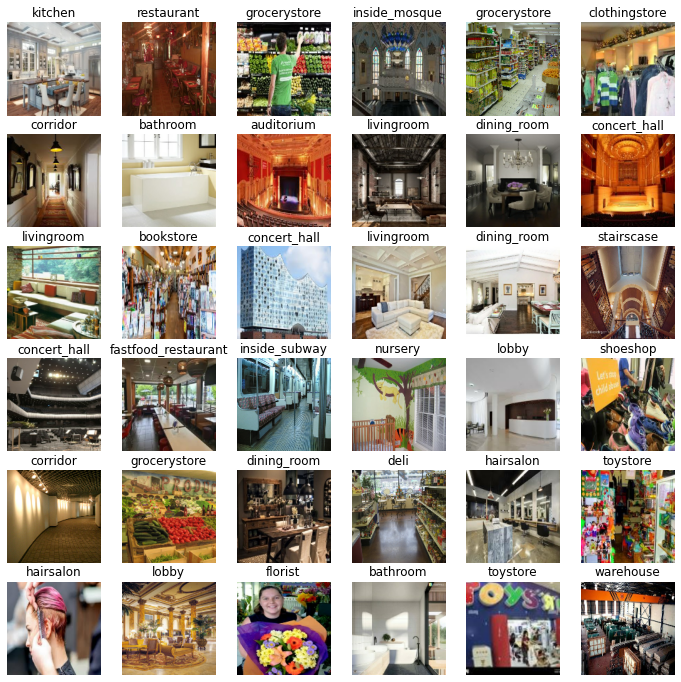

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(36):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 150, 150, 3)
(64,)


#Data Augmentation

In [ ]:
# ## Creating data augmentation layer
augmentation_layer= Sequential(
  [tf.keras.layers.InputLayer(input_shape= (img_height, img_width, 3)),
   tf.keras.layers.RandomFlip('horizontal', seed= 42),
   tf.keras.layers.RandomRotation(0.2, fill_mode= 'wrap', seed= 42),
   tf.keras.layers.RandomZoom(0.2, seed= 42),
   tf.keras.layers.RandomTranslation(.2, .2, fill_mode='wrap', interpolation='bilinear', seed= 42),
   tf.keras.layers.RandomContrast(0.2, seed= 42)],
   )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


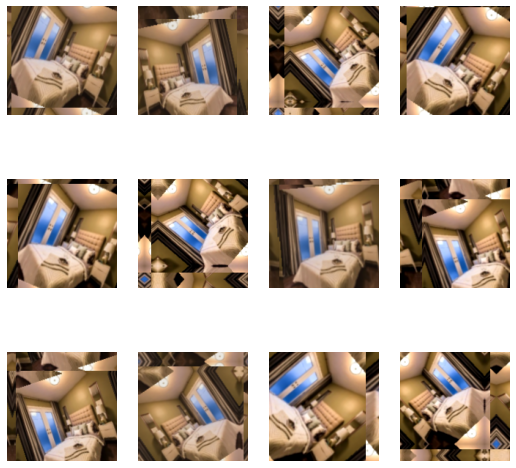

In [ ]:
# Plotting different augmented version of a random image from training dataset
plt.figure(figsize=(9, 9))
a= np.random.randint(42)
for images, labels in train_ds.take(1):
    for i in range(12):
      aug_img= augmentation_layer(images)
      ax = plt.subplot(3, 4, i + 1)
      plt.imshow(aug_img[a].numpy().astype(np.int32))
      plt.axis('off')

#using transfer learning with Xception model

In [ ]:
# Creating function to fine tune Xception
def xception_cnn(inp_shape, dropout_rate, train_layers_after):
    xcp= Xception(weights= 'imagenet', include_top= False)
    for layer in xcp.layers[:train_layers_after]:
      layer.trainable= False
    input_layer= Input(shape= inp_shape)
    data_aug_layer= augmentation_layer(input_layer)
    norm_layer= tf.keras.layers.Rescaling(1./255)(data_aug_layer)
    cnn_layers= xcp(norm_layer)

    
    flatten_layer= Flatten()(cnn_layers)
    dropout_layer1= Dropout(dropout_rate)(flatten_layer)
    batch_norm1 = BatchNormalization()(dropout_layer1)
    
    dense_layer= Dense(1024, activation= 'relu', kernel_initializer= 'he_normal', kernel_regularizer='l2')(batch_norm1)

    dropout_layer2= Dropout(dropout_rate)(dense_layer)
    batch_norm2 = BatchNormalization()(dropout_layer2)
    dense_layer_1= Dense(512, activation= 'relu', kernel_initializer= 'he_normal', kernel_regularizer='l2')(batch_norm2)

    dropout_layer3= Dropout(dropout_rate)(dense_layer_1)
    batch_norm3 = BatchNormalization()(dropout_layer3)
    output_layer= Dense(class_num , activation= 'softmax')(batch_norm3)
    
    model= Model(input_layer, output_layer)
    model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['sparse_categorical_accuracy'])
    return model

# Creating model

In [ ]:

inp_shape= (150, 150, 3)
dropout_rate= 0.8
train_layers_after= 114
xcp_model= xception_cnn(inp_shape, dropout_rate, train_layers_after)
xcp_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, None, None, 2048)  20861480  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_6 (Dropout)         (None, 51200)             0         
                                                                 
 batch_normalization_18 (Bat  (None, 51200)            2048

# Setting callbacks

In [ ]:
base_path= '/content/drive/MyDrive/scene_det/Xception_model/'

filepath= base_path + 'new-model-{epoch:05d}-{loss:.5f}-{sparse_categorical_accuracy:.5f}-{val_loss:.5f}-{val_sparse_categorical_accuracy:.5f}.h5'

checkpoint= ModelCheckpoint(filepath, monitor= 'val_sparse_categorical_accuracy', verbose= 1, 
                            save_best_only= True, save_weights_only= False, mode= 'auto')

LR= ReduceLROnPlateau(monitor= 'val_loss', factor= 0.1, patience= 30, verbose= 1)
callbacks_list= [checkpoint, LR]

# Model training

In [ ]:
epochs= 200
steps_per_epoch= math.ceil(21272/batch_size)
validation_steps= math.ceil(5317/batch_size)



history= xcp_model.fit(train_ds, validation_data= val_ds, steps_per_epoch= steps_per_epoch, epochs= epochs, callbacks= callbacks_list, validation_steps= validation_steps)

Epoch 1/200
333/333 [==============================] - ETA: 0s - loss: 19.3124 - sparse_categorical_accuracy: 0.0927
Epoch 1: val_sparse_categorical_accuracy improved from -inf to 0.21760, saving model to /content/drive/MyDrive/scene_det/Xception_model/new-model-00001-19.31241-0.09270-14.53161-0.21760.h5
333/333 [==============================] - 75s 211ms/step - loss: 19.3124 - sparse_categorical_accuracy: 0.0927 - val_loss: 14.5316 - val_sparse_categorical_accuracy: 0.2176 - lr: 0.0010
Epoch 2/200
333/333 [==============================] - ETA: 0s - loss: 13.2191 - sparse_categorical_accuracy: 0.1883
Epoch 2: val_sparse_categorical_accuracy improved from 0.21760 to 0.31841, saving model to /content/drive/MyDrive/scene_det/Xception_model/new-model-00002-13.21908-0.18828-11.52652-0.31841.h5
333/333 [==============================] - 83s 242ms/step - loss: 13.2191 - sparse_categorical_accuracy: 0.1883 - val_loss: 11.5265 - val_sparse_categorical_accuracy: 0.3184 - lr: 0.0010
Epoch 3/200

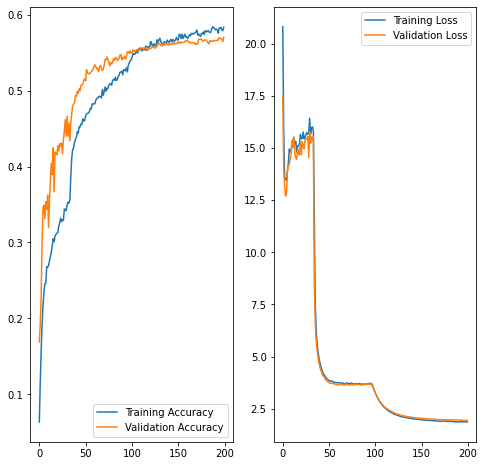

In [ ]:
acc= history.history['sparse_categorical_accuracy']
val_acc= history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

#0.8

In [ ]:
epochs= 200
steps_per_epoch= math.ceil(21272/batch_size)
validation_steps= math.ceil(5317/batch_size)



history= xcp_model.fit(train_ds, validation_data= val_ds, steps_per_epoch= steps_per_epoch, epochs= epochs, callbacks= callbacks_list, validation_steps= validation_steps)

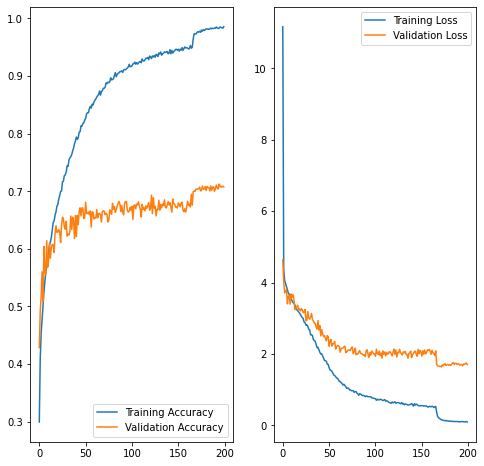

In [ ]:
acc= history.history['sparse_categorical_accuracy']
val_acc= history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
epochs= 20
steps_per_epoch= math.ceil(21272/batch_size)
validation_steps= math.ceil(5317/batch_size)



history= xcp_model.fit(train_ds, validation_data= val_ds, steps_per_epoch= steps_per_epoch, epochs= epochs, callbacks= callbacks_list, validation_steps= validation_steps)

Epoch 1/20
333/333 [==============================] - ETA: 0s - loss: 0.0980 - sparse_categorical_accuracy: 0.9847
Epoch 1: val_sparse_categorical_accuracy did not improve from 0.71243
333/333 [==============================] - 100s 297ms/step - loss: 0.0980 - sparse_categorical_accuracy: 0.9847 - val_loss: 1.7400 - val_sparse_categorical_accuracy: 0.7089 - lr: 1.0000e-04
Epoch 2/20
333/333 [==============================] - ETA: 0s - loss: 0.0956 - sparse_categorical_accuracy: 0.9854
Epoch 2: val_sparse_categorical_accuracy did not improve from 0.71243
333/333 [==============================] - 100s 295ms/step - loss: 0.0956 - sparse_categorical_accuracy: 0.9854 - val_loss: 1.7263 - val_sparse_categorical_accuracy: 0.7090 - lr: 1.0000e-04
Epoch 3/20
333/333 [==============================] - ETA: 0s - loss: 0.0965 - sparse_categorical_accuracy: 0.9853
Epoch 3: val_sparse_categorical_accuracy did not improve from 0.71243
333/333 [==============================] - 100s 296ms/step - loss

In [ ]:
epochs= 30
steps_per_epoch= math.ceil(21272/batch_size)
validation_steps= math.ceil(5317/batch_size)



history= xcp_model.fit(train_ds, validation_data= val_ds, steps_per_epoch= steps_per_epoch, epochs= epochs, callbacks= callbacks_list, validation_steps= validation_steps)

Epoch 1/30
333/333 [==============================] - ETA: 0s - loss: 0.0858 - sparse_categorical_accuracy: 0.9870
Epoch 1: val_sparse_categorical_accuracy did not improve from 0.71243
333/333 [==============================] - 87s 256ms/step - loss: 0.0858 - sparse_categorical_accuracy: 0.9870 - val_loss: 1.7452 - val_sparse_categorical_accuracy: 0.7072 - lr: 1.0000e-04
Epoch 2/30
333/333 [==============================] - ETA: 0s - loss: 0.0865 - sparse_categorical_accuracy: 0.9860
Epoch 2: val_sparse_categorical_accuracy did not improve from 0.71243
333/333 [==============================] - 91s 271ms/step - loss: 0.0865 - sparse_categorical_accuracy: 0.9860 - val_loss: 1.7073 - val_sparse_categorical_accuracy: 0.7087 - lr: 1.0000e-04
Epoch 3/30
333/333 [==============================] - ETA: 0s - loss: 0.0857 - sparse_categorical_accuracy: 0.9878
Epoch 3: val_sparse_categorical_accuracy did not improve from 0.71243
333/333 [==============================] - 91s 268ms/step - loss: 0

In [ ]:
epochs= 30
steps_per_epoch= math.ceil(21272/batch_size)
validation_steps= math.ceil(5317/batch_size)



history= xcp_model.fit(train_ds, validation_data= val_ds, steps_per_epoch= steps_per_epoch, epochs= epochs, callbacks= callbacks_list, validation_steps= validation_steps)

Epoch 1/30
333/333 [==============================] - ETA: 0s - loss: 0.0803 - sparse_categorical_accuracy: 0.9882
Epoch 1: val_sparse_categorical_accuracy did not improve from 0.71431
333/333 [==============================] - 95s 281ms/step - loss: 0.0803 - sparse_categorical_accuracy: 0.9882 - val_loss: 1.8111 - val_sparse_categorical_accuracy: 0.7064 - lr: 1.0000e-04
Epoch 2/30
333/333 [==============================] - ETA: 0s - loss: 0.0798 - sparse_categorical_accuracy: 0.9877
Epoch 2: val_sparse_categorical_accuracy did not improve from 0.71431
333/333 [==============================] - 97s 288ms/step - loss: 0.0798 - sparse_categorical_accuracy: 0.9877 - val_loss: 1.8299 - val_sparse_categorical_accuracy: 0.7094 - lr: 1.0000e-04
Epoch 3/30
333/333 [==============================] - ETA: 0s - loss: 0.0852 - sparse_categorical_accuracy: 0.9877
Epoch 3: val_sparse_categorical_accuracy did not improve from 0.71431
333/333 [==============================] - 98s 290ms/step - loss: 0

In [ ]:
epochs= 100
steps_per_epoch= math.ceil(16841/batch_size)
validation_steps= math.ceil(4210/batch_size)



history= xcp_model.fit(train_ds, validation_data= val_ds, steps_per_epoch= steps_per_epoch, epochs= epochs, callbacks= callbacks_list, validation_steps= validation_steps)

Epoch 1/100
264/264 [==============================] - ETA: 0s - loss: 0.8378 - sparse_categorical_accuracy: 0.9167
Epoch 1: val_sparse_categorical_accuracy did not improve from 0.68456
264/264 [==============================] - 67s 249ms/step - loss: 0.8378 - sparse_categorical_accuracy: 0.9167 - val_loss: 2.1321 - val_sparse_categorical_accuracy: 0.6753 - lr: 0.0010
Epoch 2/100
264/264 [==============================] - ETA: 0s - loss: 0.8808 - sparse_categorical_accuracy: 0.9130
Epoch 2: val_sparse_categorical_accuracy did not improve from 0.68456
264/264 [==============================] - 66s 246ms/step - loss: 0.8808 - sparse_categorical_accuracy: 0.9130 - val_loss: 2.2995 - val_sparse_categorical_accuracy: 0.6456 - lr: 0.0010
Epoch 3/100
264/264 [==============================] - ETA: 0s - loss: 0.8320 - sparse_categorical_accuracy: 0.9218
Epoch 3: val_sparse_categorical_accuracy did not improve from 0.68456
264/264 [==============================] - 66s 245ms/step - loss: 0.8320

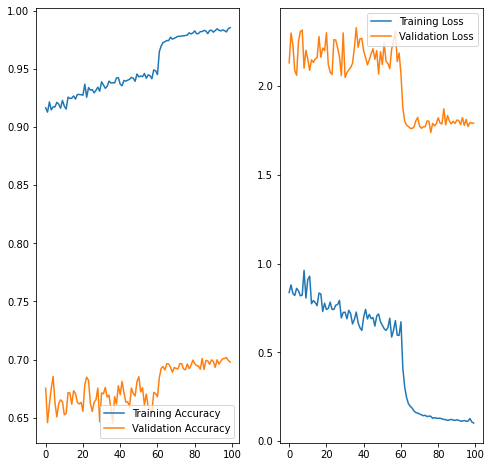

In [ ]:
acc= history.history['sparse_categorical_accuracy']
val_acc= history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
import tensorflow as tf
import keras
import cv2
import os
import base64
from io import BytesIO
from PIL import Image
from base64 import decodestring

In [ ]:
def give_me_output(path, model):
  classes=['auditorium', 'bakery', 'bathroom', 'bedroom', 'bookstore', 'children_room', 'church_inside', 'classroom', 'clothingstore', 'concert_hall', 'corridor', 'deli', 'dining_room', 'fastfood_restaurant', 'florist', 'grocerystore', 'gym', 'hairsalon', 'hospitalroom', 'inside_mosque', 'inside_subway', 'kindergarden', 'kitchen', 'laundry', 'library', 'livingroom', 'lobby', 'mall', 'meeting_room', 'nursery', 'office', 'pantry', 'poolinside', 'restaurant', 'shoeshop', 'stairscase', 'toystore', 'waitingroom', 'warehouse']
  img= cv2.imread(path, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)
  img= cv2.resize(img, (150, 150), interpolation = cv2.INTER_AREA)
  img= img.reshape((1,150,150,3))
  pred1= model.predict(img)
  print ('Predicted class:', classes[np.argmax(pred1)])


model_1 = tf.keras.models.load_model('/content/drive/MyDrive/scene_det/Copy of 167Model acc-0.982-0.72315.h5')

# IDs = os.listdir('IDs')

# def classify_place(ID, base64Image):
#   if ID not in IDs:                    # if its a new user make a new folder for him with the name "ID"
#      os.makedirs('IDs/'+ ID)    
           
#   jpgImage = base64.b64decode(base64Image)

#   with open("IDs/"+ID+"/test_b64.jpg", "wb") as fnew:   #saving image
#      fnew.write(jpgImage)

#   output =  give_me_output('test_b64.jpg',model_1)

#   return(output)
  
  










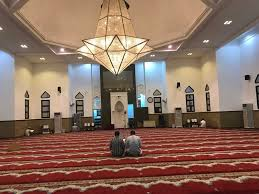

Predicted class: inside_mosque


In [ ]:
give_me_output('/content/30.jpg',model_1)

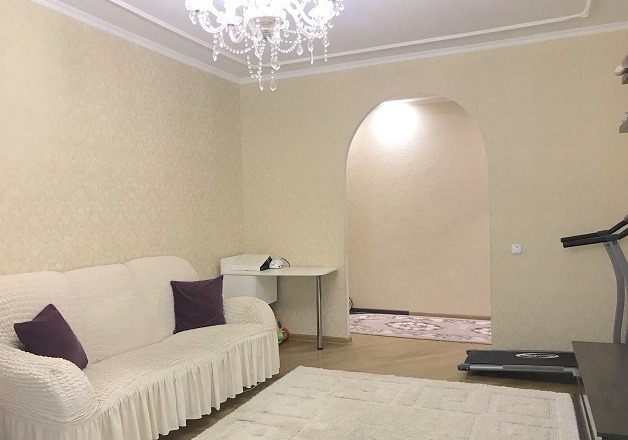

Predicted class: bedroom


In [ ]:
give_me_output('/content/11.jpg',model_1)

In [ ]:
# # Combining both the models for inference
final_model1= tf.keras.models.load_model('/content/drive/MyDrive/scene_det/Xception_model/new-model-00195-0.10584-0.98326-1.66744-0.71243.h5')
final_model2=  tf.keras.models.load_model('/content/drive/MyDrive/scene_det/Xception_model/new-model-00014-0.08745-0.98707-1.78697-0.71431.h5')
#final_model3= tf.keras.models.load_model("/content/drive/MyDrive/scene_det/Xception_model/model-00048-0.06212-0.98841-2.14058-0.64511.h5")
models= [final_model1, final_model2]



# Single inference function
def single_inference(path, models):
  classes=['auditorium', 'bakery', 'bathroom', 'bedroom', 'bookstore', 'children_room', 'church_inside', 'classroom', 'clothingstore', 'concert_hall', 'corridor', 'deli', 'dining_room', 'fastfood_restaurant', 'florist', 'grocerystore', 'gym', 'hairsalon', 'hospitalroom', 'inside_mosque', 'inside_subway', 'kindergarden', 'kitchen', 'laundry', 'library', 'livingroom', 'lobby', 'mall', 'meeting_room', 'nursery', 'office', 'pantry', 'poolinside', 'restaurant', 'shoeshop', 'stairscase', 'toystore', 'waitingroom', 'warehouse']
  # classes=['airport_inside', 'artstudio', 'auditorium', 'bakery', 'bathroom', 'bedroom', 'bookstore', 'bowling', 'buffet', 'children_room', 'church_inside', 'classroom', 'closet', 'clothingstore', 'computer_room', 'concert_hall', 'corridor', 'deli', 'dentaloffice', 'dining_room', 'elevator', 'fastfood_restaurant', 'florist', 'gameroom', 'grocerystore', 'gym', 'hairsalon', 'hospitalroom', 'inside_bus', 'inside_mosque', 'inside_subway', 'jewelleryshop', 'kindergarden', 'kitchen', 'laboratory', 'laundry', 'library', 'livingroom', 'lobby', 'mall', 'meeting_room', 'movietheater', 'museum', 'nursery', 'office', 'operating_room', 'pantry', 'poolinside', 'restaurant', 'restaurant_kitchen', 'shoeshop', 'stairscase', 'studiomusic', 'subway', 'toystore', 'trainstation', 'waitingroom', 'warehouse']
  img= cv2.imread(path, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)
  img= cv2.resize(img, (150, 150), interpolation = cv2.INTER_AREA)
  img= img.reshape((1,150,150,3))
  pred1= models[0].predict(img)
  pred2= models[1].predict(img)
  # pred3= models[2].predict(img)
  pred= (pred1+pred2)/2
  print ('Predicted class:', classes[np.argmax(pred2)])

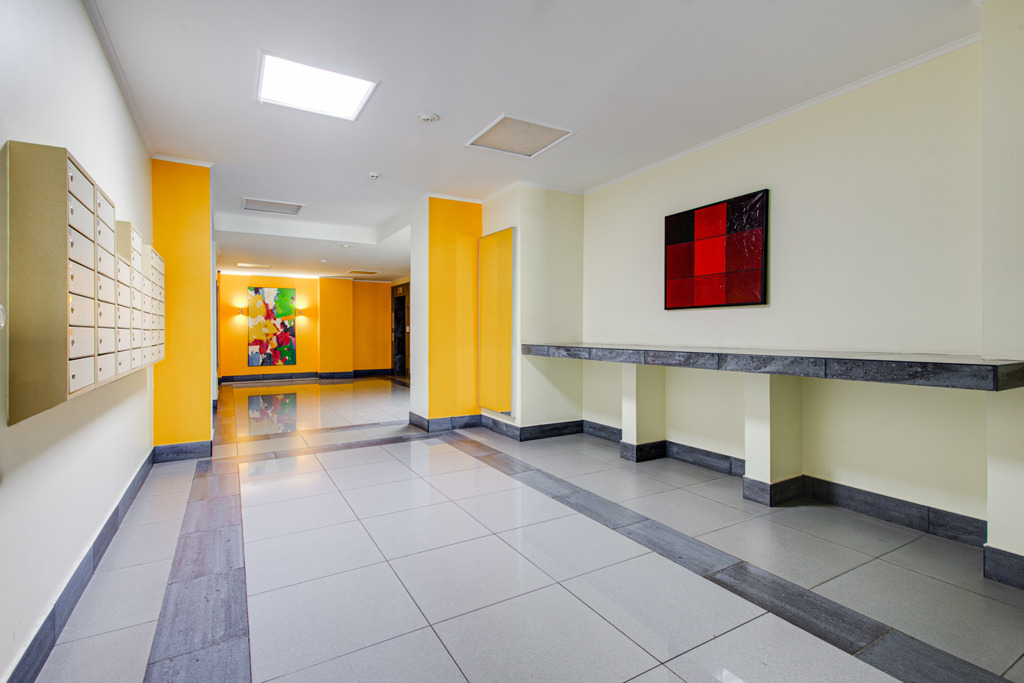

Predicted class: laundry


In [ ]:
single_inference('/content/0.jpg',models)

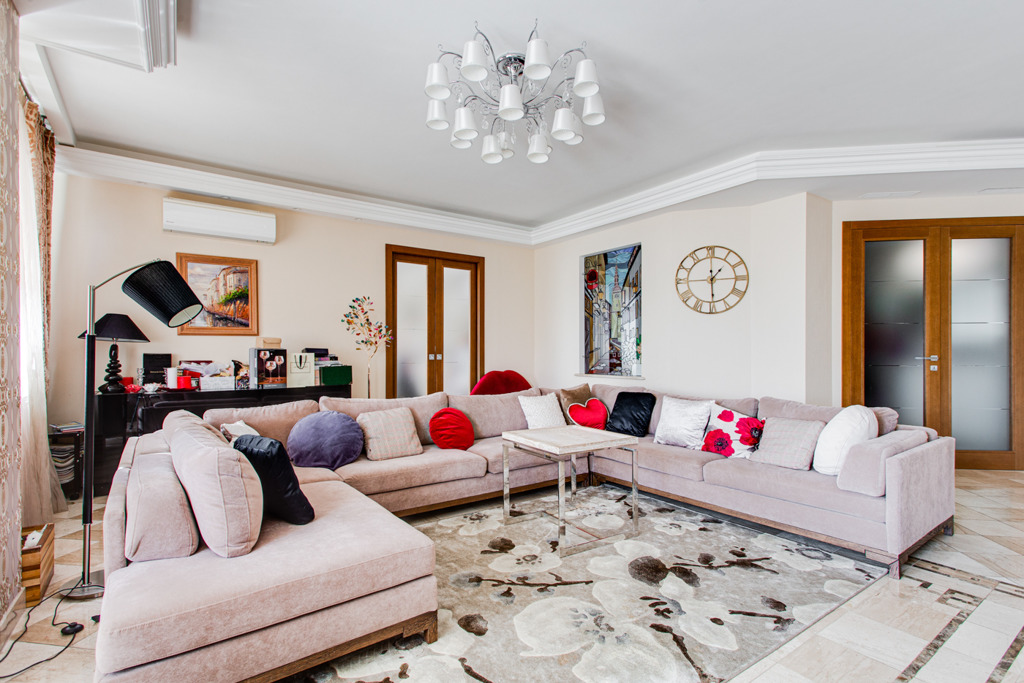

Predicted class: livingroom


In [ ]:
single_inference('/content/10.jpg',models)

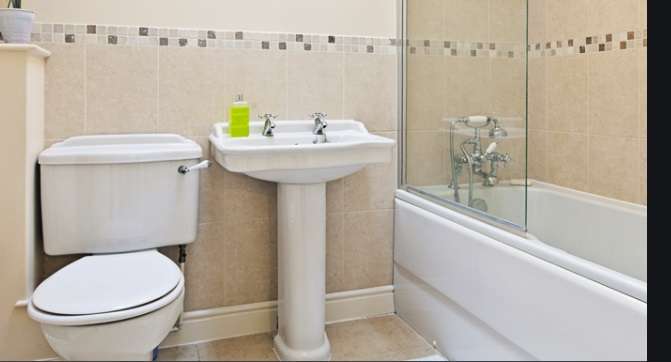

Predicted class: bathroom


In [ ]:
single_inference('/content/test3.jpg',models)

In [ ]:
import tensorflow as tf
import keras
import cv2
import os
import numpy as np
import base64
from io import BytesIO
from PIL import Image
from base64 import decodestring

model= tf.keras.models.load_model('/content/drive/MyDrive/scene_det/Scene Detection model/167Model acc-0.982-0.72315.h5')

def single_inference(path, model):
  classes=['auditorium', 'bakery', 'bathroom', 'bedroom', 'bookstore', 'children_room', 'church_inside', 'classroom', 'clothingstore', 'concert_hall', 'corridor', 'deli', 'dining_room', 'fastfood_restaurant', 'florist', 'grocerystore', 'gym', 'hairsalon', 'hospitalroom', 'inside_mosque', 'inside_subway', 'kindergarden', 'kitchen', 'laundry', 'library', 'livingroom', 'lobby', 'mall', 'meeting_room', 'nursery', 'office', 'pantry', 'poolinside', 'restaurant', 'shoeshop', 'stairscase', 'toystore', 'waitingroom', 'warehouse']
  # classes=['airport_inside', 'artstudio', 'auditorium', 'bakery', 'bathroom', 'bedroom', 'bookstore', 'bowling', 'buffet', 'children_room', 'church_inside', 'classroom', 'closet', 'clothingstore', 'computer_room', 'concert_hall', 'corridor', 'deli', 'dentaloffice', 'dining_room', 'elevator', 'fastfood_restaurant', 'florist', 'gameroom', 'grocerystore', 'gym', 'hairsalon', 'hospitalroom', 'inside_bus', 'inside_mosque', 'inside_subway', 'jewelleryshop', 'kindergarden', 'kitchen', 'laboratory', 'laundry', 'library', 'livingroom', 'lobby', 'mall', 'meeting_room', 'movietheater', 'museum', 'nursery', 'office', 'operating_room', 'pantry', 'poolinside', 'restaurant', 'restaurant_kitchen', 'shoeshop', 'stairscase', 'studiomusic', 'subway', 'toystore', 'trainstation', 'waitingroom', 'warehouse']
  img= cv2.imread(path, cv2.IMREAD_UNCHANGED)
  # cv2_imshow(img)
  img= cv2.resize(img, (150, 150), interpolation = cv2.INTER_AREA)
  img= img.reshape((1,150,150,3))
  pred= model.predict(img)
  print ('Predicted class:', classes[np.argmax(pred)])

# model_1 = tf.keras.models.load_model('167Model acc-0.982-0.72315.h5')
IDs = os.listdir('/content/drive/MyDrive/scene_det/Scene Detection model/IDs')

def classify_place(ID, base64Image):
  if ID not in IDs:
    os.makedirs('IDs/'+ ID)     
           
  jpgImage = base64.b64decode(base64Image)

  with open("IDs/"+ID+"/test_b64.jpg", "wb") as fnew:   #saving image
     fnew.write(jpgImage)

  output =  single_inference("IDs/"+ID+"/test_b64.jpg",model)

  return(output)
  
  


**Testing a Base64 Image**

In [ ]:
classify_place('2050', '/9j/4AAQSkZJRgABAQAAAQABAAD//gASSG9zdGVkIG9uIE5ncy5ydf/bAEMAAwICAgICAwICAgMDAwMEBgQEBAQECAYGBQYJCAoKCQgJCQoMDwwKCw4LCQkNEQ0ODxAQERAKDBITEhATDxAQEP/bAEMBAwMDBAMECAQECBALCQsQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEP/AABEIAtcEAAMBEQACEQEDEQH/xAAdAAABBQEBAQEAAAAAAAAAAAAEAQIDBQYABwgJ/8QAThAAAgEDAwMCBAQEBAQDBAUNAQIDAAQRBRIhBjFBIlEHE2FxFDKBkQgjQqEVUrHBFjNi0SRy4UNjkqIXJTRTc4KDssIYRNLxZPBFdMP/xAAbAQADAQEBAQEAAAAAAAAAAAAAAQIDBAUGB//EACsRAQEAAgMBAAICAQQCAwEBAAABAhEDEiExE0EEUSIFFBZhFTIGI3EzQv/aAAwDAQACEQMRAD8A+Y7pCoEqJsRB61x3+tfCXklj9kxxQrFC0YnD+k9h5rltxlVcUwiMSb9oIPPHgU+KzLIup6oWYMHGMcKKvm5LjR1q+e+a8s4bFlHy4h/T/vWE5f2Vmg0TRP8AOgSJVUY3Z/qFVnn39Jc2gMqCN32jGAajLPc0mzYqFlS9iUOD3QEdzmlhNlpHchfUmcFW24xU29aURrHEvpJ4+vvVzHtdnldGywlTjggDjPNdGpIzxy9R2turxNKRlge/j7VnIvtIFvdPkuJd8aGMjnjtitsIV5YGutIjgtY5S5+e7HIHAxWnf9JvJFZLE0pAUYbOO/etZ8XjyRZDTpRB8hEOWHAHOKjXqM84ij0vUIVWL5D4H/SeavpEfkWo0vU7g26Q2NwqlgGIibv+1GO8fjPPkjQ6v0vqrGHZYTsxQbv5TZqc7/SZzSI4OlNb3I0WmXbgdyIGP+1RLbfReSX1axdHdSPKjRaFeuSMEC3bP+ldmOesWf5IPl6D6snQRxdP6idwI4t2zmuOTeSMuaQ2L4afEZGjS36e1QjOMCE1tjin8mOlunwl+IN0wFx0ffsxxhvk4Oadx1dsM+bF6NpPwx61/CRGbp66V1UDle1dWPNJNOXLOVd2nww6wY5/wW4H/mAoucvrPtFlF8LOrshv8Ilye/I/71c5ZBcoOPwp6uktSINJJfbgAsBinlyFM5tg7r+Gn4i3FxJOmmRB3JOTMOxrL8ivySB3/hP+JM/Bt7VR7/Po7SnOWA5P4Pfii8wZZbEKBwpnpzSvzRY2X8H3xAgXEj6eSfabH+1VuHOaYXa2/wD2TeuvkIrGwG08gzeP2rz/AORj2+PoP4P+sz+P9GQfwpdZcZlsEU98SHv+1cF/jZZPW/5PjB0P8LHViH/7Xp6g9zvYn/Srn8K0/wDlMWEf8MnUmCjXdlgecmsuT/T+xf8AKJ+xUH8NWvqCDd2Y4xwxrDH/AE3RX/5RBY/hv1oEBb+zUeSQSTWv+w2n/lESR/w460o2/wCJWu0eAhHNL/x9H/J4ng/h11hCGbUrQnPP8s0f+P8AR/ymaTP/AA8awxDDWLRfoYic05/A39Zf8oqQfw96oSGfVrQ4942z/rRl/psqb/8AKKmT+H/UwrA6raEnsRGeP70Y/wCml/yelT+H7UwuDq9rx/7o/wDej/xmx/yinD4A6p2/xm1+/wAk/wDel/4zQ/5RklT4BakgwdYtif8A8E/96f8A42Jn/wAoyPT4BXo9b6zASfAhx/vS/wDGSpv/AMoyO/8AoDv+41e3B/8AwSf96i/6XC/5PkcfgJfH/wDzcIHt8j/1on+lw/8AlGX9JP8A6B7xcBdaiAxjmH/1ov8ApmvhX/5Rl/RR8B7tdw/xiI7jkH5R4/vTx/0vZT/5Pl/Ry/Am6AydaTJ7n5P/AK1X/jZCv/ybL+kv/wBBlwQM6wn0/lf+tH/joX/Jsv6Pb4FzHgawo8/8ulf9LxqP+T5EPwJm2kf4yg//ADOf96U/0jG+j/k+f9IW+A1wSMa2iY9oM5/vT/8AE4SH/wAnzcvwGugcHXExj/7n/wBamf6TLS/5NkX/AOgScYI12M/eH/1qr/pknhz/AOT5S/DD8BbvJP8AjkRz2/kY/wB6n/xcqv8AlGX9Hj4CzkerXFz9If8A1q5/pcL/AJRl/RR8BJhknXPP/wB0Dj+9H/jD/wCUZf0Y3wDudxZdeAz7w/8ArVX/AEzHWh/yjL+kQ/h+vjnd1DGftb/+tZz/AEibH/KMv6PP8P8Ackj/AOvI8+cwf+tb/wDjJC/5Rl/RD8ALsn1a5GT2/wCTx/rSy/06WH/yjKfojfw+3R4/xyJR/wDgf+tR/wCMif8AlGf9OP8AD7ek5XXIvuYD/wB6r/xuJ/8AKMjT/D7fZJOuQ4Pj5P8A60//AB0ip/8AKcv6RD+Hm93HOvxEn/3GMD96n/xsF/8AlOf9FP8ADreEgpr8QwMcwZ/3qp/pWP1P/KczX/hyv2ORr0PH/wDT9v70f+Ogv/yjKkP8Oeo8Ea5b5Axn5B/71X/jIX/KMkTfw1akygHqCDHcj5BHP71H/jpC/wCUZIG/hk1V2IHUNqAf/cNn/Wtp/Algv/yjLXwdo/8ADpqel3kdxJrttKqOGKrCVzjx3o/2Ujl5/wD5DefGx6inTFzGqoroABgV0YcPWePCy/kd7ulXpu7zncn71p+PxN5vDx05dj+tMn61P46n8xR0/e44aP8A+Kl+OpvN+47/AIeuiOHj/c0fjp/mIenrsYwUOPrU9af5TT09eP2KD9aOtpfld/w1e4yTGR96f4x+bTEdXfCbXtd1Rb+0ltVwny/W57ZzUZ/xu8dnD/P/ABK2x+CfUltdRXFzdWLhZAzYJzx7cVnj/E61vyf6p3x0l1b4O9RXrwSQT2uYmlblvLtmtLwbjHj/AJ3X0PB8GuqEQJO1pLycnf2rHL+Np0f+UFXPwh1qW3WFSoCKQoMmQD9Kc4LBP9TUUvwT639QgjtBu7Ey9vrReC1X/k8P2CvPgd13LB8qZbdwPzFZcbqU/j3Yn+pYfoDN8Cet2t/lxWUAxwF+dVX+Ptf/AJOJ7f4K9cxWbRDToY3L7gUkBxWf+2yT/wCTmw8XwT63/nCezwo5QiQE0v8AbVc/1LGqTVtCvun7gWWo2ckUqj+scGsOXj1fXo/x/wCRjy/Falsfm/OXhj+bAFY2adXXZbmzluIfkuDtLFiM4zRLIfVBaaf+CZjuwGGNtTlZVuvHIhZA5AHGBRLCqvXRNOnKrcKZSSGyearbHKbBX9paPfmOPCJF+YDz9BU97Pgx8+m29yr3Swfh9+BtxjPBrDPmu9L3NPS44I7TpiSGOPbtsWwoGMZro48rp5mX/wDRhNJMtuzR7FWFV9a55xVXK13fpeWOlW/yJZLYxhZBzkds+1KY7TvTPatClvciOX1he2PNab6Hfi1+DcU138RdK3xbQ94pwe+BXV/Gz7ZvH/1K6wU/8UbrJ1deFuT8whR470+fKzl8T/A94o8MsodzOwHAHORWGWNzr0pNeIZLeYTERkrnsanr1aRe6IZLJFj3BizZLYrPLH9qxn9N7aK7LHIEO3HNR3s8dOI2SSRbd4bdcM7DD+V+1Z8l2uEsYLhJGkuQXBGMt3NZdZYfaxYxbY42O3sc8+KrHUK20Jf2s2oiNTcbVU8gGq3C9NaygFwIHf0rgtmjcoom2sLWS4zGuPGa0x1//lhnfHoF3pq2fSU1lGxjJhVAV5JycmtrNYuOZf5s9GrNCIWO0IMAjisLNx1aMi0ILatJtVmJ4Yn/AFrKcfrTHO4sTq/4aC7c3A4XgKPf7Vdxkad9wBbXC3L/ACJIXESeraR6TXZxckkZZZK3WDM1tJMkaKgJ2hewFO8k2gBoOiHVpYbG5bEdzIEdm8Ka1wzm5WPLLZqPMfiZ8I9c6K1ySK/tDJBMxe3nRSY3TPGD74r7v/Sv5mE45Nvjv5/Dn3tX3wD1296P6nv9RhYIZLCS3TacFSTya+jwxx55t83/ACM7jf8AJJ1LdPNduyFjlyfUc+f713cfFMMXifyOa9mM6htBdq1wjl3UcxnBGfBAri/lYdcduj+L/Ms8irOVjEUpYjHcivyHfbyP3a7gW6xblRhQoGe2a14/4tzm0fk1fSC5E0IEUikN5qcOL8earkZFIB/MclSvAx5rPnlt9a46s9XWhOJraUSoY2z296mYTGbY5/RCIUZVljGSeCB3FHlRurWN1iKyMTz4pXHwtu+enz4phxscNRj4A+pzl7qd0dky2Rn3qbN0QljNtQmYliOc1pP8UZ7qw06N9WvorKFgHlYD9K3xxufjPO9Y926f+HHTVlp0aXNhHM7AFncZya6Z/GrivNbVyvR3TO4KukW+MYI2Vc4LEXloqHovpNQCdBsiw45jBNV/t9Uvy0dF0z04gCLoVjtXsPkL/wBqLhcfD/NR9vomio2U0mzX/wDMr/2qeuk3ntHrpumdk0+2OP8A3S/9qvyp/NRkVlZhfRbQKM54Qd6JZKm8lo2CK3XgRJn32illplc6NjihiUBVTn2ApalH5KsLfbtHA5p60X5Ks7QRheB27/enr9scsllb7DggcVEtlZXkqxjkXAAOKu3cRv0ZE0a45796wkuz2LjaNhgmtfWdSgJx2yKPSEIRjORjtWnYkgaMDnvRoOyn5Qc485p9YZyumMZGaejlOVl77hRBad8xO2c/SpsFypVdBzmnJspTt4zy3elfFbcJFA9TCj6O1KH3NnIFLQ7U7eAecUSaLtTt475p6aS7h3zVHBNLQv8AZ29ac8Z7pSy/1d/FA3XAqD4o0N0vP+Yc0fBs7I4AYZFAlTJC7DPep0Vy16lS0Y85x9KqTxH5PTxZkn0mn1hfkcLOU8YNHWF+ZINPmPO3NPrtN54d/hs23kUtRP8AuIVdLuW4EbftVYcNzviL/KkSf4NeEZEJ/Wtr/DyT/vMThol1j/lVP+0zT/vMSHRL3uIu/wBaf+0zH+8xJ/gl32+SaV/i5n/vMTDpFyMfyHqf9vyT9H/u8XDTLhScxkfessuDL9nP5ONNawmx+UgD6UTjsX+fG/DTZuO+RT0qckqN4GUd/vzR1XMtkCceKnQ3SKOTk01SuKgnOaL6K7ao80tB3bkUrNfAXevfdU+g07DyTR6PpGdByGFOTYhA65rWTStQu/wOanWqNE3gN3og04yKfNLRdY7eKY6xxdfelYJjovzlH3pzwacJQPNGxpxkXd+agtR3zlHeg+rjMuMg0DqQTqRml1HV3zgeAaVkhSF+bjuaWj6k3geaWx1dv/6qWxI4uMU9H1d8weDSOQ35gyeandPTtw8tWk+CYw0yqxxuoo6wu8Y70tjqa0gxjNGxMIb85Ce9Fquv9PO/jJow1TRoruKNfnwyAZzj0muH+RNu/wDhct4r68dOgX4xGqx5x3MgxXnzF72P8maNXSL4F0f5Pp4/5oJz9qm4H/uJCnRr9gFKxt/+Vip/Fsf7mAbnpe+uGZSY1V+CQ4J/tVY8eh/uY49NX9svy4FVtoATLjJNGWGvg/3EQwdIzK3zJbdfmnO4bwefuKMcS/LjUlj0he2k4CWqpCeXfeP/AOdK8UvtK8kkanUYA2k3VrbHfI0IjXB5JrXrJ44+87brFW/TmprctI9nImRg5xzU3F2Tmx0M/wAP1VIGVFPbhRjmjGWUflxUDaP1Td3CpeaLOq54k4IA+pzWtx3PU/lnxpvgzYXUfxM0sXTbJFmY7O/AFdH8TCTLbyf9Sz3h4yP8RFlc6p1vNDaoXaKRmOOc5NTzS3PbT/TrPxx5WNC1USfKSwcZPPGKw73G+vUmqlfQL+acRGwm4XIKpkfalnncj3JFppnSmqRTKJtNuQ4GV/lnFR21DwbO003UII1+ZZzYPYbDxWGW66JYJjsbx2J/BuCvOChGajVv1W5tKLe/dxE9lKOc5CnFZzHLau2MDvYahM7Qw202WOMlCAv1reYbTeXH9J4NHuYm2GKR9gG4lSMmouHpflgu30TLPPcIxdhxhfNOY6TlySitK0lo7hA6s2TyxWtMLMWGec03V9Fv09oSQd2Bn9K6LfHDjnO22Nk064t1kDb5F8DFYzL9O7Dkip1O61a007dDbsNpyqxgksfrRlP6Vc8Wdeyv753uptMfee+VPf6Vj1yt9HeObR7prRx8lldm28KScVv11C7RWx6NqAna3FjK8aDJBUkUY420tjumtHum1+JZbVokUF+V4zWkn9s88tR6xFZabrto+ia7p8V9ZuuCkq52/VT4P2r0P4/8i8XyvJ5+Kcl9ee6n/CZI9/JrXw51a3CyAg2d65Qp9A4ByPuK+s/03/Vuk/yfNfzv9O73cUNz/C38WZJflyWejMCOWOpAY/8AlzXtX/XOOebeNl/o2WX1HD/Bt1nPKJNW6m0XT4yfWIVknkx9/SBXB/M/1zG46jX+P/onXJ8v3Fyyusbc5xiviOPjmL9dy+OmtVkVpVbPH7V2YXUY9N1Wzl41hEC5LNyPauf8duW6u+DdJs7nUblZYULPG3rQjtRlh28LHPV9aKaZoAweKOMLjdjxSy/j5aO5Sh/xR+aWRlK44rKcNn0TVSfit0QYE7gcEHt+lVlh4i+UkoZ4JMk5xuB8g1l01C2IvrtJIIJQp3PGAcjHIp44f2ewSXUaMqM23J5NK4XaWx+GMX43qmKYniMEgY716P8AHxkcH8jKx9DwThUVGc/YV6Mkebc06XQDccj61Ukpd08MsgbBxzzRYXYakueO1Y54bu03Opo5grctkVncEzL1PFdKBwcZ4rO8dX2FrcKoABxRjxjsJjuQxG1uaOTjRctjIrhc7WNY442eEPiuAoADdq1uPhW6WEN6oGScfT3rSY+It2sYLz0jDYFZ5YM6OhvV4xzWdlIdHdoRkmjGI2JS8QAEdzWsxCeK9OctjFHU0y3wz+filokovkP9WaqQyreezUyKLwbvzcUhUhvExmjaduF2jH0tz96U3tZwugKuTSaRrkEZDc/es8hKclz/AJjml8PZzXQBGCOKf0bL+N5xT60bL+NJGA+MUr59PZRd8DJ8U9fstuN8FOA/FI0jXYZc7+1BbN/Fj/7z+9LY2eL7j81MbJ+LGc7v709HKlj1R0z6xj6UtJuql/xpwM76qS6RcZUi67KFzvp6LpDv+IZv6WFGh+KUo6kul/LIP2o0i8EO/wCJr8jKzAf/AJIo0i/x4kTqrUxws6gj/oFacfJ0rPL+LtKOsNXxg3EOf/w66f8Ae2M5/CiQdYamF5mgJ+qH/vT/AN4X+yc3V2qcn8RCPtH/AOtL/eH/ALKIz1bqp5F3EB9I6P8Ad7P/AGUhB1ZqmDm9U/8A5sVN/kZUv9nDf+KdSYkNdDH/AJBWeXNcvDn8WGnqK87m5J//ACRWf31tP48hr69O/wCeTOe3FTY0x4pDG1d24qa2mMiP/E2zyf2qTd/iI7h6PgrhqIJ5b+9Gid/iAzjf2o20jhfj+p8USbBTqEa/1U+pFa+Q87qNAwXyZok0Hf4guf8A1qgX/EUHOaV9Dvx4HIOaWqCHUEweftRoOOoLjkikHJfIRgUAhvYifzYo0HLeIR37U9An41SDtODRoE/GgAZOaQKLwEYBoBPxq470Aq3oz3FKgpv+O9IGm/G3vRrfod/iGB+ajQnhn+I5B9VGlbIb4d9+aNDbvx4HGRRobcb1PfmkHNeJgeo0GRb0Kcls+1To9xxvuwBoPcJ+MGe4o/6G4oetLrGgXUyqshijMgVhwSPeufnx8bcX+VeMN1tqxiMsWk6W2R6Rsf8AvzXlZ5ar2+Pg3Ap611V32y6Zo6MBlgYXb/8AWpzPbT8CT/jLUGiwmkaW8mfSxRwAPtmq7D/b2mN1fqyRlk0bSAxP+V8Z/eiXY/24PUOvtVs7dZDoukyt/UAHAP071Wtl+HQqTrq4t7a3Z9B03586g4DOApP+tPWkXgv9przrLVIbZZk0PT7gtxtVmXn6HNLeyy/j5SbW897b6bpz6hc6VHO4ZFWIuQELDJGfNLKajnmNyulDJ1mJ7SWV+l7WJ1zhfxTkH71Hd2ThugcfWliYi0vTkO4DsLlxz+1Vc5If4A56405NxTpsMx74vG4/cVH5PD/21W3wUuk1j4qWF6kXyQRKRHu3YwvvXb/By7ZPI/1PHpgw/wAaNTjtuub15oi5kYgYOMYJp891m3/0/HfHGNi13Tp3VZ9NncAcuJyDXHnlv16uOOllpmvaKsqL/h10+TgAT4H+lPDKHcdtIeqtG09FEejXcq553XmG/TilcoiceQpOsNG+Szjp3UGXwpvQCf8A5aV1TuOUEWnWGiPszouoIT3UXanH64qbIVxyWI6o0NF3DTtVx5RbhDn+1TuQumVHjqvSDACul3xyM/zJU/2pyovHkSfrbQ7NUM2kzurkKAGUtmnqaT0yHRdSaBKQi6dcBz49PFTMWeWOcFQappM9wtqtjKGfsxIxVfj/AGizL9jLm80bToUOoLMxYZCx4ppmP7VVz1V0tbqJnsbwhztAABNTljI3x48sp4Ek626UjjJFreAZxnYP+9XuaVOHKgZ+u+kt2Da3pA8CNef71nc9U5w5/Q171p0hawiU299tJ59C5/1p3OKnDntzdW9OTxqYI7wLjJDooIFT+Wfo/wAOUR2OqaVf3u623oEHPzSBxVS3Kss5cZ6t4epOmbO6itpdesFuZWCxxCdS7E+AM1044ZSbrluT1LpLJWUnjGM/euji59eOHl+rl/VlV54quTlv1jMWa6x1BdJ6d1G9LEGK3cgjv2rHlzyyx8aceG8tvyxW6gaVVuW/m9gT2Jrvw4svtfUTl2Iebg8dxUcufSDezo7Ga7tRPDGX+WcsQO1LHlmWIpljqFxp90zQyFXkO5iRinhl6m3YyfUvmRmGVlYHk16OPJjMdVOkELShchMR+PqKwzywpzwR81PlgM2xa5rZaVSQXHzMw7yVAyD70uuy+Jb6Zhp0bSEYjJA/WnjiW1P+JDYZiCO4I8Vr+PZdtPQfhHfIdXDc7lGK24eL1wfyMnu8d36lUO3q8+1ehMPHmWiPxewgb+B5qphouwqK/LZfdkY70WDYmG/Zx2wBU9RsQt6QwBHp96XXZJ471XbaoOR9KLhNJFjUdoCsefHFZXGfordfEsN85bHP6VPXae1Epetnuar8Z7GxXzEjORmncNQWjE1BhgbqmYksrfUHChe5qus/aR0WouFweKyyxn6AyLUAw9RwB9az6aFgiLUHAwhzRS6po9Tk5Bx79qB1TLfuvIOc0FYf/iMngUFqnx6hIQfTQNFGoyKeQP3o1stHf4k+cbv0o0ViVb5yeP8AWqT6eb9j2bBp62JspvpMH1f3pXE3LfsezVncQU3cjchjRJoF/GyE/m7Vp2h6LHfSZPqNRTKbt89zVfoyG8d/TnGKzn0HLdy8+o4q7NxNcLxwc8mo6kct64bIY49qJ9DnvJDgKxFawEF3KDy5/WpyBzXUh435/WnPgSR3cpwpPGKqe0JPxJjH5ia26xn2pBdMe/P60dYcyv7cbp9owcU+sPZFu5CfzGs8sf6CQXcgOSajrulbr4X8cc+f3qukT2p/49hxROMdqab4g9h+9OYHMrTorlpP0p6FO/Fn9fal0TiRbxifWvb60+qu2j/xfHBxSuI7GtdvjntWdmxKiF3JzuY/vR1aYuW5cg4Y4qM8TrhdOG5zRrUI38TKD3JFT1VDvxTNncxpyaM03cvhu1MHC6k7bzTDvxMinO880BxuXHO45NAcLp2Gdxo7Ahu3/wAxpdg43UpIO6gF/FSDyaetg4XMvcNg0dQ5rqQ9z+tGtAhuJSeCQKAcLl1wC1Acbtxnk1NDjcuy8EikDGuZBjDUBwupc4JIoBfxEucbjQCtO/hiaARrh/c0A357f5jQHNdMAAGzQDPxUg80bBfxD4zuNCnfiJcfn70Cl+e/+c0INF3J2DVGlx34p+5JpaCk6wu5X0G8hzjMLLn9Kw5546v4v/s8MhE9sBI0pEOBwe4NeJyTdfT8c3iZeWL6ni/t2MbngBuM0Y+L0hRL2FPkv6WHetN+NJ4k+f8ALgdzKpYf055qN+llAc1t/iMcbCTEcbbpFB5Na45MrD7/AEm5kWC5BZIDjb5xVXLxnrVdNDNczW2m28sqh5F3svgZow9p5X/FterXuRoK29qvMl3g/wDlVavOOPhn+bz+WWcjasgwOCK5rHpTHbpEKlQcZPmos206o5LZkhluJWAz4FKQZNx/Dsgb4gWj54EM7cfavT/g49buPnf9ZnkeafHS439ZXQDDiQryO3NRzZbzdP8Ap2P/ANbAm4eBQijLOO4HBrO4x6axschkVWANZ3CBbTw3bJG+CwPt4qVYzY+wmltCDcuGQdvrUZVVm3Xmn6lJK19YnMTc7Qe1H1PUVbyzfKWIyFWP5s0ssdDS1ldrW1HzZc543Me/2p4TR62Glt57uaCbftiReD7saqfWOXi9gsb2CVS0zYH5uO5rW4sLd1caFJPd6mqbtscQOSfNVMdseS6FdXS41SKGJSVhtxuPjJqOSdYXF6w97fNOdhGUXOMGuDkzu3pcWGlVO87Eqoyp8e1PHOt+sDzRzGMg+lgMg1OVuWRaD3N1+JCpEMhRyPrW+fFvFUkLb3bKH3g4A4NZ4cdic0Y0CLqV1/Fs4t93KK7KGx74r0f43FbdvN/kWPQehejOiobw31p0rZx3NqwKTvFl93uCf9q7eeaxeXd2+Pb+nHco7MeTzmuPCRz8n1atLtbHPI8Vdsnid6jyP+JDqCTRfh5cxxTlJLyVYF2jkr3b+1R+SSadHBH5zmGNmzwNvavfvLjrx7OOFidP5yGOGN3c8AAZrzOaXk+L31aXRLt9B0e5u7iIEoPynvWPFw0+7PXuv6frdt8yOzEE6nJI4BFdn4esRhltWxvlGfyPequ9N5oR+Ome2HJAHcjzWV9RdEW8BxvBwT4pTC1MHRTpjf3bsAprbGfor8S3crTaNIYySyMCQauY+s9s44usAxyEeSK3k6xNlb74RTyrr7pJjDKMH3rXhylrg/lTUfQlstzGgIKn2zXdt5tOa3u2YfzPzc0XIJltb7buNyoHhQKjsE6W2pnBS6XaBz6cUbHYSINQYBf8Q784K1Np7PSy1MMCNRKA+yCs7ujQs6fqO5caix+u0Cnjh/Z6iVNPvWxnVZc+cKBVdC1EyaLeNJ8w65dYxzwv/an0RodDpM5xnVrkY8jGf9KnLHRaGxaDI4DNrl8SPOVz/pWewNi0WdmB/wAf1MBfZlH+1Z5WloWvT8zAY6j1ZR34lXj/AOWo3RoVD03cHA/4o1kjyxkT/TbVz0dhcXTdwoXHU+q8eSY+f/louA7aSnpi5Z9y9WauARyAI+P/AJaXQdz/APhW/wA5j641tRjjCxYH/wAtRZpPZy9J6mUMcPXesA/5jDETn9qNFck3/DOvbcRfELUV8c2UJzRou3hjdM9TkbU+Ilyv1/w6L/vVYwrkV+l+snGE+JHA/wA2lJk//NVzAu5D078QlQRwfEGyXHltKzkfX1UdB3hy6F8T0PHWGhTcf16a6f6NT66Tln/R0Nt8UbRy0t307qCAcoolhb9Ccimcmx1v1M1q6Qa/pM+lytwHch4mP0ccfvWVC9inEi7lIKsMqRyKR607sdw71HSnMj1ZUQsxA+pNX+PLL4m5yGC8iZtgmjLn+neCT+lXeLLQmeNSBsnnjIrKYaPseGOTVC3ZyEdmFBOGAWqNehxwR3rSeB3YcmlZsFLDG5acgOUtjO6noHgnHq7U/QXfg8Cj0rC7srwKPSduxxilM/7Emzi7HgD+9PcOTSM7s0bGjw2BT34PHHnxU3LQSW8uxvVV45Js2X5iliau5RHU8MCRSlKzTuc96m0r8KwyuQfFTs59QlfBpbaylBIOBS3tdO3ZB96zv0iFjjtVbPZAxqZdnsowPNMyD3oBxOTgmkCHk5zS2nbgSAVBpX/IzGPNHU3bsEDNUDsgYNOXQODNxxmnsO9R8fWptPW4dnHcUbKzRGYYzihOzlbPcUqeyds4oMm3sSaNArkEd8UaDkPHfmjQKcijQNYnxzRoqaW471Gy3owkckkCiXZz0m7yvbzVK0VTnzxRuDZ276Uti3w125Ao3CN5GWNLe1QmeMk5FM2f6xm+Xo08mCcJnGa5uf2Oz+JjvN4/cShoi0o4k5xjtXjWevp+Oamk1qiz2gAYgA5Bz4paaHhNwKkhsjGe9TspYqp9OWCRn/MW4AJ7CpuxuXxD+FSKN3fcAvbY2CTV4S1OS2jdpETL/wArAJQntTzlkZW6Lo9ncvrKx/MVBLIrhjyQoPYVPFyXbPlusRvXOoG3sLKONtnzmuJeO5OcCurLLbHg9yYC3huntWVixZjuYnvWGXr0ZR8XzLgKgPKiljlrxp2QapftBEYXG7aOcjiiTaMq3v8ADSI36wjuWUkG2n2n9K7/AOFuZPm/9Xyt8ea/GaOGbq28ywCmYmsP5N1m9H/TpPxR5/BguWJGF/KKxnJfj0bjtZ6La3Oo3wW2hd9nqbb2A96qXsmzTW/MWKZVeMNGg5GeDT6nIFvGjb8ygDGRis8uPbWRd2lt86ziZJijKBkdqeM6lllBsVnDIpUIm7/MKVm2doGbTHEDqzmTnPJ7U4JfRel25RI/n7gHbaimnjJvbLlaOVHZS0knrK4XzW1/tzT6suk7ZjI+UyAMbsearHKMOaqzrDVP/G3qI4PyiIyPOQOaz5PY1/j4bYMS75F2rhDnv71xZce69TGah8bBp9230qMn9KucfWNNoDqEUryu68eM1MnpaVETxh5HQhcE/tW9y1E70eZYvw7ygZ3dv+9Pj5JbpGe9LLQNJ6uuLVBb6zp+mwcsjmAyS4Pk54r1eDU9eV/IltbroHpbU7HUDqWpfELVNdCoVWF4447cE/8ASozkfesf5PJ28c01HsugEJEz48ciuPHeLi5fKseOWB5rWZS/Uy6fL/8AGP1f/hFnYWELlmCP6Rzuduw/ateLjnLm6cK+OtMa1eQm8K8cqF7EVreSvo8sNLLRLqCDVnuIxgbTsGKeOVrnyVevajd6xNOCREqqd6g4DCtJMvqGZs5o4d8e7aoPcnxXVjjllGW9UdBfxkFRHw3GfepvHZW0y8IZvRsBJOecVPRFzLJIgwqSdhz96cwOZbLDepET8xyDjtVdNH220Wm3EcmmXW7aYzFnGecij9pV0MlrqNwvyUMUUa5cse2KvPLwmx+G6WSdQLcWtyNrcBPOaOC+uH+V69/tzv2uxPAz9xXoS2vLo9G34ZCPYg1p1/sHvKCQnGfpS6gXG5RAWGCfFPWozt1U0R3HI4qdKlmhAIbCKDke9LqXYWv8xlUMBjvTk0OwhVAxxTEyTxMxPOMH2oGxaBgAfFTlC7bGQHgAHmsupjom28nvRcIB0RyFx2rLp6BsTFTgHiq1pAtWOB6uKUpURGxI/NnmmSVSVyOOazs9JJH6TnNFgvpQcnHPepSeePH61eI0mBOO+K0g0fGwzgU0pdxyM0qJDfmYPBAIpKnjpPlzwtBPGssTjDI4ypH2pXV8Gv2oHU9KSCaF5ZdGZgsiE7jZknhgfKZ7+1TMdVe5poSy8NkFSMgirliHn/xC+GF38Qdd06Sbqq7stKt4ysthbSFHmYn8wIrv/j3HXrj5tyvBNdg03pjqTTT0rZdV6cbXUflXN3qsr/JlUNj0k13Xhxyxcf5Mscn1ffarFp+iTayUM8dtam4IQ/nAXJxXkcnFvLUdk5LpgumfjXa9S39jaxaVZW6XmCN+rw/NAP8A7vOSfpWk/ieK/L1ayDrjTLoSLaq0skEM800akZjWPg5+pPass+DTXHk2tNA1S41fTotQnsGtVuEEkas4Ysp7HI4rPrIu5VYfl+1Z5ZSwS7pcgipU4YIK04Dh7Zpg7+n6D60M+xSePGacmz3s5OF7VXUEzg96i46WTewPqNRsODDPep7Au4e9Hca24P8A5mpz2HJoitz35pQXE7d6arei0fG+CFyauZaTYmB44NXrbK/S5PbNKzQhhI9qzrTE3dkcHmlFuBOOe9Rl9Byge9Ogjcdveon044HkHNWo44oBvY0qHHjHOKlDgTn/AHqoqGkjPHJpmbznmkDjnHFMOMny4nbOdiluPpV4zYYd+syweRNRv0fGViigjbzgrkrV9Infp0vUWvxOgjkvJhMFKmH5THkZ59HFEwg3sRp3UE+p38Fpb6lqu2X0vI6xqqMByOFoyw0VaUaddJkHXr/H3Uf7VlqHA91a3unKt+NbvZ1jkUNHMwKlSeewrOmuCBnvxVT4bsDdz2phwABoAbUrprW0knUZYKQv37D+9ABrpV26q82takHIBZVlAUH6cUqN6INJlY4Osal9D80Z/wBKXUtxRatq09hfz6Zb3GoySworqwmG2QnuBweRWmHHstq7/iDV5U+bayamWCGRkadQVUd8+nv9Kv8AEexmkdR3M+p29q8eozLMSC5ZWij47MwA5rK8Wg2HFY6sNwGSeKUoJnBxmmqGk4qO2jZfrudo9CuHGNwXsfvWHLdu7+B7m8XkuJ5GB/MPceK8zOar6jGai0LBLZFT04xxUGQ3MLqflxbJicE9s0+rO4U7VY3itI7ghTJj1c9qJjBrXqitpb6/Ocj5KkqWx6sfSrlkRch2l2cslx8ozho0PJyc9/NGVmU9Ra0elGOPWYVkcYYtt474UnNYTUqOb/10D6wuIhJpcThGH4MsM8nlzWly8Z/x8fWauXieUrA/pxipehrSaK3MSKyL381OP01XrxVo2wRxyw963+Fk9F/hniVOqpvlnITTpmUexrv/AIc3dvm/9W++vKfjAVTqbUHLEqZmyp8H71yfyP8A+mnofwbrijFado1xJbtqV7NHaWifkMr+qT6Be9T+OSbd8z2JhvLmBDBaSMkcjYbbxuH1rDK9VS7aG2vAkC4Xc23HNT3p4mrOZZfV+ZuwxR+XTWfF+jypbIWHGOxGKntbWeSy011Z41gLEt+ZSOBWsYWnayw047lTlud2eM0qJkGtLrUJ4UlMYQr2JoxlqMrtpNOE08Ie4GGx2Fa4260y1ppOnv5RJRexGeay5Muvxhye1itVuYJbi7nMKrNLK5Of6ue9GOW/rt/j46ZyWEPhFGM98VtqWOyCYbVGt5YwPWV7msslKNbeO3jkaeQAgHHnijWpte/AFi8f+HTXBwzu5Ax4pXHvPGe5tX30twIvk2MLSzOMKq8jP/ap4+O41PNnMY9Z0C0gis7M3xUGOBRICeM45FerxXz14/NnutzotvBGgeCNFjblQKjlm3JK2ejFhE+4eljmudzcm9jycAnIGPeosv6RPHwd/Fjr0et/EdLCS62wWZ9aKM4b3GOe1ej/ABuOzHtXRxx4JK8MFyVDH08ADsawxnZ9Ltb9NWhkvmuJNvy0UlifHFaz/FnlGY1FWN3KySFlYnFdGFY3xSyxFwyB8YbJI8j2ru487Ixv0TAPWPlAbQPJ7Us8tnLpL8wJITjJNYZcnVW4S5mljId1GD2GKmcwcZkZAvctWvHezPfrQaESN0RkAVlIx+lLPyi5A4bZrWzuWLAZfaoHn3qLd3SOy46Dv47PqG15K+rH3zXRwTWXrn55t9O6fKHiRg2QVB5r05i8q72sUPBAUDPn3qtC1KgycqKNRKRru0gT5t5OsapzzUZ+HjLlVPe9eaZauWgVpQOOKiVt+IKfiO24sukyhP8APnOaWyvE0fTPU0WvMyJBLGyDdkrgUtsssNNOkoPHOR70X1OkyYB4496qY0aFQP6SA2c0rKWhdu/qHfilIelhCSSG757VOVPQ+FvGO9Rf7LQyFgves9p60VHgkEnj2ol0NClKD8oxT2NJgRjt+9SnSRcYzSoOUgc0QijOeTSNJnI79q1lJIv0qkzxKDnFCbbCEjPFA24MG4paPZyxo4aOVBIjqVZT2YHuDRpNqo0MyWktzoczlvwrbos9/lN2H6dqzv1f2M/8QfhrN1pf6drOk9S3Oj6jpm4RSx5KnPuM13cOcxcmeNyrMah8DOqepTFD1b8U9Q1O0jkEptvkAKSD4rry/lTWmP8At7tvX0TWDqyadBcFOn10prR42ALGUjAYee36VxZck3tr00zMHwaiFxp5vOpJJ7TTZlmihWxiiJZe2XUZNX/uprRXjuTU2/RumWjtLbFoZJDOJHUYMiS/mVvce1Y5c3Zrjj1XOkWSaVplrpkbsyWkQiVm7kCubK2ujQsMN3Pao3opNHDBPFKZwzgcHNP7AVW9WcU4zqUgEVpCcFFVAcp7g+1MbMO3OayyhymPsI4BzUaaRwZRxUaBc5o0qG9zzRPDLyDimC5I7mgqUttPeriU8Um5QDWuN8Y2enlx709iQxnJzs7DvWd02mjFyMkcVnTpwY4pEUnng8UBxO7ipsBRS1QcBxVBG/imccfHmhRc5Gam+A0lgPTSDjnFEBUP/wDKtKCnk4HFKWwGJBAAAkEa49kArSX9oOVEQ5jjVPsMUbByxxIQRGnHPCgYo3sJM5OPBrPKnJtU3mtaXOkunfil+ZPvgUbTkt//ADxUXd+K1pY6S7XOnW8r5D7Arg/5hwf9KWNs+p36ooZ+uY2lhbS4ZhvYxySMFwueBgfSqsXvxYaTN1BNO3+LWkMMRQbQnJD+c/Sp9G0mqlpriztMERiQ3E7eAiDOD9zVwkMHU2gXW4xapEQoySTgCqmNIfHLDPEk8EiyRyDcjA8Ee4o1ofHMqk58/anOTqNGMADgIOfpSvNQT0qAAOB7DtR2t9N2eQTUZA/OeKy0DfvTkKU0nPjt5o1GmLH/ABKkMfTlxs/MxVf0JrDmx8d/8Kf5+PHMvBKEY4yOfoa8vk8fS4/FuuxYAA/zCB3+tYUw4dxuGATjjIq5no9m6ncSz2+xSCoHJo7FfQ9iESDYWJ3HxUzKI6LbT/wtsrEZzjLMTyTU3L1OtVZ6O8smqLLGoEMNrMXLH1ZK4H96mX1zc18V/VUMJ1pUb0tHZRKufqM1eWS/4tZqK0wzN4B71X13WjDco0eFcEBe471Fnqds3qM7SwzIRlgDgn2qpdi16r/DDGRrl5IOfl6dKAfvXq/xPHzP+rf+0ec9daANT1/U7ie/hto1mZ90nj6Y81y803yPQ/if/wAo83v3hL/IhcyCMnaxHB/Srxw35XVLoVakS2mNoG05J85rLl4muNXFgPnRCID1+/0rG8TWUXFA8Mny42UEsACfAqLxDe19KAYxEp3HHen10VuxuiPMJEiYKMn830rWTTOpr63OqaskQ/5annPbAqc/Ij9joLVchW9KdttVx+xNsizUxRiJFYpg8gefvVXxC/0VW/CszoASGkyPYCs7hMvXNn9YfV7RZYy8bchieO9ZWeu7g2oFwkhUyDf7VUyrqmRJ7l0t2wewoV2Ud8Wks3K4yRgfSjf6TllVfoGk6pfmRIIXYICSoGQa1xsjLtpZHRdU0i5gE7xwyXDqvy0kBfBP07VHf/JlyZePSLG0hnVllusKrBSqkdx4rsnJqPOzm63GnRAQIigqFGBmiZ9mFjU6aQIAHbGB3rK/9ObO+sD1v8VbvQbufTLHpySV4xgTyN6M/QCkrHHb5h6r0uPXuopdUutNtReXTEtJcRl+fGATiuqc3XHTfCafPUhRP5hHq7DHmnNY19BPVjbf4iNLuikoSPAJ3cFvpWkwufrLLKbUNzcehQyBcdyB3rTDzyos3FLJ8wSvIMhScAV0TK/phfCpMIPX8wDPGKMsqnsKhkiILk581Fx2N0VdTia1TCDI96z6yVXbxWylvmBk+xArfi/xRct1c6JdBZ0LEhiwGGozTbsT1FDJBNHBFu2klgB9aWGt7TJdm6C4s9VtfnL6jIvB7g58VpMt5eI5JuPqfStwjhWQMRsGD5z9a9fi9xeXyRdxMC6rgnAp2+sdi9whjaQ/lHJpZf4w5/lXj/VPUcus6syQyusMT7QqtwefNeVy89uWo7+Hikm63vS/TlpPZpe3kSuWUEKRwK34bbPWXLySXxrLewso0+X+GjA8ekVv9Y3ktDav1DpfTS+mENMw4jQAUsroYy5/UXTXW0WvXj2rWrQEKTktwajHOftVw0bcfEaG21B7KOyaSNG2GQtjHuavuOi01nra30a0trqCE3JuPyqrUdy6mXXxHksVtY/8NZ7i5jDfKB5GTwKi5DqLufiDrukRxTap0vJb28hHr+bnFT9OYj5PiU0dxZSRWitZ3Yw0zMco2eRgcUUdVvrnxCOm3FvZaRYi+nmwWG4gAHt2rLpWdkjbaU13LZxTXsKxTMoLKpzg+2amxnbsapJbjxRqkKRsYzVJqXK470fAXB9qnwHjsBg0Fs7kDA81pPg2erY4NPtEpA3uKrZUhX3pb0WiqCDnHaqmUo0d8zkYzwaorFLrJa01nT9URtol3Wcx+jcqT74NYWernzTH63onxHSTWY7PU9UvrWe5tCnyXSOQQ5zMsRONvGBnNaTOIkVE/THxBk+Wht9Zl0prmZxZf4mq3SJt/l733ds84zU5Zf00miXnQvX958qC6kvbspYRRWs0epbRa3AbLs4zlzjA81Mv9s9x6bq69RQ21tBopgLfKVJZJRk7goGf3qZPT8qtitut0t4vwstv+KhGwmc5WTJ5Y/X2q+o8EW8XXv4gNcXWnCLcNyquSR55xSsPcaUMvY5qLgZ4cZ+gqOsBwZWAwe1VJoEBxnNORFxTdhk1pElVsCnKRQfUT5qtjaORgO/epvqpNo9xBxWdjSHDaeSKzvgLjPakcrixFM9kGc5Pc0GcMA4oKuKqWODVy+JTQjHANPH1FujwhbJNVcbCl2axbGBWdlXjXD2NTIdprZB47UaBwbxQCqMU9f2DhxzR4CbmORjilRr9uypX6ihUhARQZN2DxSsDiwxS0CZbgjt2qrPPCOG0t9amSm4KdxzmmDkGOwqpUHF17E09UEOQeAcHzUXZybP3BUMjsFCgkluAB5zVY4ZZ3Uics+k9eNdTfGvoXTupIdG6Uig1XVnuCPxlzMY7G3kIxlm84x4GPrXqcX8G9d5OW/yd3xsfgx1xqnX3T99e65FareWV7Jbl7RMQyKDwy+4+tc38nix440wz20PXOga71FoA07pvqSXQ7z8RFKbuNdxKKcsn61wzKN58XkcJSBEZ/mOqgM5H5iByarcDxPrv4y9QdM9b65plrBozaNotlE80F65jnu3c+oQt5I9u1PHHdPelz8OurvhX8T7Ux6Lp8UF9GpafT5srKhPc8HDD6ittTGDb0KC1htII7W3iEcUKhEXwoHYVhlnKZ47HI5qMZ/ZmnJP2o6SghXK8054CHt9qew7OOwpeAhPk0r6Ji5mAGanWmkumF+Jbn/BHJYcOD+tcvNk9D+Fje23mstusliLyRl7gNkV5fJ7Xv43xC90omRLSJlCcuW/KRUxpLs+8vYlVUzkOOSO9VJKnatSGZGZEDMhBJHc07hsti9Lt5IgJLx9o8D2FT00W6Gd7nUNTaS1l2W9v6eOzNS6iNB0n/iM15fTyHdbx2/ycny7NjP7UTGX45f5F0D6zuzP1NeQW6HNqEjcc8YUUs8dH/Fy1AMcqmLIIJI5Hirxk07bVLLctZs5Qb9x/ajqjav1czy6W978plH5TwR+3vW045ork9e/haBN9fhifRprkGuv+PLi+d/1T3LbzH4huBr17C8u4PM1c2c/+x6f8Sb4o85umCSZJwwOBWsum93KMtpDLtCkFW4IFRnVY3S+0+MW8gkVsk+Pasbltqub+OG3MFw4IDjJHvUb2cuiWt2rSiSISCE8HcfNTuHbpdWEwnMgiGDGpP3p9oyuc+CbB53jllxhyQqn6UsruIuS0LiJTtG9x4HNXhdRnctorl5tOC3F/KHM2NqjkknsMDtSz3Rj7GqtLqSz6elnlXBWAsQT+XPilhufWF9yefSXz7mUArntnsavHCPQ45qKTWGkjiBj27s5LeR9KjPHqv4r4dV+c/wCHmi5YbTnyai+H2AX011+JNuBs291x4rP0uw2HXLm2g/CwBbdANjGM4Z/fJrSXQ0qm1xtO1SC8a2kuGR92xP6sVvw8XeuXnvWL7SesOpUxDpXw7lvmeVpQ9xqSQgsxzjGDXpX+PJi8rLO173oMl7NptrPqlrHBdSRhpoY3+YsbH+kNxnHvXJ061nc7Gici3si4GfSTgUdYx368S+KskcGhi9e5dbncXfae4q8cY6d6j51sfiPba1qklklvIrQFiJJZclse3vUZSfETO152lp0+zRW0so/mLyR/S1b3HdfQTPwJ1Tc29rp66ZA/KHIZezD6104XWOmGWTGtcBlUTPgqeAK0xw7J/Jol7Cky/MhkAGO1aTHqzyz2rjyAmORxnzVddol0kiOxiCSceKeOCuyYT7cxmQbW8e1Z5cXqpdmo/OARzW+GE0z/AGNtpCksbgZOeMGseTUNY67eSm6jd8j0CssPfgAW90jX8BmPAdSMntzXRjj1Z5vrDpuSefTLeR2JZo1Kn34r0+H48vkaG1dgQfJ75pZ31jJ6LlDSQND33jBNLK9po8PK8e1vpu903V2cxOYmfeDjvzXDlw/5bd2PJ/jptenutLSwtltNRieMLwjCujG44zTHPDsOvfiBDuMGkWc9xKR6SF4zWuPsZ44aUlpo3VGs6j/jdxab8N+SQ8ftWWWLSZzFJFput2GtPffgXLNk7Yxxmp6K7yrjpXpebUhfTapbbfmIQm4YIc+aXSi5yQHZ9K66b+K2uIpXghfAJ7AZpdLE3OLW60fWj1GNSOlySRwOvy1HYhaOpXOL3WB1X1hbx6cNFNlCzgs0jDnFVIi8g7qHRY9L6ZtdEiiaa7DhwyJkBvNPqVzaLoLpNrONdT1NC07AGNX/AKRU1Fu2+jdjgsazs2z16J3bMHdR1pplbeOTRcU1Oq5XIrO39BKvK8/agHgnvniiJrhljWkK3R4yB4NGtBIjjuacBDuPOKmg4HacDzRKCoATyea0l2VgPqC3E2kXAX80YEqgd8qc/wC1TkeKayulvrOG7T8syBhkfSoOpgQeM0E7G48ihPU/yuac+iYnj1D00+2iyxKFK5INH0p9DXF7aW0sNvcTqklxn5ak43Y74ptA2odS6NpEgt767+VIyhgCpORnFZXHdCzQhwrofSwBBq7NFbo8A570k3JIWAxk1USUtxQNb+I5rmO2j+ZM+1B5p/R1DxalZ3pHyJuWztDjaTjvgUNJ8TblUcmppnKRsz/ascgXPApQOYn25phwODihZW7g0JpyAk7s0Eni4/StuOM+T4exC+cD2oyy/ScL4h3c5NZZZLxdu+tTMosmR5ORR2B24Bu9AQXepWdlg3U6xA9s+aZyO/xC0MPz/wASvyyu7cTxt96D6m2Wr6ffu8NldrM0Yy23xQfwVkgUgQtxxQDVbmmCuwUZYgDOOaAAsdbt724ls1ikVo24Yj0sPcGgLENhqCOD5bB4pGch2nmiVNu3beSRWm7omf6n0zVrqZNQtdaTTrO3gcXG6QqD5z7DAp8XFc8ivJMI8F+LHxE6m6xms+jeiba/XRrv+VDPHkSaiQcMQe4TNe//AB+Hj4cd5PO5eS53xvPhd/DPpGlQQap1tEuo37kMLHH8mH6N/mNc/wDJ/nzH/HEcXH+6+hNN6ajtbaO3itYbOFBhYokCAD7CvD5ubLlruxkg7/BbZRg5NZ4tO0Zsaxoh6gPTNws9nftkwrKPTKPdSKpO1Z1v8OOmesLJrLqPRLe7GCFmaMCWP6q3cVeOXVc+ePkb4sfBrqb4O6jF1f0lqFzJYRvvS7j4ktjn8r47j+1bz/OJ/b2XobrfVfiRplt01rl3/gvVFgiXc8Qbi7gZfRIpB89yKyuGlR6Po+lDSbURS3DzTkeuRmJz9s+KiKF49XvTBxPGKgGZzxQCgAdzQDc7jtoVEZyvDc0sjedfFmR4dIRQpYtMAMHj61wc1en/AArtitNaCOA2c7ApIuWz4zXn5fXtz4BkilgkMUfPOF9jUtMTmR42Hzgh9PgZp/8AqOpbeNvzBgAO31pzPY6k1C0N7HtldlQ8Ng4yPapuY6qqa6u7MiGK2MFpEAVK87z9amS5FrTUdGzST207yKVE1xDHtPfBOa2xx6uHn9RSakmpa7q9tZ6NGjS3TK1y4ZiAvc48dqnkVwTUGwz6RbPsj09Z0xskefGG/wDKPFTjdR027nip1TTtMnsjbWViEJJYuWJY0+6JKzmviaLR/kPKzKo2rv7KPpVYZWrr0v8AhndU1jUFT8o0yQmvS4K+f/1O/wCUjyr4j5Tqa4x+QyNuP1z2rl5L/m9X+H//ACjDXFo9wzMEznsayuWnTZsRp9qbYsXTYB5z3rHPO6Enq00+Zp7kQKnDHBx3xWfHbWjVlbS5sWtWYboh/L3cnNXnufCVllFNv+Q7ekc8iscd7Vl8aTTlMMLqUxu7EVux6jbXdEgiz6WJPHejH6VxQia402aS7iPzHx6UJrfHSegZdZvL+Qi+ADZydq8KPanbFddTbba7fW+ldJzXN1DLJHIsUOyM4Zix8UrZpy4zeTPxjS9RjS/uITZWygKiAb3c1n207MdoLyDp+8kSRrSaJYcg7WH8wePtU3Pd00k2zsVotldSz28IVJMgAjdgVr1liutBsn85maPJ9yO1T1h61FFqpVSwizvB8VN4rUdgujQyXupoq5Z1/prq/jY3G6rl/k5TT1vo3Rb8XoNxbLCre+GJFehzZ9cXk369VtY19MajjtXL2ljKrR4cQFcgjHassrpl+3gvxkgFra3Nq0Q3To6x7jgcjir4cu3jfLLUfMvSegvZ6oJLhba3kQsvrcZdjXReDfrHt1eYWjSJcAXI3xnknPmpl6/X0uoF1m6EUwTkqxwpzW3H/kxzmlTMpaXAIwRzgdq6sNYufLZZjJ/ywPyjk1dkqdBmO7kEDHmmNEiO6Tkjn+9a/J4ZsrbTkjNRb4vH4aQwUMgII96jfqf2PspXDJuIx7+1Zc2NsNZa3K01tazgktH6cHuR9ax4MbL6VqphG24jmmQg7gSK9KSaRdWPrH4f3RutEtJS5OYlUftXVxV5XL9a+Ebz3C481WU9RP8AoXG3b9qNSFo+S0hlX+fEsg8bhmlcVTLQaXprR5CrmxjPnBHFYXjlaflsG2GnWdmmY7VEP/StVjOvxFztWVuoxtK4X2q97Z5bo1EU4dUAAo0ndTRJGcbAAAefekXaiQEBChamlN36Lgx/V3qdNNCk5GRwB7VnbYNLG3RGwxQH7il2o0OjYFcDilaJBtuBs5qZSvglUUjFPZJo93txSuVqamViBt81Ov7CZDgAGlZoHFsHilIWnBsCrGkobmtN7R6UbRR4P+yhs9zS1B6cQMg+9LqNnJuBPFVJopSttkykmCrAg/aldVU8UfS8rR21zo8o2yabcPDn3Qncjfsf7VOoKuM+aXgh6k5B96m3QPJBOTSlv7Bykc7eKVtBFJZjk4q0Wf0o+ptPuru802ez09LsRNNHJvfasYdcByfofaiZRUZjqTpfVzc2UcYm1Ex25WSbb5zkD7VUs2HoVjlbG3V8h1iUMD3BxRldlYlVmPbx3qS0Utn8woGkiMv9qZWaCanC1zAIkPqDLIB74Palc5Dn/atttI/+sU1AWc9rsLkh596knvtXxTuc140xW49RAPbzU73BZ6oeo9c13S7u3h0TQjqMcn/M27sqfuOAPvWez0t9NvLq8s1lubB7Wbs0ZYMQce4pzUSz9p1D1nJdzRXPR7iGOXCurEZTPfJ4Jqbkqai91+71Kz0e4vNGslu71FBihbJ3HPPYiiWWjYLp/VOp74quv6CtiSudyNx+oJJ5otH1fqxAzninPUWiYimOMkkdhXRj8ZZes1da71YZHWPo0gbyEP4tW3L4PH+lLLHYxuvBF5qWuQaIt7baIs1+WVTaGXbgE8nP0FZZYbazQS01rqua6jiu+lUt4WYBpBPu2g9/PNR02uaFalf9Q29xIlhocV3Ev5W+aQT9PpR0Goi03VOp7m8VNT6djtLdgSZBNuIP2zTl0V1omvaLe6lPHc2bRZRSjCQ4H3q9SjG6Q3Oko2mHTYdTtxMYRGMyDGc5PFOYK2n6W0F9G+bNcSo8sqhcocjA9zU6TtoPAx2paGyEAeaVHZyrjJzzU1UV2vCK40m6tGv4rV5UwkruFCsCCOf0p4p2odCSNNWSVtZsHgjDN8mO6V2+YfPGMD6GnfFeWNakivypBHgg5B/Wp9IoJ3ZNBpfqTn7UtFrZ2R4Oa0wmys8fPX8SnxQlSVfhp09PIZXVZNSkh7+r8sIPufNfQfwv40mPbJ5P8jl/y6vQfgR8J5+iNEt9U19mn1q5jDIkp3CyjbkRr7H3xWH8z+RJeuLXg4/N17XpYSNiyZz2LkefpXi5++u3HGMJ158Vtf6O6iFrfRiysQoeGUW5nWdfIOCCGpY4bK47njWdJfEnQ+t+nINf0jftkZkkVwFKOpwVI/vU5alTMctvOfiV1Ylh8UuiYEgbffXO3cB2A45q5GvXb1K61yyigmnvnVIYFZnZuwAqFa1NPKOl/iHpPxDmvtB1Cztrm1uzMI4lBIMAOP5gPk+K0wzs8KzUfNPxO6T1z4FfFKz6h0S7ufwDN+JsJXbd/Lzh4CfYdse1a73CxfWPS3Uln1f05YdSWMgaK+iD+n+lvK/cGsMtxe9rMrtJA9s9+ai3QICSDmiGQZOKYcck59qAQ8cigkTspBzzSrX7HmHxfnU21pGN5ZpiUA8cea87+RqV638HB57byXEkMksjY4wDiuaYyvX+E059QSdDc3kcqNkDHis8ppWNqzbc06BEDBuCc9qytaG3wMpUQPgJ3p61PDVyXuWffdM6r/T7VGtot18Vt5rQvSlusUoVJMHjIxXXw6k9ZXJvOhReTmFZoAhnvkVB4wq96rP2uLlyG6qDpsjaNZTRZd3lu58jLMSTtJHgCufkyjfgxtijea1ikwCsqg87c4NZy7jr668gW81WQuRBCiIBgBfFVoaZjqm9Muntv4UY710YSFk9S/hlCtqF9cKyMp02QHFdv8fT57/U568x+IMCSa3cmQspEzNgDORmsOfWOT0f4d/+qMZOySXKpFnb3xXLjduvaO6MqMB+RCezd6r8VyLYyxdVcTQhvmDuR2qenWn2q5Kzvb7o5QrZyc1fSZF2H6PFJz85tzA8mouEnxUy3Grt/lJACSqqOMU+qd6qr1K4/CEyCZkBPpK98+1LrBKrpNR+Upncs8n+lOeK27SL65luf/DWglaZ1XEg7DPNGtpzy1Hrmt2Vtc6VCLoobe3lEjL2DlRwtRnNObi9yYy/uptQH4mRIYoxxGiYAUe2KwmVr0MYrLm5giTag3yn9qMd79UDbUwAyfhhuIrrx+Gp71lNvKFdhI3bHilPLtGWTOzRPGh3SBif6u+K6Jy44xhkJ6bjjtr1p9pmHnHFdPDZl683+TldvX+jRI91HLaWMaRDhmxyKr+R7HHj8emWyhcH35rgm00Yzk8AcUW0pjqvl/8AjC16TSbC1hViolT+k+pefetv4+pl6eXx8iWeq3El4JjPLvA3KxPY17vFlg5L2oDTZ5Yrd7ebDsTkH2FefcOz6zYTUh86AZYkhuCe4rTCfj8RnNhIjgFAOeCS3euiezbCwStssyupPjOfNHYa0qTG6MQzDaTgUdtpyQljFOFUEiujH2M9nSHKBlJ3Hwai3TTH4VQzoBI2MVnPqKkilf5q8jFLPdT6u5vlnSlnlOSjeKjCepuSlF7GJAY1JIPOTmt7fCt8fTPwm1AXnTVsVY5Ax+tdXDd+PP55Y9HgbKea6r8c8WEfpXJx6hUqguMq0YDA8UrUHh+w8Z7VnRLRKAEjHaktOvDecmlsJI3YPhu1Hp6GJ8scrwTTTqCEHZuxpUeRPEcEZ5PtSGxsYKjB81F9MdA57c4pSQD4PTyefaldAbE6gDIIrP4miomB5oJPG/GKlNTqPORmnAfnx4FLIHqynn3okB3FAdnnkU/S0cO/FViNJBjOKoaOP1NDPTjIVAGe9LISOL9jxUbUpCWsuri4BWPU7UA/WSPz/wDCam2qi6KnJNLZU8EAZPejROySad8gPD8ADvUWAx3KxO+PUFLfsKO5X6B6bsLfVtLh1LWri4mlmJcRpKURRngYFRrabufF8NF6ekG02jgA54uJB/vTmy71Q6+i6BcWFzp95Obe4u0tpoZn3gB84KnuCCKqWnLat1ZQpPAx3JolpwpbtkZ9uKe1TQbULprWwuJ0HqSNmHHGccUenrYbTemNLuLaKbWby/vZZkV33XTIgJGcBUIomEy+psWDdKdHyJ8tdNeJj/VHdyq377qqYRnbYz8kE3T/AFfp+m2upXU2nanbzj5VxJ8wxyxgEbW74IPmllP02xt16xPWvx7s+juprzpz/AVnezC75GuhHnIyOMUutFykVJ/iZgCqV6ftgGHf8cOP7U/xZZfE3OGP/E/AhCf8P2pY+Rfj/tT/AAZM7mc38TEccRkl0CyGOQv47k/2p/gpzOBo/wCKMTr/ACOm7Ac8777n/SleKjumX+J1VjZ30TTB9Px+D+nFPHiqLnKlg/ihUJufRtKjJ7Br9j/+rW0wsT2lNk/iot0mEUulaUGI4/8AGP8A/wANPpRuOk/igiAP/wBTaW4XB/8AtjD/APVp3iXjmjh/imsZgQNN00Nn8pun/wD4an8R3kiG4/ilgRPmLp2loq9y9w5/bij8eyvK13wi+NZ+J+vXujfgLSJbO2Wf5tu7ENlsYO4VneLSsc9td01omldSfjdU6kNxebryWGKBrh1ijRDgDYpAP61Mml1enov4fBNi9HaQQP8A+mGf3rTcRpmeq9J0zpW50HV+mRJYB9Yt7O5t45mMMkMpIIKEkA/aoysXGxbKkr7HFZb/AKMFqOr6TpQj/wAU1K2tPmnCfPmCbj7DPelqgP1FePbaBfXttIQ6QkoyntnyKNej58WOh6ZodrYWsv8AhVtLcmJTJPPGJJHbGSSzZrTWoiyrC6NhcJsudOtJF/yvApA/tURWMrJssNl1v+C08fJtLnTPxDQL+RZFkC7gPGQfFVqaWv0b3pfDSBu+RxRIW2P1yTWOnrW+6o1LVWOn6ZHPcfh0b1OMZQH9a34cf8oz5MtY+PFfgt0mnW3xQn6o1DULfVrW3hTVZpEyVS5lPoibPlQM17fJz/i4tR5k4/yZ7r6utiE4fJLd68DkzuV29HCSTQy3v7cyGKKaJnHdFcE/tWOtnVP1jouk9W6VJo+rw/MjPKOOHjb3U1vjPBLYy/w46Dtfhto11pFtqc96Lq6a53SDG3IwFFZ5Yer7bZr4iaXqWpfFHoe9tbKaWCzld5ZFGVQfU+KvWouN91LpidRaFf6J+IeD8bC0PzE/MufNYX6c+s/8Mvh5pHw7tWiik/F3ki7HuGXHHsKXz08tVV/HvoVeuvh3fWccW69sMXVo+3LAj8wH3FXjyeM7NPMP4ftTtL61174YaT1HcPDaCK7guGjKMjH/AJkYHfANPtMil/t7hoWhto3zHnvHup5CR8xs8L7AE0rqRa2DYBGP7VAJn3oDsnsO1ANfg4FGylQtggg+aVsbR5x8RCss9ujoCQSy15f8m7r2v4E8ef30MkjC2huflFvzALnI9q58cvHq2FHy0KYjbao7jxU5CRLHeiUN8hfycZNZ2ai/iBre5jjkdVbLnn2/Sljd3RXLSogsL25vzbW8JKlDl8fk+v3raYSscstNTZ9NW2maHLcaxL+HBG8DuzVfkY27XnQU6X+n299b4CIbh0H0CkAmqk3HLld5aUc34kDe4yz85+p81yZYbr1OHGSBBbyrlnxk+xqpjqNfDLqeCBRBEE3nlj7U+tGoyvUimS1aIMAD5I4NEtjLP69X/hoT8PqF7bofSNNk7ds12/xcrt8//qf/ALPNuvo5JuoLkxk8SMMeAM1nyztm7/4c/wDrjFfOjS8IiTDJ4+tZzDq60WoXUk6H8UNxfIXb4+la48kkLa+6ctEWzVpIgp/6qnLLY0PjgVrl5FJKrxgjjNIaWdjIkCsTHjHv2NI4PjvJWjKlcK3YCqhVV6oZX5cEheR9KVg+JNF6fv8AVzG3yiATnnt96i+l2arTdO0+16hs7HessxPqIHAx/vV4TdY818XvWxZjYWaL6WiaZhnzuwM1PNj4n+J7WMkgmaQnG1fauTXV6kcLe3jjMkq7wtLH34ciquZUaQvHEFI7fauvD4zzulPcW9zOrMrquTwSarKMd2qy9tniiKAElu9YXjyqtTQ7pW1a7kY8IC+3LdsCvR/jS4z15f8AJ+vZOhrK1tnMSaibhvIAwAK6eWyxxxvrcertwK49epukhkPIAp9ZfUx8efxmXEN1rdnpM0rYEALKD5J4rbi4u98GeWnz3Z2drbMFWIEgBVLV6WHBY586zjSlHCL+YKNxrkwyfUI5doiJiOT3ORR29AOJhKxIJBXvXRjesZZHiVlkI2+lhjNE3fibfFXMNrlgpLA571rjP7Y51CGkkf5rDG0cD61aC4kK7ice9RkqXUQtOS5BI9PYinhjv1Pb1LuYplTz707qwrktbWcS6ZMjtyBkA+aiYssslIknq3Hgd60mI7Poz4FXom0I7SAFfbt+vvXRxy/XLy16/azEMc4FdNyc8u4togGXOcClsCY8dgM/WpqUqH15K5PtQIIjx3yKjqpOJArZHPiqmITIRIee1PqE6Hb6cdqOqLRMTsxFRlNQqIQt8xc4FZFqj422jB59qVVBkEh/KVqTg2GTxipUOhJIzmjW00SH2jmsrbCER4ZcjOcVUCZCw7jitKVSqaRJgAuDQHBgx5oBdwBxinsHbsdhRvYOU8Z80gcME5NBOkGcEDtQLTyoIGBzQlRdTyC0hstXKk/4fdoz4/8Au39LZ/cVFm6F8SoPByPBqQaTxg1QPU9sVN8BMjOc80Ar/wAxChP5gVz96fSX0TTIaT1bp+ixjRNUvIrK6tnZBHO2wsMnBGe4+1HReos3600wJvOqWoXyfnL/AN6fUrjFTqXVendTXOn6Jol5FfXC38MsogO8RouSWYjgVUxKzXxf9V9M6f1dpEuialcXcEEjBi9pOYpMg/5hS6yEL0bS7bQ9JtdIs5J5IbVAkbzyfMkI+rEc0gmv4Xu7Ke3T80kTqPvilTjM2PWukR20NldalBb3kKCOSCeQRyKyjHZsZ7VKhh6x0qMfNl1S1VB3czrgf3q8Pqes2Bg1a26o6w0afSZxd22mJcyTzxglFLIFVd3Yk0X6u4+PP/il/DTH8SeqrrqlOsX0uS6REaIWnzQNoxnO4VtLHLljVFB/B5YpbpBJ8RLksvBZbBRn/wCY1pOSRHSo5/4NrV7lJY/iNchF/p/w9Mn9d1P8sH4xTfwg6ZIuG69vB7ZsVx/+lR+WDoFsP4NdOs5XaX4jXsytyFFkgx/8xomcHS6EXv8ABvol5AI/+PL+I54ZbJMj+9V2hfjoq0/g+0GG3SKTr3U5Co5P4SPJ/vRM4Px/tBN/Bnokl2t1H8QtRVR3RrNCT+uaf5JrwXBYt/CL0+ykf8Z6jyPFrH/3qPyo6grD+Dbp6xeWSXrrVZjIextoxt+1H5FTDaa+/g+6WvYTEOt9Yjzg8W0Jpfkirg2/wm+BuhfCbUbnUtM13UL+a7hWBxcRxooUHPG0Vllns8JqrKy6msukXvtO6gmaxDXss0E0sbfLkRjkYYDGaxrqmk0nxS6Qj9T9U6dj6XAJ/bvSHWCtM6j0vrGeO106Ge7ihcTtO1u6woV/KQzAAnPbFRn54djWox7t+5qcbZE2aZvrD4f9Jdefgz1To8V/+Bk+bb72I2N78d/1rSZeEP1zT5bvp270qxQB3tzHCgOACBwP7UY31UZ6L4hxaTZ29v1BpOrabNEgRzLZu8eQMcOgIIq9hEfi501NKI7WS/u5GOBHa6fNI37BafWHvQ7pybWNY6luepLzRbrTrFLJbO2W8UJNMxfcz7M+lfHPNLLUFrWqxJ7VlC2erDGPIqpfU2emSxRXMRguIUlhcYdGGQw9iD4rXDk6+puPaaDaB0/oPTZuF0HRrWxF5J86YW8YQO44zgVeXPc/EzikF3l+yiSOKQLJtIUnwcd658tSr6yPnTqPpPr626ia7061vHcFmMtqWBbJ75BrXCQaew/DLU+tJ9HktesNPnh+QQttLcNmWZcck1duktg0zE4xxWdy0rEwybTuGKjK7aGm4xxXP+wzPX3UGuaH01cXnTumzXV+xCR/LAPy8/1kHuBW09h4/WV+D8vU95eau2ti9SS4tw0kt3NvzKTxsTsBilqfF5+PGfhBqp0/+JLULZLcRJdTXNs6AYyRznA+opTDqw3t9ZEsx3YpZLxKjkZJ80gdu+lAKrecUAx2AJJqLEz6HkcYyKWm0ea9eeq/jX/KDg+1eb/Jurp738D4yMcQd5pUQF9u3Oe9cH7envaG1QImyYbmY4bFa78AiOxiigcoflKT3Hmo3chcktnaS6jdAiQQ28OQSx7j3q5h+2OeWoMbU7fSlNrplvGhJ9Vy/LN9AKN2M9XJmtW1G8u55lf1qo/KxJLU5u1WM03HR/8A9WdEyXjRqGh06WTbj8pZsVvv/Fw5e8jM3moyv6HcYQD8vFcdt29TjV8k20CYEsDzRjldtVfcyItwuHJ39we4rXLPcCm6puEWD5MZBY4qcctsMvr1/wDhv9Gp3cb95NNk2n6gc13/AMeevA/1PzKPPeuNkerXNxGPSJGJGc5NY53/ACel/Dv/ANUeeavbyKwureXlzkgVNlrouR+lSoY3iu8Ak5X6Gl039KZNZaxpHbKSMk+x707jppsU0LtboImC+rk4pY2lVtb26NasHjzjA7UqRrosKjDZxxgeDU7sCaO0srK3/Gai5lJ5EI8/r7UWjW0d/wBTXCRfyflwxEBRHEMBf+9TMj6D+hIzd9QpdXGX2QyMrezYwK1wz05+bHTQdaakkF4iFl/lwohyOQe9Lky2P400ywvVnSQ4YEcg+9cecuTumWlezGSEs0hGD2q8MOs2rsglRVt2lc4zzWmGVlRapfmq7hyTt8CunHVQAnM53sDuXnHHat8ccSrU9IQ2zWsfzbSWZ5OE2Nt/vXRhMcXmfyfa9Y6Ps1tldjZvA4GD82QO+PuKy5LNuD416LiPcPPtXPaDZCyglcUY3dE8fEH8UuoxX/xKuEdhiMBFA54XzXp/x8bPWfJXkcVpPMhmidUIPBYZx+lelx578Z5fPGRlCJh8jI8V5Mx6vqdGSNlM4xkYNEnpUAr7ZvlA+o119ZplkcZ0Q/Jb81bYajOgZj8ufaT+bzWmUmvGOVROQjkbwAexpTG1GzZZmWBsqCD2xU9NlarpJUCDaCTnnFbY46ZXP09Lo5VBkAiovHsXJcaZtmgkjd8MAaLjpFqnacpK0WCQMirxmx2e3fw+6pCv4uwkGXysmfIXt/rXVw4OPmzfQNs4kUEEFSeM0Z4WVjhktoWYDbgkn6VldxpsTGxXkH96cSIgfLMxPNMJFZAcljRNUdhEbLu9Q48VpIfZOjg/l5xxxU26GxETZYZ70bhCIhhzu7VGRyeilPbAzjtWWlaFxZJDA5849qWkjoSCAzd6VxLeh0WCN2cZrPRzLYyA4AwamiikbOARS1shUeAeDzinIEyMccnFO0qlifPBOTRPSSgAnJINPRWuOfFGi2XPGajQ2UZOOKcx9G0iD/qrSYjZRkng1Ohs8ntg0WaK07jGCcGpLYXVbBdS0260129N1C0f2JHB/fFLQ7b8B9K38mo6BZzy8yrH8qX/AM6Haf8ASs7FWaWrjt/2p43+yLGp7k07QX5YJxUbBABnGexxV/pj7KZf6VpurW/4XVdNtb2LH5biFZBj9RSmely2qA/Cr4bfMWVeh9JDjz8jj9u1Heq9aLTdM03SIDa6RptrZQngpbwqgP3wOaXc4IYc571U3QQjnB4pdk9nBWH5WOTS7bPGhtS0nStYAXWNJsr4LwPxMCyY/UiltW1fB0P0RbyCSLo7RQw53GyQn+4qsfE+rkIkKLBBEkUKflSNAqj7AcClcvVbvxX6zqsWjtA08cjJOxUFBnBFVLci8pdN1a01SWdbQMRBt3FlxyRmi7gs0i1DUblY7h7JQDaP/NyPGM5+1IDnucWP4zaCTCJdo7nIzQevGc0fqO8utQS3njiaOTJ2oDlaqUWaXGtXV4Pl22nQlpXBYsGCkIO+M+afakn0K6ubqB4r6F0mjIPqIJKntnFXj6zy8W6oMVcjLdtKBt8Uh4jdlJ5rPNcxqPA7gVHsLVdtPmpmSpL9P3sUKH8p7g8g/pRclzYU2GnJL80abaBzzu+QgP74onqhRdyBubOOB9qjL09l4ZcCqxxFpgHOKrWvCOx5zis/h/Do55UG1JnUecNiq3R9K1zP2/ESEHxuNPtRrZgPPPn+9K3Y+OfPGDjmkNhb26eB44YkzLMrbCe2QM1M+jbN65r2t29tatbx3k0wD/NislUu+CAMBuMDOTWsg20XTl7cXOi29zdOzzMp3FgAeCe4FEmkdt3Sj1PVtt9KrOAA3vUZ47XIsNO1SJYt8twsYI4LPj/Wnjchatoby3u4FuLe5jnAOCySBgD7cVfaopZJtxxuqb6eP1EZh4OcVMjRH833PNRr05EU91GseXlVVB7s4UZ/WtZPBrQfp1kk1S7kVRhY1yQeDzWPsyO182dFWOjL/ECt1HdXn+K/4zeNJbG2IjSDBw+/zmunW4yfQumal1Teaq9pdWC21pGzsJnj/MoPGOe5rnzmqvFps+aJ6ClqAXdtoJFJuJzQA8jqM5OKWm+H15T188sl+YoZvluUOcnx7ivJ/l/+z3f4c1FLHEyWHpY7gPHdq5HoyIkjuLZVcpuZsHHcjNaSS+Fcl1ZWsF9cKJMLGBzuPFGonYXVZrbTy0dkw9Jw8n+b7VUm0WbilkViy3Uqsdx9GfJ+1LU2cD6k1xaQCUjbLIpz6ckDHH61fUWttdmXT/hzdB8o8ttbQDz6nYE0WePP+8jCTGVwyuR6Tgn3rCyPWwx1EX4pE2IJANo7Uriq3RJvkys06AM6jJAqccbS2yHUUWJRIsh5bIB8Vt+Pqyy+vcP4cmH+NTMTknTpcZ8cV3fx68D/AFKbrzz4gxOdRvBA2G3sNvvzzXPnP83o/wALH/6o86vbW6tYy7uSAPHit8JK2zmhOjwm5uI7iXJjQerIqcppMm17A73d6NjZROFQdqU1frRpDaymNVjP39hUZ6x+CDrEen5Uhy2PesbdmMa30y3szLdn+ZvBWMdz96e/6NRSm4vpmw2Vzwo7AVN9OXVRzWCTlW24WM+tvce1KYNO0az4f4eea5KsRGAgYdjk1nfK4/5GQXq6SSfX7xgynbJsxnjgCtprKL/jTzajikkRZUd8EjPFK4Rvty3CTQlDxz3qtah7AasfmWjKDs2EYx5qZjulfVTAsk7rE8eFA5PbNO+EFvJZo/mrGQFjGCccVrhldpzvj0r4Z6np+p2yaNaq/wCLjg+Y8pjwo5xgGt8sbjNvM5vr0LpHQW0hL2Sa7NzLdS7yfCgDgCse1cmTUchVUDgCs7UwNdl0UlWxx5NXhN5Dfj89vjtfPqvxZ1hopMpC4XH+U+RXv8MnVy8lZi2u4rWMxzMCT/TXRxYzsjfaaYS8EioHXB5yRXl3OZPquyJ5DJE0m3BA45qJu3ZbVz3WLgO4CnGMgd66Mbcozyps7KQZN3PgitZdMrUDHeV9x5rbHP8AtnbsLeKu8uzZ444rftNJRtKgQKzfQVE9qApVg/pOK1moyv1JuKt35HmpA/SHdbn1Nu3d6nIqEuQUvJWyfzGnil6b8CrtE6hkgyA8sfGfOK6+DNzck2+mrIu6ofyha1z+scfq7t2LABpDxWWWljlChcE5xzWZHxNtJK8570QCF2HDEd6dmkpUdWOGGMeaJkJ9EQ4wVU55qbVCUZlTGOPep2BCNyDycUrdnBStlcAUlC4WYYGM5oT8HQgY4PbmhNFK24AefFTpOI+JvSNw47VnlNVrRULc4FSkUhzz5pBPzilSqWMZyarEkq47GqTS5GaCKGBOKkHnjziieAiEAn609hICB2qewPXGSc1VpVxbOG7YqUnr+bvjHmmWP1n+m2/B6nrGkAYEVz89B/0yDP8ArWVbVfuTwM0ok5e+c0A/B7g1IN+XySKv9FYkG7HOKnWhJorNtPFI3K3sM0aBc/8AUKqAhYHg81JaIcg7hR9Emih88NSMpbNaAmWzyeKzsAe/sbXUY1ivIvmKp3LyQQfcEU5dDE3T9Ns9NRltIvl7zubJJJP1JqpdnTLnSdPu5HluLcs7LtY7iMj6jzQQobQojAAULtxjxjFCp6HtdPsLaRp7e0jSRhywHNVCp89pa3jKbmEsU4UgkYpkksre2st34aPaXxubOScUu2is2MFzjhlq5mxs0njzKhIPbvW89hBWPqrC+1thl4XODgioouUh2BWZzKaJjBzSOWVxUE5NXKC8Hiov0OQFTz2rSAuRnPtRQGv9Rg06zlvbokRRKWbAyf0qIqXUS2VtreoQx3MNla2qygMv4q5O7B7ZVFP+tbY49meXJo7/AAvqCP1NJpMvP5RLIn99hpZY6KZ7CW2o/M1O60ma2aC6s1R3XO5WRx6WVh3HHsKyVsb37ig0VzaWt4qrdxLIEOV9xSn0Kq6+Rp2u6LFBGI4pjNDgdslc/wC1az4EvTbhdLeHjNvcTQsB7hs/6EU2f7YDrGeaLU7pYZNjdx9M0OiTx5JrWha/rOrwyRXd1tHpPzpfT35IHirw1UWPbPhn0sOi9Ea1F69xLeSfPlJPAY+B9KVx9LTYNMpbO7GKmxWjDcbeVORS0aN7se2Kyv1Uef8Axb6euOpdGgNnfvBJauX2BiFkrTG6hyLT4M2B0jRr2e4nuVWQoGW4l3KrKPUw9gam2UZYt5FFpM8gv7OG0lkPaaMKzc/9Q5qsctTTKzQhjyNxyRWec2rEoZQMZqZ4C89xQHZzwaAikzknNACTMcMcdhSvxtxR5Z1TGLrWJJCCOApArx/5V9fQfw5/iBKggKp7HFcW3oWaNtZLaS92zJKYk5Yr3P0rTHJlU1zqDPgRr8qJT6UA/wBa1+EEWJZJPmSKGAOcGjehrZHunic3MiRxxR/l3Hz7VPb1GtKm5v57sqZkclmCxqo4BJxk/wDatYjK6j0HrQxWXTCWkmMSXUSZ7Z2rntTvxzcM3nt57dafLI8TwThYVHrUr+Y++awr1sfipurZReCRi23ONo80/pUZaaW1tPJcPcEwuOY8f70YEpOpre3kCOoAAPAHmtcmOX16/wDw8Kn+J3DlAuNPlGfPaunhmnhf6j9Yjq+OP/E5VkQMWkbn2Ga5s7/k9T+H/wDzjG65bp+HIjG49go7mrw3t0ZwHYJILfYibVHH3qssp8ThiutEhjjnDsuB75rK5L007yRxLuHIPgVlc9jRYrlLW33GDEzHg5zgUpRoHKZp2KlySfenldK0IVvlxpbxBVzwD9axmV2nKaQXN1NDi1hKuvZ8e9by7jLs1PQES/KdowyKZlTaR3I5NRcd+seT/JRaq8ep3t29rJ6jI2W8jmo3p08c64qS+t5LSAqJDI39RFbdlGwWZuo4Jo5DGoPqLDBpWgXcWtvKJFDZCDJJHiqlCmvGVbkJGnGOTii/2aFLJJoPweDJJdSBF44BNLDL/JnyXx6f8NejrjQZZ7if8zxKi4+h5r0MrLi8jmy9elaXamNe2NxJNZ9Y59j3VsECouJVW6iQqO7NhUUkk+MCq4p6UfnD1H1Fplz1drcn+HSs097MwkLZB9RGa9fh5Jj9YZzdAyazYLazwpo0LyyLhJHbJX6jFdeHNhKMcdsLJOkqZ3A4HgV5WHE+ooVZRKpVl9PuK1nHtF9VdztYsq84/vVydXPmCMzIhQ5Ck8it+PHbHdSfMZk+ZgnwKMvKQeZyDuIyfat8P8kW2B3cMBuTPNFmr4z3TiQCVyOOaXpUjD5i5Ax9c0/We6J0+R0nXac1Ng2m1WJFuy8efUATz5qpsq1Hwhu/wnWdv6MmQFcnxWvFfUZR9b6ZMrQJ9ua6bHLfq1t3GRhs84+1ZZRWN9WcYYnPt4rOblM5DySOOfNabJOkmTgCi57SkQYGAeSam0QUrKg3DPHBqLVC1ZmjyDxio7BLFLkjPmq7SmKhYkEtjvQBSSKAPekQ23YDu1K70B0JGc4rLdEHI4yOMZ8UvacFxgE7lP3FGtpvgqMgjBOPvSmNLe0yv4NUEyts425zSCReT2o2Rw5OTVbBc9lxU5VJ49mqDjsc9qD+HAbsEcVM+kfuz9MVpCKgBFMJD2oJm7thYdcWcxYBNTtHgP1kQ5H9s1lfq560R5Peq+JcrerFTd/IVZ3qf4n9A9HX8Wk9TdS21jeTKHSFgzNtPYnAOB963w/i55z45/zTG6aK1u7e6tobu1nWWGdA8UinIZT2NY58eXHdVtje83E4fsP3rLe1fCbjnODTkM5SDzmkDS2M+c1pICqPOMfSoyDt5zjHFVJ4Dj7gDmoyn9AhAA3+1VPgdHubkj+9MJBg/epDjgeKAQAHmgECAnce1AcQDx70b0CA8EY7VU9Dl80qDiM8k05fSs2kt7gxk47GtZlplliR2ycilbtE8OXGM0j1shbI+tQWqQNtHNOTbXGFZj3qdeqIhGO9LKKP55zmmIxXxA1/4gaLPpsfRfSttqsdxJtupJptnylz3AHc09K8W3WT7embmWVVBVY2YeAcjNOQVoYdVX5EJDgHYuPtitJ4xyx2V9T3NtLD96nLPascdM/bP8/rjWJF5CWFpG2PB9R/0rOeq+LY3UQmeD5g3xqGZT7e9FgRLqtizNCLhd4i+cR52e9KYXadqHU9YstUhD2qSifTpFvI8juqnDY/Q10Y4yQSmdM6wbrV73Onz2Mep5vIIJsb9yel2wOwbgikWtsp8QnFjrcM7f8ALuI9pOPINVMNt+O+esy8gWVXQduQaOummth+oPi1daLpj6dpTqt6RxKy7tn6eaqRGnoXR+tanqPTGn3WtOjX08IeUqMZJ7ceOKVmiqWy6t0W/wBQuNIs9Uilu7X/AJ0K5yorK08WX+K3XWt9K6PaXWgrA8st2Ipd43FUx4FOYdvT6+hrDrGXqixiuflCM4AkQdg1RlhY18arSrq5fSTomnRLNe3rFgjNhQijJLHwDwKzx8ZZ7vxYaVqi6XG2valpMdo1yRafKtcfLDJ+Zs8ZyeM1f/4Wmj0XWV12z/xCCzmhjJKp80DLYODjFSFiuMc1CT80A1uBwaAgd8UCBLpz8lg3tU5eR08f15j1DKfxEzRSYkLngrwP968n+Td17v8AE+K8WFwIY5pWMUh9RA7498Vw6du/7MZ04jK7QByfejWlzRzBHC7zhB4raZyQtRDcAPH/ACpPy1GWW6nJUXD3MmLeQBi5yp8CjFnSQ3Bg1GwsLaNZHuJYwWPjnmtZuVhyXWLfdb2kWoafZRO5dVnlmG092AxWud/xc/8AFv8Amx8yiBQmNxHGPauZ7MsQtbxgfMEQJY4GfFK7hZSU2RJHiMRAy3tVTLxHVi+qpXS/hC+lU4A961mTDOevZv4fWf8AxSSR1Cg6fLu9zxXVxZPE/wBQxu2K6wuLeHVJfxHoVpWwT9658st5O/8AiXWEYnXZpJ4xJaDLY9IHk05np2J9KtVNtFLcRlWAy4B81GU7Ll0sLZTc6hsj3IijndxgU8oUXTFbNgVb5gxxk1z69VraNLlmk9Sjj+1GqOlPa4gSQbSSx74qoOtCXErCcsjkADdiqmMTcQi3IiLTygMT6lBPeqiMpG96Eu7iSwjuLlSFKzTcDGFAwKL5GGt5KI20NopeNCqsSfrWM++u3DDwyIw3SjEQ3DkqfNayyQ+iRQSWfACgYxWVu6fTQDUYwlupT0LI3qIrTFOWIeaVI0DMikAbaVzRcS6O8Vz1DYabBH3beWxwOKvDVrDln+L27RrBrSNjLM0hlIIJ7Lx2ArbLKx4/LfWigiZF3Be9PHK6Y2lcEA5p7Jm+rbhrTQ9RmXGY7WUj77TT4vp4yvjb4dfC65u0u9S6j6claSadFtzOM7lJJLADx2r1ccf8ds9e+twvw10i51QIOm4kSNxki3wAB+lZ6yta4yPjb8OqQFUxx/euz/HF71JbWW6By4K5HAzUzkxx8Kb0qXilWUkRenscUdscmGcCmNDuB7g8CteNjqwtqmY5Sx2/L7A+aWU9IHMrHdIvA/1rTH/H4zyx2GIMm0AEAc5q97Z6RtkSbW8+TVSbTaejkR48U7NRmJ05w1wBkKP9KmyC1PqgZZ0MZyPJNE0W4s+jboWvU1jOCRmQKQKrD/Gpt2+vtImP4OJh6cKK6ZZXNZ60Fi6elseo85ouJz+1rDuySW571lliN6PT1Z5+9LGWfStSg5fGdoqtQk8WckHn2NLwQRADI2GbCge3ejpKdoqNQMqrDFZ3BSURnjnkdqnoQqLBIQ/rVdSt0KTG3ANOYUTKDIGIIzyKnKa8VqjoZCRg+Kz67K+DkxwSefancNDYuNjxzio3CvogFi30q7rRbFKQTzzkVjaBCNle3Yd6WySAjHbvS1aNlU8c85p3cg2dnkccis5ak8nJJziquNG9FU+DUWWK+l84xSxltLQa31jTLiWSCHULdpIn+W6/MGVb2xW0wsIZgnnFVQdvP5SCKncDPdeIIdLtNZjGZNMvI5wR/lJ2sP2NRTlXqncocHIYBv3pz/oiXN7DYWs17c4WKBDI5J8AZrXhm8mXLl1xfHqav0N191r1Z1J8QtZNj+KgaLTAY2cZHCHjwMf3r6bhxmODxuXktvj0/wCAXxUZektR6dvYX1C60CFp7WOJgHuIByQu7z7V5n83gl9dX8Xmvyrm0/iNnvoVu7D4QdVTwyLuSQTQhSPv4ryJxPT3v1M38QWuOyRL8FdeZm5AOowZx74AqvxU3pnTHUNt1Po0Wr28D25fKS28jAvDIO6MR5FZZY2UtxbAA0p4JqlJ7DNKzZl2+9OeQOxkDNKgh/LgUS6BVBUc0UHA5GRUh3fmmHAfTFAcc0A0g8HOKX0O4XA71UoLg+fNKgv9NEuqCIuPHBqrkVmzi2PpjtRKzuNKrjGTVF1pQuOd1TtUxI4yOeMU5Y1mo7hjuNL4flcvfgVNqT2Jxz/rTkHxERk4BrQ9h72ytNStJrC9iLwTKUkUHkg054V9YXUeieuLCMt098S3jtYvyRajZJMI17Abxhjj61csVNK7Sum/iJrZb5/xYhMKMUf8DpqRvkHB5Yk1GWMitxvemun7Tpixkgt7i4uri4f5lzd3L7pZm7DJ7ADwBWSDtZ0X/E2juLeWOOYbUkLgkNFnkcefY1cv9kRundMN614I5BKbcW2d+B8sDHatJYnaLTenbbTHkf5zXG9CmGXHpPcd6O0pCdN0fTdJDNYWqxsw9bsctj2yecUtz9F2kZDrtbHWdNS9tZ4biNHaMvEwYBvPI810cc8Ez08subiWwDQys2w8K3kU7ht04ZTSkOl2dzefibthIRyoI/1pa0f1pIuqbuxtW+TJ6kXCgGl4WUrHdG3Gq6dr99qUxxLcbmY98gnNTcZTxjU6xI2uwLDcPvBIIz70vi/Fjo9rb6PYGSQbQDvOO5+g+tRZaTbdGTXMVjNOExqWrP8AKhjPJhi8k/QDk/WsssB49Ci0yxis4bN4ElSFcDeoOT5NZRnv1NEsccaQwRLHGnCoowB9qY2duI4HNSR6v/alSdLJtHbmiUT0PITjBPNEV+wN422JvV4pZ+x0YfXmms63pQne2ISFkYhj8pmZm+4FeZy4XKvY/j82PHNWh11GzeAuWlJA4JjbJ/TFYfhre/ysP1QK6pYswURXJJOCDbuP74o/DTn8vj/tPNhoh8uCeTLcYhb/ALVN4ch/vOPf0O1vcujQx2V0qjuRA+T/AGqpw0X+Vhf2Gv7fUEs1h03Rb+WUelWNs52/U8U5xWM7/Jwv7QWdvqmnXdjKdA1QyQsXnkNnJhjjgDitfx+eMeTmxymmwsBqWqaPZRvouoRTRI++J7Z9yktn254qc8bpHBy44XdCXfTWsO+Y+n9RZmPBFu2P9KwnHa7f95x/2bH0j1DKjmbR79CPy/yG/wC1XeHJOX83CfsI/SXVbjamhagWHYi3Yf3rOcWWy/32H9sX1l0J11HcpM3Tl7kngrESfvW8w0L/ACJn8eo/A61vbHWBb3kbxSiwlDIwwwOPNbYTXx5n87LtrTKdQdM6r1Lqs40/S7i8W3kJkMa5CnwDWXT/AC9dHBzY4YTavt/h7rtqZL2+6c1BkjPoh+UVDH6t4H2FGUk+OqfyMb8Pl03q/KbemGdIzuiAtidn0+tTj9X+aIP+FOrZrgTS6FqEjsclhDwPpVZyic8i4bo7qqVV+V0rqUhxgkRdqynGd/lYxBL0l1Zb83PSmqMe4VIuTVzitL/eYHN0d1pOhmt+itUTcOA0YyP70vxUv93jTk6C63RSU6T1F3YYz8oAfbvVfjuk5fy8Yro/h58Qlmlkm6J1EllKx4CkL9cZp/jrO/ysWi6f6e+IdlaC1m6Q1FLVLQ25Copkdy2ScE8CquPmqifyJvZZumerp4y46K1YbeADGuT9hmuf8X7dU/mYyBbTo/reKcO3RmrBD5KKf96MuO0v99iI/wCC+tGd3HSWplW7Aov/AHox4qP97iCn6E69mTjpDUMA/wBQXP6c1c49Ff5mKKT4e9fSEKekr/kYJZVGP70fiH+7xqz6W6G6j0vXobrV9Fmto1RvW4Ayfbg0XHrGPJ/ImU1HqtjbthQR27VWPv15nJ92ukRtoUitNSMbbUM0eAeaWx68z+N+rSaL8ONdvoWImW2KRhe5ZjgCtOCf5Llr5Bt+vevIrdVXqDU4AEAAR8bfoK9vDr19Y5W78T2/VfxKuoWf/HNZnRuNwnfFVh02nvlHz9b5kRlzynHNeflnlX1CXZII9zOcsfBo1T2gmjSS2eMDaR5+tXLpncWemD20hcncfNdHFbXPl45Zw6blBGfFb9azgV2ySpYqBWkxRkhQZyBJx7VUjOoZRsOWOTnitMYzrl3YJ8U6hLbRIGL7iM1lfhVYX2TYr7r5qcPqUWiXX4fVbWWRtpV1I/etbNJj7F6YuUuNKt5HOcoDn64ro454xy8rU2jABcGtNI7LW3l3HHaoyh/ROCqkpWVy14EygfLDAZNSDopWyVHagJYpHV8EHFaY/ALQ8bjxmoqhQOTtQ5HmkNbEpkMMKe3NA6iFPYJ4705loriOgYHHk1nfT27VtTGkaVdaiy7vw0TSbR5x4oxTcmLPWGpadD/ieo9caWt18sTnS5ECgKRkKG75xWkm4xyzs+L7SuqdT64meTp3UYNPtbaBHmmdN7b2HYZ4wPepvHJ6z/JU8vWGt6Nq1h0/qckUs088RW5iA2zwMccjsDmouO1Y8u/rXdW6ndaN09e6laMFlt496HGexFTOLdVnn54zI6yvdVB1QdX6V0/p5cxWouVDPcMuNxOeAM+1azgjH8lJY/ELVuqb+z6e0HVLGO8Vp/xF1EvzI2EYyCgz5zT/AAyfS/JTtM6z6t07SrfqXqa7tZbWW7ktZII4NmwKSAwPc5xR+GU+9Er1bq1xYprNx1noWnNOnz4dOuCqs0XjcxOefpS/BIXej5tc6g13pZusOnNdS3hFsz/h/kLKpkT83q9uKOkg7WoLrWestA6O/wCMNR6hhvUaOCQw/hFQRh3UHBHPY0Tjxp98osrHUusOqGl1jQdRsrHTVmeK3jmg+Y0oU4LE54yazuEw9V+S34GHw91JZrzUWms5p72b5zxlCArnGdrdx2ouUox7QXpGv6hpt+dN1GOURqfUjnLRD/MG7bKm4dp417NtlXQMp3AjIYeRXPZouwLWbI6jo19ZMMiWBwo+uMikfYN0zeG86f0+63bmaAKx+o4P+lPH4oB1aNJ6g0DUen5dYlthcf8Ah5Wt1LSKTyQB9qWOfS7ZZ4doo+lPhp8MNE6dhtI9HstRWFirXV7AGkL98HI4rs/3+WtRhP4s3uox8L+hE12D4i6FM2mC1GHW0QCJwOCCtLL+Vc5qqnBMPinu/hN0VquuSz2evdT2aTTcpbTFLVHb1bQOwz9qzmfjWY0y/wDgr0U1/I9z1V1VNdgrHiO6wWJ7BeAKU5D65NB0TpnSXwysrq20q61qaK+m3uLpvmkyDg4+vvWOd3VTC/tudJ1W21iz/G2Yk2bim2RdrAjwQag/gwbthIBz4pmepOznv7VNBQTikHAnGcUA/O9e1AIBt4oB4FAJnBwRQCkEDJoBoINAcVB+tAcM5waA5jxjFAL2IFAIDz2FK5aGnOQaqZeFoqsTxSMpYcZpwOyD2FGQcB5xUQHAlsgCtAQpg5zS7QEKecZzR2Cq6n02TWNEuNOijid5SuFlLBTg/wDSQfr+lHYMr8Ouj9W6fvbq81WUyl/mKkkzEykFuBwcbf71Ww3zDcMAilrQMXH7U9BWa/rE2kJayxWclyJpijhFLFVCk54H0xTk2hRXfXGrMU/wrpG/nC/8wsjDuOMcDzRo9bBa5/xF1/0vq/S9sl3oV/PZ/wAu8AKqZCeUGee3c1phJv1NxeYfCbpPrXp6fWNIu9Cn0fRLSBYnguJPm/iLsfmmjPhSOa69zSJiO1G1WRpFODxnGK0xm22N0oH0yRCRGTz59qzyxVMgpsrgttIJxUdW0u08GmSF/Udue9PRrOOSx0pAbhiXc4jRfU7n2A71OvfQZq0V1f2TpqEstpLOPl2sFsf5qsf6s+/9hRoNn0H1BYdPyvpeoG4utW+XGrNx+XAwoJ7n39zXPyJyetQO0sIZ4yhIyVY8j6VzftnD17VRuJAGRUBytnx3pWF9JI/AzS6qxxDs25u9OTR2aqv1Fi0DAY5GBU5eRr+vGx07WnisLaFOj9TcRwqu4RRerjvy3NclzjPeUSP1JcKOOidXJH/u4h/+tSnJIn/OoG6vv8gL0BqzfX+SB/8ApU/zYp/zK/VeqKqsOg9RJPPMsIP+tLtKuTIp6o1bAP8AwXfKT4+fF/3q5cVayNXqjWT+fo66THvcxZNLKxUmRP8AirXJCQvRswA8texip2f+SE9VdViUr/wYpUjGTfID/pUZU9VO/UmtIAG6dVX9vxin/aspyaomFqFup+pCDnpuBce94Of7Vp+XYnGgHU/U7sA/TlqEB5YXnI/tUzkP8emc6o1Xqm4jaS30K1O3sPxJJ/0o/wC2/FKpPh5cXE/WU0l5CiTSWcu4IcgHb2zWnH9T/J3pD0ffatZ6jra6XZQTM06b/mSFQBg+1Z8n3w8f/WbaK41Pq2RCjaXYgnyJWx/pWS5VPdN1km1otLsSSe5mYAf2on1pL/26HVOrLZgZbDT1APGHY0Z5qs2toereqE2hLLSm55zO+R/alMvGFwtHR9UdTvIF/C6UR5xM/H9qr8umV48oNi1nqYnfLaWKp42O2aO+zmNh8Os6185vm29oY/oz5/uMU+9FlSyaxqhX/wAPFDnyDuo71Oz11PVXG5o7Zf8A4qm5VUKNUvi20rb/AGAal2oPTU75WPzkhx427uKvsmyu/wAVveQiw8/5s0rl/RyVEmqX6OWmkgAB7qpqLlYfWmNql25PyLiBkPbKNR3Cu1JdTvHQpLExXuCppW7OWwlvHq0LgvZIQPIaljbCvo17rUV7abn/APOY/wBquZbR1QGXU3UsdOUH2+bn/an2Pq8y+NPSHU3WXSkuh6RJBbS3MqMXkyVAU5wQK14stUPHofgj8SrK2SL5WhXEq8723j+1d05dwdYZf/DH45GEpp1p04iEY2mSQDH7UYc039E45k+L4WKuT4PmtccZk90qzO6lo8n61rMR20Gnuzb+iRCS3OKLjE5cmgVysbKzf5xn7Vvx6jDL1XwOIAyvyvv7V07ZIjmUsOCPce1KXSLULQpHzG/f3FaeI/SN8EYbmntm7eIxljwe9LZackwJwcd+MVOk5RZMWm00ggEg5GO9Emkq6FylxE7gnawOarJF8fXXw4uhd9OWMi+rKCunj3Iwzb+1HZmPPYA1VyZrO2Y78cAVFu1T4OhZg3bK4xWeWM0aUMAvpPnnipk8CSPaAvGKjdhz6lOD+UitJf0NJ1DbVP7ikYuM85UfrSt0YlHIG3PJpbPYgNyo/epntK0ZExU4Gaq+J0ZrOntq2kXWnBgGuImTJ8E1O9I1BNlolk2nRQXdlbSzLbpE7NGDuIXHcin2Rlhv4otM6I1npm3M/Tr2Mk8waK4s7ostvMhJK8qCVIz7U7lueouFRdPfDHWklu5uodTtg0ygWkdszyCyIbcAhYDIz9qV5JE/iq+uNG+IXUAXRNeutFt9KLL+IubUyG4uUBzt2EbUzjk5NaY54xXW3xfdL9J2ek6ZPpt/aWtzGL2ee33RhtkbnIXnyKV5S/GqNP6AudN+IY6ssfw0diSweFfScNHtPAGO+KV5dwfjXHXfS8vVHT/+F2RjjcTLIMjC8d6MOST6PxjOnulrS16f07Tda06yu7mzt1gaRolbIHbBIpZcxdCaD01NpPTF9oW2JVmkuTCqflVHztH0xU3PapiG1TpbU9T+Gb9ItJF+MazjgDE+ncrgjn9KJlpN49lg03rLpYPadM6ZpmqWMzfMCXN00D27n82MKQy58cGjK7hSarU6cL8WcX+KNAbvGZBbg/LDHwM81zZ6jaeqHrq2s4dNGs3JCfhGUSHHDRk4IPj9634ct+Iy/wARnQms2+r6CPw9ws34SV4Mht3A5HI+hqebHSJWkVORnkHvXJbY1xm2S6DZoF1zp6Q7JdJ1ORU//Ck9aEfuaculW6WR6Q0NpTP+GdZXYu8iTMrFj3PellNoudhI+i9ChiMCW85iZtzRtcOysfcgnmjHHRzK1Y2uk2Nlbva2ttHHFJ+ZFHBo7SUrdmJoOmpOJlt9rFg+0Odu4DAOO2aLls5lpNdaRZ3m4XMCvuxk9jkdsGltXeBU6Y0hfT+CUrnOCSeff70bPsOstNtdPiaK0iCKzb2xzk+5zRtOxIG3vS2NkMYY59qcuznpQpH609FldHBMjFTfKUrgmz00K24oTT0NuIYjGKm72c07knJHaluls/GfHFUZrL7CgOCYHc0BxH9qATAPegFxx5oBuwrzmps3TlOKgjvTN2MCmkhGe9AKFA7Gjew5SckUpNA8ekZA707dgjHIpagIDxjFGgTG7kk5o0HbQB2py7CNhhsnNafQdwwx2paBu3HOTirngZSXQ+p7nXHuJNXeHTWm3COK7cNtA7bcADP3o2GoIwqqHOAMcnJ/elj9LSou7y2vZbiwV90sKesgjH+tbY5f2HyD8WND6+07rnUeq511aG0ggMWnPpMnzFXHI+anHHvwa7OOxjlbGN0z+IbrHSwI9c0ix1IKNpLBraUfcjIP/wANadNlOStJD8frifSptbj6DZbW3kWKSRtSU4LdsLsBNZ3DVbY8mnqV/dTHps6vaKwZ4Um2ocsFbGccd8GovjWZ7D6NHfRahdXGmhbqCdUFvPdKYzDgeskn1P8AQAAVnclY2tXpelxwv+Ke5N1Oww0rY/ZcdhU3OHPr0fpiwsmtVnksoXkDbg7IC2R9a5eWlk0m8nHNZRH/AOnB8UzNLjH1oygODdsVE9oiOZsHuarTTYV2IbOaVL9hboBykZP5mA/vWOfsayN+ls6ogM8uFUD83bivOyxpaSi2zwZGP3OanHH30fCixjyTvI9+avrC2f8Agou5Jz96Pi44WEI7Ub0ZFsLfvsFFoP8AwUIHCD/tRsFWxh5LAc/SkNEFjbIT/LHNGi2U2dueflDFOaK5ENnb4x8sYq5jE7tDyWNtnDRLii4qxzuNeWaDH+E+IF0sIGCJkx+lZTLV02v+U9GfCiGOXVOoTIAzJMgxj70rd0Z3U09GFtD3MS598U7GUyRyWkPJMa5+1TY0mSh1SyiycRjFZ2bXjlVIYo1f8oFEjSUZaKmRlf7Ufj2itJaRxOgwo+1XJplaI+TEP/ZKf0p6hEMcOQPliq6gvyojxtH7VFEuiLDDydgxS0NnLbwf5R+1Vobd+HiBztFLR70d+DgI3MoqZPRsv4OJhyqj9K16TRbPFnAMAov04qOo2428XI2A5quqZXG3jAzgGp6ql8NNqhUZXj2qpgNh30+CQndGCB9KJ58BjaXan/2Y/ai5Ub2hfS7fjEQOfcVHol0/GV90ikuFUqMensa9rj/xe6i34RFgIwO4Fa3K0SbC3mWcSs4IWp9vxlyYBJFlmBjALAnxSmVlZAbgKjFGbgcYrrxy2zqAlVIOccdqrdRUBbLnIwK0nxH6MflsHsO1VGZ0rr+QcjHeq0LUKBVkBUZ96SMrtbW6lrZjnHHA96EABNGWy7D0ntTs/acq+nvgvqCz9M24BxtO3vV4Z+6YZvV4HJPPHGc1pds1rbMMhzUW1UWCSBl2+M81Fy8NICcbcdu1EvgTpj+qs6cSoMLlRxmtcae00MmCwcE5/tQNiIZNgOSOewpWASrbDnzUgRGfY804BsRBxWWeV2NjomC5zUyp0NiJ2g+KZz/sTCcnvnNZ5ZU9yjYMnxnFYZXK/CFoBx6a0mV0Sdc4G3FOXf0tpl/y+ar7S2kjyF5ossG0g8Y8UY47+lras1nTrq7eGS0upYmR8sFbAIx5q8fE26B2un61KVFzdzxbRlsNwTVl2MsBrUyNt1IS3EeRcwK4LAZ4x7HFVcfGf1faWtykBW4DA7vRv/Nt+tc+WDTFW9a3lqbGPRmKtLfMPQR2jU5Zq14p1LP1P0Npv4HRZZRGEW8uHnUAf0nAH+lTy59qzjR7SB96wsaSsrHCdM+Jk/hNc0xZMeDLC2D/APKahV9alV5ycfaqZVJsyPapvisaUx4Ucc1PXZWuUcgkUddCen7M+KNK6kMbAcCjRyaKsbYz5oGy/L3Dkc0AgjI5NLejlcUODxzS2WRVQhcefFNMLg5wwzTi3HHgf3rRGylcjOKVOUxojS0WyhDjvUnsoGDmgbLt84oLbtg9qGkIY89hQeyFcdqRbco496Y2XAFISmkHwPvTMhVvIoDtvigFAA8UAvn6UAmBnNANz6TQCYxzQDmBI4pY/QjccbRWu9AgAyRuBo7j4RzximNmEcccnvii7Bu0sR7GliTEWVz/AItqmv6ZpyrDEqtbrO8bI4m8/cDxV+my8vQ15o0s97ealJeyyKAGyduAMHg+9dOGRXGV5jDc9G9UatLoPUXTVp+PikKGOWHBOPIPfH1recpTi38CXPRXRg1FtMg+Htm+JMq7CT5Zxznvjip/J6r8T0DTwt1pEJhiWJTFtRE7JgYGPtUZXbTHDStm0STqe0sZJdQeOS2V4nKD87Zwc1j13VNTp2mpZwR2luMBQB9z70+hbkr0bQYzBp8a7cEjPNc3JjSti2Xev51xUTColiUkAjI70+tPZhIGSCDU5ByOtRPp/EMj7ifpVq2hYnOKmnPaGcE3luo7fMX/AFrHPxvG/FySfUMVyWpOF4Cdg4rK5FYebtduSeaWy0ct4CM5H70z243Yz+YUhunfihjhgKeh2p34obTk0DZBdfUfvRC2Rrsg4xxV+Ft343K4qc/+i2Q3oPGaJlo9IZLwFcd6O4eYWZZviFKwIUM0ig/pUdfdumbuKb4Zyta671AqYwzpkfXJ5pa9Lk+PQ2vNvGcfrWjn2iku8jnvSummPqt1GZmX2FZ6ay+s7JPtcqMUX/FrPUtvckEZpTNNi/028yME9u1VvbGzdH/iCxznFBF/EZOO1VsHCY/96WoHG5wMAUdQabg5HOBVaB4nIPfvRrd0Ei3GSfaquMkB63O7IHcUSUJRcADJGcU+oKtymQf3o16Wky31v5iB+tTbqnDpLy2IGIh+9VMgb+KtyOI8fWp0EUtzAfyioygCtNGSSBg/WjHEPxYa4ZQcKNpHK+a9no9+xHZw/KQ7VZVbJOarcjO3UAai6n8uWB4Ap4+JuRNOuFtlLyA8dhU2bTPgG7AnZ3AAPfFb8U0xy+gsPICpHGMGtmdRGERrt37iTS2j9GToQQK0mSKZlsY9+1X2RkkBIi2sgwfIolQtbIl4ijED08ZqbSUM0OJ2JJ4NadtxlX0R8Ar6OXSGh34aNsAVWOtpye5WswwGIJPgGuhCzjkPfaCcdqjL0D7ZgwGWwT3FcuWPoGBgSMEZo6hMvJ4PbnFOShNGzEZXt7VUxCVZPTjirCWJ1Y4xk0sgIV+fVn2qQNjxnOeKVAqF9vAGays2B0RG4Pj9KOsihsTgqcVO9lRdt6gMeKjKENjcgcVGlXyCkkxgZok2z/YqNs81fSHEqsOOOaV8NMOB7mjZHqMA7qXZJy+oc+KeypygvkHt2qpdJY3UOmdU0u6N7pJmuFySGiIE0efGDwwzXRM5fGGWXquXq7qsauNJN4I4ypPzW00/MGCBnHIP7eKdxl9Eyt8Xei9O6xqlxLdalHNHG5AluLkASzAf0qo/KvnPFZ55STUU3cUKxxrFGu2OMBVHsBXJb6Egj3Ng0thlOt42stc6V1sHCw6h+ElPskyFf9cU2mG9Nc9vtbBHY4oZX6UQD7VGRnGPx7UoHCIe9Vfhz6cI884rPtVOKgef70t0Fwg81c2HFU7+9Tqg4RqR5P6U5jfoNZFBwc/tT60nFRjOD9KnVMmEPL0TZOKocYYVWqZcqBjNTZQXank0egmxSPSOKU3sFEWBwp/atLsEMWe6n9qjVBwXAwQf2o1QQRAHvTkoKYscZp2aIwRgcDiiTZk+VntT1oO+WT2U1Hp9tO2HsRRLR22QpzTViaynNCiFPuKA4rjzQW4YcjuO9Bm9iaA4k7eO9IGkkr9aLv8AQV2uT3llpF1c2EbSXKRkxKoBy3jvxx9a148ffUVg7DqLri7hl+dd29u5eMxtL8kYUA7xjPcn6V2THCT1l/lfjo9c+IMaNJcalpLF0YCMTxja39JJ7Y96dx46P8i/4v1mtuJR1FpjTksHR3QhRgbdpGPOc5zUzHjh7ozSNf1mXVFn1vUrJLMw4ZIZE/5vHJ81OdxnxWN/tYajrXT88MkL6jCxK9ueKywy9ayPOb3UdAhumkE0RkzgP8s5x98V1TR4/Q763o6gj8WWJHZYn/7U7ZI3d00kp0iNXjeMhn2hgQSN3BpS7oMs7iPRbq9tbuG4ETTfMhKQO+4MMn8oPmlZNi/BUfT51W7m1AarqduHIMQj0+dmQYwVxwuKe5HPkvLXRtSt7Vba11XWfliTJMunysxXAAHce1Z2xnrYifp3VHaQwa11G3zX+ayrZ4we2OW/L9KjtiqYpzoephWihu+pHjkUCQG2jJJH1MgpdsT02emRfhtNt7cpIojQL/MADfqMnn9a5s8trggyBe/aok0YWS5RCcsBVKkqL8WrH84qPdtIbbSfM1e0BOEEgJP0rHlu2kegJJBMDtlU+K8/LKpctqM4bBH071nvZzUI9lg8ZH6Zqoe4jNpOpO3BzVJRFJgcFCKY1su9xgNkUbHUnzGJ2k0b2OrhIfBNIdTjKzDAamOpN5C8mgdUXzDzhqCuKNpWA3EcVNmyn1grRpJOsJJGRSBI3fv2pWajrx/9TOg5Y7bX9dL4Xds28/U1l2uyym40t91VaWe7aQzgY45p3K1ljxqS6+IJtQJHsndT4Drn+9T2rbHiQJ8QdJvh8pw0J/6sDn9Kcyq/xxILqKY/NjYMD5q7dqmOk0Ttu7+aU+oyXmmynOSefFORnVoJNw74rWTTM4VNJyzermnPgc0hOTRQUOccijCg3e2eKW/QeJfcGq7A9JSO3c1UyCVZnX6ijsHDJOQeD/ap2CtL/SB2oBDISPNAMlkkKgAkVQIZmUAg96V8OGM7YzUqfjPerHbzlnb0sM/SvVx5Nx7ueWvEC3KvA/yX3AcVEt36mTYMI0oX1DjPetuycsYgAJJjxkk4rT7GcQPFsfBYceK247vxllj7sPMp37F7n2rXTLKBSCHyw5Hes5Ns/wBObaxOTk+PpVTbOGFgpAQZ471ZZQ3fll3LwDTjJPDcu1ztwRSymitQXnpnYL3zk5oxu2dr1z4AaksV1cWzP35FdfFN1nbt9GWkyugbac4rW+EKXUkjHqkx4yfFRvYHWmrWiMN8ynjyaiyWgcur2Hf8Sq/Qml1g0mi1zTlb1XkYGPJos0VuiL1Z06r7W1yxQjgg3C9/3ox9LskHV3TKnYeoNM3Dk/8Aik/70asLsmj6t6bVwx17TVVjgN+KTBP70rD7CV6v6Z3ca9YOCe63CH/ei409p4+tOlOQeodOwM5zdIMf3qMoNi4Ot+lQDu6j01RjOTdJyP3rDIu2xUHXnRmM/wDFel4Jx/8Aak/71OMquwuP4gdEpkP1ZpK48m7Qf71XWlbKLi+IXRAA29XaQc+14n/ejpstirf4jdCuWA6w0gleCBdoSP2NT+On2/VEL8TugF9DdZaQuewN0oP+tF48k9teiB8TOgkznrHSAFxk/jE4/vS6ZCZxOnxJ6B7/APGejds//bE/71NxsHeDIPiH0VOoa36o0yYHjMdwrY++DSmNqpdiV606WHfXLTntiTNHSlpMnV3T0mDFqkL/AFB4p9aWtjIepNFfCpfRsSeAG5ouQ6rK2uoJzmJs4847Upmzy44NjhXeJNo3YxuxzT75aRr+k5dQcM3I96z3bRqmvdW9uhknlRFHLM7BQB+tVljR+1Nf/Eb4f6SduodZaLbv/la+j3fsDmp6ZK6sH8QvjT8Lr7pq6srDq21ub2No57dYFZj8xHDDBxjxVzjp43XhZP4pPhqIkcy6hJKUBdVtv6scjJPvT/HU2bu1TefxbdHxjFnoGqzHxu2KDSvFaWlTcfxdxFiLLouVie3zbsD/AEFPHho0qbv+LjqVuLXpPTYR3/mTO3+lafg/sa0q5v4rPiLMT+G0/Roh9IWb/U0v9ue4rrj+Jf4rOu5dV0+3HOfl2a8fvTnDP2NyqqX+Ib4pzjnrIpn/ACxRr/tVfig2q7v42fEu6IB+IeojP/3Uif7CjpiNwLJ8UPiddBcda6++ODsZ+f2WqnHCuUh8fUvxcvMNBq/Vdzu8IJmP9hT6Qu0EKvxxu8/Lt+s5h4ws1ZXGbPvini6V+P12C0WgdZSe+fmj/U0usFzxSjob+INiCvTPWIB9ml/71XUvyYiYvhf/ABFy4ePpnq3B75mcf/rVNxn7L8mIh/hT/Ei+MdOdVbf/APZcH/8ASpaxo/JCD4U/xJxksNB6sUf5fxb/AP8AFRMIqZ41P/8ARz/E+EATRurYx7C6bP8A+lT1iXeJB0f/ABVW6bU03rMAeRMT/vS1B3hg0v8Aivt+1n1uAPOc0f4/D7Ry6p/FjYkAjrFMf57QP/8Aq05MR2kPX4l/xT6ep+Zb9ROB3M2j7h/+jSuMpd4kX4+fxI2GwzaXKw8/O0FsH74FTOMdj/8A9q/4yWTYv+mtLcJyd+mzx/3qpxjsLg/jS6qhOzUejNMb6xzSxn+9aThlT2i3tf427EqPx/RO0/8AudQU/wCopZfx4cyXVh/Gh0PcLm76Z1ePHfY8bgf6Vllw6XM9L2z/AItvhPcYNzLq1rnzJZEgfqCan8W4c5Gs6d+Ofwp6plS30rrbTjcSHAhuHMDk+wDgAn7Gs7hYPyb+NuGRwGB4Ycc9x7g9jU2WCemMCRxU26XKTHvR2VsxsHABo2DWXC96rGhHIF2FXAZT4PY1tsrAgsNPOCLG3H/5tf8AtRbaJNEays14W0gH1+WKUyo0abeAd4IsH2QU7T1DhHAo2rBGD/5RU0tGyRoBnYgx/wBNTjl6vHFU3mk2tw4kMa5H0romehPFLqGgoiloV5HNV3aSgrLRJLkbiMYNHdSwGgRqw3d6zvIVrQ2kAhhVQ3YYqLnazuIpScYDc+9RbUzxIpYEZao9pw5j3bdjFLVMLLewQLlnBP1o6VXVTahrsfO2QDHgVpqiY+qO614beWzTnHavekEeubhkvj2rScelbgafqSW1lWeNjle1cnNivH2LSw+IUipkvk+a4suI5i0OnfEVSF3SkH61zZ4a+C4aaWx64tZSC0oJPvRJYnrVxB1TZS/1KavQ0KTU7G4Gf7ip++D4l22soyjc0tDsb+BRuQRk1Ung2Y2mvkYpXcLaFrCdGPpNGxv+0TQTDuuaZyoJOOcUpaLURbI5FXj/ANok3Xnscsi9UXDKDgysBz2FKzbql80oI9RTTNU1CZ5zGrnBHluewqLxyr80OniMtg+uatepYach2ru/M7ewHcmi4ajG5aumI1Pqmzkl+Vpli7JnCvM3Lfp4qZx7dGF3GX1Dqj8NKoETIf6trZBq/wAWg1HRnX0VzIsO70g4ZT4NFwG9PVLaQSoGj53DOayviautMbaRk1pjWd+LhG7nvT7aZ04Mc58CpuWyOyD27UpkCE47VW9h24qB5zU43QcrZJzxinfoOBGe9AOXGexqrAlQHODzUg8n+kU9UGlto7ZNE/oEbdj70wVVPBbxVW6DivckVHY5dIiu8nkDHNK5aPb8ZLu1/FFiSdw969Pix149zkgdLV7WMqA3fPattfsY3xFPHtg9DDLHP2oxm2dtDou0K4/Wqm4lGwG7dIOD2wa34uSROQaVTvyvA966J/lPGFqCTDDIHms8cdXVZoJG2thOx4roxx2ytQxKTKU3jH18UdWWWQgwwxIX+buYePrVTH1n2MtpEEis/wCYtjH0pZ4s8skmrCM3HzFGAVqMcWdq6+GusLo3UttM8pWKRsOSe1dOPiez6u0nU45FR0k3qygg4rWeltprRLS+T5bou49vrSuI2S46Y/EN/JGwjyKOo7aU97od1BJgM3FHU/yRm9dsdSltpIIZGUuCAazzn6Z58m3jt18NNW/FuZrgYkYtkE5Na4YebY3k0Z/wBeRgxyvlSfaq/Gn8p46DlQjDcHv3qcuITkOXolo/XG2RnBUVtMZcdK/KlHSbROh3kAcgEVz5cWh+Wi/+HTsVSRjv+Ws/xbH5TT05sB2nBPkCjHh0PyJF6cnkUL84sMc8CtbxS/BOQ0dIqWwxI9jjmnOKD8jm6LVlb57uATxgVXTE/wAhbboeLuZnx4BHFK4Yl32mXohZFZPmtnPtzS6RG6Ih+HLOoxcOcDsV/wB6zy48dnM7G86G6Vl0HhJDiTvjtU3jxka457eoafaSylRzgY7Vn1kbdnpvS3QeqaoFnlWS3tjj1k8n7Cs8rjiNvTdJ6V0vSlURQK8nYyOMsa5c7Ke12ixQeygDms4nbF/EH41dJfD61ZtRvRNd7cxWcHqlkP8A+qPqa1xmykj5y6v/AImPiD1Cxj0OSPQ7Zvy/KAebH1c9j9q3x4ofaPPnj606wn+ZeyaxrMjHvK0k2c/fIq/J5WeVaDTvg/8AEvUCsWm/D/VJMjgm1Kr+5o3ijvY2GmfwtfG3UnjKdKrahhybm4VNtLviOzUad/Bb8VrjH+IaxoOnL53Ts5x+gpXlxg3a01h/BBdAE6t8TrJFHcW9mWP/AMxpfmxHq9sv4Mfh/a4/xP4ianc+4SONBR+aDrVnb/wofAi2YG91fW7v/wA16FGfstTeeF1yq0t/4e/4b7Jst0/PcsPMl5I2f71H5zuGSyt/hf8Aw6WHMPw2srkjzKpcj9zU3m2c46soNE+Ctlj8J8L9HGPLWqml+Y5x2raDX+iLNBFYdB6TEi9sWyAf6VM5ivDkmTrjSYQfw3SWmR+2IFFP81hfgyPHxLuUGIdFsEx2xEKqcxfgrj8UNZXhLaxT7RVNz3Tn8bf0jfFDqAj0m2Xn+mIUdx/tjR8UOpCOJof0jAo/JkP9tD4viJ1TcttFygB9kHFaY45Z+py4scfokdZdSMPVfD9EGK2n8e6Y3HEg6s6hZvVfcZ8KKf4KqaCT9d69DK8X4ncVPcgVx8syxrox4scptGPiH1ADzMDj6Vl2qvwYwo+Imu93kU/XFG6r8MO/+kjWO/oP0xR2pXhh4+JOo7cPbqf0FHep/DCn4jzZ/m2EBX/yjP7Yqsc7ofhcOuLGQZl0KzYexhU5/tT75F+Ghptb6MvCVvuidKlz332kZz/aic1hfiquudE+DN+269+GOgux8ixQf6Cq/Pf2PxWqq6+FH8Ompbjc/DXTE39yke3/AEovNsfiqlu/4af4Z9Qz8vpu5smYcNb3brj9M1U5pCvHWG6m/gd6F1dHforr27spTzHDqMazxZ9sjDD71p+XErhcfXm990t/Er/DpL81RLqOgofz28jXlky/VT6o/wC1H+OXwscnrfwr/iI6a6/K6TqKrpWrpgGCR/5cp/8Adsf9DzWeXFv1vLuPVjPuPpPFYXHRonnYHg05ItC90SME0aCI3DY9TZFVAb+Kz2FXPQYbrJ70vgc1y3vQDTdjHejW4EbXYxgtU446rTH4he5Uee9V1sJBNOrDk/SnJRtELiOIenAqj2Z+OIPGOT3qbicO/wAQ2cBqOoMOslARvziq6DqFk6hxn14xS/HtNmgNz1Y47SGj8QUt71Q7Z9Z57ZNbTCQuypn1iaVdwxz5qukp9gR1B8Bd3elcdH22jiubq9uVsNOgku7lyFWOIZOf9qi5Q+3i76o0qXpnRoLXUZFk1C6cNIqH0wKP6c+9cPNl61474y8NwyEbWyDWNm2kuh9vcyCQDfwazup4ra3tryeIemZufr2rO47+AbDrd7GQFmb680XGnpa2fV+oW/p+Yf3qJj6Ux2vLHru4/wDaFs9u9afjHRd2/XmcB3/vTnGi46q5tetbaQABwD9TUZYaLS2tup4XxukU/rUzAh0er2cg3Dac1fQrdHgWE+W2Lmp6J7GyaZYzgjcOeOD2qbgcqnufh/pUspuYmZJT/UOSacxsad9M1qfwWsrq8S8iv7oMrbymVZT9xir0d5Nxn+svhF1R1BqCXA1aP8Lbpst7VlZUjX6e5PvU2pw1+2E1f4VdZWAzHpZuAuT/ACWBIFVhPNunHLHTzzqTprXLSYC40m8jYeWgYD98Udv7VbIrNDs7my1eKdlZAxw2eBU52aVNPobpu5M2nQuHBAGCQc1xZX0/Gp04YyCe/anthkvI84py7ZU4DPc4oI8ZXgGgO/SrkBPVnPFF8By8k5qZdgg5OBVBKowufNPYOSTJ4FVoHjBJIqu0DjkjIqd7BTlQM4pBxOfNOfQQnA5PencZAiZsA7ePpWdgfjfMUUgxnAPvXqYX4+gvo2z/AA9yjQ3eFG3hs+a1ynhWaU+qWBhQopyM8Gjj+sqqwrKu3du4xWuXqaEldVO1fFa4ce4xtQyS5U84GK2471rLIKqmMYLFsnOavK7u2V8MlkKjBAB8cVpLpnQlxIA4KjBPfiqxY5+Gxyvne5z7VVYbN+ayyiQA8GlfiKtdUfdawSlSdw7ipx1UXwHpd1Et5C8m5UWRdx+ma266jPtvx9SaHa3tnpkN7pl4b21kjVgvlQa2mtNJf7arQ+oo2kWIsyyL3VuKE2t3puvjAV8biKZWLCSO21DDAAMB480rpGlPfaCHPEfpzWGXtOzxQXvS8bNvK4xWuGTDLG1UT9PKp3GMA1t2iLNBpNEjzgJ96No3dhn6fCthEHuRRvR9jW0OGTiROB71OV20x+FPT8XyyqKDn+1KQ6Yen0K8L2+lVYnTo9HEa4VBuJoORIuj+oEpnFGz0dJpy/1x+mkEsekx8N8sc9qnL4YhdNiD5xg47VnNgdaaX6c7TTsEx3Wx6T6S1HWLhbWwtmdhy3/T9/asM8tN8ZI956N+Fdlpapd6momuF/p7qK5M+T+mn1v47ZIl2oqgDgADAFc2eeyxiOaaO39Uhx7Clva3gfxn/iAi0R5+nOk5Vn1FhslnU5SDPge7Vtx8evazuUjCfD7+HH4h/FJh1Hrt02l2Vy29r2+BMko/6FPJ/wBK1yyxxR2u30V0r8B/gx0JEjzaU2uX8YGbi8bcMj2QcAVlefRzG1urfqTSdMQRaPotnaoOAI4FXH7CsrncrtUx146XrvVXPpfavsOKW7R0gObqvV5Wz+KIH0p5bjTpA0mtajKfVdyEn/qrLe/pzGQPJf3Uh2vM5H3pnqGiaT+p2IP1o2NQ3JPds5oEmirgqc0GUHBxVT4RwXOfb2qLARSNxBokPbiuTmr0L6cFA80aG3AA96X7QQjPFXoOVRxg/pRj9RdrrTthjxwDXo/x5LHLy2wZtwOK7Ji5rl6WE+ogDBFGVki5FLctmVjjkk5NeVz+13cXwMR6jzXJY3c3se1SDCwJ70Gd9cUaoJgZzxTxBQQOMVRF3Dvip1o3AAHmlrYP4xxRoGinoFWaRDmN2B+9Rq7Kza0seor22/lTOJYGG1o3G5WHsQa0mVwZZ8c08p+K38N/S3xAWXqT4dlNB6iQ/NaCM7ILlvsPyN9RWuHLtj7iw/wz+N+vdIawPht8Y7OfT7y3cQQ3twpB9lDnyp8PV5SZzxrj/k+gGkWVd0bhgwBDKcgj3B8isJ5Vyh3z2HNVdaUjd8DBox9JDv54P961niojYnk7vNOzZmmXcKjQMdvrVzQR5JzuNVNQInk4xnmnsIHnJ9JqaEDzhf6u1KQpNBXvAMncDV3Aws2oBT3yfpS66ACfVNpPqxRJs91T3mqOudr5rbGFbtV3Goyy4AYiq+BCJGJyx3UtFo1rmOIKkjhiTwB3oGmj6b+HuudUsJJ92nWHdpn/ADsPZRWeefUePWNJ0LQ+lLE2miWixPtxJcHmWQ+5auLLLdT9ryD4vaitvd2kLOS0hZu/fFc2f11YajFW+ogEc8Vm18W8E6sVLHBPaoyNcWbkjmniBMbjJKtnmtL8WIjIByT3rGT0hKOSOTzVatG0qSMDjJ+9XjGdSpdTodscho0SxtdVuY0/Oc07xwD7fqG8gO4Sn7E1Fw0Vm1hb9cTwth8/WoylhdVtaddJu/mPinPS/GubfrS1fBMwz96MpReNb23U9vIv/MHP1rHVPVWEGtwynDsp+9OYb+ovicXVrLzhSK1k14JkfJaaPdxbZrSJs+4qcp/SrnVVe9D9JX/Emk2zDyPlrWfS1UzsCL8O9Ht022MCRKOQi8AVllxaV+SkPRzw4aFufvWVxFyI+k3UQwV7cdqcxpWo/wAHMpIKEinMLS2jaJhxtIAq5gcJ2Heq66B2eMjtWfXZkBx470TDRFIx2qtA8MduKNAqkZ7U9FUgYfb7VGiKDu5zVyeKKzgnmpoIWXxmnj9CJt27t2rTL2A1jkYHfxWFgfjZ8nd6WkDBeM/WvWxlj6DZ8QaGRSSCB71VtvhV2pul/bq1vlGX864zWvFqfWVimXiQqy42jmtMp+4igLkRmVnC4OP3qseTXjKgxKcsGAXFay7Y2myMGUDH7VcZ0JNIF5YHAPmtJWNvqCb1L6TmtMWeXqFVwcAnt5qq5/hysQ2DyKWk2Ld0+bpQYuDtOR9Kzm9lZKq0b5bqZOefAraW1PWR9c/B24S+6WtB8tcKm0irmQs/psr/AKQsrwfNjVoJO4ZDirxviL4qTDregTb5FNxCBww5Iq09ovNH6rSTavzwGHdTwRUXG/VSytdY6nBd7Vfbz5zWP7XrYuSwiuMtGoIPeq1YOsA3mgEpuji588Upazy4tqq46eZOWT69q1me2d4pAcmkopJORuHt2o7J6QN/hih9u3IPvTmUGtFXTlHCx4pjRhssnBQfWjtD0jbTlLYRcH3pzKUrHLYhMjA5p7iUZstrEvGWHgUXKHoqWZLDxnxU2yjQ600e4uHEUELSs/ACjJz7VM1D1XqPRXwdubjZea4XhiI/5I4Y/esOblmLbDHx7ZoOgaVodqtpp9pFCo77V5P6+a8zl5rtWquPmRxrjIFYd905KBvNSjt1LM4AA96uetJHzp8ZfjfqFzeSdF9DO8t1OfkyzwepsnjYmPP1rfj4/wBptaf4Nfw8aR0pbwdX/Ee3W91hyJobOQ7kgPcFx/U1XnnryImG/XseodQ3V5wj7EUYVVGAB7ACstW/WkwipMzudxY/rUzCK1r4cASfzYyMincdAh4GDS6jRyj1ClkZdp3Z8Vl1BRkdxVaByjPjtS0CkjjIp6DgpI4NGgcKcvgL8wA1NhbLxjtiljBshkRT6mrX9DaM3cCHDOP1NTvQiF9TtYs5lH70pN0rEDa/YK2BKKs5PTG6i07PMymnIdx2Nses9LtwQcH3NdXFydY5+ThuV8WMXXGhsvqlIJ9xmuqc80x/21ERdS6LcphL9FLjGDkUXlmUF4MpActxArFkuYnT/MrZFcPJd10cePWemB1bDK24HsR2NYa/prsrc+CaiwbMPP8ATRINnYIOarZ6NY+PelRZo8cD1d6NwHACpBWA4oDsjPFANJxyO3mrmtAjHP8ATSs/oEwQOKnW56R8U8tu4ljYgr9aetfE3GVT/Ef4ddI/GvRhp3UKfhNYt0K2OqRj+ZEf8rf5k9wa0xy19Z3Gz48S6T666z+BnUy/DP4pK0umBtllqGSVVCfSyk90+nin12csfQMNzb3UKXNrKskUihldTkMD5FR7Glu0cjrTlIPI6kZHBFayw58RmUFcA9qe1IzMF5P7VIQvcnHjFEoDy3fpyGp6oCSXuCTuz9aeqAs+oHBIal6AEupZ/rq8QBk1B+RmtpZr0AJNRwSGbB9vendUK+e6dmOWNKTQDO485J+9FoQytsUMW7d6U3Qm06wvtVnEVpAdrcFyOKdLb0fpX4d2Fg8d/qaC5lzuXfzg/wClRllMU1vQ+1AqKAqjAA4ArkytyqfUFxJ6Gz7Uuq5HyB/FR8QLvpnrLSbK1TeptGkkH/5VZZ8dyVc+rA6T8XLGVU/Eq0bH3rP8WU+rw5Jfrd6T8QrCcqVuYznHBbtWOWFdEylbnSeqbO6XMVxHux70opb2uoRSscOpzyMGq9pyxZJJyDniqmOhfgyMsv7U9bQlV+Kf/RJQ6kY80UCIWJGDSxoSeCP708r/AGZjLzkDNZnuGMMPkMRVzE5lERnmi/rY/rRcTllTxa5fQ42zNgfWl0PUWlp1ldoAGlbPmjUiMsJat7TruZQAz9jySanrv4n8fi6tOvVGC0nen0R1Wlv1vHIQRJmpyxs+FcatYOroX/NLjNY5bLVWFv1FA5x86o1Fejk1aCbyrfWn5C3/AGm+daSgZRarU+nshtNOn/pAP0o1P0cyiJ9BtJBmJ/0o1uH2gaTps/0EGos0csoSXQLmMk7ePpU3dF8Cyabcr4I/Slou0R/hpk5YGhRCjgY2kGiJpy8Dkc+aLoaOUqT4onpyOO09z9qmwEzjn2oxugaGLA/6Vr2lBhICnzxxU2bD8aLaIyEqzEnNepHvJJElncRx/wBHcUwltHW2+ZFIv51pFfimuW+Sx4BDGt8buMsqEu03AMeBjxU61WWtq9otpYthlPaunj9+sbHLbyTMI4Rn7d61uUiLj4CvohDL+Hk7jk1eGsnPlNUJI/O1ExjyOxrTGssjFwTniqrHJxJB9JBNViQi2kleN4WPG3IxV9ZpCAoCwZmPBpSB9Pfw43/zum3hmfc8MxAH/R4qNaoe7RqrKoOCD9a1nibNllsUkXZsBH2o768Z3FndS6RtLiRprZTFL3yOMmnln5qHjjr1Uy3OtaD/APaIHliXndHzj9Kxw3te9NLonV0UqrsmzuxkHuK1o7NnZarbTAIx7+xrG1Szht4LhSPS2felchZtG3T9u4I28n6Uu1LrAV30kSMxAEjkUpn6VwlVsnTF8jjZH961x5GV4/Qtxot0px8g8d8Cn+SK/GhbSbhF/wCST9cVUzgvGZ/hMpAHySS3bin+SJ/GJg6X1S6OyO2dif8AprO8sVONpND+E9/dFZL1lhUnkHvis8+XUVjx/wBvTeneitH0RVNvbKzj+txkk1y5c9i5hGqQrGPzfvWOWfb2n8SG8RcDIrGzZBLjU1jyzNwKqcYeB/GX4sXt5c/8DdFtJPf3LCKWSHkgn+gY81p0K3TbfBv4N6b8MrOPqfqdY7zqOdd6q3qFtn292+tXjnrwtbby61Ge+kaaVyc80vvrSeRGjk+aOxpshiCTSB6+pxu4oBzoeMHIooKq4bmsvoOPFIOzTBxGB3p7BCwPBBo2C7wi5JxS+kjkuYo+WcAGn18VIrL3qSwtVIaVc/ejR9Wfv/iDZ26kRyBqmQurN3vxOYtthP04rXHHZ9Z+1Nc9fahIWxKRWs45+z8iquesr9lyb0DPjdUZSY0blCydUz7AW1WIFu/r5qpJlBuGN1KieuTXIjnsAxzS6n3iBur4EJC6sr/ZqcxLvEidZAcDURn/AM1PqffEXb9azJjZfhvb1U5epXLGrK16+u04afcSO27xSs2ckX1h8Sp1VV3HavgGsssT1Gk0/wCJNrN/zHx7805htFxaOw6r029AKyjJ9zRePwtLeO8hl/JIp/Wsspo0wIBBHNZlUhAJyaadu3L3NBuZlI79qQM3e5phGz4zg96oEV88UA8PQCkHHfignBWHrQ4x2NAC9YdHdOfFHpx+meq7ZGYAm1ugP5lu/gg+3uKrDk1dMssdPCOlupupfgN1UPhp8SJJX0a5bOm6gwJjVSeGVv8AKfI8V0XGZTbPHL17nLOs0avFIrK6hlZTkMD2IPmsMsdN56BecqDnFTFSaDvc7ctnitcfTDSXmR+btVdQFa9POXxR1ASW/OcA1pIAct2/duKrqAc19k980pj6AMlySxJq9QBHumLMMmloIJJcpjuaNBDIfSSW7eaYQwmW4mFtaI8sh+nA+9TldBrNC6CurzbcakvI5AHbFOUq9D0jQbTTYgscYyPNZ58mkreNKxyytCUnaKkA78kRPg44pxWL4F/ivu2uvif8tm3i3tI0x7ZzmtscGXI8ZZ+NobHtx2qrjKjG6p1ve3VtJlLqRcexrLLjljT8mlxpvXuvaTLmG/dlP9LVh+CRrjy2t5o3xr1GD5f4lTle5BpfikaTl29L6c+Oej3TpDcXO1zwQ/FLo1mcr0jSeutL1BVKzr+hzU/jp94vodXtJcFJlOfrWd48p9G9jI7iNiGVgc/WnMf7MfC2VyD3+tHUJVYYJqaC5BpWEacN2pz4EZQHnAJp72cDyQ4yQe/ihXZBuCtjHNTZtUu3YHJHBNXIDlldeVb+9a2JTRajPGD/ADCKztlVJKLj1q7UAiU1jnhtXWDYOqp0K7mf96m8U0jrFnbdZTrgCVsfesbx2C4Sri165kTG9/71XXLSOi4tuuYyoySf1rH2Iywu/Fxb9X2r8CQhj5zRupuOSyh6mjYA/OBq7tMxsWEOvRP3INGMtPdouPUrWQHeFz9qvqDh/h83pKjJ7VPQ5kR9JsJh6Dg+9TcNH2qF+nYf6W/el12XaBJum5AP5XNTeO7OZA59Fu0HpRuKVwp9vQklrNHw6EGl1qtmiKQeOaiyhC3pJJByPFPHYfj1ZLFIGKgYHP6160v9ve0a8LwTm4iGc9x71Nvvg0r5yWlEofaccr710YfE0JqbCW3XAAAqsfKzvxWYLq23tjHNa9f2yDsmV24xkVciKOsrq2sLOQLEDcnsx8CpyxtZZXTN3lw1xMzMdxY5yK345cY5sskJO4j5S9hzWktjG3ZnpUnjk1e9s8kWR54qpULDTiTuUDJK45p5WxNAzsVYpgAqecVph79R2r2/+GzVmS4vLLnjDL7Y80Xxrjjt9T2WJUUg847Ut7GU0PUqAF55rO/U6KkYLbigx5zTSHmto5lKMgIJ4pprM610TDM34m0d4ZRyCpIFVLslRDqesaIwivY5HVTgOPb61n13V7jZaF1rA4X/AMSHxxjPb70dNK222ldQw3eFUrg+c0rLD1tfwy28p4wfr4rOY2304JSCNsYKk0ZefBII/Axygb1U5+lZdhoSmj2bDabdD78UdqVguDRrBWBFrHx/00bpLGO0t4+RCo9sCsrlVQSny07ACl2tN0l0E7EZpWbCFr98ZLZpTEtBnv8AILEkY+tGtejTyj4u/FSbQ4B09oLGXVb70JsOTGDx48mtcL/aK0HwV+Elt0BYJ1f1TEtx1DeJ8yOKT1fhQ3Oef66OTPXxMlybm6u5ruYzSuWJPvXNtenQvnjtW2PqhAqL5TOGfFOehPHuPBJovl8CdT4xildh31U1GqHFWJHFHwO2MOT271OwaZNp9X5aRehbvU7a0TLyAfc0blElrK6x1/aWisElyRxgGunjwlm19aw+rfEW6mLLG3HvmncZFzUYzVesjtJmuyCfY0rNpuUZm768tYuEkZj7k1Ewu0/kU911zNKf5YwPpW+EsZcnL54qp+qdTmchZXA8c1dxY3koSbWLwqQ8rlj9azz49nM6GOq3GdhlOTxmq48dH2IbyRxtaUj29VVcRtxvJEGQ5z77uaeMTcrDReXOMmU//FVdYntRNvqd7Gf+ecDjvSuEp96Mj6gvo2DCU9uaLhvyLnLYsLfrO+ix6zt7Go6NJy2ruy65GAJHwx80a0c5fWm07rREI2XjKfv2o3+mszl9bLRviBeQhd029c/5vFY54qmq3ej/ABEtpwqTONx479qw60XGNbaa5a3SBo5gc+M0utrIUbtCnDUWaVo03PHcUpv9izRPnEjGarREEoz3ogcZQPNAP+YAAeaXoTxneOGphOijHegkyMq4cDBHaoLSr686G0D4qdKy9LdSINyn5lldhcyWsvhl+nuPIrbDks8ZZ4yfHhnw+6l174bdRS/CH4jSEPE//wBVXrHKSRk+kAnwfHt2rWyZQYZyPWLvcM7v7VjrVbzVVssvHH7Vph9FsgWSbGecVonYOWbk81WM39ECSSk/1EVooM8px6mPFGwCmffyPBquoDlscj3o0EUhJy3OKcxugglnWJf5gzngBeTmps0VWmg9F61r7q84NtbZ7N+Yj61nci29L0bo3TtIjQRwqzAd8VllkN1fw26KoGaXawbTKgU4IFKzZH4CnFZ62CSg4BGaegrNUcpA/OPTTx+nPPX55fxE6kbv4qas24H5WyMH2wK68fiMvXlwYMxG4/TmlcWJGzjIHPvUybVjDVZiFYjt3+tRlGk8Tu35QuBn2FGtq0ISYxgefY0Y4f2e7B9p1BqtgwFpqM8QHI2ueKvrB2rXaX8Zuq9HhBubj8ZEOcNw3HsafSWKxzsbrpj+I6zuYle/jmt+cY/NiufPj98bzOV6noHxm6f1HaF1KIg+N2D+1Y9KrtG40/qnTL1AUuFORnv4qfxi5T9LKPUoZQNjj96zs0csqYShs4I49qmzQ2d83H1pyKkRu+47cfrQeoY0QIwFGaBEDxlTmqmR7Rg7ctuqu+/p6KMHBzWf7GiFju2jP2rTUkBWwuCRmpkS4ZB3oceaVkEpyySk5Lt+9I+2kiXNwh3JKwI85rLLCVUuxkWuXUeAJGI+9TeOfolhbdVzxEKzE/rRjiLjKuLXrKWPALH9626TSLhv4uLTrTOCZD+9Y5zr8T+Kri06wjPDSd/c0pUdNLa26pjPIlx7c0UXFZ2/UwGD8wHP1qN6LotLfqGBhh2FVMv7TZYNTVLKU43gE/3qvpQXHDaXCg7oyT44qfx7Tc7ibL05BMNyW4P1Wn+HbP8A3PX6rrnpO3OcK8ZPfIq5/Hv6Xj/Kxr8R7d1jhMax7GXknNXcn1/U75jNHtJznsanH7tOoG1C2RYkkXg+a2xy0zyxU90wlT5YByK2xY5A1CglfpXTGIa62AYXJYc8VpPGdQXKSC3E0ikDwacsY5K+aEgbyAOOwq8cvXNlEEZGw88ZrVkbKxAU44oRl6gA3glTzRECtNfZOB3zTzlSF1APFduo5AbuarG+MrdPTPgLqIt+tIbbJUXEbLx2z4pWrw5X2RpbD5Kgc8e9KXbX/wBvVoXJIAzkCqk2NQ/GF3GknRYYwQHDH7UqViRlDelhz4NVN6LQWXSbe5hZZ4gwPgilMk3Bk9V6IjQm40om2k+nY1cyTZ1m1dbatrehuI7+EjHHzF/KRRavHJs9D64WZQskoGfOamY7ado3Gl9QRSoqiUfWufkl2c9aC11JJCCZAQPastVetrS3vhxyMUhcR0d+ncHjtRU2aEfjI9o9YzWdhf8A4ZJeoo4I+9EnoA3F+AfzitOoCyXpPZuKWgyPXnX1r0no0t25DTtlIUHdmp6/tNoP4G/DWWR3+KXXFqZL64cy2EM3O0Hs5H+lZZ5a+Inr1u8uHvJmnlbJbxWdu2uOPgVo8kEHipVqJY48MBWmF0mjRblsbe1XZNgSloMgHzSthJVtNo4JrO56M78Me3P7VP5C2ctuF70+4OMSgjFLLLZoZ2jhQyO3apGmN6j6vt7GN0DjNOY7a44+PLOoetZ7hiXmKJnjmtZxHl/j6wOsdb28W8fM3P8AeunGSRhny6YvUusLm44ikKj2rPPyMby7Ukup3N3y0hP3NRh79Rc6Ys9vE264ft7mujFPqG51a1x/JjP3q5qFsE+rTgnYRg9gBzT0WwT6rcEliHx9qrGSltFJc6g+xoYHO73FFkxo2fC2qytgW8mR7DNTdDbpP8YRgZLeQD7GiWSaPezReX+ThTnNG4EkepajA4MltKQfpT2jehSdRqHxPG6+MEU8bBurW2v4pYwV4zzzU3KLmWku7eQAcnxU2H4Mto7xnCWzMW8KT3rH9qlqxteo7/TZBFcBlKnsPFXrbTHOxqtJ62V2Vt+T5weaiyRpOTbe6H1zLFtKTnBPbNJpNV6FovXdvOAs7jmjLGX4camDU4LgB45cg1jlNFfU5uxjAap0Rq3BHO7NA2k+duGaIEqyNgcnFMJo7jY33o0NDYZwRjxU2gWJFYYNSBEUgVuDTiMsdsr8Wfhjp3xT6ZNtuW31uxBl027AwySDkIx8qa0xy0wuGq80+F3XF7rsN50V1XE1r1PoDfJuYnG1pUHAcDzV/WuNaq8BU4Q1pjivYCRjjHmtdEClkC8GnJo4Gdto5Oc9qFBZpSW7D9KU+gM7ZJq7QhlkSNd7sAByT7VGwdpela71NJ8jR7OQx5w87jCKKffXjO+PSenfh3pmjlZ7z/xVx5Y8jP0qcuQS/wBtakCxqFRAq+AKwuRplXFTAUKAe1MHEc9qARsYyaz3oI3cHz2o7hR65ORbyc4qsfaf6fm38Zb5bn4l66ynI/FEZ+1dePiKxbMkfr2ksaqlo4TE+nacYzurG+DyFByQDnFOQfU6KAMjFX1Wexwqhl70rAQByRmgG3U4ihZSP6cGkISxGLcFRgfWlYJaJjuJYm3RsVPuDisvh+tDoXXXUeksPk6lKyjjazZqL6qWx6L0/wDHjWrYiO/iDqvkd6zsmmuOW3onTvx+0XUB8m5LQODjL+axk99aftv9K690e/AMd6jZ8g0a/pcq9g1e0uFBjlUn796WqYkXKkDEo58ZoB4bcp3ee2KRonRGXbnk0tmjKvGOOQKJTJnJLdqJaCg544rRPx24r2HFLcIrH08UgRc4zU1Ucw3HtikZUjYnJGcUtSAQMk59uaJQkE8hPBIxU5bsVMkqajNE2N2ack0Wti4temiwWY/vT1C6rS16slwAXwB71ncSmEXFt1cwwplBGKnp4zyx98W9p1XGxX+ZUdrKjrpcQdUIORLx96rHk0m8e1xZdWzReuO7I48NWuPKyy/jy/Vxadf38a5ZoJl8iReT+orfH+Rpycn8K3/1fipLYlghYk7uCRWb7vL1CYvkSBJBg54pxnDJ1ON5UMP7VRX4pnCiWQrxnjHitcHNkCdFyxHJrojChyqnk8jzVZZeaSZqt0LiWMR4VEUDbjilhWWSrmZScDPmunFjQZC4O7gg1ri58jCRsOWzVVmHJCksT34pM8jrCUibvg5wK0/TLe0uqKfn5BJBGTUS+pyaL4XX5serrCRG2qZACfaq1tEfcnTdwj2qGQ5OAM+9Po2xvi/TjlaTSU/OTT2Z6qAQAcClU1MADSI7BAGBxU0vXPFGyEFc0S6TYAutGjuoirRAqfGK0lLTLap0S8BabTpmjYc7fFa460XsV0Ws6norrHeRuP8Aq5xU3BUy02Oj9XMUVzLlT9a5uTFvjm2GndSrcoCDwKjLDw7muotbVlA3AYqPxot2KXVUZfS2T75o0DX1Eju2c/WjqYWS/MjEZAx9arqFbqutx6dbPPcThUUE5paTldMV8Nulbn4v9Zt1T1BE56e0Z8Qo3CzODwPr9ay5Kzx9r6JuJDKBGgVIoxtRFGAqjsAKwaSBtgY4/fihW9niNAeF/tQEyxr5FEA+CMsBxyKVTRtvDnvilsoNit4z+YDNRchtP+FjAzU63UXLTvwaOPy0+qfyIJ7aONSxAGKcxXjlthestaFnbSBTgj2qscW+M2+e+serNjSTTTYHPGa09nxfbrNvJdb61ub1mihdtg471c3fHLyc3bxm2uJZ8lye/cnitcMawy9DXF/FEMF9zCquLNXTa48jCOFmYnwKm4yNIN0vp7qrqOVI9N06Z1Y4+Yy7UX7seKXeYk01l8MzDIYdc1u3icHlLf8Amn9xx/esry39DW2o0ro/pbT2UyWeoXfHLmRI+PtgmnOWi4ry4boK3tglr0/bpOPzS3Uob9h2rXjytJT3Ws6Na7RFd6fD7BEQn/SlnlQAk6n015QIdUw2e6jaAftUdrQOtOttPtJC01+JCB3cUdqE7dd6ZcAfL1CwXceVmt45Af0dTRugw6hpN4cG30W4YHPpt40H7LirmdgDX2laHfgltCtkb/NA2P7Hirxy/ZVTTdG6ezBra4aLd4dTj9cU5d0lxa6BokVvm/6aupNox+K0y7Z//ijJrplx0xtsoZNNtBOZenNbS6XOfkyj5cyfQg1GXHhl8a45q7U45jNi9RkPnP8A3rG4a+NOyG1sGmZ2012ZlGdpOCanpv6XYRZdQ3djN8i7RsKfrkUddNZlptNH6tDFWExA8DPNT1aY8m3ofT/WksJjBl3Kfr2o6bbY5R6Dp2vw3iriUcjmj8Ys2s47kkghuBWdw9OCxc5Awxo66CeK5JOBn9aQELIMbqV/oqmhmOQN1ZZY7JYQuSc5qOoGwydj+9HwDo5AgBU80+yMnkvx5+H+oXElt8XuhrZY+pNDAa9SNf8A7dajuGHkgf2rXjyjKT3Ybp3qTTuten7fqLTeI5x/MTzHIPzKf1rqnsaynTxkYI7GqitgJkKc43CqonoSVSw5OBS+nsOwwu49h5qdenvUVr6g894um6Vay3t3J+SOIZx9z4qvrO5abvpv4RyTlL3rWfPZ1somIUf+Y+anKsryPQ7e0tbKJbaxtY4IEGAka4/f3rKnMuyXAUe9TVRykA/ekR4YdqQMY0G7eeMCpUaWJBFLQRuRjNLQZrqeb5dlKxHZSa045/km+PzO67u1vOsdYl8veSHI+9detMt+s+WyRk5oUdG5DFSeB4o1sqdE25jjPf2rSSHBIPpXjJ/aoy01S5O3BB/Ws/2DgQV9Ix+lABazbkWilZWVnIzWuOMuOyvoixiKRKGkzhe9Y53S4kAyx8Cs5e59UiuuMIMEVV4/B8H22XQMW47GscuNriIgDI+5E3KKwz8F+ri11G8tZVe2uZI8+FYiiXUPems0r4ldQ6Yyl7oyIvABNT2tL8ja6P8AG7aVF/C8Z7FhzVY479H5G50X4oaRqQDC+Qk8AE4xVTjaTl21Fn1VZTYBmVt3se1ZXFUyWMWpWsoJEox96mRpLtIkkTj0vnNVDKSqjg9qWQKsmVNRjLssp4WMhvPatUuZsHA81NVEiqzAEcUqaVBtX6k1l9Dg7DxQIaxOCw896uKvpqnk570tBzkNgg5qoVPBK+OKepSL818ek0tBNHfzxLkM371OoBMeuSxgAM2T9azuCtLG26kkixukOfvWeutLKLOHqyRefmYP1rXHDsjT80/lfyCMHaRktWsm30KnnhcyfMDFgPNEFPuWWaFQvGBzimi/Genj2zek8ea1xumGURtCEYl/SPvWv5NRjcTEsZI7eS+H/LBwCRT3tNx0q513OTjAx5rTBjliDlBjYDvn+1dGNc+X0DP/AMz1gHNa41z5eUPIAuRzVWp1pEAG79vFEjHL02I/zgMng5q9+Mx2qlWMbKeNvepTfibpmT5Os2ksZClZAcn71pjl/bOevuPom6/E2Fuc7/QDj9Ku5TXjWT9NvC25cEAn71hlVyJAuOQc48ComStHoDjOOCODTmQs2eikjkYOKrtsaTxnaoQn7UjSqHLgMtTbqFUyRHjJNPHLaTGtEcEP+/vVSkA1Dp2C8RozErgjyKuZ39ouLGah0le6fI8thuUd9vg0Wdh8D2OsX9gwju1aNwe+eDVTDwrm09h1HI5G2Td70ssNLxyX8Gs5TAPJ8CubKL2m/wAQLDOSMeKINu/HlQS54qvBthOopNV676hsehuny5lvZAszr2ji/qYnxgUsrJGectfSegaFpvSmh2fTWkIFtrOMLkD87eWPuTXDnl2VhOoplPbNS0vrgvHagpDwBnGDQYmFQ45/SgDYlKAc1nlkWti4jhgaU9KzSxhwQCBU3H1NgjbtwQaqeMrEqY29uasaAaoVEDVnllr4vCfp4N8V9XWytpmZvtVcW8nVces2+VeqNVudZupBBv8AlRn1HwP1rvx4/HHyZ78Za5ure1/MQ8n+UVpMIxniqn1O6uZlito2kZjgIgzWsxkO+r7TPhxq13cR3/Ud5/h0Tj0wN6pGH0Uc/vioyzk8Q9J0TpvoPp63+bBoD31wBn519KqxKf8Ayj/vXHyW2+K7BuqvjRaw2iaVLfwtbw+lLOxgVUH3IrOceWVTt51qPxbvZcpYWMNuo7E8mujHh89Eu2cvfiF1DfErPqcgAzhVbA/tVzih+q//AIpuHB+bvl+7E1pjhMVSeCrLqaxkAjltzG/g5yKLjKfUcl1fNMjwtE0Pcjzip6QdXXuo6lNc7beBDH2yaOkGjlKqA9wUz5AFHQv0lS9tFBMMUoP+ZO1F49p2mj1rUInV7O7mj+jE1f4/CuS1t+vdcs8CWFZ1Heo/FYnbQaT8TNHkIW4EtjODwyHilcaNxo01S01mI3DxWOrp/wBeFlH1Dr6s0pbiYSaxM8XytJ1MFnODYangH7JN2P64q8cpfo9Zi9nvdBvRbXdtPY3AOflyrjP/AJT2Yfatd4jSabU11WMmUgSAeR3NZWf0qXQRZ5rRxsbYf7GoipWm0Hqdo5FR5cFfBPenlj/S8c9PSdB6t5Gx8MPGe9Z+x04Z7ekaD1El0qLI4Vz4NP8ATRo47ndhlORWe/0VHRz4UZPep0WxKSsyhFo0VuxEUpBwwxT0B8MxOMGsriB0UhJAz+lZ5Qh8MmMKTWfWpvo+BtvgMDwQfIq8Zotaj5/13SI/g/8AEZ4o4jH0r1fKXgx+S1vPKfQNXVjn+i1WluY8ZXaABW2N2NbVc6nse1afWmMVmp39tp8PzLhgATgDGSfsKUovg7pv4f8AUvWhW8uC+k6QeS8gxJKP+kUXKRlc3qGh9NaB0lbi20GxRWIxJO4zI/61zcmV/SZd/VgefUWJP1rKW/stSm5PkVpPfVTx23Jpdj2QD1dxS2ZwXn61WgQqeaNDRnCjBqeqnE7Qe2KUmwHlfaCRVaDH9b3Hy9IvJ8hSkDt+wNa8c9TX5jahL8/Ubu6dy5kuJGyfqxrpuLOe0IX9RJxgeanRnZBUkd/pU2WFraWJZBhjxRFSJwsjY558U/rRKmF/Ocn71F8OJRszw2aXaUguvAr+FXw3Paq9kTv0TCgaIbeABmscv8mmJFDMDxUYzTZJGuTjnJ9+2Ku5lYNtxtXaMY9qjLZj7cArtHBPtXNl6E8akMfWOKcn6Cf5eVDFs85p6kE0l5blj3qpouu08TSR4KMVA54NG9HIudP1/WLJwIL+VQP6d3FT5Tl001j8TNatNouisgH+U4NK46XM9Nfo/wAYdNfEd0ZYG92HFZ700me2y0/rjTboB47uN9wzgGnMbVSrhNft5U9DjnmncdH9TwahbykYkwazuXqdDI5UkOEYN7U6PYLilA9LCp2N08SA1OlEJPb2p9RCBsDNPStxynPYUy2cAOPFLXo2458c074RrE7Rjg+1TsELNxz96c+g0YzjP1NVlNKJkv7is57Q5naMcNVXUmw+A7KSY2zWkzktjj60vle32RmRYYWjaFjn6VeNiMskChRE7KCFbgcVW5U9lNN8sS4B7HmnMKVQXDRyTb25UfrWnVmXU72R7GOzQYiB3YHvTx38Z1VOn/hyCec+9b4zTPLHavnOEBA/etsXPnFZOT8wBj5rTFx8n00sQp3dvJqqVqByikFTkGrx9jHIOCzNgDB9613JGQ+7hf8ABI5JIXvWfaJvwLa3AhmimBxtbOM0Msfr7a+EepLf9L2F2D6miA4/vVfr1vHp9oMDLDFZ5NIJDYbIqJiZUcgkHn2rXQSRlxJjnB/aloJgu7gnH2pAQsgUhg2eKnIqJtyHjYZ5Pk0YpOVQGUMePemBKRgMcjGPNMHSWiXChXwQfpS76KxU6j0baagjAquSMDinORPXbC33RWraFI0ti0jJnO08iqmXdN8RWmvNbSrFfAwyZxz2qbjtW1/FqaTDaHyCOCKmzQ2E1nVhZ2UkpkOVU45pDs9E+BXRLaDpEvVmqQn/ABPWOVLd4ofA+me9c/LkrH16ZuHtXNPWsnhwORTJ2CexoJJGDu9RoMXCu0YqcroColOMmsLkc+i4TkgnxVY1NGwP6sDtmqSIUmkzqeJguc+aduiVOtN/JcA+Ki+tOOevl34537RytbkkAAn71rw311cl/wAXzDq+uyAPBbPncxzivRnx5uX1Fo3R2oauranqs4s7Xdw8n5n+gHmss+TSXoGjW2l6BD/9S2MNtGB/Mvpv+a/vj/KKzx5bfDZjqD4m6LpDyxaav4u5Pd3OVJ/3q+ttRfrznWutNd11nlvtQOzssSelQPtW2GEoZebUJQ+1GNazCQ9I4ZJ5WIeUjmndHrQoSRDEYbLeSKQWtpp9vMgzPtbHcUDsH1TTruxgM8bLNCD+YDkfejRzIFZavfRRtJaSkOvg0+quxZer9Uk9JlCY74HNVjjtGWQeTX7ouN0jMT35quhSrzR+tbjS5EkjRGUcMjqCDVyQW7+Ndbdb9P6su2+sFtWPGYuQf0rXHTC7lEJaWF5l9Pvo2zyFzz+1O4Sjai16OSyP8+2AH+YCscuKQ4qbHXLmwmEun3ksTDwrEVhlx+NI3OhfFGZgtpr9qk0Z4MuPV+tYXDRt9p2pWupWBhspbbVdMOd9hd+sJnzGfzRn6rWN7ShQXvSgmmZ+lbhzKoLNp9w4+aP/ACN2f/Wtcc/AootTV5fw+oIY5UO0qwwQfrRPqoL2hG3oePH0rXeoVXWla/NbSKJJDgHhqzy9aYZ9XpHT3VIkKb5/Vjg5rP46sctx6r0/1Ck0SRSSDP3qbFtRFMGwVPFSkZHMQQc80BYQShyMkZpkKikKv3pWGsYZASD9KysK/BsMhJ4NGkjIJWGPUe9LQVXXvR+nfEHpK+6W1GNT+ITfbyn80M68o4Pgg0t6F8ePdKdROumPo/Uc3ytV0hjZ3gkODuTgN+owa1xzGImObWuo7g2PSukyXLN6fnsNqL9c1d5NDLLTfdG/CTTNEdNa6ql/xXVRyiO2YIvsvZj96X5GOWbaXMks5wT6QMAeBUd9pDsg7YqvpwwquanqeiFQaqTUP45gM96zEN2gnNViuEBI7Gqt0Cbzk/Sp2NmtzVX4pHuBHNZ/AhmK7SF/WnvQecfFm9Sy6T1a6kJCQ2crNz/0mt+Kpy+PzYkkDyPKvZiSPpmt8qzw+msqe1Z99NdEVWUlkHI7VPbYmKYM5G796Nq6iEOSBnvRskihex5qMt2HEqqpKBcDnvUY41OSHW2EuqwwIdwRAMe1bW6hybEBSsOxQQPesezWYuVSRntS7LEAf5m4A4pb9CeAnkLnmry+BY28T7QwHbzWXUCY0DA9hWV8AmGLC+o1PYHPE7gZ7VNyqsUq8ALjtWnHuqs1E4YnBIII+lO42Myuxzg9qndn0T6Y+cbc8U5jtpDop7m2YPb3DoR22mrmoPV1p/Xmvaayn8S0ir3Deae5Tm41mkfE6Wc5ubdwp5JHaufXquzY6V8Q7CMhhdrk9wxxVZYrxyk+tJadZQTv+cFW7nNZ9Fdou4NXt3I2yqeRxmmQ0X0Lt6XBz3oTZalWVHGAe1AmNO+Z9aDORg3nkUUFLd8HFE9M1nwD3OKfUGB8jk4ok0DGBB7fU0tqP3KoyM5NL4DWcMuSO3Oaz5buB8DJGIp1d34QY4qu37e1oW2ZW+aYwVPio/KVgY7XzEihVJ7Vphe3qdKW7gjhmeLYNxOc11YZF4gjtYgsh7nxz5qsqnLUAXpjz8onLjnFRjve2OVitkwkbHGPp9a6cLuscqCmBZeec9q1vlYZK+YB8E+D2q8c3PZEL52lMY4zV9tsqEkPuD9K0x+McnKdi7j39qeV/TFYvdGXTSgTJqMZ6MvitSNmcN8s+9az+mcmn1b/AA76l8zp9InYqYn24Jov9NMXvkcg2jP9XY1LWCUSRiAeKk0qqA/JpW0CQF9zS3QVjhduP2p0JFTaoJ/SsyERHgHjk+aAIyGbgZz2FPG+gUGbaMjgCjOiCItpUHPas5dpEJgjcTVfCtSNbxzIVeNWU+4omVSy3UPQthqEUjJAN7dh7VthntGUeZ6tpGv9MuTbqWRedsnYj6V09JYylsF/DqC4+JPVsWm3FhIlpYYnuy35eOy/qa5ObWDfGbfUMSpFGkcaAJGAqgdgB4Fefnl2raTR6spHNEmj24Yon0FOMYq7AIiU7QRWGd0BUI29+axu6E3zUjBLdqJjaAsurfLysYyKfX+gmstZkMgVxgGnqwmghlDoHHmibZ1MXGPtT0mfVRrUoWFyD47VN1G+EfIn8Rl9KbhYrSNpZ3UxqqjJ5q5dTw+S2R4novTZspt1+gmuzyIs8L/5q3x5bZpw36tdc6j0nQohLq1wslyB/LhB/Lx2xWmOFzTbp5X1L1vq+vMU+d8qDssSHgCtceDqMbtj7i7VTiTv/rWsmjDLd5lO5sL4qpjfo8hJmUjfGS27z7VU/o9uhnzAQMk+aqwb2bb3LRybcct5pBdWc7nauRj3zT14itJZXMFwptJmBRhgj3qPtF8UeudLaloFx+KW1kNvINysBxg1pjjUfkl8UNxDHPiSMAeWBp60rxCICOQCce9aRPaQPI7h8nOPajUUnWVlX+W7D71WtDSWDWL60YOkzAg+Ke7BqNHY9e3DxfJ1CNLiJuCHHI/Wpyo0FvGsbsmexJhY87Ce1Z/QFgupk3RyHJ8VGUNaaTreoaZcJcWVy0bof6T/ALeawyxD1Hp/rrR+ogllrKi2vBzHcq231f7Gs7iF5renWmsL8nX3EUxUC21SJBk47LLj8w/6qJ4GTuF1Lpy9FhrEABIBSQepHX/MD5FXs4PyGBlj2sjDII5pHB+lancWbrk/y8/tR1/tWGenpfTXU4OwCQkg8YNZZX3Tswyleu9Oa8tzGqOfV270taXlrXjUQvv5Pal9QMhlCtgGiQD4X3ilaB1rICNpPftWX0LOBscHvT0QpHbx2o0kbbyIcZNRlCrxn40/D/T4+rdK+IscOLe4mjstXQH0n/7uUj+xq8NSCV7ZoOnaVYaaiaTCkcWwEFR+bjvT1tlls+cknkVFqUDgEAg0oEDkN2rQ4hY01OB47UA3ikIbnjGaaiHOMgUfVSGEk96WjJuGMU9DaJvT+XtU5TUAaUgA88mlPQ8b/iL1D/D/AIa67Lkgm1ZP/i4rp4oyzfnwqER7R7VtlNxOJueeSMVlMTlpfmMB6D98UZTTSVNGo3BWOM84qVbEMuSCOABV2A9VHBUn61lTgu2jDzRr/VuFXjE1X3TNJr08m3IjwKnOU8atXYNGDjFZTFvjTFCkZPj2qMjTKmeAeSM81Us0BVshA3EgY7U97C1syz5L7c/Q1N8FliZgFbAWouO/STgKyLk4xS6GlBZY9qLz4NTZoEhjbneSXPtVY+fD3U8objDY4xitJ8EN2t+QnB71z5fVGOMAk81eGXgNjLrlmGD4qe82tKArctnHsKfeBa2AMSEqBjtg1eMjO2iVhWb0SKPfNPSd0THNf2SD8PdspHYZyKfWVW6t7Hq/VrNh80/N458U5hic5NNDp/xKRXEUxkV/qOKxz4/fGuPJtqdM67gmUFZ0P61GOKuy+tepoZ05cZ75q5NDcWUOt2r8rIOKxzonotr6N1B3Kc/XtSxyV1d89CMAj9Kq5aEmig7jk9hS7mczjyaQ0RX3EnHApWbBGbOQBj60uvgfAKSGRd5fbtHnzVTHb3dyJ7DVIZQ1qQQ3k+Kwy4rKzuUvw1o3aUm2kBI7Amtv/WFVbrRkTb6CspI3HHFaceTKgHkcJ6iFdea07epy+K6WdZMtIo+Z71vNaY26ByglSM1XHlGdgeVWAwK23MmWU8VcgG7B7KecVpMY58kUgJfCqTWlmmORi2jud7DaB71eOmN9SLZs8m1IyxHml9rLWhSWTkrHJhc96eiOaS0sckEFvrRqpuUj27+HjXkuZ7mxAUFcMOKrS8fX0zYymSIEqOBSa60sIyxUEGpCVOFx3NKwCFPHuaWgQTOTtOPpTtCdRlfUe3as9ElTlQw5+lGqBce5gvYEdqcmqYiNzk5H7UZTYEIM9+1RMUCoiFq5jsrNi4juXjin1kLSRVDD1Up56mgNf02wudPkN3CjAKSCRyK0nJUdd0T8M+lbbprRWnWJRc6g/wA6VsYO3+kftXLzZ7b446bMNg1yerJgnuP1q5Q4DniifQmUbzgDNXbAJjJwBXPnf6AkbVXcT4pQAbmR5TtBOPaqgMjtWJG7ijwJ47f5cgan4F9p7HYATgUmdlGF9oweajekY/Wd1+5MdvJx4qcrK6uJ8mfFWa8vtflFrLtkjP5uOB7/AEq+PHbPnrxfqnq6z6YR7XSnWW+k4klJztPn9a6seLbi3t5Vf6jPfSvc3kzySsclmOa68Z1K+qyS43HHatN9inivucs5BOfbNTr09hA0iSEE8Hitp8G0sUzKWiIyp4BrPXqSIzQShSDgn+1V9OVMxUPwePFJW1nbTgRgKc4HtT34mjLa4ZHWUEgjB96WM9K/HvfS2s2150jbvf6fDfxJ6XSQcEe1dWGq87lzsy8Yjrv4b9O3Ub6v0X860LeqSxlO4If+hvb6Gqywa4cryyeGe3f8NeAxsvHaueyyujH0HPZupDoyure1XLNNdByxRiuOcU9gwjPLGl2gcr4G7bwKVsB34lyQBkfY1AFRXhYfLkyQPNL/APRpJHMQo2n0g+/NLwaWMFw5AfOMHg1Fko033SvX8lki6TrhMto2AGbnb9qyuI03F0mnzWS2l8hvtIm9UMyHMtox/qU+3upqPhxmru2vukbxILqZLmxuRuguE5SRfoff3Fa4WGPVhIPmRuCrcjFa6iYP0rVnsrhY2YmMnn6Vz8mEnrTHKx6v0rr+1o2WQ47g5rHe/K6sLt7Doeqpe26sHBNVpdXkLcmjwh8EhGMcCosA2JwPUD2qccQtLaQPg5qtENjc4wKmpTxtg1OtiI9c0216g0a70S+UGK8iMZJ/pJ7N9wcGok0i43ao+FmsXZ0mTp/VZM3+kSGzmBPfb+Vh9xirt0WU8bKb3qPrMFO3q47GiShAxxwKv4cRjOaNqI5Ao2DC4HY0CGBiO5pr04s1CiZAFEmwZxjNaeRlaiZgfy1Gfw8cgs7EKSQP3qMcavb53/i4vzbfC+/jAyZpYkHP/VXRx+M87t8NoxZDuNdM9Tj8MXyuePallqQ5HDchPOPrWOXq/b8FxYcgk8981Oi1RGRu9RJPeqae6PR3+gFZ/sx2msWnEmMbck1rNRNm1bbIWu57gsTukP8ArVXWhIsJWk+TuUfvWEsjXGUtuwIwwz9aw5P+mk9Fx5yGIBxxgVn6ehUMRBLYODVy6Gh9krLyMYPcVzcmdt1F6WXyiyAkAfSq47kVh0aqXwRxWu6nVTDjJ2YUcikNVyOI8M3du1TvQ1am2/MHvnxWkylElnhrKWHqABHFZZL0Y0B5Yc1GqWjDCX9RPIqNeqPjVj+UdjVyaG1xEjBVB4zW+NRaJw39GMj3p/tJd5KEMMn6VcBOdox4pXClZEbqzD5jY/3q+sk9LHw2FTuIR2Qg5BBxWUx1V7sW1l1JqNkjKzfMUcDNLOf0rsubHreWEA3CFR5rO4dlTLTQWPW1pdDMVyFPgZxis7x6+K7r2y6lcoJd25c+DzSs/tpjluLe16jjYKC+M0pj/Slnb6rbzAKXBz/rT0BKXcQOAc+KNaCYkHk4APk1PYPz0X5qs0Nwm05x3rTF6+SQ2iW7qVbDN25wKM04onuZLUEg7XB985qNd1/DDqJv1EU/Lg53VtMJggBfRSiQsh3cUa2nP4AWBpHLZ5I7VtPjmyMeNQNu371cn7H6RSxSlAEjLD/MBT3pll7EH+FwgFp325ParmVcuUItmXfZbRlSPPmqyzrO4bTNaWtqhlvJA3GTzWuFtc2c1VbLrdpCStuox2BromO2NoKLUJ5b0NI2ENa68RvYXUSIrh2ZgwPajSK9P/h11U23Vcto74SaPj7iprTjyfZGjuGhXn04rO1t2WakqePakpMWYICKAkD7gDnnzSCRFC4PJqUCQONwGR5FGwfGgAOG58UASpKjk4IqLvap8EITIAe3280boGxH/NxT7JEIEyGBo7ARGfFLsE8bgcGhnQtyh1O8hsQMpuy+PalldQT62FugjQKEwMDArDL/ACbS6S5GTxWXxVh27C+9BE+oOKN6CeEHgr+pqO0oFJjsDS1sCBFvXA5pXy6BY7IFvyUFvSU2oUAEZNA25occBaD3sTakrgHxQQieYInbOanLxHVjOrb4Q2sjZ8H9KzdHHjp8R/HLq68066mFnPse8ZkyO4A7128OG2P8nx4HMz3DfMlcszHJJ5rsk044rbu4BcwoeBxWs9G1bNdLtYbu1XME2mQzLcRgAZeP3qrjopfDXT5g+ZGCSeCB4q5h4ZVVgpi7OORUaCN3klRsn1oP3omIOtnWUZYcipsAy3co+3waWgsYWJYKp7nBpwfXrvwlvoJxNoM8mBLygz2NdPFXn82Grt6no/R8UcV5Hd27SvJG3yQo/qA4rsxxlnrDHL153P0hoeuXLafrFts3Pt+dHw8Zz3+tZZ8c27ZnqMZ8Qvgl1H0PdGa0Y31hLh4Z4+Qyn39jXLnx3FXHy7rz6eEcrcw4YD2rHenR9gNrRduUkGfY0bCBo3VtrGjsCY2kccUS7EOQhmOBRVJtyr2OfpUaCeC6ZRk//CaJjoDVu0GzkNn+1F9DY9HdaHS5xYXb/NtZDgq3IFRePYb/AP8AApZPbXP/AIrRr3njk20h/rX2+tYb60M8Yr7pbVjpWpurW8mGgnU5SRD2ZTW85PAtXRQePIzn3qb/AJQVedMa09neC0mlIRzhCT2qOn7Xx59XsvRfUQhkVGkHfDc1N8dON29Zs7lJ4lkQ8MP3pKWcTggAHn2qQOh4UjI5qsYVH2cgDhTRklZgt/SeKyCYNil8CeMl+9TsMlqLHp3rqz1hU2QaxH+FnI7fNX8pP1xU1OXxvw29Ac9xVT/tzX6DnGSacVPgd+4zV2bXCVPUzGXPIo6hGwU9zRrQnlNVRnvQvs52qoOxhI9vtTLZhbHGaGdMZgKNbPGboS6cFQSOBRPF9Xy5/GTdMvRMFuHC/OvUXHfOATWuPrK/Xxh8xyB/TW+N0qJAwUgsQM9hU0zydxxjiszlEREDG4YoV2TryMHv4FXqK2VOfzED6VNk0O21ppsgEVw5xhIifuamBVaUPQWOcls1V8gn1aOUA+WGGfvXJ+22Px1uVDFT3+tFa4joULMGXkAVhldKHxFdmFbBqO1AuABSApqdegfyqKD5rSZaCX5IbBUHNHYHBWC7MYz3zR28L9l+XkZIxgcVnauJYkKYJYD2p43SSOGGc4NKZA05A4Hf61OdocFc4IXvTxNNbL/P2sM1tJtNXHy1BX05OK11qM0iRlRk8Fu9Z7oJ8v5bbO/mjdgdN6QShG2tO/h9Q8hGwefrml22NaIhJUAfvS3SnpGZvynJA+tFoOPqABOM0rf6OE5Tsucd8VnMvdUxVrql/YOrQzNtP9JbijONMbpYx9Y3sOA8JkAPilxxXZoLDrSBwG+cYm/yk+avortGjsOqQyfMaZWHfv3o6wu8/Szi6ujdcM3cYArLpqtcZt8UIRct85mwQeBVY6n16su01x/O2ov6mpyy2uY6CT2U2wE8jPHvRxoytQGzWP1MSCOa0y3StTRzw42xqCx84pY7xZ5UxNC1O4kBRFRX/qbjFa4ZbrHJM+k2VpIqOxnk847V0WzTPdOk028uFxFEIo1+mKxuXqarL+z0+zx+ImDP3IBrfiu/rDKs/e600bNHZoF9jW9wlrDPPTP6jdzyljLIxJ5710YYSOPPPdV/zQQBjGK166c1y3UqXLBkz2DfvVY7/ad2eiNaX1pJt9LAcVei3tpfhNqR07rXTnGQDIFx75qMsZpWFr7m0By8CMZBgjmuex1Yza+54J/TFJaQNk7SO3enIEsWCe5/SnoJ0UjLZyPFRfC0mRsgKvms7RoWu3G3Hqq8Pfo0lG3IVhgj+9LK6p60khcqThe3vU2j6LQk8k0tFpNEzdvFGtlRaPgYpdUZXR/zOeO+KrSBWjwj5z3JzuPArHkysa4YbaKJiVyf7VljV60kBzz5pZFvZVYkEDH61OjOjDMcEU7NgZEuweayuElCZW8DvTgGWLL83DVFvoWyW4IyMZpbKlMIB5o2kPPCQcpmjaohDY8Ut0GXc2I+SM4o+np5l8RNUWDT5mL9lNV1jXC18EfF7U21PqbZklYFIGfqeTXdwY6jl5/Xnt9P8uLavP2rok9c8mooZ5i2fUc+9b4yItBOGGRjj61rLpB0HocFWAHkUfRvQ6K4EUoKqFWTg/Q0dj2bct/M3Lye3FIbDzMEIkQYx+aj4cp0W2F9+fS9LWzFrkkMOMeazoWVq6sBngr2og3ppel9RbT9Tgu0l2lWGcHuK6OO6Yc2MsfWvQOpWGtW9td7WcMu3hu9d3H/AJfHmX/HJgdc0w2XWF1p3y2G6b0DvwTWdl7addu8Nrzri8ubeG00hpfmJHEq7WXtx5pc9kmkcE3XmXUHw/02+tHuJoVSQ85UYrz9br0vkeX6r0U0EjG1kJCnsaq8fm0SsvdabcQyMHHas+ulBCkgB3DiiTVOEBK5GzGfNXpSOOVmO1xyKJAn2soBzxR1LZ6YALIf0rL5S2MhnG0RhsH3qpd+Db0H4edYx2Fw2ja2PnWdyNhVj+XPkVz8mEtG22m0K0vYk6M1S6+VHOTNol+fyRTHtE5/yN2+hqcZJBtntFury1mn0DXYmgvrKVonjfuGHcVch7Wx27s5IZeRWmMqW26W6iB+UHf+Yg2sPce9ZZYujjze8dF64t3CkRlyABgE1lZr46Zqt7bAHDZGTWW7svg5BjFab0VFxfmDewpW7JaW8hZRmpsAgN9Kzt2EyEVAVXV2lDWtAurQZWeMCe2Yd0lTlSP9KIm+rHpbVRq+h2l6T6njAb3DAYP96e2OWP7WE48+TVxMoWTOa0laSG7gByaDNZiAaWwjZh5pbBrcUJ2Z3bk04e/DZCQRTBhXDZyOaE6MfFPelYgrtvRzSn+VabfIP8aV6UsNGtkfO64div6d66MMfGWX18mF1Lc9q06lKVRk78Z+9RVpEly3Jo6lRtucjPcVBz1KuE9ROfAFC4m/l7cYAb60r4qYixGbfQ7u73A5G0DPvVcesk3L3QXSoybeNnyCeWozaYzY2QKSWxz2Fc2vW0mj1AkUMSOPapzlh40bF+TaG5PfNZXX7aDookG1VJOajwLG3QZHGRUWgWh52sMn/SplAqAYOP2qtebBz/mIxgjzTgdyVCkZINT1NJHycgYIHANGvCMeJiA570scfQRU7kjIPmtbjsHxZwQByDzzSmMipIJtCnzO2G7ZxWmOoVniyKSBtxB4FdGM3PWN8czsSuBnHfFZddUoRhuYHnODmnrZmkcek/esrjqq7GTIWUAKAPP1q5NTwT1EjbQAcgAVpjJfpVIFBjJTu1RljBJtxG0A5zis/i+pG3HIQAk96i47p6dtLEAgEg4XNZ8mVgOwmzeX5JwKvC6mwjeMpu3dj2xW89R9Qz3lzChFtcsjKM1O/RPD7Dq7V7XJnInVR396U9rq48njuhQy3EOxF7HcMnPFc/J49aLJBBEWhcAs3YVlLd6a9o6G3uJXVbSFpMcEYroxmmOVg7/gy+kAub+WOBGP5CcsRV9urO8mjv8AD9K0+QrZaY0suMb35APvReSXxnc9pY9MvrjP4pcRN25AAo4/rK3au1G40LQn/nObqTwE5wfvW9m0svrfU19dApZ/y46eOHuyy+MjPcSSybppfV5zXTjjr45sqDuJVC9ufcVti58wVzlx6VyRW+PjkzgT5DgYcVX5NOe/XKo7KMEeDRM9lRt+d1rHIjZwMEe1PsR/TN6bHXLO4QglZUPP3o7b8PHe33v0dewXWlQTr/WgJP3FTlHbg1kO4LtU8HtWSk6o+CxXkd6W9BKnpGcAGjsE0ZLYVT9x70UJssThTgjxWevQngJDck1f/qBGd3JODniovoShgrfT3pQCFYkZAzQBMIYDJyKcuk1MCSeafdnkUsRxt71XaaTPq/01BFCMc5FcXLk3wWkeAF9jUxdiUFV71SIfweTRqGkQgH00gJTcRyKjIJ12kYqNA6N9jZ81nQt7S/XgSlQMUioz50ByfmLihIW4u4+VRgftVSbVAQcO2e1V1AHVrgRxHPgVNmmmE28H+MGvJb6dMFfHpPFVx+1rZJHwx1NqJvdVu7kuSS5HfsK9Phx04eZkLqclmjEuR711dXLaBPJ5NP4m3Zj5Pg/pU2kQ4I5BB+tVAfA5ZDG2SRzmmE0JMibsjI4NAKY1kRlzzS2cRxgPGVYgFKPh6GWzhl3A5xWd+mKUA5YHFPH6SzsZVUqWyPqK07aTljuPoz+H7XN6S2shIWLD5J7Ct+Dlsunn8nH7tquo9X0KTry31NZ42gTZ8wg9yO9b5cnqscb10B1+/tuo9fuL22kBgVvSfYDtXNzZ9q6ODDTGdS6mrZt42xtOCRXPjdOisDrWtW9qjRjl/etrl4lgr26Nw7O68k571hfVRXugbJIH0FKHCMg9MbDJbzVKA3MXyXIHBBpxGX0wzEx7cVSbUkL+M4+/ms9KgiJgWDZxg0r4Y1JXJFyn505OKnr2D1DpHqCHqfST07fNiVF3Wzk8hh4rHLHVA7qSGbXdOPUMZ26/ohWLUoSDm5gHCTj6js3708ctA7TL2LU7KO7jPqxh19jWkzA21ke1nWZGwM+oCll/kntqvWfh71CwdFaQ5BrHKadvFluPoDRLo3cCSA59OawsaryIk9xUy+lRcJHaqSsLVsEqT9qVAgKwOazCaNmA7cUa0EwZc5IzU3waih6OUaZqOq6Az4FvcfiIAfMcnI/Y5FJOUae5bnA/etYxkBuxzgGirMJGc5pbpO3AjBxThoyB4NMGkgHHeg9Q0t6uDThXxHuO4gmmNGE+xoOQxmxRT1oDesvymOaeAfEX8aN+ra3o1krA7Y3cj9a6sXPnbt81M23gDn2q0y+nbztCjue/0pNeyWMCOTnG096m6G9jY3CpwPPis6uCAjlM8jFJpEqnIG4YNLL1YzUp1i6e+UBkzTBRVcWOmNvpLRREi4UHC4Oajkuq2whzEHd3rnt9bT4W2i2kJggnmtL7PRisIBtYKe5PFc1krWLiGBJMY4buDS6bA6DapEOQH78VGWOgK+WxwAAKzs0BKYXjPetcfYEUmd+d2B3+9IJUBYggd+M0A8rh8M1OwOywwuMilPKCJGGYhjtz29qdoTpEc4HHv9a57yXelQVaRFZ9xTtWuMv0UdufcSzZVv7V2Y5eM8oUqgXcpwDUW7qJ4aqwlvmEk+KqBzABgFHHnFRlNANOqmX05yaUy0rEww5wGORVfVWHoCvowPvR+kzcpXUgckfUVFXEYWRuOwNSErMBhACajOAhgbuACDzR/wD5BjvgHngd6047tKmd5GmbGMH3NLK6PF3oWFkAye+KjDe2nxh+ndL1S+uNltYsEA/McgVz8nJLXry+NJadG2EM/wA/WbkuwbiJPenjZpFyWc8V86iDRbD5EWcbyvJHvSuemd9EQ9PtDEZ9a1GNQFyu44NV27RExu1He9V6Pp5NtZwC4kBwGxxmo6X6uY2sl1PrF/egRi5MSk52LxW2EpXDTMXMgkTE3cea6sajqrZbyNSYz+UecV0Yz9sbf0p9RQTP82BcjHIFbYVjyQEcMuSmCBjmt5NxzVA7EApwTT3pjl6g+ZgkYyfaqkrDI1c8kKQaNaZ1M6lrRmzk1WJfAsJaF0dThgeD9as8fr7i+D+otf8ASumyFxuMCg8d2FKuqPUoC4A3DOKxqxG5cn1cH2rMFU5Gd3igJU3A781YTq4wAeSfNATRhifU9AE5LbUPHNRcgnVeMDBqblQnQjAz4pARGwCkg5os2jK6qWOQEcd6nXqdprYrLOqkfpRl8TJto7RFUDB4rmv104Y/2NVjkbTgULSFt3jFKizw9BnjxS3+2SeNMHtT2BkWQOf2qMqD+fbtUA7g4J70BIuR2oBwbHvQHbvIzVTwji+1dx8U5TZjqLUSkMhVgNo7VOU20w8fKPx36pEFrN6/U2QBmt+LHR8mXj5S1afCu/O5+a9Dj+OLkyZ18glicc9jW2TmsNJBAHejG+FJojYAx596elE7YGAaVBUBR8gUgnhUrKyrjDDNTvYSJHhiTwT7UpNAOrATfLx34NPZdUkVwICYRgU6NDBc8AquaieDqLtrpWkRNxGSKqf5VVnj6S+FNhZW/Rc+oQvi8ZipOfGK6pJI4s/qo6YtrfqTr2w6c1G++Tb3V4kMkgPIBbBro4eOZfWeedxj0zrfpGH4e9Ra501ZyGa1tpdtvKWyWQjIJrLn4dVfDzW+PAus9flsZXiTksTzmstSR06287u7yaZtzuX3HPes7T6hmkBbtzUtJCf1Z296DIXjiBJILYyKAq53aZi+c04ViEZzgnNUlLH2z3yaDERksuAexqMk0XbuVcYPHY1BLbS7w6XfLcq/yyDlCPBrLlm1T49Sh1hJjb9TBA7lBBeoO0sZ4bIrOTRqe1t/+G+o5NNWVpNPuiJLaTwynkfqO1VjQ0jKGyoOT71p9hLbpXWJbG9WNmx6uKyyjbjy14+mPh5ra3VsiO+Tj3rGR1R6PCRsGD3pSei+CouMcc1SRseFIbPFZ5UDdxxgDjvWX7CWMkjmihIMEd6iTYU2owiz6h0zWIzgTK9lNjyPzIf3yKqF+mhnyV3Y4NaT4xtCN3wR3oKG9mx7U1mljQDG4XtQDcgrx4qomSoy2KGk8NBwODQe9mMdwBPB+lCZ9Rk8ZAprvxX6k5ELH6UsN7Z5Pg3+L66Nx1/ZQZB+RZglc+5rtxx82yv9vBixB9S4zT3+iIWwAFFRkeKWMnhmXIrJYyE/2pCCI2fOc/ahtPidQHfk8nvU5/DFa4VisrCxbI3sXBFaYTeLL/8A0nh9MPcbiO9YZ/06MTPOR2NZS9W0SxFjIGwdtLO7hwdblPmBhwK5btVW8HzCBjGDWmOWoSwggj3q24ZHmpuShietvQAMUt/oHY59RqgY8RY9zii/DiVBjC+aeGO1HkDPHP1pZzSHMz7h3AA5qJdqiRUyFcUGIceoHnmok9SOhjPyyWbBxW+MuidkhBtxjzVbCWKJX4c8HsKeypGiRDtU9v3p9qR4VSQpGOM/eql7AOVPzSQMkU7joSo5GO4A9/vUdteLJwG3E4p9iIwDbTjzkUrZQZLIAMHjd7eKm+AqlinA7Cps2EoaQhEHmjqIhumKjYpxnvSk1QqnjPqVhg9xir2cQtvxtJwPcUeK1tpbfTdRnYpGi28Q/wAoxxXlXLdel9MuLPQNFY3Go30YdTnlsk1pMvCuNqi1f4jRAMmlQRhV4Vz3okuTbDj2861bXNT1G6Z7q8kk3DgE8D6Yroxx006QJAhY5Zhn61prZ6kngS+fLFd25l5zmrxmmGdU10CW2kkhua1mTmy9BNDG4JPAzWuN2m4eBguJiFOMD2rXFzZz0Jcxh2KNxit8cmFwtVtxCYXyvqBrWe/XPnjoNIgA3g4+1aS/pjYjL54VqKys2LtSXt5FyM480Yp+K0kl8sTwavQmWn17/DprSXXScFqq5+U5UNmlfjq4/XvcQ9Ay3ccVz2tEqoV4I71M9CRF3HANPQP3quFZuPpWkxCfC4BU4o6gRbsWPft3zUgTwMnNHhbSRMpyN/I7UtDYpeB3BrPQ2mV/TjjiqRl6arFchRxQjSy0qNZGEnsKw5MpGnHjto7YAgVh99dEmvBQyPGKWwlUocgmnJsrUqjADKO9Gp+mehCcYNRoCA4xUZeA7OfJokBwap1+ger4FVoFz9aQ04OOwpEgvLn5URz5FVF4zbzDrfX47aGQ/Mwxz2pz1prUfGvxo1r/ABC+CBjjcT37118U7RjyXx4rqdwZnMa8beOK7MJqOPKXKqts4O481plS66iPb53Z+tVjPE30mTn3otLRwA3Yxk1P0HZAJyRnwKVCRi0ciOPIrOXR6SKw3HJz5q97E8DTHbLv471OlbhkhRpg+e4yarfh+HxzhH2hhgj9qUno8GWrhrhWDduafyi3ce6/DbqWGPR5bMyMGIwceaeXL1xZTi7VbaLoluutR6gbrYySCVTnBDA8HNLg/mayXn/Flxbf4l9SyXV9JeTXMckskSbmRtwb04yTXbzc8znjjw4etfNnVt/828Zt3k5zXL+Tfjok0zBvIwp7sewxUWr2hkusgbBj3pyjYd7uYYAbgCnLsbMEryjDtQNmggcUFbtxAPansEGQRg5FGwniLKcpzmllSsTMz4yp581A0tIIjeWO/bmSHk/aov8A2fxqemdVngj/AA0wBikUq4PbHvWWQWWqILvRwkLsJ9Of5kZyfyUpA0eh3w1TToLqM7nZcP45rfH4JNpZma3lWVCdyt4pZY7OeV7b8JuoVBjjllyeAK5r/i7MMpZp9D6ZKJrdGBzkUp6dWaYxg09EMiAK4rLLEDYcFcHtU3EtpRx+Wos2ZVYcljSk0Fb1DHv08zA5aFllUfVTStC4jk+baLIOQyg8VcyYZTQc8jJFUIaW9JOKajN2RzxQWzd6nIpS6PW4Y2MZJqpdnLpGSueDmnbordmkjyKVpGsaZy6RN5zQfbxWaqQtuxz4onlLKSvz1/imvzP8WLuF5GItreKMfqM114W6YvI5WDhSfFWKaozniovoxTp8sLgMSfas7NNE8RxjmlIcgyIk4J7UWaazwTBjcCEzk4qbNnfIL6gjVtRtYhlvlxDsa0mXXHUZye7S7ES3G7hm8VzXdraICZMELjis88W2NEwqXQbjxml1VLpYwqp2hRwDjJqbge9rWDMYJ748VlZs9D4Sh/5fI81Nshj4UVcMMcjjmlsJCiN6h+YH9601ubDlC9j3qPpwm0b92OBXRhrR7SRED1AcVnlKkhX1FieDxUXDXpw9CuAFHApaPaYRlgDjvzn2oxnpaWOH+UFAJJ7V0TEiKsh9Lrt58CpuOgJVMjIPatMcfCsMIBYswBI8/SiyFpGRhy+/J8fapng0QqrcZw3incvDiKWF2bjINY2bNGEzwR+X+9IEcl8MQBt44NVjfQVCpz6c480ZZbBpYsylFx70Y+QHMyBdyt6qewEeR2J5z96PMoDBG2PmefY1lfKcQ3MMTDa+ePIpdlAdY+Imo3SNHZoLYHtjuRXDjN17WHEwt3fS31y34h3Lnn1HvXV1kjeY4wOWd2Ck4CirkiboJK2JhxxWm4ku7naO1LtP0VAXHE5UDg96vH1zZ/QJEjTMoAx4JrTXjEt3p7wWyzkjafanLqi/FNIylwckCuljljoyYxp6iQRV4sM4rbhUcEK2T7VvjXJyK65Yqdp5GM1pjHPfiBDzkLWljPSe2Y/iNrA7DTxxZ5BZuJnGMAHitJEV9F/wsamHt7+wdyQsqsg9hjmllj46OLJ9UWzJIiKD2FctxdIlG7YPOOaWtBIH9eDjnzQDsDdinMglypwBkYp2gQjtuGOB4qQIRkf0k4NCE0ag5yftQEykgYX+9QEgfYuM8mgq5JCF3MODQW2g0dFWLd/m8Vzcnrbji+gAxkDtWX6O5epjuOKkTKxMvKnI5pbo+pEBwo9u9L07RK5wCKpB48ZPFGtg9W/ap1oHBsVnPaC7hwM1pBCsQcU9KJ8zA71NxRfFBr+oiFG9Yxiptsa4PBPiV1NFb2txK0mFQHnNVxzas/HyL1Lqn+J3s95JIWAyFJ8V6PHjqOXLLdYW5cvJu9zXTGGQVwCxODmii/EZBHOOKqXxl+zSWU8rwfNKeqKFYnIPenJpNNbIOTzU0RMxYxIx5PsazUmPCBh3NOALcplgTximCMFMajufFCd6csOAd2MinDl2kimEREqnBHii+m3nRPUUMcoCyLE54KyHANc3LvWl4fW+sD1H1Xqcum9L6d82W1g+fOY5Vwqe/JrnwxsrbLKa0yt/1feW0t1o+qzqJbdsHacn7Zrqly/bCyMHq1697MZM8A8ZrWItitYY75JqiIVkAyKQQlpASNtOA9DK5JA7VQOEbY9RAzQEgSMDHzO1BOJiQAheaDKs3t9sUqEu9SAFbk1JLHQ75Ib1Yn/JKCh/Wipt1RlteGxv/wAJKzbd2AR4rO4ltsrG8RJBnn5qFHP0IoxxPsK6Qufwl5c6W75DNuiFbSDs010o2lSMk5p3FXatL8OdXaz1GOLONpAxXNnhG3Dlt9bdI3i3VlGc84Fc29V1Zf208YzxT2kXDkHBFIqLiwDtJpUp9TeMVkp3GOc0APeKJYHj/wAykVNgSaFMX0yJSeVG05+lE+suRPKRjitCnxF9KZmNzQOqM4HIFL6VujWPGDSnieyMeaunKbmpMj/6Vc+Ghckij9EqNZJ+QwB4q8Ztd+Pzf/iBuxcfFzqEhtxiuRFz4CqK6cZqMK89BDEqWplSgorcnvU0Ypk25wPNTWggpyAP7VEvqsRce0YVmP0oq59H6WgkuI4z3LU8ZuqynibUiz69INxPy1C4I7VWePWIxSSuNqlh2rDGS1pEYI/fxS5I2x+DoVjKrtG33rDVpjIZEVthTgnvU5TxeK1tlLjb7eaxkqhlvEyEkHIpaA9CpwCOKUgSjBbGcAVv2mtAqnBJ2j71MsnwJGAaIFQcj2NXJfoOMiGMDbg1nnluhGwxgHgGi3wGrgybVOAKQGogd1VTwBRiq+xYmQIihhnHIra3UR+03/MAPHP9qiZbMmxkDYPq7ir2DJFKjOclqi5egwAZHAHHNLsDXYcEryvAxSt2HZV8k5B8VOrAaigK2fPimAxi9bEnApz6CgMmSCBzirmANLhTnyKVAd3H5cgUtAMc5wGJIpXeIE7htxg8cmpuPY4ZJgA49RIyaPx1TzNZcjhM4FY9NPoEUqPJMHKgk9iKZVHPGyZfsRVyRIEgSPyxzVZSWBxUo2StTjjbQHKgSsXyQe2a6ceNlljsBNFL+IHygSGPYHvWvVhcTbyR1xExII8e1Ew16z9U9yqK28nn2q9sc6GuGxjdznsPFViwzAThfmD5RxnvXRi5M4r7wN8zbtPHc10SuTlt0hCADkHP0qrdsZT4nBmVQpHNaY/D1tBqCtHMe4FPG7TlHrf8M2rNa9WXGnqyj8XDnn3U5FPOxfG+0NKZ/lhyMtj9K5snVKsVIJJYYPtWW9rdkFeASc0wkyV2nz9Kn6EyHcCQB+tGyoiNiMAnNGy2lTOd2OKNkIXewHgUbCUMSw4JA8VGweCCRkA4ohUhyz4U/YUZXUKNVpahY0JHOO1clt22lXMJwAD5pXWj0JUZHHjzUjSRQRyfFCfiSIrgnFASqxI7YFAO5oOfTkYZIJqMqeil8HFKRJ5YbfFVBDfmjHc1Sg91cGOJiamlXmvWmuIkbxrJz/pWdx2vHx8xfF/qiL8LJYxvl5OOK6eHEuS7eC6lIYYNpAOeK7/05KoJBjxweRzVbLQeR8cUys0iZsDdkHP1pysqQAEZP7VXxTmX5YXJ79qVpWbMIZwcKeeakTxKmPkEseakCQmQi+4704rHVN1KD5SAqc5q4Mg6piAP257mlS1EImYsyhskUJn1IigKGYZzQaZWZRuBIP3qLjKfx1vrep2DP+Cu54vmrtcpIVyPY4pTDQ3sI17cmXexLMx5JOc1WoQuKcSLz3pjRwJDHgH2yaBopYnOTQWjVALbUjZyT2ApnpKLVwCC4Tzg0DRr28bECPe7fbinsaI1lIELkBQPrRsaNIBHIzVefsaRDg9gaVKpI053Dv4qCPSSSJ9wyCpz2qpSs2tL4G4jW/hkJYKCeKWTPXq30O/muIVMkhJU+9RBpoYrhbLXbO+5w+FP1zTm6rGN1dJgq6twRxzWsitItJnaw1qOQttDnsKyzXxePrb4XambnT4TvzwK488XXPY9RiIIB81lQJTuDThaEoOee1LIz2Yg8dqgHbh7UAPOec9vFH0O0ghVkT/qJokKzYxsZx4rSxnfEOTmknZhbBoXL4ZmhFMP1NBaR5wfNOKx8N8+aavHMePrThoCWwSVq7PCsU+vOFtzyFzxzRh9GV8fmL8UtQbUPiJ1Jfvj+dqUx/Zsf7V02sJWYTuCSOaUopznP5cY+1GQxTw7gRnBB4zWcm2g2PAAwSSDSqsROAxBI5qY1k0uOn7Uy38W7gA5q8fE5XUCRs8+o3k/vKwBzSzuz4/RMpBAVlxisJk6JJDYowWGTwPNFy2Y6FMjuO9Y5Z6VBcEaknByM1Fy2uTSyszsPJOPY0gtbYZbPYGkBqR8cKDRICKGLlQOR3qc5/QSKrbtoBOeSfFTIDoww4APfzWsvgOBRpBle3vWeStaNlIk57YPFKU9Gpwfr2qi0Ks2dZCkmDVEs3K8EDIHgeKWdugep9Pp4JrPGjR8RbkM32zVZZ6OQyRyMnv4qcdnZtGIz3kJz3BHmq1tKKXdGS4JJ9qcvU8TWJdkc8E+1ZZ8i9Q6Jijv8wDI7CsLy0aDyBSSzEn7Vvx5bKwjKxUDsB2rpxy/tOvCrEWGEGSB2pZZQqCmjV5Sdo2jnHtU4ejRFjUEkHg0Z+K0kCb1ODkmolsLWnNDuj2MeAMEg1pORpJt5fA0gj2yKBuHips88e6eF9PzdwAXA5rO+FUUxLExlDkVUSq5xsulbcRjwRVA6WZdw3nx2qp5QgaXCEMQVJrSZVnUVtIlvIZ5DuVeQD705ldovxTXdy1xcu7DGT4rfHK1jlpWTAfNZtxzn3oc2cqKQF1BxjHmqxZZTwFKiKctwa3x9jl5FddMfmcMQprXFx8nqBZACU5P3rSesdaIXG4MvBzW0vgS6oS3yyB3XmpmWkZRqPg9qB0zrrTJt21TKEb7GlnbZ4vj/p996LMJLaMHB9PDVz3bpizKg8g8mpjQkY42YxjzVBJlQ2AM1ASoApAwRntQVS+jIb3NCRKPj7e1ATB8J7UBLHITgDioG4Usd55pwqdA389VbjJ70Z3ZRrdP4C7a58sW01FwueOMk1j8Pe08Z2cYyKAlDc8Dg0RN+pUIApEduB57AUzKJFIyDQcjgRms7NqO34qk6cJB/wBqIJEcsoUbie3mqXJtmeotZEMLgPjA96PpzGvEutepkiSa4dgcZABNOaO+R8p9Sa9LrWvXN0XPy1cpGvjHvXThjpy5ZM9qg3RgZwa3lmka2qJrdzHuIBFPcGgEsOTVy7TYHdTggD1CnPGeUKM4HFUISQBiGPLVNLZVBCnNItitg/BAhRye9SrVomCFyEz4FDTHHQfUzl12E/bxTl2nIyZP/BqexNPZfIGjBBwSCcd6aNe7TY2YJPntSNHI5LlwMj2p+C/0EbP5+wJ/an4EbKwIfP2qTF2azTtiNaBoYkRBEe0vJ4Ao2Q//AAeVVD3Bxx2p6LZqtsJjgQDHc4opo1xghRub3btS2EDGXd/zMH6Utg5jLtI2k+5NHoMELDDSEL7VWzKY0XOBkGgrD0ZVUKqAAeaRaFwRpIhBQerscUrVeLFIk/w8xhRlvTS2z0bop/DytG+D5FA00tzzbRXWOYmBH0qcroPRIwLjSbW8AJ+ZGCKqZmDugwaKYHBVhTy9PC6fRvwR1N5bJYCc7cdq5so6sbuPerY7kUj2qNRehsXPAFRshBJC1N9B270cVAJuI7igIJ38mjQN0tlMsnPenCvg8nDfm/StKyprEHIqbNJRkkUSbXL4jbHAoQ44xigIxzwacHw1h6jmjZo2Bx24q540nxE/ANVvzQ1tm+qZ/lWMsjf0KTz9OaeEv0sp4/LfqG8N9rmoTuMGS8nc/rI1dGtsdaVyMS2V+2KWiqQE+BgUxPBlorY3e9LKyL2Oiiwd24VjV4iQHxsVgDik1XPTh2ySSuSyxxsTj7VU9Rl7AFggLMQ3DsTn9az5DwT3Gdxzj2rDddM+OgPp2tyfFT22axgCyKAAc1nZKvGLG2txGOR6qj/1UNRAADgn3NVLsLO3PqH2o2BkbhfSBye1Fv8AQSRxsB7nPepCQwguCrfpT8hyGsSrDjApfsaNflwR2NO2K0SVMsFyQe/FT4D0hB9e7x2NVoCLGP8AMXNG06Fw5dm77RSyvhz6IVlOADx5NRL4vRWdydmPT71HtpaKVwpjzwea2/RGkMFxngVeGtJRSkEHgH61PXdPFGgDFfXjb4Azmss+JcsNB2sX2ZArG8Q2azDgFQBnPbmt+PDRX1z7XHtnitcpSDTu8ZwpzntisctqkQlTgjPJHetuOa+jUIC21QwAA71hy5XavEyOQG2jAqsJ2hZQjRuwAzjPfFLKQ8Xl8LoSNrZI96cy3PHuEk2vwQNoOcfWo9Kh5rjEhdGyavFKtvi8n8xuCParAc5C8tkt2J70BHcTCJVz3rTH4zpl3DNHbq8keBIMirx+oy9ilPZ2GeK3w9c2QV9mNxBJzzVWMsvhrklDg5AqZNVlkrLs5Yek/tXTg5OSq2VgX2seBzW8cmSDsC2D3rWMaT8ygniqSJnXfbI+cgVnfqRvSdyLHXLOcSFHWZSD+tX+lYv0C6QvFu9Mt3LgFo1J++KyrqwacKWGEOD35rNo7aVPLZwe1AOyyncMCswlRixBfkVdKpV278H71KUm/a2AAcUBMkiuMGgJgNox3FQg8YVuPIo0f6OgJN0gHPPmpz8Th9bKyHCuvfHNYXN0TH9raN8gEikJEgIIrOmlB4oiak3ADvTBNx2nkc0KIGOO4pUFEu08mpBTL2PeieA0y+KLsK7U9QS3hbcwyKUlaYvKOrOosl1EmAM55rXBfbTwL4i9SpeQXltBIQUjPqzxmtJh+2HLn+njFhEphkkc5kJ4NayVyhtSDsFyAxx4rTGCADEFhIKnJ/aqUAeN1BPGKqVVgSZMeoLyarcZXFGUYIGx38VUpdUOMMR2ot2m4nD1HYOaRTFYXcfyLeGFdvPJ5qGs8SG7jEQSEjOOc1X6PYNlaeVVGSM4xWeV6l13RWrRrBHFEBggcg0pltHJNRWxEqSMdx3rXfiMfhzMSCrGkDVVh6T2PbNAMC5fkduBQCC3WVsDljxigpV1ptmtuhtojumkGD9KBMl9pGhW9mrXM75b6980IuR2o280yjZAwBPHHeq2iZeql4Da+mVSrHwRzUtcckD27A/MYhB5HmhSNSkZOyMEnyaAjd2bgnH2oCNgG7k8UF2NII7HinB22eFyME9qZTIdGQYzkbcDHFSBUTbrcAH9KAdaBVukOSMHmkGlebOmzZ59NGthvehpv8U6OhJ9TROU+1HUHanAyQsBxtpzyFHsfwHu8yhA2QUHFYZ3Tp4301pxDwL9qxyybrCMbeaje01OMOMHtQCgBee9ANPfPvQA9yRg5FARaXJ/4ll4xiphVatjsBitGVNxwaEo2OBQEfegOIz2NAMxg5NGtjW0bHmjq0mJpPp7UGHl3YxjFFOMV8Rbo2nTepTgAmK1lbn/AMprXDP9Izy0/Ly5b5t1NKQAzuzEfc5rol8Zb2jRWDZzwaYSRqd3fIPjxUEsbZdiGR8Ljt9ajJUFROSvPcmoaYiYkLsRyDSvjVdaQhtdLv7rcAvy9pz9amZ7pWbDaam2FW28d8e1LPL9KwxNmfe/Y96x++N9Hp+YAY+9TZo4sIWICBSDzyRWbRdRqHUYbJApZTYGQr/Qy5U98VO9AZZxGOTaN2wcgmp7AWzZIBA4qcsvDnqcEEYDEGomdV1PBBA4/WozyuwjkyEJxWmGVBqknDDj71fZZ6oQcsciiVNThVU/lyPFa4kLtEbZ80rx5AqKE0e0524HPapo3oQkaY3sOM+KqTwdjXwM/XtUQb2aS+OcGtMZsHspCgk+OaeteoCsoUlG7HsavHLZxAhaNiSAPbHmryOQpb+UZMfcVhkaMS7zgjAp43wFn2IgOMY80ss6rqB37yWLZA7Up79PWjkw7DOOPFVMtBLMYZGBQEMO4qc8QTlYwXUAntiiXrCMd9oB5FZ27aYvKkOJS4Hpas+KvXmVpzBdynPpPitNq+hrlY1LsoxxV4jQOY5g2nsBWtmkb9R7Fa1Xb+b3qNi0KYY5p0STsD6/tTxtiL6fqt+l9Isca7I4l2qPpWmOSbpQ3CYR9hz+tdGNrlz+q9GdScd/rW0u2WV2hMpXKk/m8Udd+sMqim2MuGzux2zWuMsc2fqnuI1D7g3PtW8cuQWQMwJU4A961jCossOA3FUkdERJYsvkUrP2lDbO0F3FITgqwNPXhy6feHwg1Rr/AKYsJpDu3xLz+lY5R18fr05WyAMYOKyW4ZzjOaDShVbjPalICg4GPPinSp6khdzsMmpSkRSDuPNL0JVjw27/AEom6BGeQCefanqFpJGSuQOT9aX7KpbQn8WucE5qOU8cdNfY5GAPIri926J8WUbenAp7OpkBAGTQhIMZwaUTSlgDnxTBSwweeKFY3aPdtHJo1tWibs+aLIJI5ZRzS0m7ge6vFgQuzAUfB9ed9U9Tjc8EUvOCK1mmmPjxXr7qpLGzeIy5mkGAM80tzbPPPTxfWLmV7R5ZgQ0gOec5rpx05blc2UgyHCgsMnirt0ckiWS3BGGbn3qZkqYymNp/zExu7+wouWl9VddWLxgJgGiZbFAy2jtgZxV2ps2ie1GNh+2aUysToO1g65NX2TZpJZaezXK5PH2o7bEnp+qBGuTtbIUYH0pbPO68AenkA4PvV4++piy0S2We7TceVGSax5fV41Jq2JrpzwfFRhEcnquMYyccAVvJpgjYdxkHHims3JI47CgjBu3cHJ9qAPtbRxh8fzG4ApTabi1lv04+lW0V7eHbNMMhT3xTs0ifSvOi4ZhwOaR3HaZuqJRi1trdHlAwGYZAq+xTBS3koike5uJTNcMdzE9s1KpNKua5MrEt+Y0Hs3sPVigbMOew4oGyMR3HPvQWiZJHBol0NJE3EgFcGnsWbGBisRU88VNVIlhbbACBzmlsaPtj6wXPJNPH0mhEoFo6E91qr4G/+EGX6cvY8AhZ89/pRsL/AFK3/lSenORU26Hxt/gLM66gEZ+M4rnz9bcd9fVulZES7fbNc+TqWiZxk0RNSoPTye9Mi5I4p6BN1FgC3bZUkUgF0x83ZxUwqumya0ZZGFsdjQlGxOcigG7jzmgO3DtmgI3YkinFYmcHnNVT7aMk9I4NZ2qnsDzZK+af36rF5j8cLprToDXpvmBMWUoyfqMVfHj6x5H5pMwVsKOG812SMYRTgHkGno9pYdu8Dms6JdrSJVMZMhGPas7utIng3EF8DGfes7uNcYJiLP25+wqMs40140BzD0vKSP8AmyBcYp4Yb9Tv0PZARW5L4Ax5NY8t1W2PgbvIc8ipx8XvaeKLJwwPIp304s7W33JheB5rLLxos7HG3acbgeDUdgsoUJG9TyD2qaB0ecHgkUtaVpKGClcJk+9Tr9DWhQUMQcjtTmMh9iNtRcgdqm47o3s1dsq8jFOQG7Gzt4wKdkq0iR7l5YAjtRjinKpkQlQP71rPEbqyWMx2+EIHuKLJ9GzreIA7mxzUQJioRSrEAGr67JBuUuMdhUXHSpXH1HuOKc3KaRivy8nkmrvqED/lz2ApSa9OBLgkcqP1FOZ9vFEyPl7xVdJSptuNpJZM581nf8TMuy2ME8D+9TPWkquDEvjbg07dCp0AGSO481H7LR0WDknuTW+txPp7lGdY8+rvgVjccr4OxsgSMHeCcUrjprjZp5ZCjoDuGAOBUTHT1cSkDYDjOKrH1dujXi/ERliADRLpOwF3Cvy2Uc4FazLacrpWx3aQxG3djkn0k1pMWXb10avK4MS7nPBxT1FbDaigi/kKCsijkGiRGeSnGU3g9zXRjNRy5UFK3y328kt5HirxRTJoflqHIz9q2l0wygKQtIS4G0jt9avHPbny+K+VQORyfINaxy5IHTcuc5z4rWMKHKbTgeKraRdntZWBJxjx2oT9MbakmSM54o2H2J/DZqwvej7eLcMW0hiPv71GTp4r495RldVx4HFY3xrD+GGOxpKIqc5zQDwNuCeaVKnodxyRxUpEqwbHmnAmUAAZYceKYSoAx3HtUghkZWwB3oKn225LtOfNZ8io2lkxESkVlcZratrSPBG6sacqUc80lfTgSMjNCKjZweCKA5pCBxQMUfzOfeiVqaXA7c1NugjluFjjLHjFT2GtsL1Z1NHErQxSEnkcGn9+n108k6n6ng0y0lubmTLkEqB3zW2OO4zzunzn1L1Ld6xqyT3DFUWQ7Vz4rTHj3HHyZ1FqN3JMflEnaBwPatZhr4XHVWrpn65p2NRCg8ejIPNZ79ViLtiBkFPHmpyrQJd24fLLgAUscv7TVbLDHkE5yK2l2QZolbxg+KZ6I0bbMKQfvStKwRbRlFaXA9AomWy0zVzJ8y4fnjdVxz8lMUbcmrl1Dxq70eJktJrrIA7Vnk3nkChDJukPPJIox8ZZXYYxNvJIIzWjH9o/kkv9TTM+5tGgQEn8wzQHW1uEzJIBil8C76aihN9+JuAWWPkD3pzKFk015cyajM1xM547AngCqt2iKeeL8dN8iAlIk5kkzxUqV13qlvbZtbEB1XvIe5oCtkmMnLCiBGXx2H0q9QHZ3D0mpoK3pX3+tIImz7cGgkgUlht/vQaVE2nB5oCXLEbQpyfOKhUEqWSEArj7imKUbC29FYge9PFK7i3PbENggr4qqHpPwRjMmk6lBnIEq7h7cUt6DY6pZfLVuN3HIxU30L34HjOubRxhyMVhn424vr610jHyUOPFc+TqWSjGCKWKakjzuxjvVQitwQc1YRPIRwBmpt/oA7l8jnipoDaQwN8wHAxShVfFh/atGVRc85oST9aAYSMnA70AzPNAIeM04cukecCqVNUxySOPFLSkEmNp+lGjjxT+JrUBafC/XWyQXg2Lj3Jrq45PrDkr87/zEnzyK1vrKOX8pNI0kOGcLnB81nSxHoWAK44PNZW6b4wTbIxKgk4qMsmsWcAIO0EHNckxu9tP0v8AUh8vQLCPPM0pPHkDzXXfIj9oQqi2YMmT25rkyttbYh/lMeFPJo2vaWMMGBwOPNLsc+rOFhgDH7VGXrQdDGI2U5rKzYXNrGpGF53UTcA6ODAKvgY4p31X/Rdu0bcZAqBU2AY+Dg4qkmKPT9c+aelQ91DYC8Y74p6MmzkLu+xNRKs5Rztbk9s0756QuOJkULjJB7mjZaGkqcbeS3jHNEtGkiqrHg8+1XINR035dzKQBU5Z9RqIZkHyyQ2VPaqwy7+l8MVCIwo5z71fUHopXjGc+3ahBZ0wgPn6UqcAqMFlHIPg+KxmWqo3cIyVkGfYVpjlugkLJubcxyfpVXWwhuXJY4OQKiqxBqGdy2e49q5uTO41pIeJBtCjv2NXhluHpJt9OQO1a/k6o0dGG3ZKbiPPtVflhXHbrhtqbicH3FZXPbTHjeayszyKxTapXGPrWlkr2OqEYB2s2QKmYlZowTfL3RH8viiYkBmcg4AHbk1pjinL1nLmIrcflypbit8cZGFjcdP2NjpGknXbyNS0ikQoTzu96VxJjdWdrq7N1IvrfJY0YzSMlTK4LZrafGdCyopJY+avFlkawWRGjPYDitGVm1VOHhzkE1WNjnzmlfKCDkE+9dErkzMLAYz+prSeuf8AaGdo9xMf7U+qKmsG3Pg+kEYqomIbj0SshODmnEbfSn8J+sK0GoaY0gLKyyKpP6HFYZ/XXxV9UWgYxiQ4zioyu29qdBzlj3pEUYGeTz2+lCygEHazYNTkVSRhiCQRxSxSIi4XJODToODAk5HPikEseSm0jnzQEgTc2Txt8UqVOhz89XI81nUtfYEBBtqLfGkW0PjB4rHJr+k6nC4BqQTOBzQSNnOaAYWNTQiaQg8DmjGjekLSkZLE07Nncmc6k1tbWFlEnNOYnL68o17V1Ect1NIMDJpXBrLI8H6q6nbXpZgjHZGSoNa8e3Fy5brzS+mKyhm5Kt3rpk256Oe5EhV++UH6VWhKgclFMhH2IqKtPazPKAWOOcZFZ5bxXjRrocH+ZlfNOf5RZUWNoMGLP1qLNAHPbpjITP0zTx+gI0ZHdSPaqyBFjUAh1zUW3SpCagBbaYz5wW7Y71fEzyZMhmJOO/fNbsfqYJ+VV455o3op9X93D+E0mBFODJ3FRL62yuoCh3LiPIweauuctxDEE3/1GnAEhljjYsRlh71QMurn50mW54HiifSv093Tao2+KWZLzpxI2fJbCjkmpxCe+uHubo2Fqw2seSPanQqNY1dEjOmWLN8pOHYd3P8A2pBSBsc4PNASqVyDyT/rTn0JgjnlUzVAuCvGOD34pUEVc8YGTwKkJFXH5jxVQhAhjxnBpqhEQh9pGAfNBp29LpHvK5+lTPqUjA7gDjjtmr1uBGrO0xJ4x4pTxC7tn22khY/0Hilb6qPVfgPGsujapMVwDLGo9u1LI2/1a2T8KzRjwazUK+BiFuoXITA3kdu9Z8nxtxzT610tcW4H0rmdCwjBFVEJFAANP4DCcUAO8p7YzSAK8kypOMYpnAuhkteSZ8ClSyaAN4xQ5v2b34ApnPDT7HmqipTCfFA3KQZyeKElbtTgQvyaoGngULlCyA8+1By7fPP8XV6YPhjfxRthppY1H71vxMc/r4NTOSzcNnNa1n8NOQ2SaRiYVO8ZAFZ1WKwt8lsMMg1lZtdHxLtTcSDzWWUXBtqBLtJAy3HFZ/G36X2sx7Tp1oFwqRbv3rez/FH7QTHEYHbnisbG+NQwDL88YrOw7BKRlu/H2pfV4xZ2cSMQpXioqlnHAgyAPGAai05BsX8uFQSS3sKdy1DGxkOnIz5qewTogkHtRs59KMqdp58UbUX5RRMvyM0bByrlsUbDjDtJLdhzzWOWXqzYipfAH61p23BFkkWdv2oxn7TU6gZG3x3rfzSNpniUSLIrcnvS6g6QqRtxnPHNK4TIgrxncI1BxRj/AI3S5TWcLIUxjjkirvoPV8DjkjtSBsrMMZ71OXwBQqxljzk1jJ6AzRu7FiePFa/AfHH8hWc9yOM1N9o1sGwAcuDwe9L/ALXjiiyCcqeR/anlx48sWWNRJmiYY4zUAiNQBg9qq8O0HBwRgrzTuEhW9UboHyrgBT708OKUpnXmNxcM1uqlyT9u1c+Nv7e/2Qw+rC5Az5p22Jt2SULgpnOfNEpAXILbfar3WegVyIRcKknYnv7VUzoym4LvbkTokKyboouF5q5lWfWqbUcpk91rTC7Z5TSmuZlDj09621phlUMn/LyDwKvFGXiGKUOC3t5p1lLAt00bdiQT71UrLksqvuY/Tx3FdWNceUAyHI4rfGxzWaocHLng8Cq7M6kjPyyrEnk4oSW8QCUNu4IzmlvTOvZf4YtUS26vktZRt+bFhWxkDFZZf5Ojhr7TsJA0asG4YcVnZp1yeDTvA4AxSGjUG/tS2aQgDA9vNTlfBThuABHvRKWhEeXGdoIWnbsjlG9ycnikE8bHPYH60bCXt+Xk+c0qVhM7CCQKilpp9OkLBMDIxWWVbY4rtGIANY1ekwbJxSLRWck9qegiccc0aJC0vPNKwS7RGTntU9TuOwV9c/KjYH2rTGJ6vMuqNRNxOUVuBW2oub28Y+JfUbWts2n25Bkk448DzTmG2fJy68eU2nrEiHHcmtJxacdy3dstq6lTIgOPV3NXPE2obG5DuImPOMAVdnhQaI5ZQ0SLuOO2ayni9V2nXYWQ25Tvx+tRlNtcJpeJJEICqoNxNZS+tC8lRjgUZ+Axot39X3p439gNJbknjJxTvoIkC87uSajLyKnxR9S3OGjgiY4Xk1pxRnnVEPWe+cVuw2JsofxV3FCONxAzWeXgx+rrqM/h5o7VDu+Uozmlh7Wud8VyBmX5h4rW/WCO4f0nnNHww5gKxhyCN3bPmql2Qcqc8Nz7Ub0mpVYspwORxU5ehZwXLWtqFjGHf96qQFmuv8Ptco4aaYeo+QKVChlfksWwW5o0DFdvNGi2JtGVplEh4+lHwbXWEKkKoIx3FLt/RoHg9sYNHbYLHCqjJAwOxpbB7xBgCq8VUvhlTBcDaf0p7Egu1s2uH9IAx/m7UzNlS6kkFpJGrFWwGQd6UxSimVFnML5Ozjg1cgJGAHAA+xoyhaXDN8uzJc4yMce1RMLSnj2j4F2Bh6Kvbthgz3pC58hV/wDWnlFfW3v4gLKQnOdprLRy/pZ/ASB21eV8chiax5b4345p9U2C7IVyPFc8m29uhYzn6e9VIWtnnPIA/Wq0SCQqvOcmjQQFsHOBxRqhXajJiNmBwRR1OUP065a5lbHcUdU53caIEk596TDWiEgH609AhzTkBmOeaCKc0GaT4pwI2zVBGWPNACzcIx9qKqTT5c/jQvGi6EhhU8zXsY/bmujjx1GWdfFe/I3Ac+1XbtEuzeWOSaAuunND1DXLgW9rESoOS2O1Z2bulY0dfabNpF4bSTBZTzkVFmq1+nqEHscmps20xxHafEZJ1iC5DMAKx67q8rpe66Gj6iazILC3hRd3jt2rW3ULH0JdlSU3cYrG5RtPCxKMbsfuKytVKJgjDtyOO9TttLtZWexQQFwfr5qcrueFpZwtHt3s3HYVlDkGRxmQrnAHg076ehcSou5T3qdDSdB+lH6PSR1BQEeDyRSNLyyAtyKIJNkwqHLDn6U9K0juCqDbwS1c+WN2ZLWEFwGJBzwa1xxuhFnGjg424x5rS5amis2dEcswzkj+9XEdUkRVnYncSOwq+00R4WRPU5PJ4qb/ANDRvY7y+c9vanhN+0QNcIWBfdg+9bWw9ki3N4x71lPTnpW2g98gdzU2z4q4opQqsMAEGok0lGhUoQB9/pT5MtTZ6QzShYnBPOOM1lMtiT0BkOpIzn2qcrtrjdEQIuGYYNVw43G+jKpljO0P9P3rSzVLezzI2wLIgGOxHmt8M02aPURkknP3pZwtmEJwG5xzz2FZdriqSPLJFPGByKjGPZQOTH62757VdwB7vG8QaIA+/wBKqYGBk2YMgHqWjrpCruQxmD4781WOMKnu21eBg+1TZpIaVxLEysPVVY3TPOeKS5hbeD3Arpxy3HNYinEiIUIB81ePrLMCrlEYkDnsKvTn3oJMGkxyQO5q5jpllUM24qAoNb4sMwUxAHHjvWkrmyBbX+YAM896rbMQ7KGVfAqp8KnXxbCMBxin9Y1t/gdqbWHX+njuJW+WQPrWWXi+HJ98aK4ktIzjII4rK3bvl2s48p96SzyApBU9+cCpDg/NBJl8c9/FVoHqHxgKeKVmkpY+TuYUgIVMD7c0A9gGwRwTRrfwGTAhR3rO40NDo8odFHYisssW2K/iOe5rLJSdWA5qQdvIGdtVE1HId3gUyoWUg57ZpXjqcQnzNpySaj/1aVSa7dkIwHHFPHJpjjK8s1y6KCWXOcZ7U7kLJHgHWd6b3V3bJwpwK34st+PP5b6zMUjR3bKc4bBFdcvjFSa7DmSXH/mqcZsqobeZo7xXAx4IrbXhLWSeWFvmRNg+KysVsCn4tJDcEONrbi2OMVNx2rHPTUW8++JGUg7hkEVz61W+N2NQ5PrPHmp5FE9JJ2jinx/AUJwOMimEcwhg3Sv6QoPel9p70wt/K9xcvIxG0nitscdOfLIKiYcgH9auVC96Zti1yZSmdg3c1Ga8Ii1OX8VfNJzycGp4/p5XZs69o4eRitN+snS2Y3RxBgx4LD2qr7Afrcv4ueH0BBDEFGBgYFKDan+YAdw4HtTqadE4B3efrSDmlYEksT/tVQIJGd23OxPtTCIkZweT4oBpUngnmhB8LlGBU8ipyOL21YyRBsfT71Ck6xrg5zuFATpFtDfMXIA4+9IHvajCIvcjP0qp8VEcUBDld2CeOPFVALU20YW0uHKNIDgjvmqBIo2todzz/N25LAePuapKqkcl2cMo3H8o5NOARCXBC4+1LIDr4hYYx3z3pS+Jr6Q+GmmnTfhzpMLja92r3Rz/ANTcf2FRclYrzVh8vS5D/wBJ5rO5Kxab+HfTHaS5uiMjjnPua5+S+N8H0rax7Yxn9ayxa1PgY45q4N+FxnFafpOwlyCGNSYZs4JzVQKrVHwhz7Uwh6WffNOecDFKorUBxis4yprYPbiqBvKjGc0B2cigE3UBGXOacBjuRx71QMPAJFBwFcuBEe9ONL8fIn8bF2Toej2Qcgy3byY84C11YfHNm+RlBPGMHzQjFadOdOan1Nq9pomkwGW6vJBHGMdvcn6ClfFPrrp74Q6Z0Tokdr8oNMEBnmI/O3kj6UuP2lfHivXOlw3muXn4dB6GO3ArHkuqvDLbEiA5K/k2nGTWfZ041fdNwK2owK2WG8bsUoM/U2pzNea9eXDngSFUA9hVZDALcbnkwF47DNZdXQmgj3Y9WMVjl9EGW4Ck5JqL5G0WMShcBgcN2qZdxU8Hx25bao7Hx7GufLL0T6sIY5FOw/bil3UMhUA9uT5q+2wmJw2CuB70b/Qc4yPSDwaYToSEBIyRRFQ2RGf1g45rSGikQO4IFZ5ZSUCLeFWfnuOavHVgWNvExVgW7c1OWJEiiKkurAnNaTwX4kbaE9Ay5/alWcdv3YYnlRyKiZfpSGWXaoUDOfpWky1D1s3cDETjJP0pXPZdUQdUACLkmtcb2itajpHCKSv/AOUKxyllE9oWSUS4BHPdfpU7Pq6V1YKV4HkUb2uYgbpm457+9TrVGobApbcSNuP71Ux/YNXa7EkZIrTD/tNOWV2G48KDgUcmUIREu5DKxBB+vNTjyw6bcE+hYjkf1DzWvfsifSAdly3q75rm5Jb8bSx53evbRsbYrteNiv7U5d166ruRnJ8dxW8vhK2ad7dsqcrjsPNT2sCGC6aeTBRhu4A96vtEWHT2e2UOzE/Q+KN6T7tBcnKHaOe1Oeps0r2Lgtzk1Vx3EbQvAPlmQn1Gnjes0XWK+6jZY+TnNa4X1z8uMirm7hAa6JpyWbQzgKApwc+9bY6c+YedSvOeT2olZ2BJFC4zjP3rXG6ZZSIAe524/Wq058vPiGQncCauTTK3SaYlrVSDypqoij+jtQbSuorC+3MginQllOCBkZqc4fF9for0jcifT4Z1bcroCp+mK48/K9HHemgUFmyR+9Xj8G6XZg+nk1NPZ2w+9LQ2fGp35/pFHwbEo6k4BP60rSSK3q/LnxxS2J4JA3DJHNGz8PVCwBPBolsTldfDJY9qk5+tFtpS0dos4IGO4rLK1vK08BYpuz+lZZRYkAnsTxWek7PJ8CqgRyOM9qZApXJYkcUXkqpIBnmKnBwBS3KL4znUFxujIJ8cU5I0xryzrCc21lI/bOf1oyk/Qz+PCdWBnkeVlySxro4pI4M5uqO+Kx/LkIGcYrf6xymvio1VRIoOTkjFVjqM2ZlWSJt7r2PccVrKi7iyjdrmAPH9iKiw5U1teOg/DTNtU8AHzWdaT+xFjdGFzbtzg+j61nnjpfHlZVvEzyDlv0rCzbpTxtj04ongOxIW9PGPFPWgr+orlILL5JbMknejX7LK6jFS8DbW03XJ9rgCqDOe9aXWjjVaHF+F0O4u5M7pPStcudu22Pio+WTulC4+la4TUZ5ltUZmLr3ByaL/AGkXagJM926BgBz7CiXcNW306uzZ53VWO4V8V5UDjI+lX5UlRXlZY1HLcD70fCSXqJbkRKcsMbj9aZbBE8YoGzcA4z3HmgnYyDmgHQxt8wYOSaVONHp8Za3DugKj0r96nSllFbJGQWAaOMb2BOM0aTbp0yoAu0MMncQf7UaPfiR7q3uogHiKSJxkdjRopTYoXV8j1k+w/wB6qReyva3ReCV7WKThiGZwCvNPVPZl40ibbSPaRIPypVSJVEkKo7BVK57gnkY70AXbQl2DK2RU30LKGwmvrq2sYslppFQD7mhNfWa2KWUFjpUXa1t44v2UVlaqQH1Uhg0dgSPXwKjcVfPXqH8PukfI0OSfaQXm28+wHj96xyu/HRx/HuEaenHbFQvZ4UDxVQX4QjAJzRlfGc+gJ29ZqsPjQOz49Jpb9Ch1iUKrHxT2CdHMZGnYsMFuBRtFaoClIyJnnjxQHE5GaAQ8jANAM7dzmgGk1UIx6a8cdmE7frQqTQO7xsZvanDt0+Kv42NQjOrdP2IXJEUzk59yK6sZ45M8/XzMGVB6sc4+/NL/ANUS7fZX8MHwcTp7RP8AjbXLfGo36j8OjqP5EXv9zWXJnv41x9m3oXWl0XjkSPHy0U/TmteKWTbLO+vmrVIw+qzTjJEjnNY8mttOOaY7XbE2t8TGnofkGsvHRiL6SQpqAaJhuQFjkcUYzdVmgQA3k0gGQ0hYn9aeV0vD4bNlpt69s+K57k3xm/p0alX3eCe1TZ4rWhcRAYsRn7VH2DdWcDNIV4Jx2rDWlRd28QVQSOfpU3GLg2GPa+cUdYpMgKnIx9qrUBchiWx3o0E8QZk9QxR1BYgdx9h496JPVR1ywOzaCMnv4p3w0bQBTxk/b3rLKbq/B9nHlQSK3454jLwagwD2P2qrig1YmUeg8txTs1Bs4RkjaAN1Y79LUQN/LlEZAOe9XMJTOaJOZDxt9qrLwt+h1dT6CcHuMVj2kq58MkAV+T9c+K1xsnxNtRTsdgUAkMcmi3sc8MWFdpGwBj2I5rOq2j+U0Yw75+wqO0lXKEuY/UAV4796vcG7SQtEc7l8YHNVeSY/SMMXrLKSFIqrnL8L9o2jllITgRr481llNkKiEmwFUIUcc1XFhJAVsoxEmAfFOeUpHOCVDA9uxoz+eLnjBdcWkdl1Bcr8sp6sjnxWPBe829ftKoiyvGxzkEfsa6p54YGWMfLCgbmPbNRRuIYTcWFwk5gwynyOPvWct2X1LfPLPIZG/qOc1psuqulyVZm/NTm02AZpGx25962xv9sqSYsIlJIz7VdxR2ivvBIULMgIp4fWXL7FUFHze2K6L45dIbmPJ+oOarGsM4DmJfjOcVrGOUDOngr2HmtGGfxDMq7A1a4/258g7kBc/tVsqkjUyWz+vt9aqT0qjtpmiuEZAeCDTzhcc1X6C/B7Vzq/SenXTEbjboDxjkCuTKbr0J8elIu5Nw/Ws/hudjt9PBPtS+hwVvJzQDwSqhQOc0BIo2kHA570tbAlNqkMT3paAlcHntmkn1KMKd2CRQmmsu5Tx+hoVEWkSlLh0JOQ3ao0rHbXWTMQAT3qbGm7r0erYIAFQOx5O0VN8NFLkgmlLs1fMWUEkVfSKVlyW5OceaVx18Ks/ryhotx5A5qN1eLyrroFrSRCfBIo1RnfHjV0iEEHkZOa1mXVyWW1R3trvtpcL6lO4VvhltnlipZZFeMEqOK0y3b4yqk1GMtC52g1UtZ3EJpVxsBt2OCT+1aUY/RlxbqqkMwPsfOahVMt3cERyNh0OUb3qc5sYblXsE7PEJAcf5j7Guex1S+DVuY1QA5B96NKE21ykmF8dyaWitkZDqG9S61JxC5KrxirxjDkz35FU6dyRWsZYlhjeVljA7nANK3UVGv1kf4bpVnpqHDSDewBrCY3KtLdKeUfJiXHIat7j4W9pbYIluyscFu31rOzZWBtVm/BQ/hVf1SDLVeE0nanyS2M5JrSxnaaVbf27UsZTg/TbW6upsWwxjyOwp6o+IdRtWt5ysnLZ5zzmklXO3qwPFOejZqoxOecGjRbSJACfU4APOaBuCbNVL4VSXBwMU5BuNFpsZaQCQhBH2GPzH2p6La2a1t7edbeXKSyMHfPOAaE2+hNdgmiuAOckDafcUaOVJBADAFdh6eTxyaNLl/sg3tJtEEk0ODuydtOTSr8R5hhcCG02Q4/qkLYGKrSUUUSPvmL4kQZA+lQqBmHzJGY9h9KDGWMO5/pj9KkNv8ACbRX13riz5zDZsbiTHbC/wDrWeVEm30babrm8aQ888c1jlkuaiq65O421kv9TjP2qJpVm30T8LtGXTOm7OMLy0Yc59zWdvrfGajdjgYxgUbMjAAVUoRtwpNK+/ESaqtlf1mrxmvqws8gUZpfsMvrtxlGLN2FAG9D+uxeULty9VpFaoHAwe9JkVD9KQNflseDQHelRjNANL+AtANbkVUPH6j8020NcjzQVoG+YCFyD9vrTn1F9fBn8ZF4938QdPs9+BbWWdv1Zq7uKeeuPkx9ZP4A/Db/AOkLrm1gvYGfTrIi5uWxw2Pyr+pFRy6GOL7xv5YrKzjsrUBQqgBVHCgcVzzHbX5GF6qWRNNuZpVPEbFePpXXjJMWP2vnu6iBLlAAST3NcPLLt0YzxUazZvNZbyo3R88Vl62xgLpaFf8A6wnYECK1dgcea0w+DLwDap8uNm+nvWXJfWvH8QbsHA7k1jW+Ihdsjbe1E+Hb6MtwN+1V+4pYwaWlpE8bq2M48VNhyrm2YE7u3vWWU/ppBmdu0rznvU6VuJEXvt4JpfsJFzkKRk1tLAlUkDOOPIp+B2WBGABntUfKqGXBbckYzuNRlQm+W7YCDsOTTh7FWeUQqffzWmPhUeVUIMDDGnbak1FZdxJ/LziqvwargTyx4zWEm6DJIEJ3k5IreTQRMpc7d2M+aMsdlZ6BcIshZh2OOKxvF+1z4VskgBeD5pfC1SlCQVBwBzTlOREoCFhkZ8VNp6Cl2+Z6jweaiYdqqeBp5RuLE9uM07hoFRGK7gmR3zV3DvAkdTsB/T6UscLjC/ZIouxPOea0k/skjMynYG48U5L+gjYyN+bxxk0XE4kkTKd8ZHf2p4Yb+ntkviDFFJqcFw6nFxGrA+9cH8PLrNPT66jJiyJcIp2pnnjJrsuTSVpl6a0RdHiuprwLeg7mQ8Ar7Vhnlf0zrP8AUc0WozmS0jEMEShVQHz71OGVtVip1BRDI/PFdPuvGn6VV5uYM4Yhe9aYeMqECN8vczbgecewq9+sqBuWkjkHy23Bh29q3l3GGRJZz+FCMPVmpx8oy+KpJSsrbhg1032OS/UNxvZgfGaqRnQsilc8DvWkc+QW4GcBfzGtsWOYaVWACuOTya0c2YcoezHg9qqVjU1oEZZExxjIpXPSaG5RwwxwfIq5luJxt2+3P4ZNYXUOg7IM2GhLRNk57HiufKe+O/ju492hG1Mg5FZZND2HpAA7+akEA7HvigHgsDnZkUBK6tlW3ftRvQEKo3A54+tLtsJwBjHP0qQliU7fUDn60JpxXOMA0ErC7W2qE+G7ClWka7TrhmUdu1Y5XTSza1hkyoqNl1qXIPAqbThj8d6Upz6CmOc+1V2UrZUzkkcU+3hVV31uZImXaMc1lL60xeS/Em1MNpM20g7TirmSc3iKFJUIzg+fvWmtuahZrcbcbeDwa1xnVnfWRvbZrW4eFlOM5H2rfGyxlYr76MKoIBPvVfKmqma1NrKs6fkPer3tnj9XMBt3RWdchhz7mpq6AkEXriVXXY3DHvSXBdldSQ5WXu35gezfWsrj607Jm1C0D/KeXaSM4bijqO2lXq/UTwI1vaOQMYJFV0ZZ5qFLxSS25gzHk05gwuWxcc24Ah87u9PrVTJc9N2Z1G+SGMbirZHPfFK4qlWWqMb6/bfx8n04pYzS7dgpQksmxhyPFWSS2hX8QHdhsjHArP8AZ/pUakhu7t5GfgHAq4yoVbdxxvB9qNEJstMnvblLaJsu5xTibl1en2XTNno+nxWyAtJjMr47k1oi57Yzq3Tfw0pkjU7TzkVGWI7MsqPI4REx96uY+DsIGnyk/wAz8vgA5NGjlJd6asCiRixHf6UteotBR6gLeQbeMGq6iZN30YtprFysU250h/mkrx6vFLqvays7mOfV5LLVolVmY7ZFGTjxmqkn7Le089jCLpHaeFwzbIVds9/pT1AgEuoaddXVpPYrJETsVlj9P6fWpXKqLk26GW3ZJYiMElmzz9KBtDbpLeOIYoyyoOwHJ/8AWgSpLi9M1qI5baO2dF2YXucHyfJqVShLIiRAhByTzmkqXa2WNoYD8vGW4qcje4/BTpldC6du+opx/wCM1MiKL6Rjv+5rnzpyPVtEg9AdgA3c1hTUNvE/UPxBg01E+YkbDfgfWoyy0vD6+sNHsVsrKKFV9KqAB7YrPG7rpGnNWRF74704ENwCik5OaregrZCRnPir7bCvvJsKTmnLsMXrtyeQD3OKuY7DVdIwmHS4yOzc0ZIrRKP7VkyOPApgxjzwaiA3cQM5rT9A1iT2qQYd/giqhy6rs480z7/tGxzkUF29AX4AibJ7U55T2/Pj+Km4W4+Ld4hyfk20UY5+ma7MMvHPn9e9/wAOHSK9D/DpNUvLci/1cC5kyOUUj0r9OOawzyPH48L+MnxC1K46uvE0DW7+2tbZimIrllDt57HtmtOKbiqw2j9W9UXM5SfqHU5Im7rJdOyn9CavLLqiYtEt7eNgC5Y5Oa4+W7azxo7KNZLU/PLEkeTXLa1xyC28clpo2rhDxKAi/vXTxWWDL1SKvy4eT3FZcnla4/ECek4Yd/NYWtsfaKRQGz+5qex2ej7NM5cntR28UuLNQ69zSnsOXSxiVQBgf2qJfdKEQoxfHj6mqAgbQ/AwMVJnfLDLkZ96Qn1PDGxXtx5FCiylPyoORQqI4UKtuyCfrWVMYkZyCCPrSx2BCRjO49z2rbGX9popV9IPkd6sicjtyfNVVI8gZB43VE8pV0JBLq3OOK07EiZk3nAOPGKVy0qA545N3zCABUXPZn7eFO0mlbuBHMywr8xl9J4+tYflm9U4GZUkb5qtwRwKjK/uGHmUFPmD844xV8Oer6FaITuZpQftmunk632ASrHC7eAOMVnMtA9ydn5jgc4p3k2etnq77AVXnHaoufpaORC2XYYatMeUdT3Uso3DAzV/kGiTc+gE7R7eaV5dDqrr3TjrfTOmXCBN9tIYp2P9NcnFx9I9PLP1R3VtZvrwFqIltbdQz89yBz+9bT1WN8VGsX8WqXb3ARY+MKq8ACnZCk2qhtKlpPydsUpPVzHSsvJiM4QBc8VrNHbpXzyoxJXuozj3NXqVhllQJdWkMgTacYYeKevUWhLkYYkdsV0YzbO6A70kJZsHbzTmNlZ2+ImhWTE+fT2P0raWsesoa6EcQyW7+BWsY5QLcbVT0gHNViwymgbxqQCvfzWuLny9DT8SjPAqtufOaQzqCp2nOBVT31haSxysg85HajqSKXKzOrLx4FVPPD2+p/4RdWE+m32lsQRBMrqM+CKxzlldHHk+qI8iML4PNZbjo0eF3NjceKWj1ou1wx3KPofei+FPp6hsZBrPsrrEyqduO571OV0WhSxgqM0pRYlxtAqy0kG7aPrQVh6FtwBOB7UFpU68phaKdR2bnHtUW1Ui80W6WREPfIrPKbXtoYG8isrNNJ6IRhmkLDnBPI5oLQWWMBScZovhgpIz2POaU2NbDSWodCMZzUfLtpNPPviXojT6VIyR5IU0Y/U5x8ywlBNJGwx6iMHxXdx4uPNJPAck96u4oZ3qWyeaFbyNOY/S+Pb3p4XTPJnJgSvywQwYd/atPqVfKgKmBlO4f3oiepsObfh2wniqnpZefBLbZBhpMBhgcZyaXxriWG2Fxi0Ztzr+Vuxz7VLSyCIdAXqB20kyxwX8YzEJBjf9jTxnrK1jtd07UNEv5dL1SB4Z4jghh/ertYZAV4Hjn3p4+s0kTPG24HgeKdg29F+GMCxWmv8AVFxEBZ6Pp7MXYcGeQ7Y1H1zk08cdz0ryWVSQ3o/DtcSPl39R581jlOtb45eboW2uxLKzFsGnPVdosLqSO2tQzOu6T69qVw/abmqJZISSVbNVJorkVWjJ7g09IuT0T4e6DbGGXWblB6cLGD5NOY79Y55brXTW6tuaQkccCq1U7ij17TE1Kydtu35Y4G3vTs2faSPJr4tbXDxSEqVJHtVYynLtLot/ai7RLmTYmcb8Zx9ad/6Gx/U2q6WYX06wPz407Tdsk0uo2x5QA09Jt0uOmtVudHvluYWYqfS6g8EU9CZPUo7qR7KbU7GG2uZAAPlhcsM9gajKNJUV5DHeLbXd7bTwXMCksUjO1Wx3+wqJBsBLL+Mso5LLULtgWOPmLt3DyR75NOn9VNySZxEB82XOCe+P/Wp3TEQIbNyVLo6jcxPBP6U4AF2PxILgHcTSp7WGn2XyoQCh3NzSHa/VzoGjy67rltpMSFg7gNj2qM7ppjla+m7OwhtLa00W1jxHaIEGPfzXPlfNtI0wWLTtOd5PT6c5rmt9VoR8A+nm1XWrzqaeEhN5MZYd+cCs8/WnHN19GLGEjHmox8re+GMOc1rsiYP0+tXjNgFeS4O08c1Wgrp5AM5o0FLqNxtVj4ArTHHYYjUp2ubpYl/zCtfhbek6DCYLCGMkdhUZJq1Ix5rPWmTvrnOKQRsMc5pzE5HEqVx5qjkMzmloWaNI5pyaKTZjHNB3HSMsd30oZ6V+o8xMT2IpybVrT4G+ImnR9ZfxC3OlPGZIzeoj48KoBNdOPmLny9r6P+JHUadCfDme5VtrRW4ggUdyxGFFR17Lnj4Y1OaSbdJM5aSRi7E+5OTW+E6wbqy6ehCw7iBuY8Vly+iVqbfJXleQK4sstNZ60ulDdbnPbHGan/2VPHagGi6XwF2/ibsjPuAKmY3D1ets9OphtS2098VOWe22M/QdBhQfNZbaz/EesYC53ZYjOKmwfRdopbBPY1O2kni2s8qNpOMVe/0NLKNk4C88VUxhjERcAng1FugceThuKUmz0mjG3jn6Usr1OTSZZGBC4Iz3NGP+XwysgUljwD3NVZo9ljRSwA5HY1n1GxMQX5mzOR7CniNioQuSWxha2LZ4JJLKcg1FCXYXC4BG3zVbPdQyoHm3Y+gqPhfSlUhhLYG49/rTk2Au8EhiO9LKfobdc7JBtjHbxRjx6hyg3LCYKCeO4zUZXXi7DLvjkd6w/Fu7OBNpK5YYrXrqBylYozIBk55qccIAE5LyZBH29quzU9CS15JBAwPeps38BJmC5/y+aOtPYhP+WjLgZH9qXS0bPljYgbDkYqLjcb4eyrnbtJ/c1tPPpbMKs3C9xUZ/9KnqvgZrnpvVbK3lXcP5wAP5ayxucusnVbusp03o7zabealeSvhEODnjNdckay6U7IVlGVypPfx9qeq1kD6lKZj8iOMRhe31o66UqLoOcAngeamUr6BmAJxgZ960lrO4o3iBfcDjPentncNhJYV2Mu7P1qsOS7ZXDX1RzW80bs6r6Ae9dmGe3PybkRid40Ckna3GK1YTJHcZO0N+1XKzytJNErLlV4qZfU5ewDsUByxwo5raVy2aqvlYBznt4rXCbc3IHdlB28mtdMLTY2KSqVPBNAp11Gwm9XAPmgnuf8JOqpbdV3+mFyPxFt8xffKH/wBajNvxvtqy/mwK+4cjtjmuTN1z4mdcDIQijelVzA4C+TRazqdUcYAxT14e0oUghiBkeKzs9OXYmPBwSB9qWjEKp5DBe9VtnsqoAe1Al2lMSg596DBarbfNs5MDLAUtbUrumb0D0SfmBxSuIt029rOrRjA5NZZQ8aOjA7k1jfK1TJyvvVwGSxg9qVAWaLH/AHqdJt0jEanAIzWeS5VfrukJeWbxyAFcZ5FRctLy9j44620Ofp7rTUtOlwYxMZImHAKtyK7uLLccWf1DGnzE24yB71payCz2kbq8Ui+iQEN9KeNRXnmoQS6fePayjZg5UnyK1lSDvFJjFyqnevge1PcoA3au1jliCX9vFaYepygO01VoJRHKhKIQQGqrintpY/4r82Qva20YcguGV/bv9qXU+4ObqA/PjnIdXVSQwPqVvGKcx9R32reotZvdfuP8Q1CdpZyoUuTzgdqdxTaqVuNnpZc+xpI+ibULNIu9sAnjFE9N6F1rqDaD03pnQGlsI4HCalqbAczzsP5ak+yr/c1c8Z63WK/E7FyynGPFTcdtPdaHaSFln34wCM4qbNDVC6reG5ucjACcD2qpC3oCWZufmEfWnouySIzfMVkO4ZAANGiuT6S6PfRrPpOztpoV+e43OT7mtMMdxjb6KNnbSSn8SWA7ptPetOieweSKNZDqTRsFgIAtwMl6XXY7PDfiJHKuvSXC27RpOxcKVxtpzGQ5kywUn1H9xU2Hs5cqMcc+9TrRbM/N5FIW7HaZuF5C3yyyIwLAeRQrF6pokmiRqq2cd7G85Lt8tlIU+SfAovrSJpLxlWeWS6kmgY7R85gIkX9OXP8Ab71OjZu91CXUZ2i08OsZwGnbu32A7Cl9qoktrWOO0nFvcxieLHpIyzEn3p3E0V9cyMwLnOfTknJ4rO+EI0uz/Ekek496n6axuIZYSsUZ/NwvFK03sPwf6Wj0i0bqC7izNLlIcjsfJrj5OT3TbDF6zoOnNPIZiMg8kmpyy8XlAvXd7ILePS7PPzrphCv0B7mscZv6uTb3v4V9Lr010paWrJ/MZQzE1GTXCa9bKQYHfFTMd0+26hz9c1fRRknAJx3rbGamkW6Vd9KpfPcDvTEqunm9JwOKFszrt4FjIBwa0wKsxp6tdaimfLAVoT1ayT5UKL7AVnU0VnNTlGbs+M1INZgDzVw4axGMjNC4b28+KfhZGkjyKSPhhKnxQezCBjig5FTqzslu5HYCrwmzzmo+PPh9px1n479R6zIAUguXWPj+rsa1m3Jfqf8Aip6gkcaT04JjhibqVR4I4WqinzVdsLi6EY98Vduoc9a7SdN+XEiIuBgHNcuWXvq8YuAm30Y5rnz+tZNL7SQVtju5yDTxoS9TRmLSdItCCA++X+9XcpY0iovEQWaJjjvXLnGuP0BHCFG4c1k0Fp62Csu3b5xTtmtHFjAgk/lr3x3rmyjSLKzhZVBJJI4qsctwLGNEGCQc07noDBsICg4x2pdtguAG3HnxVW6i4mTABOM57VGUtmwkjDsp398/2o4vAIWJmTa3I71tldgwp8s5Xvn+1SBMG0kuBkn2FXjAmkRmjPyxmr8gSRt/LUbccVhcgkaRtmwYwa0Bn/tV5yDRrYdIBvOefAq5JAFljCSAjj70soqIZGSMEpneT2xWVyqtIJgchwvq+lRl9NE6sz55J+lVNAxi2CG7dvrVXQQSBUjMIXOTn61ACTRKQChYHzRn7AkjhKxjcy7h5Hmow8+gnywwK1rctBNGuyTAIyO9LuEki/NYbCQB3xU3KUO2DcAp796z5N5eQqZJHyG5G0+PNa4YeerxU/RMySApOqutxbmIr7n3rPnyxwu3Yg1yQWnT4s7aP5UbTMJPBOO1Rxc8yp4+sldRPaWymUn1YIBr0fyS4ujH4qXDzTgeK5by7ujQag0alYtmPajX7CqlUB+RwPHvWuNCEl3cqMAVURQcgckr+1OSM8vgCd8KVbjPvW2DlzVs5V9sajPPeuqXxy3Wz5SgQDZ2GM1Ey3Sy+ImDbNqmnKjL4BuFL5RTya1l05M4rZ4ip25ya6MM3JnAUm8PxXTPWFmjoz6h5OeaL4J6K1EgtG+cDaM1ltOTffw/ap/hfxK06UMVWbdC3PfdSzuovjuq/QXRyZbZWTwP3rjuW69CXxYKNzYIou6rZFVWYlh9qXyEm2FQKXahOu0hfTml7SSJHucDdgd6V2aaNvX6x5708UCeCKraa76knFGwbKFZOBnIpRTFRyjTtakt8YVm3Dmr+wN7plwJIhg5NZZReK2ikYjmsMmkGwvk+wqbTPMZbhamUGtD6ckZNadvC0iWFc4I5rHL0xTWccsW0juMVnPqq+bP4juj5IL6012KJQjqYWP1HIrp465s3jlnJkhV7juK2ynjEZPCQhYHvUY2prLdT6J/iNp+JRf58HqBHke1a42kx0XDD5udp/MDVH4rNUge3cfLk/lsf7VvxbjPNR3kYaZwuePIrrxrny8BBmB2Anjuc06jeg1zKR6VyfrRC2iEjhfUe9Tl6NkyH4J7+KU+Kns2Ltg0bqx7DmpoX+pajfdQXzX06KXMap6eBhRgf2pWnr+1fIrM5gIwRxzS2JFharLYwSOVH5MA/eol3TvijkfL+o8mt/0zp6qSRxipn1NEWZ/8XCM8bgK0/wC0vYrK5lgtIv5u4BQRnxWmHjLOeiY9Tu2G9p2yvartTrSa01m6jRyZ/wAx4YntRhVMF17c3FyFlvNpbnDds1nlfTlYOZ0bGDgfep2rsQb3G2PJz+9FqZ7VronSuq6vKVht2KKMvI3pRR7kngVn2u2sxamy6X063BijupL2ReWS1IEfHhpG/wBqrY0sJb+KNBbwRIVjGBbwLthU/wDUe7n704cDtZXmpATXU25B/QDhFHsBQYp1NjHEba0DoxALbe4qQ54YRcmWJREJj4o9pwFDpMlzqHyVJZN3cnissrpTd2ejR2cIiRAGPkVjcl44/wBrvQuiW1rVoSwPykwWPgVllk0kezadpis0VjbLtghAUY7Vz31bapDHpWnknAbbS3pUVHw70KTrnr1L+VWay09txz2bBqbVR9QRQrBEECgADtis7dtJ8QzHx708YMZ+0YA25ArWLD3Uvy0JINOBRTTbyx71pJsK29nKoT9KcxDC9QXzySbFPmrxLL4J6Pt/n3ys3jmnmzx+vSkwBisBfqQnBFFK/CgjOc0ok1ih8Voc+m7uCB/pQ0nwz1buaE5ELDPeqiDD3pgxj9aApeopNljKc9lJ5+1OC3x8yfAyxL65r+rOmTPfzYYc8biO9bYVz368l/iG1V9T+JOowGT02EaW6j2IGSP70rluqvkeX6VElzeb2H5Of1qcxj8bfTisfpGScfoK5cttMRbhpHznGaiLXukL/JbLHKjz2o3pUWHVCpNc6fHyBFbKuD4J74FVvUOVR3yqNsTdh2Nc+V26MLuBFgXvnjxWbRLs+Ywx3FGtnBkEny3z71Fw/bSLe1lVcI2SW5+1c+X3xYuKZN4wCcnBrSY+FoYE7gDkUaGkkaAZZx2qsvDS7lABbAz2p4578CdCrLgHnyaYSlwMj39qLkCfn7cgUuwT20ZAOBwfNEyCxiISDYOSTzTvsOBBkzDDce2awmN2vLyJWzuCciumfGZo/PhjnHanPoOddhJb2q/gDSuMbmGSvYUsqEDMxJLLgvWFjWfEIlIkK44pA0IzvwcD3os8CGRWSXLMDzU4+BFcj1lgSCBVWgNgEYOMn3p72EscasCp/MOBUz6CrCuGKDLL3FGYNQeotuyR3+tZhPCGI3r6RTkBdi5Hp4NVfCrriEBV5OM5rXDO6Jg+ldWt1vIki9SLIMhRjg1y/wAjGV6fRp/iHHax28HyBtMnrCiufgnS+qmLzW/uJrpwz5baMD6CvRwsrSTSFf5eGYZJpakpgr0xux49QHeq7eBXSAMhbBz70Y3VLsDYleScDPmtZds7kgLMX/Px9KuYs8svFXqVu73YTJ7cVvhi5c/QjQPFIEJ5Na3xz2e7c0RcbieB3zUTHYyqN02rwRV4xnkBkUZJJ7VrJtz5xWzvtclhx71thHJn4GYKTmunG+ObKbQeoOXDfpTt8TBc4WSFCTkis5NjKLfoK+/w3q7S7svgRXKMftkVWWO56Mbqv0l6XuUuLGJ4iCHUMCPYiuPLDVd2PsXqj1ZbINPHU+r04JuJO3nPFFkpyHhG3cH9DS6w08abTuPepsgTKpYbj2NRQmjAwBjJBomPqdJlAAPFGRWFXPbjFZ+lpzAEYqpTYHqsG31RZx3/ALVpLqCetF01qfzIgpbGaV9XrTXwS5AINc2c9aS7g2OTHms9GNh9S5NTldBIQT3xWctDhGfAqgKt49wwf7VNO1nPiR0ZF1P07dWIVRKy7oXIztkHb/tSlsY5Y7fFur6VPo183zF+Xl2VkIxtYHBFdvHnMpqsLNJLRlkQ78EEcVXX+kb2huLJlyQPSf8ASrk0V8YPqzp82covrZSYJfzD/Kf+1axG9KWO2jnj+RMo5HBrTG6ibdszrWj3GnPvKn5bHv7VtjltjkpJMKxXIzWjGoJY1OCoJPmnEbRvCUGWHB7CllFyCLW1WUbtwB7YIpb8VBIsrmMg7Syg98VlcpGki80u0lZGdoiAB3qfq9eIphBHc75EJI7HFEg3pW3k17N6EckDsAOKvDH9scvoN0mUZZDn7VpUfoqfiWX/AJZx5qZPR9G2NjqEsi3EVs5SM7jxWutk9D0jqLTLiNbeYyRuoCnI4zVTGpuq0ltYLcRfNhmjZD/1inotHyWGnxx7576CPHdTKoP+tORAOWHpCZR+NntLtgcbGMj/ALCJTn9xVTHabdBZtE0TUswaH0zPIX4MgsxHn7NKzEftSuMG9lj6Y0TpuIT6jpVrE+M5kkads/Y4X9MVNk+Lx+qfVuqrK4KW9tCzRRciN/yE/wDlGFH7GoyxmvG8xMttas76VbV8+rgIg2rn2471jo7ZF7b6dbxRsLkxH2A96vGeJ7JbqCH8KI3KLFKDs2cn78U9jauNtNaWot0LsBlgCeKWhs6yiIiaW4tzkgquT/eiZSHKuen9Oitx+ImBdzwm7vXNy5LnrbaLpr3UyhRvdjxkdq5rdNpP7ejaPpqabCIIIwZpMb2xWeV3GsnjfdN6WsMXz3AIHesLn6NK/qq+lvH/AAFsCTIduF74+1O05Htvwi6HTpHpiBJIwk9wokkBHK57Cs9r6trcPjgGpxlpzwI+6tv+l9tGOxC4FXFS7VWozEHaDT/Z6VcspX6CtJPB8Z/Wb5YYWw2OPNXPU7Ya4laaVnJznyKuQrfG26Jsisb3LgZ7DiozqMfGwTJAxWR2bP2NjlhS1srHA805C0YSB3qqJiTI+tLa5PCs3ANNGVRE57U5Uy7NYEHvxT2DG5GAeaNwbZzrGQxaRdvuxiFz+ymnjSr58/h+iDaNd3CN6prqRuO3LGrnrGz181/FC+N91x1BfRuzb7+YAk9wDj/aqxxVfVd0zAjw7yAHJ81OdPHFqIcR+kDJx4rC2KkqVWcS4bkfSoq/vjTaHbu43NjDkLjP1xUbaa0t+qrcnqKWIg7bdEjXtxgClnd/BIzeqJsuNnHFYVvjQYjYtx2FTtoKjh3EMv5qnLPSoKit3LgtgCsryLk8GNGW2/Kj+7UT2q2trOPCDgbq2no2J/P6j3HtRobSJtyMkkfellBtJ8hWwM9uaNTQ2kVNuecfTFT8GyjAPFVjOxnxqO2cZp5Y9QPhyqhSP2pSShM29EbBwT2qtSEYqksCQN3uOKMsYq3ZXLEghs8U4lCcjlePrT+GVt+Mk7vvR2PRny+/AwajISaQ3EgDLGW+oxS0uUC8ZLkqTk1Enpp41OzhuQPNVb+gjkiLDLr29qVm4A1xG20qZBjwKz62AK6mMDI4PvRjTh+0KVw5OaduqNHyCRG9LePFFvYadbYjYhwMdySKWj0kLYJAbhjVeRO0wPrHH0FO+lrZZQzf1AGtcJIm+PIOkXAkeQJyTkVxyW/XrZZb+Nx1eXuLGynwxDrgECpsk+Dj2xU0IklUAAe4q8c9Ng988MS7CORx2rbC9yU9w2/O7grV9ffADkysWFOQfaq0zoGVPmBwQMAZHPmrxmmVQ/IZoTIP6a0xTfiCZMShipJ8VrjmyyxC3kQRxKT28Vpbtl1DsA6glSKrFncQkrhm+Tn1U4yoO4idGC98+1aRjyTavmjYO2R2961xceeINsE4UYxXRi57NIgpY4x5p3xldbEjD25UMBilidNsZDb30MpOCjA5NXkifX6OfCXUpNS6W0q7kI3yWsZbH2rk5PHfj/6vQgmBnJb61j2az4fGhVckgHxR2NJGuWJZM+1PsEsSkZJHHijewmXGNue9Z/sJUXDCrCXbn9aWVTXBdre+azJzoQKJ9DDdewERiQDkc1rj6cuqqultWaJ1Rj2NRl408r07TboTRhgRg1jfVTyLZZMDjmpMfZTuQFJHNTYB+FOBWVgSIMfYUBJGMMCPNTQPaETxbe+e9Lehrb5z+PXw1W3vTrVvbD8JeECRgOIpvBP0Na4XbnzxeC7JLSZ7WdCrocEGunG2MLNLGNDcp8vPA809l9DS6ejK9vdRbopBggjuKvHIZYvO+q+nbvp26V0VmsZzmGXHY+xqu7P4Fhjh1OA212gLkcfWtcc9IuO2S6h6RmtLktCmYm7GtMeWIywUFzYSWxAzkfStpyRlcNNp0bLoGo2I0XWLCBpCfRKRhs+2azyzVjiqurenrHRtQFvp0hKYywzkr9KUyX1D6bIw2rMu5R+tTZtpjGwsGsntWWP0bvBrHd221FTqukPMSYEBOPFX2sRljv4qk0G6D5EbZ+1aTkY3Ao0ucOwngbA91q/yRH4TV0G+d99umFNE5YLw16R0RY6nDaNHa6EbmbGGI2kfsa2w5JWOeNjdStqeraWtlN8NtIt3RQrXK2oWZseTziumZ469cuW5Wck6PuGkMUnTsxHc/wAtdv7k1lllNtMb4J0/ozT7aYyXmgqgA8Fef2pzILaGxt2YR6foMEJH5RzJn61OWek3G5KPqbW7/S4Hi/GBZ1GBFEioE/bk1leRc468n1bUr/UJSby6kc5yMmp3auY9VTO524yc0erl/TVdFaDeXMj3se0fKGcMQC32zU+lWltc6hp8q3cC73c7CjZwo75xTlsKE1BJI7ISWsIDKAiKozxStM3b835cM5Ku+Cx74qbmrS807SUutzvuWOMgID/V9axy5NHMWm0rptrqZSqe32rHLPbbCPRNI0eDSYlwo+Yfas978dHVtendCkuZPnzLjPJJ8VlldFKudav4tOsxFB+btgcVOtxS1+E3Qlz1DrTa3qaf+Es2yxPZ5PC/pUUPfnCRRgdhjFTtrPgCYgnINXxn1iAnIq592nKaDXMu2NjnGKtWPxQzyh2MhNTq7aRW3kx2kg/pW2Ev7KsN1FfGST5Qkz9K2xm2aqto2kdUxnceK11qFXqOgWotrGNOxxk1zZpXKkYFQuObPYUQ5NkVs9xVDqQkHxUD4Ri39OMU4Cbt3Bqk5Y7RsQpxQizRO/egjPOe1OY7DE/FK8/CdJ6rORn5dpKSP/yTWmGPqcni38Nux+jomBDZkLA/Qmr1pD5Q61z/AMVarbkMHGoXAYHj/wBoeKJvfgn1ZaXEkcKFVGfP0rn5dytcf6XaIyqCmAD3rDsBEalmRWTGeKWWejx+t301ZGbUNNtV9LSzLx9uajG7bZfDtWlNzrN7cd8zvk/QGnlSjM3+2W6csftWVb4hVUglgc58VnktZQR+kFe/tWdm14iQgJU5DAnBIHasrj60nxYQIq8Y4960xSOgTLBUH3rSBOiDeRjGPejYOSPGcqO9G9hPHEEcE5PFG/0EjLgccU/oQyyKGUbvNHeYKiRVyVOTz4qpnMzHltgRF4zUZ3rQlK7wVfjFOXYPReNzDkiry+GHZCMsScZ/agiKwZsFeKAdMqkY7ccGjX7LbgqsoLMO2DUrl3Al5HtKNGv0pGHjYO5RVBP17VhM/wDLSksUQVTv7itv3sIWV9x9X6Gq7QBbjZjDZzVSTIIGRHQqfFY58VxuziMkLgnsKWlJtwbB3DJ8VcxB8iZwCucjioymgXhGAKVz9rKfWFaMFw+cBecGt8b2TfHMdwO7KNnwc5FGfJ1pzDbyXQgtjdfMUcPwoNb3j/xdd29AuIzqXSx2IV/DNztPIBrj1NnhlZdMfeQLYxgk5JGBu7n61lJbk6/0zt3udzz9TXRhvGlfIrJjI24bcY7V1Y1nv9BmVWtjlyJAcVWP1OVBQwyLvGWYmtZIzSuyi2287/I9qCIUYQI7AH60/wD8R9BXcaFDvHGcirxqcoEO2RQx4Aq9sfoWTb8/5uAAvHbvTxyZZY6C3SjJcn6gVti5+T/pT3Prb0+e9dGMcedBTKyjHbHetJdOfIzAXsc1c9ZJ7Vd6uGHjNM0GVD4HfPan9LU2+8/4Y9XGo9A2CyNukjBiJ9gDxXNzYuvG7j3WJQx5/aue4tPSlCo4UUpPRtLGC0eQefar6DaWMEgA9qmz9HEwA7jvS1s0ijHnNMHjhsGipp+1uOKzsJxB880pAynXFoZtPZsdhW+AeXWdzJZ3AI4GaeeM0vF6d0xq/wA6NULDIrm6L22ltKHXBPNKyQ5RkMhVgQazvw13A4liBJ581z5bAhRggfSl6E8I3eKQHW/GF7Z70rNioOpem7PqXR7nSL4F4riMqfofBH2qsb1ZX18h/Eb4e3+h3lzFPG5vLIZVtvFzCOzj3IHcV08eX9sc8fWI0+UuRt4Pn6Vpn/0iRqbTSk1GMAAb8VOOVh62e/TsD2kulavbi4tJxtdG7r9QfBq+20ZYvJOsOg7zo+b59ruuNOkO6G4A/IP8rexrbGysvgXSJ7LVYvwl0VMo4HHDVGtU/qn6i+Gtwim502MyLklh5H2rXHk6puLEzaJd2MwZdylT7cg1czmSOtiSa0ubgfMfcx8knJp/D9jrGzKvv3ZI74p7PdXnytsHpPq71OlbVy313bTH5bEfU80WbOVaabrU6yEzRxvn6c0ah31orLVtNc4ubHO7j7Vlls5lI02k2/S9yV+axgHk47VnbV9sWz0LQ+mby5VNP1dbUR8mZ22gj/WtMMsmGeq9V6Z+G3w/19RPrPxakggTiRyJDjHhRgZ+9a/ku3NljK3cnwi/hostHF1cfFHWtVfP/LhtGlJ/QLmt8c/HP1u2H6qsfgf0tp7XulaVrE8UJ2h7+3MTuT/kXjj61P5KuYvDOqPiLDOjW2i2SWEBz/Vucj2LGl2t+q1p5Nr9817OZ5ZlU/eqyx3DmVZO4uElcqqN9/elLordhXKnuDmtN+EJSeRGUq7AYAxRstNzoMyQKYldprd4wG3OVI9wMVNuxIuoLO3uVWVJXSOPhIFGBWOSoNWwjidXmx6vyx45/Wst7bYzbXaJodxfuiomI+OMVlc19Xo2n6bZaTbrjBlPjvWNz9a4xpOnNAl1GZZ5kIGcj6D60u8bT41uoXUGk2/4eEruA5x5rO5SjSk0HRdU6u12Kys4i8kjYUt+WNPMh+w7e5pZZWTwafS+g6DZdOaTb6XZDEcC4LHu7eWP1JrOZb+jR91IGOAaflaYzwGwB808VIHcKuTWgU+p3nPylYc96qBTzzenbnNaQM/rOoC3icbxwK3xlotYWaX8RMZc5JPFbzBnVx07ZvdX0akHCnJqMtxMu3p9vGI1Cr4FYZLxxmk4IAAI5rM3EnNMEJHajanHAXinPUGHseaNKhmWFMtWu3cZPehnlNGbsEn3oSTxk1coeW/Hq8a0+HWvXCHBFk4/fj/erwvqcnk38Kl38/paS1YZMDqcH2PtVZVlt86fFDSpNO+K3UtgzE/I1KbBPsTuH+tKXSofo0bMRlM+9Tndz1tF98tEUEnn2rkuJC9IhNxdjHISss8dqx+t90lGrdRWwKgfIjeZiTjbtU80sZptfimd/mSySkY3MzH96MhjFDKgLMRknP8Aasm+M0WGAhvUcjvijUMdAgxx+lTfVSjbeIyEDgYPI96zsXLRcblXxt4BpY43YWESxMR8s4Y+/at9agEIjHKuv6+9Y20HRKdrB8AeKePgSpuCEMvFaYzdPc/bmYYHtTvh6MkjD4woz747Vhnj2VIlhjCSKd3bvk0YYXE9DwiuwYf08gVpZsaPVWkLNjAFXjJCvhRubxxVeUkJAL7SD7ms8roFG1jnHaqw9+j6jYbiVxj6UZUdS79h+WycEd6iTfrSTwJch/zKxIHjFTlN/Bo1Iy0Yx2PPfHNPDCb3U7sO7JliDg1fJJrwt2mN8t2BcYz7UsZBugbiEIzFhuT+mq744fFyhlT2PFGXJ2i4iaPLZJwB496y3DTwKoXJPf6VcoFRhRnJOMcGlnNgvywV/KTnz7VjcIe0bYy2VJ24/WtOOSF9LIgRFxj1n9RRlMbfTl08q6n+Tpy2aWiHavcjuT70Tlt+u2arcdIP+K025tWLEzw71GfIqZhv0WSVh9clkac/OPqQ7QM9/wBKzs65NeO7VEqgvtKkDFaaXkDuPlv6NuMcDFXjdVn+wM0G1/5ZBA7g1tvSaj+RMMyAEDxV9mWV9MVEEZWVsMxzjFOUtl2mRfkUbqVdfRlF2NyPNacacvgPTrWaeV4lG7yM1pWM+l1CCKJFQLll5b71OH0uSKK8l3E7se2BXXg4c9/Fbcq0Y2r55rox9cueN+g5AWX19jVRz1Cw9OBx9a0xZJ9PJWXazZB4xToRSxosrHByp4qsbE5Prv8Ag91wXXT9zphOJLW4yR/0sOKx5f7bcN2+qrcZQbjye1YeWOpPjxjvUa0Eka9wKntYDyD2BNLttU+JU3YxnmjZpUHcMaYTKFbx2pZJp4HA+nalCIQecU5rYU3UVuJdOlVhnjvWmg8Zu4Alw64I2mtJrKKlW3TmpvbXSR78ZrHLFb1bRr5Zol5/vXNnLKa7hkB4YdqxyulLKwuCr7WOFNHgXKOCox296xyoTwgnsaPoFxkZDe1H/ZVYwOpABOc0mTLfEjoKHrHR2W3ZYdQtwXtZiOFf2Pup7EVUy0mzb5J6r6PvtCv5byGxaF4ZPl3tsOTG3uP+k+DXRhlv6NCdBu0iKzA4+9Fui8b+0sdP1u3XaMTEc+xqJU3VZ3W+nJNP+Za3Not1YTArNFJyGU/6ferxz0yuLyDqX4PXWms+sdGmS7s1O94s5ltx/wDrD61tM/E60K6R6ltJCuj64AsmcLIRgH6GpsC56h+Fela7GbizAjkYZVl7NTxthzVeWaz8ONf0maRZbUiNOAw7EVrOQrjFDDozLIY0AJPf2zVdk6dcWs0WVMbBlGMVqSuEKO2HHIPkUCCHtI5EDRRhXHjPeltRFS5iO8ORj+k0rNosXunX9yqfzcE444xUdYytq0teoL+2mG2NSR247Utf0nf9tloPxO6ntSBZMsTg4DbAcfvRq0v22d18SPi7eaSyWvVcVtBjOAyISPbCrn+9VMrDyxjyjqfWuptXk+brGsXNyR/nlJGftVz0taY2++ZtYNIfqSaqeJyU91CzoTuBPj61rbuIACAZyfHtWfsoIbL55yox47U9nBlloNxMy7kLYPG0cUuytN9o3TkjwxIkAjYfnY9qyy5NBefhLTTo8RgPIP6z2FZ3O1cjQ9HdEz67N+Ml3OpOc54xU3OabTHx6bBptho0aQWa7pzwcDiua7tadV7090tPfzfiJ1Jyc+ocCpy8aYxtZZrPRrX8PCQHIwcCsZNqZZo77X71IreL5oeURRqD6pXz+UfQeTVXUgfQ3QHQ9v0hpu+ZVfULgA3EmO3si/QVnvYaG5n9JFLLwRWzMCck0arSBzgvkE1rjKYO/uVhjLY58VrAzs024lz3NaSDSuvLlI1JJ8VtjAwOval+KmKIxwp5rXHwfAEADcgAt4rXt4zrfdIaeEiNw6+phxzWHJltEaxc8YP7Vz3dazyH4ogOznzQIj/qoUVTxzVRNnprfmPsaY3qEOO2KGP5KaVxnigduyNu4FAI+VXBqtwPEf4odQWy+FmtEsQZI1QY85YVWP0q8d/hI10NqV/orkAtEHUeTijKo0zf8TXTsujfFW71b5WIdYt4rlD7sBtb9eKUokZHpqFp7bhTkc9uRWWVrTGrO7RosNtzjg1hcqGj6bsdkAmYY31WGsvpz740fTv8u/1e6zhILJkB9t3FVcf6a2+KZ0BjeROFVcZrDLGqx8UiMpLL596z166J8SxYVxjn3zQFjaxgAnGM8ipyulSDY02YJ/qrNcEbVIIUZOavHID7RUK/lA2j+9K5UJYvX2xnyKQPMeF3ex805oHKVPLf2rWeHCFMKfOeanK7UYrkjhfpUyVUvgm3VXfcRRbYBsauzEbcYpjZro+70sceaVpX09Q8ecnjxmlskXzAQxHJNGXp6pq57Z78mqxujkKSvzA2O/FRfavRl0jkERY54wfFKyj4GkX5cIVj6hxkVMxv7Ohg5RlAPp/3rTek6TDdIOcZ8Uu2zNeMBRjOfOaN6Lwx1DR4btWeY/aqY4JUE8GnjZr1cNjDlyRWkkvwxEOzaQ35j2qMvPgEr3GfUPajG7+g5wwHB4PijQQOpCFgxx7mluz4W5C5MkQYkkDjNZ5dt7VHj+r6hJe3rsAdoPHHiujLj1PHZJ1bDoW823tmi+oMflkHsM1lNwsr+1B1fbJaa1cxvJlhIeR7e1b44bHHlpnJZgHDAnjzntR1a9toJrgE8+PaqmGytQCdWlWLGcnmq6RPZPKyJ6Wfge1OYsrd0DOgAEoBb2rTGEYkgijaRRjH71XS0KnULxnKgpu+oq8cdIzT2k0dvZtN6klfgGr0yxVtwXIdi5Y1MmqM1NJEcl2P6VvK5M4DuF3ekHxXRxzTmzqvnjZWAYHmtPjjzmkMg457ZrXH6xdA2yQEHz4p5GkutwkIxnzU4/UZPoX+DvUzF1BqWnt/7SNJB9CDUcnxtwPty1f5kYIGPArk7R2ihE3g5x70dgkwQANuP96nIJAueAKmXQSovHajYSovO4jBo7aCRRkFTRvaaeigLtHP1pk4Dxms7lYsHqMQe2ZSO4NaYZbTXjHUNs1vfSsqkZPFdGJKh2ZWV1BV181Vx2qXTb9J9QZIjd+2B3rDLjqpk9IsLsXEayA8fWuHkx9aLJJjnhufFZ2aC60+7+YoRjyBWdx2FvGQBVa0mp4+RilU0TDIQcUiWkLCSPYcZNTaGK+Ifw5i6jibVNMWOLU402nI9NxH/wDdv7/Q+KMc9UrNx82dRdIXelvJqGlWz7IXxdWhHrhYd8e4rbttncdCdC1NoCssLnYO4Naa3Cxjf2V1p2twfLutu4jAqbOqtM/rXRWoaLP/AInojlW7+knBHtilOVNxeb9SdAaJ1dJLLZSR6FrbHJfGIJ29iP6c+4rbHNlcWVtNY65+HF+umdU2LrDnCHO+OQe6OPFO5l109H0zWtC6qt1Cum9hzExGftU9tmrNc+FWjagplsoRC7c+ngZqpydSrzLqj4Y9SaWHeO1eWHw45rbDmlZ3bAXGjXNvIyyQyBh7r5re5zSJLUaxFCGK+ocUsbLVS6F2cazON4B2njPanZ6m1oUgh/Dl9g3+4FJnaiT+ZG3zRjH5StHUhWj3f4fAlT8p4I7mnIG80nXenprd4rqG7abbxhkVB9TkZ/al9DA9TTfir+SOxi9CfmIORWkT2ZO6IV2Dqd3vVxNu1U4Ay7r29xTIy2s5byXZEn3x7UrdCTbe9IfDfUtefbaWDyODyQOB9zXPln/TSYN+/SnSnR0W7Xr+K5uwM/hLUhiD7Mw4FRu1fVm9R1691N0stIsVjR2wsECZJ/71Pielt8b7pX4R3ckMWr9WXf4O2UB/wpXDv9CD2qLlpthg3gnjITTNAslghAwCB4rHKftrGj6e6TUlZrlQwzlncf6VHbTTTQXup2mm234e12KQME1N/wAhGRlub3X7sQWKyOjuIwyDLzOf6E/3PYU/MZ4de+fDb4awdK20WpanDE2qtHtULytsh52J9fc+ayy9DaTyKi8nJ580TEldLKz545qri0xCStgdquY6+KQXE4SPJIFWGdv7xppDj8o7Ua2cVtzPtXANbY4+KZDqPVxGhRW9R+tbTFnWSV2kfJOd3etZilZ6bbGe4jjUdyOKMviXqGl26W1siKMYGKwy2cm1hnByO1SfU5WU8UaMjnnijQjsHGTQNk7Lk80JuRc8Z96CuRrUIMDe5oBu4E9qAbKVwcGgPnb+Ly+EPwzurfsZ7iFBnzz2rXi1anK6j5w+APUS9N/EHTrq5l+VFK3ynOcZBquXjs+Ixyj7J62+DXTXxaayk1m4kja2U/KkgnCHDe5wciuHLLKVvJKwPVP8Ndh0DYvf6NdfiIV/PvuN7Ae/YVPa0WPPW6KiO6Qup5zgmipRzCHS4TE3G0YHtUdtVWP0R06HPTms3IyRcbIif1zWk5K0U12wSxbA/LUXLasVLAyFs7efasrXT+kkbATfmzmgl1a7XVRyD7VnV4jXhVwAMgjtSUKghZQM5JFTrQERKoQ4HJOCKUyVE8UYjYkJ3p9jPP0OQaJkHKm5uKu5eeBw9LMHHFZdqCKhTGFwp96148tgdbRBjnGPrWmQFw8BiBn61AROw/P+XJxmlTiC5lO3bjJHY0lIYfV6nOPtQpK5VRwe/ai0GJ6T6jnNTuwJGO0ceauX+wHmX+Wdp571OWWwrWaQzKoTHPOazttAotGhIxk1M3PRrZS25cKOPqavvB1Ryp8307gFPetNTKFPKrpFaKcxr48/Ss85JFxzxxuDsJB78U8LqGSNBn0gHHfmqlmX1NEZIZWHanlrQSb9g3558Vh3Ujd1faQcbuTVY5TIrNukYKu1W48jtincb+jnjw+NniupHkmD7jjGK6678o0fTk8sEoMb7TE6vis7P2ys0s/iRpzvqqXsKD5dzCrse2TSwyu0SaYaVYYomEiH5h4X6fWq7etYrponUhRn7ntW0+GmihUn5xGMVOQ0ict6jt4A81WKdaDqwcY5UD3rbFCELvm2lTtPAp9tAPcQrFMY2w3HHFVM/wC05Tbrm2kFnG/ywFB4FV2/pHXStlbKbVAz5pS7RlFbOu4cDPFXPHPyKm5WVSdv966ML/biz+hZCSMOOw4rXfrDObCy53D9zWmNYXExSPmAkjANXfUp78q211PceKieVNeo/wANWtHTPiRawM+1LpDH3/q8VPJ6riy1X6FaW5NtESOMc5rjuPrulWoGe3FGl2HAE4ye1RlUnjB5qPppo+PFGglGCOP2pA8DIziqxqaUYI96rZFKgDIqP2e0M4yhXGeK0w+lbt5d1pbCC6dwvf8Aat8LsMW2SxyOa1vh62W0u3sJ1kQ8HvSy9h6el9L9QCeBVL/TFcOfH+2ku21t59yKeATWVx8VVnbTtHtbPIrLr6GgsbxbhRzz5FFx0ytu1hG/gEVnVfRCSqTle9SmzQq3mYOKzuyi2t5xKNpI4pSe+mynWnw+t9fB1PTGS21SMelyPRMv+Rx5B9/FaYzSbdvAOoujLu0u5rixsGs72LJuLBj3/wCpD/UtbTIsYp9J1hlm5UxSRnDIe+ftUZ5bW9F0nXVuYxDckMpGOaw+UrNotY6H03WojNZgCXvxW+OWk6jF31jq2jxtYappsep6f5inTcAPpntVXKUrNsrd/DHp3W5mvejdb/wa9b/9yuSflM3/AEt3FE8+IuGgTar8SOgitv1NoEs9mhwZwN8ZHuHX/ermMv1ndxp9F+IXSOtRrHNfRWzsP+XOeM+2e1HXXwb/ALW2o9EdN65F82exhdXHDx45/UUXLKCyMhffAbQ72TdBdNDuzhSoI/71eHL1+s8sVBefw+3kSN+Gnib29RXNbzm2yuF/SquPhL1ZpdnJ8q0MqgEkKwY4+gq5yxPSsvc9MatYoDeWF1bD/wB7Cyj+4rSZ40dKAms5wDGMrjmrmr8RdxDDFcMjGRmG3jIPin1LbrXVorAPGIg5Y/mbxR6nSpvry1mk+ZIVz9KN2HMQUs1vcj5cUAJo7n0HaZFHaqSRtZvHmpuexJqtxoOvdRyWP+BaPLPGs55jgGGkP6cmsrZtrL+mv0H4FdTaky6j1FdR6PZE7nac5lcfQeP1rPPk88aYzb0HTrDozokfK6W0pbu8wA13MNzZ9x7Vz3K1pMdDbXSdd6iujcX7MVY9vYUvyaPTZab0/Y6REr3G3ePGanLk2cxM1bqCOCMlHWOJActnAFZ26UotM0vWOrNQitorGR0uPVFAPz3C/wCY/wCRPcn9KWzj6C6A+Gln0lEl9fGK41RlxvRMRwL/AJIx4+/ms7bQ1k86xqQCAfelNwfVbPMzE45zWuN2egzy471c9aYwNNIV5IGK0kVpR6lfhyYl7Dgmq6pU08qqO/aqk0Ge1nVhaxtzya6Mcdnthby4e7kLsTkmt5imkijK8gZI9xVxFrZdI6Y5cXcq/Ye1YZ3Qk23aLjAFZVU8SA9xjtU/D2QcYOKrYOzxzStZ5UgcngrxSRa7JBwB3oV12Tfjg0HcdEc54oQYTQCDGe9ARTEbSVFK27E+Pl/+M27EfR+nQk8S6gvHvgGujjmvWXJXyPbahNYX1rewsN8Egdf3roy9jPF+gnwQ6yg6m6VtwJQ00aLnmuPLCWtp8aT4hBP+G7lS/rIAHHbms88ZDlfPd0PltJO0hCg+awsXGF6g1RrucrEdyKccVlb60xxabRmeLokIFwLq85zx+UVXyKkUWqSbIGjDd2xiscqqKXtIMZ571nMt1vv9CkjzMoU9vNXcgt7QMpGRyO9RavFc2yZfv3HtSxu1CRDhs+9PKBKF2o2eD7VEwCeFPRxnNTlNHK5UZclgKMZtR+1PAwB3q968BHjx6lPBo2C7ewGCMdjS7TH0DYP5cZ4znsK0ucsCVA205GM96W9/FaQyDC4xx7U9DRjQiQBt2CKmb2ZgQxnBGaej2bIO+Mc0DZrK4UNtzVzVN207eTnPNZ5UGFwxwpwRx96nGbAS4VPmBs4YeKqA75TbC4Gc+ad9E8NMZZQmTn6VlePZ7LMvo4OCB28ml7j4n9gZ1G0yEEHGCaOtyaIIwclgQAf707LrQRBmSRmXI5rLWUGtikl+dgYAIPjzT/yp9Ukrh0GByppWbJEVKIHVdx3ZOaxszwNNIqy8pxkcjFdXFcv2TxK4+W7IHxvzxjsa7crp2TLssNFuZIrsmXaA/pArLLPULJsur7Z9S6d0/VhLkQj5RrPjy3UPOb+J5gqKhODjIrXKNYHuIWRVVmGcdq2wvhktmMK7T2Pis+TLQNmxI+IxgY5FPC2wr8AOSrEHGErbGsgzzDICkjnIrQO3q7hg/HnIqcpSqS9LuAqnAVcg+KjDLd0lQS7iWcHBNdWODOgpl7AnH2rXHBjnAV2mcHjA+taTxx5xXyqoUkEcVrjduXIDI7Oe33zWuLGmh1b2x9qtmfdITCrI4P2qL9TWh+GF/wD4X13o1459Md3GCfbJxS5Pg4/r9M+nJPxFlG0j549q477XdPi/XPCjk0mtPxg81FI/APioB6E8HPFMJQd3Oe9ToJkUY58UFS4Ib6U9pccMCKU+hC4P6VrAx/W+mLNAZ1I471phfQ8vniKsyAE81vVQE6gejJ475pGsNG1OTT5lAY7Sfesc8lYvUdE1yKdUBfkj3rG+xbUwXCsFYHNc8+haWd38pt8Z+9a5SaR+1/Z3Ynjyp581yZr1ofCwC7R5pYzbKio3NGWOqUE287q3fip1oLe2uEdQDwRQlWdT9H6b1Nbj5yGO5i5guY+Hjb7+R7ipuWjleH9bfDa5t7pBqca2lyc/Kv4lxFL9G/yn70S7VWKK6roFwLfWIGQE4WQD0sPenMdhqtI114whikDL96q4+BqU1DT9UiEF9EhBGMkDIrPWhpR6v8NbTUF/FabIFYcgL3/9aeOevFddxSRRdX9LM0cTtPbnh45V3K30wa07bZ3CKvVOmfh31Q/zOoemH0+8Pe509zHn6lRwf2ox5EWbVUfwg1PTZGuOgPiGBG/KW87GMj6ccH9q2/JL9T0TSr8aunYd1/09DqsYOPmW4DEj39OD/apuWNTcUcfxMvbcbNZ6Uu7Z17gqVx+4omP9J+J4fiv03IwSS1uYifPpIH96066iLoW/xJ6Uvomt5YZZUPpZJIgQ3/ejGW/sbjDdUTdC6jGV0jRPkzk4O2MIo/QV08eWmOU3XnWr6BJEpZU2qx4PtWneI66Z256Yu5AziOZ/bapPH6VP5oNIbPorU79xHbWFzM54CrCzMf0xROWVUxb3Q/4efiJqSLKnTj2MZGfn3zrAgH03c0/ySq6thpnwF0bSpI36h6rjkbPrisId5PuN7cD9qzyyEwbfR9M6f6KZv+BemIobmQeu/uiZ7gj6FuF/QVjlntpMBQ0bqTX5fmahLJKXP9XaplXJr40uldEWOmRCW9+Xu74FLezGXes2WnI0VrEM+AorKhlbzqGa7vBZW0T3N1JwsMYz+/sPqalTR9IfDjW+p75ZWSK5aNstI4zaWp//AOrj2HFKj4996X6Q0npG2dLKMyXU3NzeScyzH6nwPYDgUjWVxdKq4U5Ao0FXPLvzzRMTx9oR3KjvWmOLWxCz8FuKunJpSanqJAMSOOe9VKajlmCgktmtIhS6pqMcERfcMj61WIYTVNUkv3bnCZ4FdWEAaFW4JXkVqVWNham4uFjGeTzikzvr0vSLNbS2WH6ZzXLyX1WKzQgcEVH6VTgeeO1BfSj8oNCibhQz1t3Y5BoHUzfu880G4cAE/egX45yBggc0MiZUjOaATv4oCKUqqMR4qtCPkX+NG9X8LolmeD86WQ/tXThNRjm+U4GVrlQBmjK6icXv/wDD716/SPUFvbTXAFvKcMme4rLH2tY+oPiVqltP0sLhZg0c7Ltx581HJDj5s6m19CzWMDnGMEDtWFm14skN+cEcn+1ZXH1tHpBia26O0ZHPMxln+wzgVdw8Nk9dHpUKee+a584qXSuhVnGSMY81z69bDLcfLIJOfrVz0Ley7nkc9qWt1eK0t95kHdQPOaLNLFoMEENwO4NFJIuHlVVYHjOambAyBSc89qNbBdm1we+aciytEeCGHPJ4rDLK7BUGRktkeK2wm4CiAk8YOOaOTht9gExqdozxk8ileKyBMyOISMAE9q0xw1FoVbaCrgkj6Vj+X3QSYIOR2HOMVp3kBkiEkOBUXlIK0R3MAMkd6mcna6VHLg+huKqX3RmxoFYgnPOQad/oI5YCW3LwR7eaqzQQyIJQEKj60QOCYBjzkY4p7Dg21gc4PakDZHSSbY2c7cg0ssdl+1fMJD/LYcZ/tRNSNIbtiVgrdvaovIEErfLB24NEy/sruFtGyxWT83+1PtC3RmUzyOBWfbStGFnVgVTgnmtJZkD2yykxrz5NayQPD4UE7QsGySM4A7VrcXbpPattv1eRfQGGBnmsMsEZPTLRVvOjNRsXCkQMJQO5A96JeqXm2EMhET5PmtO+3RNIJoGlUuMZTxRvcPwHgH1yDBHAArPW6PENy4R/5XtXRjNJtVd64zgHk8k1rPWWVBPHIylgePvWs8ZJLS1muE9HPOCM81NloFauFidIkyrKgDKTUYY+hnp8iQYzjsa6ZZpnTJwjRgDAq8bpnnPFfdwj5dbTKOPOK2aMqvNaY5OfKaByr6RkVpPfjmz+oCQoPA+lDGnlCttnuAQTV4wv0fpl1+Gv4LlWwYpVcH7HNRknH6/Tn4Y6iNT6a068Vsi4t45OfqtcWXld+HxuexAB/WpapByN3BxxU+kcMnuMVPWmft2j08/eiBIAcD6UwlTHcn9KAcTR8Izb7HFCTTnaaAq9YtRdWzxlc8Vpj9DyPWbL8NeMhOOa1l2qKeZVZuE7VpJs0RUBSSSD4FRlxhZaJrj2MqxyOwIPc1neMV6fo2urcoh+bkEVyf8ArWuLS2k4ccPSyz80a1s72S3cFD6T3rmt9TWjtbtJk3IfvVY5o6jYpc0srstCY3Lcjj6VN+DWhkMu0cHms7LQsrS8PCsRS6loTeWVnqdq9neW6TxSDDIwBBFL4bzjqj4Vzxqx0WNL2x5L2M7epf8A8Jz2+xqpno5Xl2o9Gz2Vy8WhSSJdRjc9lP6ZFH/l8/cVUzJWwazPbTfhtShkt5V4IdcZ+1V2G2m03XZokVo33jPGDUX2qlul7DrFtfDbdQqc+47UfAW56Z0TU0LxlUbyBUzL1GlBe/D6Zdz2crccgg1rLuGBj0vq/Sv/ALLeTqB/1E/61BaWOn6r1K4+XqcMN5H2PzoVPH7VczsZ3E+5uNFcGO6+H+jzgnu0W3/Sn+WpuG0ltovQd24E/wAMbElu5jlZQKczReJsOmfhR8ONeu4bS0+HMcdzKcKWu2CD78ZrTHO26Z5YdJt7X0//AA09D2tvv1LpbRncj0qsbsB+rHmvRw/j9sduDPn90z+o9F6TpUstro3RGjWwBKhzbBiCPOCK8rnt489OzhxmcYnX+mtVsbdpoZFRj3aOJUx9sAVnOW2unpMWEl6V1DUJf50s8pzklmJrbHMusJH0NDGc3IRfPJzV3PcToY+j6LYASgo5wMjHmspbaFffa9b2ilII1A+layaDJar1IxcZlOWOERclm+wFPUL6m0zpnqDWbqJLtJbZJuY4IxuuZB9E/pH1as8s/wBCYvXei/gjFbD8R1BFHbRPz+DhbMj/AFll8/8AlHFZm9RgtrTTLaO0sreOCCIbVSMYUCppX0HdXw5CGtIvGK2WYk5PIptJNB5G3DINEVJpBIwx6z2961xWpdV1VUBhiPPnFXrYUM03BZm5NGiU2p6nFaxl2OfpV4zaWF1fVpL2UryE9s1vOPRVXxDc27wavGaL4NjiIwwzWmkb9bHpbSv/AN7kXuOKxyy0qNjEo7YNZ2rToDjmooOK57VIMJII4qp8BWI4xTBhfxQCDGePepg0eee1XIm+w0jxSZaIML7UHMf7cSf/AOzQcxDXGAjH6Vfw8sXxT/GhfFtb0W3OcJDK+Pua6uKdnLyR85aSplmyRxRzY6xLC7i1n1GWwuoJoZCkkLBsg8/aubili8q95t/jNLrvQtnobuxmtzu3Hv2xijlp4S1ipbmWWcyO2S581yfl6xv1TiUhtuMP3FRM+1XPj0zqkfhrXR9ND5aDToSw7cuNxra3wYe1jdTZmkCbecVx51rAUPpBVhWLX9CYSAR/lzzmjZLuxVBg558VeM2rHLS0XcpBHJNPLHVaSiohuzvGKfhHJEI3DgZHmnMJkBkZyme2azymgmGG+9Evi45gQwz2qbr6KRtoJ28DNVjU6T2qlnII4rT8hyCGQbhtH6VP5N3RnNjaRgj708rsGpHvONw+tc1x92IVxiTap4+tPqsrAqMA1M4z3AzozNwfFPHi9FocRgKWc7j4PtW3QigKfr7UunoMlDcsAQAOa0mABIcseTkmnoEwyybznvjv4pUbNdRKxVQQF+tSNnrjjPOPNOzw96QXW1iCD6hWeU34coeRFTsuWbvmomB7oXYBu3ng9q1/H4chwjC4cHxWc44ehEauy7nUc0rxzYc4Yr5IHOKu46hUxiQvLYz3pb6qx+PIrOEJOznG0rnI7Crx5ezt0GmdPntIMbV7YNa682zs9ejdFypNayWpdgLu2ZT7kgds1zZ2T6VjAC0ltLudJI9o3sCDVcfq8aiu39W1ThcdhW1si/gcqfln04x5xUT7sthCJGLHHj2raVNgNrB5mbkbe/NV31EXFW6lBLFGPlkitePPt9RZob03ZvJBNerKV/Drk58mnyZz9J3oFqEnz2M5JL55JNRjsWq24GEDOAMVvMb9Z2+ghukcrxjwaeqi3ZtxgRbPIp45bunPnFVcpvjGcZFdGMrlziufJ/P27V0YuTKeoSgDdsiqYp7cbreWNhn08VUuhrwJb5STseD7VGRYzVfob/DRqcuo/DvSLiWTcflmMA8kBTgVxcv118d29rRAPrxSnxumUYwSefpS7A4ZGCKPKD+cDigJc4qL4DgR396Uuwd9KNghzgU06IeDRPo0GkUsDV7g0886004IzTBcj3q8cjjDyLgYIIrefDRSRFhuzwBUXYCPGW+hrO7Ei46e1ySwnEcz4Ue5rGz31ri9S0XW4bmESbh+lY5Y6qri0Vvc71BDgg1Nw3Exa2t08J3BuPas+sh1fWN6swBDgt5FTl/0SximOc+9RsrBSv2571ckZ2CY35HvRlrRD7W/aPgnisLjTW0F0sqhdw581PXSaC1rpfROo4RDqlmkjId0UynbLG3urjkfanJomJ6i+GFxcQlJYIdZhAwPmAJcAe24cN/rVSnt5rdfDi4tLh49Iu5baVMsbS6BVh9AT3/SnuLnsA/K1nTCE1OykQrwSASD+tRs1hbaog9QnIz2GaeOkLKPW7iJQFlz+tbeaEWNp1E0gVJUBBPmp1s1ra3lnO3823TB+lRliNCpbbRpEBe3TcD3rKnpYWVlo42lEH71UtjOyxv+nbfTYY45EZo3RgyurYINXhlbkx5J49m6fuprqyJeR5ADgMw7j/evb4cs+uni8upl4pOpJ7GCZ1e3G9fpXkfzMMsct16H8O+PNepprZ4JHycAZC4rmwm7t25fXlOp628bsYzgZxXRLpHrLahrQcs0s2B961lhaUD6vLfXH4LS7S4vJ27LEhbH38UWwacvRWr6hdiz1G8aOeQ5FnZp8+cj2OPSn6mpvINPS+kfgxLaLumhTSRIADPuE96w9tx9Mf6Cs+9p/HqOi9PaL03bm30y1WMsP5kzndLKfdnPJopbSXN8i8A59qcLSrubl5M807jtUgKR88CqnjSeIWY4IPem01EMsyxjex7U59NRapq7NujhI54JrbHEM7PMQSc81pPIJNqjUdViiQ7nHA96rH0arC6trc9zK0cTejOK6McYhXRsZTl6v6VGwoQcg4HtWmOKVzo1i95cou0lc80s7Ii+vRLO3S2iWKNcDzXHn6vGjFUgfao1VpVJ80tAruQBt7mjQNVjnBqgSQkHIoDufGKATmloFJ+lVKW0ZZt2B27UiuoUkZ5FAmUcSPag9hLmTajmqktrPOvg/wDjIvBP13YQKxLRWfPscsa7MP8AGOTPdeHafL8gh0GWot39LGaNnuGuLgqRy3GcVnf8fh326jd6DAbW0jiXPbOa5M8t11cWOoubfbKqhs71PcVyZ49r41l2trC3N3qEMCk+tguf1pTjsp26j0XraRZtcmRRgxJHACD4VQBWmV1E4X1h7suLkp7cVhrs3nhIVJUqG7d6yymvF7ERooIAP3ApY3X0LK2dk27Tgdq1xy16cm1zbf8ALyeT70ZXa5KLjIIyDk05NzZno7Fu2PelbYYhQV9yh8+1Y5ZUaEKpwADSUkBydrLmihHIwxgrjJ4pTz6ex1tbvsVwMk1pLLCtESxZYsBggc0k7N2EqCQcHvVY+qc8cajKjB980U4ijU7s9zSUlBPIIJxVRNQGMoxZvPYUao2aUUoedvn70t0bCPGWyy5GKNXap67/ANmTnx5pzKw9AljKlmPHsRVy7GjJi5kTYxzipt0NFUeogoA3mluDRFGWIz+bsKe/E2GSRqQcjkVOjxQuUYFTjP8ApTnigW1eXY5A4xTyzVDdpkkBQ5/6azmVhi09BwDz2qt7CTc2PWoHvTnwrApdiCFYHYe5FYZe1U8eQid5JmiWNUTbwV5q8f4+WH12ZZAEgX5jRySZAPHua0tuM0iVt+irv5NzErMAsUgHPcg1x5S2h3WtjFaa7KroVVvUP1rWXq2xsZS4HrKxoSBzmtMcux3WkSPtdUkAIbuD2oyyZp7zTZhGZokCrjJB44qMOX3QUP8AN9aKCCTXTaETWc126W0ZBkbgZq8b1iMo0D6fpXT/AE7NZyXvzr6c8qnIUVlcraz0yP4aP8OSx574rp47/Y0qLxGPdSV+1dHZnliHiCNkIefvVS7ZddBr1MRksSCeK348ZLusclXIAIxuBx5rW/fHLmCuFBUAdhVz4480GT71bFLb5MnJAGKAVIhCzTNyM8Ug+x/4Oddku+lrixkkU/hLohRnkAisM8NtuK6fVMWCgxXNfHR+0gODUqPXByB3qoDlB7dyKYOJzgf6VNB4x/V4rMHZ5+lALnNWDSATg0BEylfBxQFH1Fp0d3ZtuXJxwKrGh5Vf2IglZRkEHzXRhfCBtAxU89+9MwjRk5LDG3ij6neg8iqxyvcc5rHLFpMtrfR9euLJgrn0g1lce1XMtvSNC6hjuEX1g5FKzXgau2vkkXAYVhYFja3ZhcMh796iwL+y1SGUiNn2sfes9eiTa4hmyvfNULiISf1YxS7SM7NJ1lB4PmjtCEw3DI2QajW01Y22odtxoymiWcN/FJwxrMOvNM03Vo/lXdtFOnjevI+x8VNVLpQ3vw8s5UKWN5JEvcJIPmJ9sHnFK/8AQ7Mjq3wrnZWWbRYpAfyzWU3P3KNgj9CajHcqplGS1L4eXlq+231BoiP6bmJkx+tad7+y7SgI+neqbZt0NpHcKp7wyhgR9jg1pMyHRT6jb4iutPuIyfeM/wCtRlmuCHuZtuWjf7VEvoGWOqSwYAVsfenknJuOnNfit5Ybm8KmFJFLIXAJH60+LKTLdY8uNyxe2ad8ZugWt1EmofhNvp2yIcfpjNfQcH8njxx9eNyfxs7WW6k+J3RV1fT3VvfXlwHUKojtyRx7EkV5/wDN5sOS+Oz+NxZYfXnHU3XlpNBJHp9hcesEbrjZGo/ua82T+no6kjz+HSdV1qQ8zTA9lsrV5P3btVaqdxdWHwn1q9mQjRYLaLzPqU+5j9oU/wB2FXNovrc6T8LtPsowl9qU1yvmKBRBDn7Lyf1NOb2TUWGk6TokXytNs4LYEc/LQAn7nzSymg6bUIYwSnJpSDW1XcX7SZ9WK0g6gnmHbNKKmKFpR5rTyHMUDOzH0nFNegt1ewwKWaTkVcnh60zmoau05KxyYTNVjPTVEtyoBJP2rYKLU9Zht1YtLg+1Xjjsb0w2qanJesQsh2HvWsw0W1fBGzNg9h2rWJGwwheWXGKcKj7aH5rBVGfpRctJb7p7TVtoVdkAY/2rHPO09bX6LgZHas6JNH89vBqVHLzwD2oBsjY96A5ZBtO7jFANVgx5oF8P3c5zQns7cBQN7cZAR+U0FfEe71Y7UMvaU470K1cSFsiguwK9O2Fjg59q1wPL1+fX8V9z8z4qTQliTFaRA5Hvk8V1RzX14/CzL6VPcd6fUhukWbXF2pl/KpzWPJ5FYxvrcYAEeMKK4M766Mb4OtVY+pOeadx82vGtP0Zavc9QWaFSczpnHtmsMsvdLuO2o6heJ9aupY5N+6Vh+uarKeDjx9ZWZ43uJCTg5xisLerU9EVVG3JBqb/kcieHG4MB24qNKGQLuIX3NVF4rmBtkRUnJ7AULE2ylwxY4A7Yq8bdEfE7CbBH61nb6cHRMrNtDHDdx4qeu1CSDGARlh4p9QRgd+VPPsaOoO2luGU571FgWdqxjA2jgeKcmompETcztIcA1RHSKFyUU47DPaq41h2Xf+dT+lFmzhixtGc44NGlJ2RgML4Gad8TUJJL4K5BFR29Ix0zxt7dqoBpFxkHsar9KlQOABjn9Kijsj9OcMhOK0w+DshePMokBAOKj7VS7OKhgXXx3o0aD5brMWxQmnhNvqbufNAgNtoZ8rg/WhQVkZCWA7+PFRkqJBGAvzRgvjnFSZI2VRh2yx5pTYOlbepyD9av3QCu/wAmNnx28e9GE3fQ8iEbRo5IAJHnvXXhy9763u0FqpM+Wxkd6eeMvxMtWehXinUX+aCdpzhfOK5c8NHut11bFDqH4LUQFIniAOfGPFc3LlI1xYrUtsRLBFUHjAFXwetLFVO3ykF2I9yggVrnhLEjLy6e5sfzFSBip4+Kb2W1PbKsc4M7ZDD966rj4NhblntpTNFw4Jx9qn23SarZ7kk7i5Zmzk5rWcUZZXQNrmRcqR6SO9a3GSeFuoQ5aPOefap9FQm3QZcVphf7ZXYK6AJywOO1dMrnzipmjBZiG4HirlcmYGcHfyMCtca5MwjAK2O9beMdC7O3MjfMIwg780eHIZqG2OYxoMKewp6ibdPoz+DLVhBqmr6a8p9YjlVPc5wTWXI04/r7etGZoVfA5FcOX12QTnI245qTSIuOM09g5WAOBxRsH+nwO9QCgBjg80gfgY5OKAXGBwKewawHfPPtRsIwc9zRsIJoVkyr9iMc0S3Yed9V6MYZmlRDj3roxyDHSZBIPYGtJdkgkwchR96qixB8pOG7H2zU2bOeI5YyPHHjFT116UorT9TutPkBjY4rLKb+Nt7b/p/qyGSPZI2JPasrx0NnZ6ikqjaRyKi4a+haw3PYhuR2NZ3ELex1h4hslbcKnR7XdreRTKrLL+mawzl2jKD0lXIpSI1RCTjvkVpNQtepo5x4ouqVieOdgQc1OpCGwX8qNxzR1gWEOq4GGGc9xS6wD4dQhkXDEUdYNJSbadcOEcezDNHSIu58CS9O6BdktcaTbM3+dV2t+64NLrIXeq+foDQp3zE97b45KpcFlP6NmouG6JnQcvwz06QnZqV2B/1ojf7CpuC5lQr/AAmgJyNckUHt/IU/71UmyuVd/wDRFAwAOuTY/wDwB/3p3A+4q3+EFkuGfVNQcL/SiIuf7GiS70m8mMXFl8JtEhBaWw1CYeTNcOF/+XFXeL9s5yzfiwh6O6a0474NGso3A4YoHP7tk0sZIrK2iS9tAnyxtAHhRgCrQGk1C2jHp5P3oVIDm1d+yjAoVJ6r5dQkYk7jR9V1CNdfXmpsVjEDSLy2/n2rSSHcULSKRkHJpa9PUQzS7Rud8DvV4zf0aVV5rcMSlUfLfStccYGfur+W4clm/SrmMgVVzeIgO7796JNHPGe1bqFLdTtbJA4wa0xx39F/6Y6/1GS8bLOcHnFdOOOkyA4tzOA3K+Ko9D4Itjbm5zSGhiR7yFHmqnhWNZ05pHqEsq8fWsc6nUbCOPAGPFZXIxAB2gHxSucoKuDwRU7BWCryDinKDWIPKmmHYGDkZoCLBT1YyKAcDuyc4oLUcM+DS9GocMH61U9FMc4NPRTz47LHknjxilVX/IgJxSZXGQDqTBYmOeSK2xsiM/j85f4k7sXXxe1nLbvlfLjXHsFreXbmteaQF5GCjgniq2Uu60+iQPEdrAHA+2Ky5L43njR2sgBBxgkVyalrWTxawMyINnJNTmrFtfhmpfqW2lOA0W9zk8DCmuSz1rKIuW3SSz7hkliSPfNaS/2crNnd8xnzzkms8ptcH25+ZGM4qeskVJUq+lti5+1Z790rSytY8YckA9sVepIrFYw7kkwVyx7ZrO1pIKgZgCynknkDxRsaTfnfIFTlbs9J42CcbeRWuPwJ4bjcfknITwT4NKXad0YEjCD5n5j2PvV6Gzox6lBHIrOjdHBdo+ookmjkSROSMFTk+1PUGjV3qSHP9X9qU8NIdoPAp+hEB629qUt2NnsFIxxmruNpb2j+WvBB5qLj1q4juMJx70tjUBScHKgkU5l+hpEwy2c8fSn1tGkZVScdyPrU+w+sNJTkYxg0Y7O6huwbwQTg1pL/AGj1G29hkU/pnKhbHB47ClfDgSaFmzlCMHvWeV18UGa3bkMcisP8rT2cIWEQABwK234No1iCsWceM/YUtjbnYNGXRqLlacoKRg4P/Vwam2z40kjx0XZkkUScA+PaujDDTe6cMFmcMMg8CtezOi9NuEgvllDA7jtrHkok29Juts/SYnk9TQNgY8A1w67VrPHm91dSXcjxlhtBx2rq48OrX7EMgWOIp3T2rWwtUnzjNaiJ2Uc8Vnvqf49g5YnJXcBhTgVpjyeH+PXo82Vmuny3N5nK8rj3qZnq+ouLKXa26ykxnCtzXdhlMo584AfBY/5RRPqA7bQSwB9qXhX0gLBexIPmr8kKRFOUKFSOPerxy2y5Io5mBlYKOBXRi489AJlJyM5rXFzZYus7F7uUIAePOPFXvTLrpNqkkdsUtbUnC4D/AFNVjUWaC6gR6XI/Mv3q9sbXrP8ACpqSWPxMgt3OUuoZIyueScZFZZ3a+LLVfoZpMu+1RlXj/WuLL124jlHOanSjwf0+tIHKMHcTQDycduagHZBUc0A7IIoBd2B6u9ANJyct/pQDJCDjGKAawzzigKnW7FLyBgV5x3qplQ8u1jTzbXBTHFa45bJVNExXII9q17GgaMg4xmnsGlWLYpWlMfUe3OQVz7VDWEgee0kEkecg0vTa3Q+rmhdY5s5I71OWOw3Wm9QRzhcuMke9Y5YBfW94jqDnvU9boLG2vDFhoyRWFx/sSbXNlraZ2zE81nT0tobyORcowNRS0MimBAPaiVNieObB96rey6p1ufajaMppKtz9aZaEpchRkGgtJkvyv5W70SbKp4tTkXHqIoToSmqyI3BpI16Ij1hyDkd6qYXIXLxMupzFciI1rOCo7F/xe4QDKn6VWXFo9ynf8T3ycRzMvjg4IrOYyH0lRS9S38ow1xI2Pdqq3cTOLVBy6rMxyzk5rO4yNpP0FlvnYfmP61I6oGuQwyWyaFSIWuM8k0HpE03PeltXiJ5Ax48d8Ut7NC0qgEsQBW+OJK+81m3twQrZI9qfU5Ko73WZ5xg8A9sVWMVjFRPdgZIbn60WVWlVfaxDbxsWcA/erw2NMnq/VO8bISfvWsxOSM3NeSTNvc5J571phNFlIWJHb1gE5rfbP4JihwclTgdhR9IaiMcYXt3oG15oekSXc6lkyoOc1nnl4K3tpbLCgQDAFZb2kehAGKm47B+73FT118BFY7vSKASTLZLU4EaMBwTTCUYIzRoGFvBFAMZTjCHBoLbkcx+l+9L9lZf0f8wA8dquIt19JhSc0F2du2iiLmUMLZNVrwrdq3WH227nHAHeljPWeUfmh8cL/wDH/FzqaRhnbfsisOxAAFdeOPjlyZfS7fdLvf8AKDRfCwl21NrGcgqnBrDku5qOmLSJdsig98dq5Z40i1WTaF5qMspVRu/heqNe6jeycfhNPkcE/wCZvSKjHS6dNIBE7HBwvY8Urprj79Z6LLBsf1ds1m28FQRlAF3H96Vm4cFW4aWchew/tWN8qvq2iTCquf8A1p9hr0ftOB7/AErHLaonhfYOOc+1B6SRMVUkZ5Pmqx9oFRDevatLloHxpsf5bAgHnIqJUrKL5ckQib+nsa0n9nikifMhVuSOKm3+l6FscgE1UTf+kqsEiLA05AazAhcnJNXJD0cGOcAdvNLcJH3BO7IFZ4+U9HxgYPp7c1r3TJ6ZIw4H71nldriFwHiHJ4zUbMM2NhOe3ipn0E5K547dhW+N8OQPsZJM9yRUbM2QbmAC1f6CIEhyCpwO9ZZDThnnjArTG+J0cGC5PAotERSSAJtbmsVBZNjMrLn6inLNHo55N6bFIAFKegOyKpLY3HGKW4A3CjBHf2NMQNKmxs5yPpWPatsa8gZIwwmJGQdoGK9HXWNpi6dPkRuwC+pe4Haspd0qihmT8PGo5YkHPkU8/YrF6b0pI19ot9ayBm3wEop59QHeuaYeqysYS8iiif5QUibJ3Cquem2GtBppAwIZB6Rxj3qsc6oHHHIkgIG4N49qqzY2MjgVpAJG4PsKUxHZH1A0SwCDfwOcCrmO2eWTKXAyMqORXRxzq587sG+SPWRk+1bblZmR7ctGy/bNTnJPiTHY4wqmjGUA7h22E+Mf3rTCarDk9VbKSew5711yuTLEI0Qkn2gnk4x70dtMssVrqEkOjWy2lrj58gG8+1ObyYZzTOXTGRjnv5NbY3TC3Zbh82yEkemtJNssmi+EmqvpPxC0TUI5fllLtF3+2Tj/AHqOTDULjuq/T7QJ1ksU28nAOa48pqvRxvi3VSPHepUUbexIz7VOX0H58Ug5Rg4NQD0XBznNAcrAZz70A4ncuR3zQCsPTigG4IORQDe3poCFwGBBHFAZHqfRfmBrhB+gFXjdEwV1D8pypHatjgVkZvViko0opBXbyPNMIimw+rFE+nDCFzg1SkRRg+EyMc5FCf2PsdXubJlBckfWs60nxsdE6vR3VHY5HuazuKWysdbinXhwD965s8VYrOC9DkMDWfWjJYW986YZJMY8Urh/aVra68UIWUA0XjC2ttVgmxiQDPip6gclx/kIxT1orjtIJT3xxS+lMUyzknbng0HlimWUg+nHFOMeqZbnGNy1Q0Ngv7H/ANtC7H/zVvh1n1jljRH+K2aH+Tbkfc1vM8J8Z3G0063jIWIU/wAsT+OopdVlcgABaz5OSX4qcYc3LZJJJzXLa2xx0aLnd3aktzXJ7AigSbR/OdueKD0hMxGajrszHnGAfajqKgkvIYxl3H70+pzFW3GvxoCsOM0TH1dxVF1rdxLnLbR9K3xo0qpLxTlmcknuTT1tSuudWjiBDMPTWmGIZzVOqI1VkQ5b6Vp1DK3uqzXpy7HA8ZoxmroA23yYJzjxW36CeOAMRx371LLKj4Ywi4C5HvTn1G9iY1GOFzWkC10vTWvJcKCPtSyobvTrBLSMIBg+TiscrsLJFBNQEqjHNAKWHcUAoIPGKAY59W00BEwyeBQDlfA21QKWwKKC7gR+lSy//wBGOoY8ihtsm3bgZyKGOUtuzwQe1BdSNxSTdxGZMeOa0xv6Cq1qUC3OarH6M74/MHryf/EeuNbvnBIm1Gdh/wDGR/tXTvUcdNsIwFAA+tZZVrgv7FiSNp/L3FYZNderFNkriQdx9azrXEUzkoBkZzzWWUkXHo3RCfI6a1zUANylYrc59yc/7VnF0JdNvhY/THFRn/SsVfbxqwA8Cp21TsBv2g9/NK04Jtgd2D6cefessptpis4I2jkDqSQfeok0tY7n74Haq/6NIhVowQvOfArLOqTRghMNzg9vpUcdtqaJhbYGK+9bkeZMnPj/AEp5A8uu9UQ/Xir/AEcWVsFlG9W5xwaxn/soQhOzDA8d66LdQqdMZRaEomQPArG53aSI2drHJ47Hwa0wz8WcZHYBe3vS3sFYbCBigFTPI3VFysDm/wDMMeRS3aIid1AO1c+9Vjf0oLISoK4pa9COM5UnHNbfoO9TMBj9aUBjgKSo/eql2Dflh8kdvepsCNxn1cAA05IHFlDCPA55zUZXQOwqE71Bz9KePoDOBGGUAEHntRlh/Ryq6VW3K6sOCMjOKnqNpZIg7EQsSPBPFZ5YKRFQvq25Paq14VCzAI5U8g81jlPWmLxeZHVyhGG74r07q/HTtJLggRnktwawmFlRUjQLHEsahc+KdOX9N/0beQWsunwsu13Bjc54OaWGO4zytUXUNjDFqVxGIhuDnlTWOXHNujjyulA8CZZGBA8A+9aYSVtslvDHEGeU4Yds1pljpOhkMMR2SrhwDlsVnN70WmX1hi93MZGIBPpHsK6MJplVTKTsI8DzWv1jkr3YElQeaNJ2iWMxuHdiQaZHXJYDAbg9/tXRjYnK6gGQFlA+vNOSMMqEuECsTGM/aqjG1LFEmn2jX1wMTP8AkQjt9aJLazy8jPXtw883zGJJPmunDHTi5MkDk7SAO/nNadf255/Z/wDLks3QoSy9iKvHxNmyaNc/gNTtbkHmKVG4+hqrLlGc/wAa/UX4aavFq3TNjdwvuWWBGDHueK4eTGu/ivjZrzzmsW5QoJzU0HZHuKX/AOAuSRS0CqecjmloHHIJI7GgHgDOV7UaPTiR/V2pEQtnAxQCPuYYxjFAMZQRjzQEF1AksLRsoII80/tPTz3qTRWtyXUZz2rWZbEjKyo47eKrZoyOM+9VJuBGYz3NVMTNEIdsk4Aovg2a8ZDELjHvS34PvqJoQqZLc96jS9mIZUfKsQe+RSsKerWw169s3UEkqPrUddtJGu0vrGPaAz4JPk8VnljoWbaay1+KTvMO/vUaTpbQagkrjDdqnWxYMS9GcBiCKOsSOttWuITuEhIx2NRliayt+onwPmDPvg1HSntYQ65bEZzj70rjYW9i11KF+RIMfeluoy8Ex3kbjIentOz/AMQpA45+lEoOSc8+o/vR20nR4uMjuKcytLRPxAzjdTtpyO/E4/qxSh6Na6U/1Cn4XU1ryJO7r+9JWOKB9Wtohl5B+lG6uwDP1BEnEfNVPhdYq7nqCcnC9qc/7HUBLqLv6nkNaTGU4Fl1BF7OKr8f9K2AuNajjBLyDAqOuqNs7qXVUMWfkuSfYVrITMXmvXV4zbHIBqsfDiv+Y7kuzZJ961hXx0WWPP8AalpHYasJ9ORwO9XPRctwTGq7eOTRpkJjBAClqqYiTSw0+xkuZAqgkE96vXgbvSdLjsoxhRuPc1hkFtGvPeosCVUAPekC+rPfigHZG0CgOzzxjFANb82738UA1jjseT2oBMZXnvVBwUk8UUF5XC1Kevu3HjI96Cy+mDj1UQux2eTjIp6HY35ikkA0dU300suOxPiqnkGlB1VOttplzOXOIonc/YA1WP1PJ8fmHfss+q3k4LESXErgke7k/wC9b2ubrtYWI/lc/wDrWOda4YyLO1fY4wPzd6w20Wce1Dkcn2rPkqsRMJ3vlsntxiueW1tHqOhsLX4fyhMKby+8juFWnb1NTXhEcARmwCeM+ai5bXjA0IA9S8Dzml1aJhy2QKOgFWzEsOc89qyss+NMaugjNjBHbPHilJv6vadAyv6hx96fXQ2limUEKPf2o/HLBMqlMgEgCn7is5jq+K+pIpZNxHAUf3o3oaEKV3gDkMccU7djSRo3RskDntVS/o5B9ghZD6s1FmrsxjOyAZ96v76LE3zASuOAaetp0QrgFvr2qZ4om6NRg98+ackntBgkMhPp7dqf/wCAvzMMBjIxzQDmVlOUGQR2p+CIJCAeP1rP5VIpQZZFPbB7UwaYwG4OB7VpvwFKAkhQMY81PtCORC5AwBjjirx3Ajw6cDkGnfQ4xKYyT9z9ajrSl3UUaEyBcZPjJA4/WubK3t606kkMrHAVgQfcH/Q1rvXwpHNGjctyfpVTk1C6gpbfYx4yO+PaleYdUe3awxjH0pfk2ojjcSoOPrT+hBJFyoJDfWsso0xjxSX+bcrIpGzHrGOQa34u7rygSe4xcZ7jOM105yyI+ioEmklXcxK5HYVz5ZUaaewlxdRIO0bqePvRLpGeLQ9ZRIL1L2OIL85AxwOO1Ky31px6Ym9USS+kYYHn60uPe2wKWNnl9WdoHNdW9wJ/xyw24tVVRn1bvNRaVqg1uNwysYyu8ZGfNPGsapnQsjbT9xWu2aveMq29UJ5o2WoZK+cZXFba8Z0yU5jzjJP+lKZaTlArht+0KcEe3FaTJjYsdL0ffC+qXibLWIHBPG9vYe9aY3bPKSM9ruoPdz7pMKo4VRxgV0Y4/tz8lUc553DH0rWODk9R4Lr6uB71pGKW0GRJFzyKZg1XEwI8Gr7Rjfr9F/4bNSS/+HmkNE5O2HZyc4Iri5rt38Px7QrAnFczc9s49PAFZ5+Ag57ipwtoP9gGqyITztBwfell/wBBJu3ADHapNIoO3BNWopXwKVKmnB5HipIoYmgInZv8tANO5hk0KAX9hHcwsjLk474o7aDzzXNGe0mY7TtJ4xWuN2FDIm3x2rWXRoyhOGFHYjwihcYqbdhGyYYNzU7VDXiVic4x7U5TQsoQ9uKq0YkKZ88fesrdNYYVlTmMtx7dqX0bFW+pXcHq+YePrS66Je2HWM8BVZifvUXFdjSaf1ZbykEzYJ75NSjS8t9ehlXAmGfoaUm6mj4dUjICq5B8VpdTxIpNQyeWNRcdgTHfZ7OcGs7joddp01KZPyykfrS0OqdNZuAAPnZxRodUi69OpGZKVxguOjzrlyBlXx+tPHHSepDrt2wyz9qdh9SHWbggkT0tDqhfVp+f57GpvGfVEdRc/mkP705hoa0gkvx/95kj61XUIZdSUHIanoA5dYSMEu4pybEVF51Pbw5PzVP0q5hV60ob/qtpVIt258VrJrxN8Utxq91cZ3ykZ4wDT6EEMzMfysT25quoOhiPYHvRIVqeOMIeRmtccWVotIk8UWeiW6SrkHIPFGjTRABu3FCFlYae104wO/OaN6Dc6PpK2UYZlBPftWVzC5RR4pBKikUX4DwOakF28d6ATBPA5oBcbe/FAIVzxuoBjH1cHsO9AcTn/wDvvVghDLzvpX4HLJ8z71IOO49qBozO07cd6cTcTj6ey96pBjFc8fvSBgcDsaYY/wCJN0LXpXVp2cDZZzHP/wCQa1wn9suV+acDO5JcZJPAx2rayaZYrO1IJ+WR2rkz8a41a255UY4rC/2pYRAFyQDgCl/7ReIuNpFlCBcAYJrKzTR6qwEHRWiwbOJGlmz7HOKyzlqp9UWr7DBEW7E5qOtaYhoiBEXzlvArTS01uwK4I5ooGWY2ThSO/mp3FxdwFYz2yPeot/pSRiTMCBlTwaWwX5bF9sZ5/wBKVy0uRLAhjcCQDPv71GP1YxolYjA4qaR67RNGBwQc8VQG/mbDDj3p/AOtU2L6QeRxVa2aYBiw3Ua0D2TLD1ff6UgUqQP+9TPoMKDOCRilyShzYTLKOfIowl/YPwpXdjvWgIVYqdhI4pCfULISuP1pWftQL55+cQ2RzSgElQzblNaS6BkhOAPy/WiZSBy8jk9u2K07SgjgjBzx9qLTQyyY9BI7YFYZ8mvBIaMhOF4PvUWd5s9ujXIJUcGl10aKR1QY4yTg1Flt8DpI92GfgH2805h/YCTR7WCoOK0kCCRWBGTRleonpHgYqXUDPY1Mu2uP14dCrKpB53eK6546aAlt3DFj5bgVrcpYxs/paadKZw5K7BEuc+K57GuN14P0W+QagiuC244HPes5lull69C135N507aXWCGUlSTxj6GuvK49UYSysDPZyNKHZhtznisu0jrnwPeFFRuAMdue9E9SrLZ2eZTIg2BhtNFBnVlxHeaoTBwqqFX9BRj9Z2M9cyCNDb5APfgVrJtlVf8AMPCEHHjitJCCykyS4wcD2FX7+2dxdLtZcZOAKWyvkWeg6S2oSGSYbYIRvlc9tv3qbl/TDIH1Rrq3kgs7FjHZ2+VQA/mPvWvFL+2OdY27kBJZhuPjNduFcedV+3f6jxjxW8cuXriMDPP2qmSW29Eqkn83GDSAQgiZk2kFSaq5eMb5X27/AAfa0s3Rv+HjP/hpyC2fJrz+Tksy07+GvpyMZAyck1PbbpSg/fipsiSg4OO9LUgPwMccfeo0rTl+pyarEHrU5A85IOP7VOOwUPjAatr8KnZHeoIzO0HilThv5+4xShyGtkcY4qwaRgZqMgqtV0pbuJmIBODWmF3A881fSpLeViFIz9K334lVfL2kjJJpbXovyQy+ruKW4WkciFcKAee4pf8A4qTRNuPzdjR8NFInp84oJGyqQNoyammbtYAjtmiDZCpCYFT+1SmfL34yDVbXP+y5eNsrkEHxSyx3D8EQ6pdwvvSZsjwazxx0SytOrb1HCOSfrmq67o0uoetCNockVdg0Ph6zhZeG/vWOUA+Dq+FgW+YOB5qOoFRdTW7qGMqge+6jrQlXqS3I/wCYP3o6lZtKeo7cjG8c/Wjqnq4dSW24oZOPvRqjSJup4FyfmDj60dRpBL1Xaof+dnPtTkHUFN1fAo/5hK98itZiNAZusuD8lWbNPULQSbqq8kHpytLqSum1S9mLb525q8cdU55QLSO/5mYn2NaaX2h43lfUMEe1TYi+nLEBg9/rS9JMkeT6quFknjhUYxxQy2lWM5ypzjvV45DSdFzyDx5pW7oSxqTyBmlDWum6dNcygLHkHvx2qaWo2+laTDZRAkerzxUbpWaW6jtgUqSZFPepmWglQkE5q5e0BdwJ470g48LQHHAGaA5jkDNAIe2aqAwjbyMmmHFmxQDTzyTgUgQKRytMHK4J2+aE2uPByRSGyFtxpoIxGMe1RfqajftnHFXirF5n8cb5LX4ea9I7Y22Unb6jitZU8vr89oMKS4IJbmq1XP8AoZGxQE988/aoyjTFaWG5hhgGB/tWGc1GkWlo23gLyTjmubTTHUWEbYlXOefNZZy4rxvj07V3WKw0exYlQloGxj35omX9iVntYYERgHAA4oysq59D2u4L6sdqn9NYKtSNu4jzT3QPiUBvmYIx7Cs76uLmFw8XHAI79qmxQi2QGM7j6venjASJcznJ9QpZ/TFYUsGK/c0oBZCBfRgE0aUhEMokDcnHPJqbdAehjlC7X9XkUTPd0FjbAA+rI4qwcrbXPsKNnDxuLFvBFCiqd6srAAjzmpkDgwVcZycVV/yKo2k5yTke+KvHjTs5pNwCAZNXeOa8V9NO7BxWWWOjRNIQuGOPrUKDTQgEPuPJzRKEsM2DyBt7ZpA+ZFZd2M+cVn7tCOFTsIxnPbPitss9RUc3JKEECo72mY0PzF8D60rN/TNGSgDj8vGac8H7JuBHGRVW7VEXyPXkg471MxKlKFmyWPHilqwtkeBPf1ZzWkUHnjIbdsxmsuSnPA53ElFbHGcHisJLKuV4a6uIvmtww8V6N88dVB2h+bKzS9hnA+tZ7sqdeHfOls4JeDmQ/wBqq3ZaEaXKrXMMgTBUhs581Gp+hMnpmmbL7Q9QtJ5l/k4ki98ec1jnnl8Xr1kb2VtyrDyq1fHu31rjf0odQR2DF2Jyc10Sl8B2byLMqSn0ZzxV9bordBr1vmXjBd20c5pTHVZ2qsD5ly5ePjxWuMZ1X3PpnPyxzngVvjCPAwpLAZbipy8LbtP0mfVL2K0iyDI2O3b61G9s+TKLHqnUbfT7IdLaNL6Yj/4mVf628jNPHju91h9YO7gI5QlvtXTjYwznocWm9SSQTjtmtscnLnjQEsYjJXPI7V0Y3blzmkBLbSWxnNVvbEq/mVs+aYhL2NkuCc/mGaqfPUZR9M/wa9Q/JutT0FmAZylwoPnwaw5eKX2N+HPT7XtXV4VfGOP3rkuo7cbtMHBBGMUrC0evpyO/1paPRwJY4GKNGUcnBOKWtA+PAJBPFRfQkAwODQchCQWHvS9Kw5m4xgceaadGjmpp70UnFBdiNyMU9qMkXAwBRfQjYZG0frVY+BU6rpEV0pyuSRT7F1YXUtHe1nZUXCk1XbfjRWOhjJUjt5pXw/EZXc3Henj8JHIm0Z9qoInIJBIyD4pbBm1g2OMVNoKwxgE4zS2DNnOPNPyiXVIUyRgYxS6/2vtqEEeWwWx7jFafrRdnSQKw3DIxUzw+yAxKrZFPQ7HYOBzmlbsdjoxwWqZNjscjPHkhjz4p9YO0PMs+BtkIAo0qXaSO7uGyPmHFLUBz3dx2Eho1Act1MCMykUagOM0pBxI2fvT6hH8x2bO41MB2W4XxV34LT8bQAKWy2cqlu+auM0uKrQrhFuO7zmhO0v5ScdjTOU5UwcY4o8G0oUZGfHekVEoN5xjFLJGqlGFG00bCaGPedqKeaexpc6RoUty2XXC59qXbQ02enaZHZIAIxn3pb2FioGcGs6m+plIHGKVvhaTIccVnIDwee1aY0FU4ODVBxPg0AhPHagG53EjxQHbivFVAQuW8Yo2CDBXOaIVuiNyMUxsgGOKDIw9QbsRQhwfeMUBy85o0kjek81GU/aaY7Arj3qpTjxz+JO6itvhnrSnHrhCqfuRV4p5K+DrQDlQPPNdHmmMm4Lzj0jt5NZ3LS54uNMO1wjcrjmuXky34uLaAAYAHaua3TWLOwi33EUJHqZhgnmouXZWvNPRurVkTWEt0ZW+VZwoTjzilcdzxOM0y2o7fxAiD7to/Y1E8rbE5FCJ+bnvTums9Twgbh6uPNTctnpZWtwquMjOTjipl/tcW0KgqdnbPmq3DGQIRGx4z4olAmGMN/MVfWO9TlNh3p5YjnPNKQCYwpCk85o1pZ0qHJJz+1GUmj0lhUKy4A7VlPKNLOMqIsk5I81toaOiOTz+1LX7M4SIeV5BOOKXbVNyBVznJJ708rAcUXG4ceKzmRWbNZQIyCBn6VtjlstI0YRH5chAB7Gnc6o9gVQkc1NuxAExZ5QScLis1Flf5kYTx4qO3oMwsTAM3J4Fay7ApckFSOCOKNTRaIwdBhKmY7+iQxo2bBJouOjIcqdoxzVQI5Bt9H+bvRZuHEWJFAUHIH9qUxPaUHeoGcVevBrZoAZsM20YqbBohTYWAIKjscd6ztsG3SorqGPGBWfbd9Oyq1o3jy5GRnitP8dCSvCnFwLdSzb9wznvXRvtXoWGW9tJJGGZAm7vzU1PxLrKBPkW2z8q7m4pEiGEjVFO1zyuKJB1eidFzJc/MtJIwyy25Uk991RdSi+KiUQR/PRlKmEn81bYaXMmSvpmmLKqsvOce9V2ivsQuyW0SvL+cj1Vc5IyoF5HWUHgq/NPaVdeZ+aQowO4PijaaEKJK5OcECtcctEL0/TmuWCBd+/hQPepzyRl6v9Wnt+j9JNnEivq12vrcjPyU/wC9Z4XdYZS15ncTSFm2sSWOTn3rvnxn8DuZVKwsMZGamM8kUyrEhYDB7YrXFjkr5oWkjLlcMOa3l145soCK54I4HNaz+3NZpELhS+xR2PeqAm6GVWU4O4YzVssnr38K+s/4f8TIYJSdlzA8fHk9+ajP4OP6/QewkRrZdp5wPT7V52X16HH4NHbJptHb1U8UA5SRyPPagHE4IOO9RkD1znkgVAPzxnNNTs5IOKQp+Qc5FCTR37YFTRcTzj2FBdTCfpQZD6uaIDD2I81ZoiCe5qblFK/UNLiukI+WMnzR2n6DG6roEkDkomQaJlsKGW3aNuRgjxWuPwIHQ9vHmqCNlJHI7dqfgcqc80rN/ARo2POOPbNLqHCLHOBS16DSu5uc5H1qgQHac7BRsOb1LgDvUX6EWwA7iMmrx+AnySxyOBTk8CRUO3xU6BGiyue32pg1SUxuBqaJdJEIwTg4zSPZVIPb9qC7HtsxnGTQfY704wDnHfFA7FCrjA7n3pzEdjwv2P0q7CyyO2A4O0DHil1TMkhOO68U5NK+p02gDcAaYp4TLcf2FCC/Lz4x96ZuROCMZNIhKr4Y5J+lASogyPTRQngtpJjgKfoMVJtNpfTzSFZJBtA71O9E1VraxQKI0XH1rPKi3wWqkng08UpUXinZsHg48UupHoCDnNLqk48dqcx0D1IxyaoEP3oBu4ZxQHPkcigGE84I5oBc+9AduAHBqomuzwW8GmJ7TSBkc4IoU5iT3oQa2R+VT9aJ9Gtu3jGVBwasdTSx+9TZsrNGbgQeachPB/4q7yOH4d3iscCSWNMD71fXTHkfFNt6WBI4J7U9liLaEseBgEjtWdpj7XhiFyfqKy1KvFeWEZYBjIAB3GK5OXG7a4tB09bG41uyVMeudAc+xYVOM00rWa9dtcdUaiFcuEm+WG8DbxWk8iYzmpYF8dpwfepummKYTLsUDuO/FTlrS4LiBZOSOa5tet4PtFWIBpBux5phZQXGR6Qee1RaFkmVQMTTlAi2lKjcO3mnsCLmP8skZ4I5xWuE2L4ZvZdqr48ms871OUQjsxUFsk5qN7anbSZl25x7CjqFiMqvr4qpn+gkjRWbJbuPenYi5F2ohwD6R7VncKJTj/NHJwB2ouNWcBhAP6f96WOH9gxztyxOfatJ/iEbhZQNwXIp3+wHunYIyqx4NKnN/Q/ryJWJYkYxWf8A+mIz9MZFTf7gR5XAd15zxml30E6M03KDIHijC0Jtq9/PtW+wTarLu9qf/wChGUIOQcUAyRCcMOSKVNCyHxj61WPgcqt3VePAqsrP0cc5A9OfOCRWW/TOKj5YHf2pZ+wp9I7KUIK8GsZi0ByCX+pRtPA+lZZ7nxcseEBiMQI2R2H0rpwztrr2Kt4UEqJu9YPkVrvVIyZ/xF1JLMAzI2OacsGgs6iS4XC4A8Udg1PR18tpdqSRuVgAv0rPKSs+Sa+GdXxTWWoztkGO4O8KD708f+hx3+2VYlWDooyOcVOWV238AXiyzSEkZ3d6245L6zsBksqMxHKdhWumYG5+Y8JaQYz2pyRNRWltPLKERc7hzxV+Qr8egaTpsHS2inqDV4Qs0ikWcR/q/wCo0spv4y+V5treoT39xJd3DFpHOeT2q8OLXoy+KJ1IcMOc10yubL1DcSMWyV3cYps9B5nKKG259xVTxnlNehJZd6N3HHbxW+LlzqskBIA7ZrfH1z30hREBDL3+lXpnboQY/wDwivzgHzQzvrVfB3UxpnxG0S73ED8SqE5xweKnP4rDx+legXSz2UbhedoBxXnZ/Xfx/NroHK/QUW6VukUK/P6Utj1IpIwM8eKi5U5dlHsajdqqeuKPSPwCOe1EtWUdhxVg/dxgfrUbLRFH1zR9NxNANzzjvT1C0XGB3xT0NEcY5HtQekYU4yeKy67oI3Yin08AWezjuFwRyOaeOIZfVtA5LoM59hWsugy93Yyw7gV4HmnMtgA8bkhlGB2NV1oN2NiqgOA3Lgg5HFME2kZz+1QDMZYgnGO9OAgABwo5PvTsB23dwKxyvoKyKBjvVY0I9pGM81p8B+AeAoAqdgmASM8Cr0DiisORnFRotE2llwo/SgaJswRkY96NDR0SZPq80aGkiodxAT9aNDRQrElmXgcAUy0kbAwFHf8AtT2NbPWPHeqg6w4gFcKvY0h8PRAFAPBoCVQd2cdh4oB4BJO4Y9qZF2ANkEnjmpoTRQsSBg/tR2TurWw02a4dVCkAeSKWV8HrWafokcSqzDkfSsssqvGLqBFUbAuKN7FToMHJGMUr6VTJt4IoniTiwWnsF/NyDS3Sp4fHiqiTgeeKYcTtoBdw28UBHg53Fh+lAPZxgU/AYWJO3GB709QOwueeaNQGnjil/wBAobPGaJsE4JyWxVAucHk5FEmysce3enJpKPGw9uDTOXRSv14pVNROu0E5q8al81fxg3pi6Lit1IBmvEUk+cc1rdaY5vku2QDYQuT3rKzXp4xY/LDcKSD/AKVnclaOg3QsEI5PkVGxPF/aj0lgOB2FZXVaY1sPh6j3fVVgoXIik+a/sFUZrKT1rvY65eSXULu4DKfm3Dvx2xmozy1RJ6pb0u8rSY9Wf7Vjba1xiSPd8sEKcjx71Xb9L0tLF1dQH4IqVdljGu04YAr2qaqUZbqAwOcAVMm6a0jKuuAavroDUT+UMY4709QJ7fayfLY8e9VLMR9QPmGUpKOPB96x5MtrkFKwjRGC8HzWW9LcGcTbvFaY5dgLBdm2uv2zSs1dkIhZh6Wxx2rTHK62NQ78w9NO0ahULAeoAVMoSZO0qav9GY6sQPbHNZ5BAm4E7xge9E2rRnpcsMct71WhpG0RZRHkjHOaVxtBUQ/581PXSpCgYyjDdt8Cp6DRE3IwKscE8jNPVg8EMSwDA4A5p45a+lSK/qJzxTvpFlBOGV8A96J59Bo3A5VhXPyclnw4YyZJUeTWvHlubVpF69/B+lEy2CGJzKTnAIpBKoAxHg1e9xBrlELIwo3IuXfiJSGGRwvasZ/ldL+Pn+OORbkOowinIz7+aOO6d2qLgSeef8RtP8sk58Ctsp2ICLtZpXP9W796rHAGqW/FEY59qq4yDSz0i4a2vRI44HPFZ8k1PCyx3Ft8RcOmn6pGxKXEQVuexFPi9Zz/AKZATjLfmDEcZHFPPGr7CbbTTLavO0qqw5Efv9afHufUXJR30Dmchjx5FdE9+AKY1uHCFWAHAHvUZb/Sa2/SGk2qRvq+q4jsrQZLH+tvCisMrlSZfqbX7zqC8lmuHIgTIhjHZF8V2cVv7O4sfc4yXJyBxmuu3zxnYDclU3Bf3oxlY5A5pRjLEZPcVcm3PUEoQxMScccA+aeP1ll6rZztHHY9+K6cXJlAjfzGzjaBWsumFMYFh7/X2q9s6KtmRreRJGztoRo/Qbz8BrVrfRtt+RMsmfbB71Oc8PHyv076E1CK90Wzukbcs1vHIpzkMGUGvOz+u/C+NUshPpEeBSvrXGRIA3fFPXos88OTnvxSuKMZouQT5zUSLp8RPZu9PRJCxK7VHIosWcuSPVzWftBcDFGg7cPyijQKGPkUBxAHYU5YDWXcc0bDsN2o2CEZ4IqN6oNI+xrTtQRTwcriouVCKSNXyNo/Wo7UKjUdDimVvRy3sKJnq7DJ6joUsJOE+1bzl2FK9o6typBFV2BMlRhhzR2CMnH5vJqwYExzzzRsEZQx7gYqMqCgbDjvms9WgpTac4zWkBpjIG44J+gqwaVZ8eAKmAu3jOOBWmwkGAMqOD3BpWegqDByBSBxYUA4DPIBz7Yo0HAkD8vNGgdgEgjkE0aBdob8q9vakD1V++PpmiA/bgjLZ+wq/pWJQFL5YUFpIF4O04J+lATLESFwAxPc0ELt9PmkcCKMms7lIGh0/QH4eft7YqdqkX9vYwwIAi4NPex59H7SEwvj2qMvSqRD/moLaYHA3YzQVpwYLggUERicnNVCt0cjY7imNnhgfNCTgVHIFALkHvQCHG0j60A3gUe6BSQBkipBuSRV4ggyT54qgf6WGT39qYNI+tF0Cd/6c0g783BGKJdB27jbjP1qto0VsGjYMY48U5YVQyt6TmlvRPlP+Mi8A0jS7Mj/AJl2WB88LWuN39YZR80WTAsM5O0dqdkvisVkirjcPvWWXH+1CYrf58ZfPC1n1hSVY2bhgEBxt4qLjGmLefC+PbrVxeg4S1s5mbHf8uP96575WqOFyy7gD6sk8VhbunFcrs9w6HlfNGvGuKfkOqxkBPrUKHwoCVKDBz3pyhbRKsiMrjnH96dm2kglVChAqntzUSavprBAVG5fy9jVWhYQMvyx9Peo2D2crwAAD3o1sClWK6ibON69qX49/V4o+ZHKMcKorPLj2twIMq5PIPB96048NBYM2SCOTjmquIPRXUE471M8BUd+ScDHiqk2DstkMpz7iizQS48kcnms+1DiO5H61ePv0BZXY+hh6a1kinEDACKOPpU/KDSzsQucA+aNhwVgmM8UvoNYk87gCBTkL1IoUx8uAR7DvRniW6kABUEnIxXLYrYaRX+ZmN8D2rXDKA4zZAQYyKWZnDO8A+kisZj2vokLIQr4Pbya16aUjKruyhrO7xo2eytnKtz7UpsHbCoDs3Pn6VrtLnQFfyZJ5zUZWU8fPqCQFRyCpPbApfFyvAbFnlg3uuBnvV9Or08l1bLImk3UjAAEbFJ45NVvXxlPqmW1hdN+wgg43e9GHJ61s1ETpHDIu7uexqsv8gIt5CJQWHY96zt80WXrU6pDDqXRA2rg2twMlhzg+PtT4v8AH1y//wCmOl0+KSMCJiPrReZrZsfZWENtbn8RNyRxzU97Wd8ZzVZ4fn/y1yTxx5rr4t69T2XnSHS8upXY+YBHEBvlkfsq0s8pEXKguv8AqFLmZdC0kfLsLQ44/wDaN7mnx4zJpjr9sYzMiEZ7+1dHWRdVssQCPlsCnLaysDSREWyysfzdhW+Lnzinux85ijAgA+K2wmnLl44LmDaewp/tlkCvBiLnwK2x+ufMAd2wnBq2BpyI+KvFlkI0xzvdJFGGHkVSQ7b0uPSR34pWbD9Dv4dNWfUPhloM0zgyi1Eb49wSK4uTH13cX/q9iiB29wazaJVc7O1Hw3IwPalbojuRwByKjYPQ96dBykg5DU97WkVjmpmP7Bcn3pwHYXg5qb9DiRyKmg1j4HeogcCSO9UHEtmgGsQaUgcwXgin9Ds09Ax8k5qMsQYwG33NT0AaezilIyveiTQU1/0/E5LIP2rTAM9faG8ZLL3B7VqFQ9lJHId6HvVb0EZRsnPao7bCOOMYPHPemHNwAcZoBe3fHNOAjELgEZFUHMMgFOMd6X0GedmeKqQE2gYGTimEiIO4PFKg8KCe+KWP/YIcq2PbtVg7cTj0/rSB0ajlfanaDo12k81H0HKrZI5oCZImC7m98fajegIS1ct6CTmn2A+00a5dx6Sc96XYNDp/Ta5DSrx4qbkV+L+2022twCsa8Vnaj9icKOwwKz7Vpfh6p/UD9avG2/UJ414zTDiBnOaEngnGM0A7CqATyaA44NVPiaXnbTIqjnnigHg7SBQCnIFAdkniqgMPB70wdksMVHUOBIByMVXwGltvqHmmCquQGyKA5j9aAQMF4NAO3CgGhwBjHmgqQuAufrQkm7wTSv1U+Ibj0ox9xV4s8nyH/F6sl5LpMUZyLdpJHA788CrxumT52sHCuE85808p+wtwAZOORWeedsXBsAP5VGAeaxxpi0i2Mr54+gp34vH69D6ASOHStcvHTBW1KKM/5jXJyXUVl9VtrLK9pgqVKLj7muPHK7aT4AgOx23Egt34rWW1riLWIOpAJyOaOoWVsCVUA4NKzSsfqyjZ0K/34rWckkWsoF3EFWPPisMuSW+HoYoTIHH1z5ol/o9C5GUYAx27UZehIhDEbscCjGnIdG7RzCRV7HOO1abV1qdsSO10Dw5HpHYUtmWHiUFR+9PGkNJbd2oy8NIZCCPb2pdd+hGkhO5SDg1PbqEykbtw7jwaW9h2JMlt3NKYg5jxnjPmq0EMoDYHtTU5wAq7jxmlQY4bcFUYGM1PYJGUhMk8Y7VNyCNI2UZxkNRhnaZE4cAjjNXlyJ6pvnKXMaHAPf7Vnle0HXSDdHvIRxg/61ljdUzSyiVVxjBo/JbdLTyHIBC1vjCprgs3y+PvW2/ElMa8EHmufKzYKQQhYdxTvhmxSSvGQ/cc1lfVOLDKgyYz4qMsKJNkuy0abwMn61U3rS5HgmlQRhmiUsQ/YZ7VtyXfx6N3S6nqCzvDpkQJjh5Izxmqxw89Ex1THj2oCrEbfc8VlZpVuw82OCTnPmqmRI0LOw52n3z3qPtTl8bjRjJqGh39jhHc25dB/wBQronHrFx99ZaefCa4/EoWkIx3UVhjx7rpl3BMd3JMWVgCx4H0rox4pPqcp4TSumL/AFLUUS3tjIxbgeAPetZJ8jmrTdZaxa9N6b/w3p0g/EEf+JkXxx2FY5Y3fq8Jt5dfN81VdW5bnNaYXqrrYADS78Ng+xxWkyX9QXUTOe2M1f5OvxNxAahMxVIlP/LGKvjz9c3J4rJQhOWbnxXXMpXJlPUJfdkHsKv6xoK5Ckbc5Perxvrn5AshwDjt7VrPXPtCzBh2PJq4yyqe3RxInOc+1aaShuWCynJ5B9u1KzQt0+2P4RtdW/6JFnuBe1uGTGeynmuTljt4r4+k4ZCviua1r2SO5ZeODRtU9Iu9SMdjU2HoRGDjLGst9aNHr9DWutwaOyOx9qVn7M9GbGCaXcF496Vy0DuD+lR2BdpxjP61Vu5sEAOPtWUvoNKkcA1ewTdzS2HHkZo7Av1I+lOZaBhODV9g78w9qm5Am32OKO4McbeaWwacv2AFOXQQS2kcgJdBk1cylAC60SGVcqg581FyH70ornponJXIqZfVSKufQrmPOxePtWnc+sCPYSIMMpOPpVS7LqjazZTluD3xT2WkRhz3GKrYk2UxFsKpp7/s+phhZDggn60+2i0VYiTg5wfpR2GjxAQTzjHj3pb2RSjEAADPvRLoOSJi+M0+wS/I2ggdx4o2Do7fnnu3tUXICo7GRyMJwfNEsA630O4dsEZ9uKVy0FtadLsQDJjB8VnvYW9poNrGQWjzinfgWUNpbxY2IBSxuwJVVH2q9CpFUAbQam47qevp5ACDnmiSKp3BGc0b0nWjkJHApbIpx70bLTiSSCPBo2NJM57VU9ImSDVEcrenNBaKGAH3oGi7xgY7U5NjTgzduKqTY07dml/0RPV3qp/Ycx7US6PRd5YFc44pW7Fmidl96CduI5WgGM5yM0AvnJNAKTxuHHigOT1AkmgVGAffgeKekHEjvmlZo9hrp/SSecA4pypy9fHH8SurwRfEXTNGmddt1aMxyeMk8VrMbZtzZXVeI3li+n3bwyoQxOVI9qLnrynLsfbsghwwJYdjmsMsl4rK0USopIyRxWfb+l7HCLbGFbAFK5eLx8brQo2s+gtTuB6JJZo4Q3fcMc4rC+q+gF9FnIu7DKuDmsLjN+NJdK5VUsDnPn71tMZGmNTRyl29ShQPalT3tZWoywbsT2rG3daY4ri2yxUE5I8GsblN6XoVvKMrZGAazuPqpBMUySuWQ9uM1cy0oW4VVMinnxVzOFIlUrsVnHOPFKX+jnicbnZdpwMc/WqPYiLJwhI25yarULfo17dIXRl7NzmiefBamiIbco7mr+p2Xau/kdqOo2YY8tlPTjnFK4HssWPmbj/es+ppSx7HFXsIfmFnwRge9PYK7jwufelZob/SIEyLhxxnjmpl9UUOoOT/AE+9Tub0DkLEH19/ei6sBxcEYVQMe1LHH9ns0BTgZ5zWWWO6e0M0Tu28HDdhVdNQrXSWyLtl7OO+KzvH6SIo4YyFiM+/NVOJaQyzswIYbV7jFazGyBKJs+oJ+g5p268LTofmOWYnnwPasrju7KzTpEAbJY+xpcloSJsyNjA1HHluqR3MY37iox4+lbd/7BI5lnVopeycEU8dVNtjwsQRJbrNbyhZDxgHmlrVe12gKCFYbhpG5c8Fa034m1LcAhTtyVb+1KzZAmkiQGIDLAeaX4jCq7GYbScEYxTnFpnn8bfoYlNQghmJUyboSfGGGOa07dZpy3H1lOobX/D9YuNPWMhopW5PtmnhP2vG6h+jWDSzB2BOewUZJNTnlr4Msrpt9RvougtDknOP8RuxtUf5FIrn4s8+zKevIrm6e8kkuJJDI7Nks3mu67/bfCaV11Jjbu48USSq2jztHYVr+LzbK5B2EtxMI0NR09FyVl2gDsAM84Na4Y6YZequUlXwV5Brolc2cNlUbQWGA3mrlYZTQKUAnhcitcXLfQ1x27HjxWsrDPwMAd/0x5rTFhklikZJ1z2yB+lPYSanCkd2TGchwDz4ol34nJ9J/wAG+rLFPqmmMNu6RJFOfHY1lyzbs4vY+zLZyFwwBA8iuLKNExK7ttKNcSq5HjinVJkcFe9c2U9BQ+0YUc10T/1B8ZAHJzk1NCYgYzWYcE9jU0HDK0gXPH1rT6CbvT3NRZoEBJ4J5pAp5GaAQY8eKnVBre9ElgL7Yo2Cnvg0bBpT2f8ASjYJtB71U+grIAeBRldA1k4omQMVORzmpuRT65kRvTjOe9HZd8RNZwH1bce9OVO6Em0qCTO1B+1OUbBS9PQyeojn7Udh2CTdMqBlEHParnIrEL/wyU7KQSfaneTaqaemJcE+KjtUmp03LxgHn6VU5dKkOXpuX8u3OO5pzk34KenTjt37e2KvbNInSzK2ADjv2o2BkXTMYO9sc0rQOi6etwRlF7e1ZXIC4tJtkAG1cjtxS7aAuK0jUflGR5FOXYTiNRT36ClTxg1prcBTHk5pXwHKPBqZkEg/anMgdtXmmCkBV+9KlXDKjvSSeeQM8UAgII4oKnLx6T3qsSLke9WHbdpye1APGGFAKQAOKAZnae9VKC5Bzml+0uPA4NaQRxJFSpwIPbwKE0hIJweKCKvI4NAcSM4YZxQHeknNAcQT2PegO4xRA70HtzVI+mkeM0tbAW+bbC59lNVIV+Pz0/i81kw/F23eMHdaWceDnzkmuzGf4uDky9RXMsfU3SVh1FZx7iEEU3H5WHvXHy/W/H8UcR2kHJyKzym5ttMYtrKYBxycHvmspNhZyk5Vgcg09SLjdK00Hw9s4hnF1fsQfoBj9q5s6qK+59EDjPsDWGO7Vq1YwWDBivvW/wCttMfidNzEKO1YZcuvDiytyccj1Cs7nueNsVraMSVbGCPeueY3KrE4UOY3YEd63mGvqdibXZFNhPyHvRcTlHgbhj25FZ9auJlHpKeDV4zRljJ7c/eqCYSYwQ3B9vNZW0lpDloVVj2HFEyoqW3/ACgAee9b41J+7c5UDOKq5ArHcO/3o7BE+5SCDwe1JThv9Q7/AO1APCj+rj7UGaUBYqG5p73E/tGE2N4x9qlocSG44J+1ZfsELqJACO9a/QVMFing1N8BRlQVHj2rP9h2BwQeRWv6Bz4wNyZqAZLtCbdmfaq+LR25DKysmKV5ZJoJ4ztQEDNK3zYIoX5m/wDL7j2rLG0qa80ayDdk5P7UsrtJs1xDjapwffFHTr6tFJvbB3kfSjezhxk+X60xnzSuXVWtvB0kihlE6JjJ9GDkV07j0rj1FGHcfnmPJJzkUa7FLtDI4YlTyB34qpNGqJ40eUsj7Rzknmlc9ZI2lgRPlghQSpyWrXvLU5fGi6fv5IskRcROsm7ycGseW+sam+IGnx3msrd2ybUuo1lZv9acyEW+i2Vp0vpZ6iv4vSF2wIe7H3qL6my2vOupdeuuoLyW6uSXDHKgn8tacck9a4cemdjhILknFdGWW46OskC30RTsM+TU8du2OQQn+XkGuvfiLEtvKkQklUYYLhfvWX1lVJdSlWIJG5jmtsGVqumRt2+Q1vjdsMj4CHGGwR4zTv1jkAuESOb0kGtMXNlA1zh1LADNbYsMwqghsnwKtz5EDMjbz3zQkVqRE8cUokUEqA2B2qZtOT17+FrWm07rk2OMx3ULKWA5BGCMUrV8WV2+9tLcPao2cgDvXNyWO6QZuzgkd659+rm0iPkGq2DgBgc4JpUHqNq5PJoCROftWN3tp2kPJP8AT2papb2kQ8dqLKHHA81Og4thuMVtMdQGPJtONuaNBwJJB24qbAeWXtmloGLuIIGOaNh21lbBwKV9BTyaQdvAOPNRoHDkZNAIcY4FMObOcjNKnDNowck5rPHez0UNg4xWqbPTTgHeKWthwXufeq+AnymzwadylBNg8Ug4KP6lo8OU5kVgN3bxS8ViTYp5x9KCv/R3ykwFIxUU5TfljOKeP0WuCgnbtFby6Qdt5wKregX5YBC1NvgOMfq+1RPQcqjPap1AcOOAK0xmgcD5ouO6DwMgZFaTGwFOCcj2qMqCb/GKmA7dxVA8MG5pWgjgECplBRJjv+lXiWnb8nB4470JOVh7UQqduHtVwi7j7CnA7cRz/amDicLkUB28kCnAaXPtTDg3HIplou7ANODRoc4AxRZoOD47D+1TNhxJJHnNGho7O3jvSGiHJwfen6Vh/GBxRqkT3qpEbJu4IxRozGbb2pkQMWNAB6k+LZ8+QaInL4/Nn+Km9/E/F/VUYZ+UscY/Ra7+OePM5fqD4K9Sfy7rpW5lAiuxkKfJ+lc3Ph+23Hl5pbajpxsb6S3kH5CRn6VzdprTrxTQICoPbis7noftYWzqY9rHxip12aR6BqYa06Z6Us23bJ4pLj6EFuM1GfHpUVeo4+V6P6m7fSsevrSfQRBO3k+1V1a4xNGPlncx88VzZ8Zjbfl/cHwaX49Q8d7XNvJ8zhhggU8cGiYPtw5UjHBPinfCLHcoZf5bg80rTXNptlUODyfFTPVCCQSecKPFTyXrNQ5UkSqquF/aq47vE9mxcnHnNTqbG1pBLhijAH2NEhZJ0k9RHIA81rJpOKKIkOeCcnjJoVRBYjG4UfCN3biBjj2qZluHjHPKx/IvHY0u3q5HK5VSGGc9qPTID6lC+pj3qsf6Gjy6d24I8VOXgRgqSSv61mHLGrsc9xVSguFTNOArMVGcUWaGJiFCd5B+9TF2aiRlG1XDn600GIpydzcmi/D2e8aCIEYBHseTWVnohUAYA5xxRu/FGFQpyg79/rTl1ASBVDF3QHPio7wa0d8lfmFmUYPINaTLsDZUQqSpwPNaTGQ4hi2ElSAR5rO8e1PEYEiWImRRuA5+lY3Ox6+X+UdaXEjq6bX2g4B960w5ppHQkhit4WMxxjPNa45dvib4phtcs6LuRjwSKq6kY2aOJOPl4wKnGam0rrQflrcIJnK5H71XLNzaco22lWEev3C3WoERadpiZllPBfHisMbbSvxlesOom6ge5+QQllAdsKr2wOK6McRxy79YORTsJXxzn3rTHF1aocMhQ5bmq9MDMWlyucYq8MdMslfj+S+P6T3rffiLNGxQysrMoJVRlm8ClMWNVcojkDPgFh5p3xlZQsilozuGfvWvH/2xygUyhYGAGK11dsMleysJN27J8g1rjHNUU5I7D9q2jDJFnKH09+M1bDJEwKjcx/So+IGBPm2SyqnCHBNX9hZRrPg3rL6P8RNJuopNm6cRHHkNwR/ess9w+Oar9GtEmVrBNrckYrgyu69PD4tSzAqoPJ8e1Rl/axIPpzxmnGZPmf2qvk2cmy/NLcZx7GlMtjSdXGMHn6inors8kjGBzS1o5D1LYHFTVH5AHNEgMweTWksDv7moBMk8KCKmgvJx6RRsFXleKzsoOHA5Oam3QISMg0T0EJ9XbOaPn0OJOOe9AKpzwO9PWzkcWwcUHITO41MmjI3/AKU00hGcEdqCOOf+3NL6enDcaPYNEICj6mjehpwBPejY0XuO3NTacunH7VItKPSMd6raPSr6j6hRKJsm0E1rKZSMHmjYPXDDgc0bB2DjHtRjlICDg9u9G4C7RmnsHbeCfNLuCr2zVzPfgIeBnPei+gisDgeaU3AfnB7U9gq5FRQ7dt70sfaL4cRk5PatMU9neeaaduLgcAVUxH125uwFPQ0UtgCnPBopftzRstFL8Uw4MQM1UBd4OMiq9BGJPFLQdu4wO9OefQ7OcEU7lAYSckk8UoDlcnkHtVA7cAMmloHITnJp6KlZuc80/C04sSODUpsRuSwB8mgnAEjaaCNKkHinDA6pLst3JGeDV4+oyvj8w/4gbx7/AOK/UEzEDbcFf2FdmF808vlvrE9O6q+j6xa38bEfKkBYj2zzT5uPeJ8WWq+iNegtdZ0a16nsxlJlXeQOxxXj5S45evQ4/wDKKC3GcREYz2qc19aJixExLYIHFYdrL4rXj0nrFZl1DQNPaQYs9JgUj6lc/wC9Vc7VRR3gO0AHJB9qz3WsDyMoiDBc8U9tZssO5sSZyT4rLK2jSytVEb72GQRxU9t+Kk9WduNrqQcg0bsXoTMhc4Xx2qLdjSO1tlid2cd80tUaWdnOigKDyOac8UsSVKEnOT3qtS/SpUJCbR+/vRJqaiU8KEyKAMe9T1q+w8qFK+D2NOTQt2lICnJ7+9OjE5MMOeTRj6qwrB2YHcMY4ot0WjeHfvjH96JqLkL8xhJg9uwrOz3ajW3E58VpJonRN6zwc0Yz0G/NO5hgnmss8vdApDKgYnkmpCRH4AFaTHwOClvUewNECJywk9ByKdGJyj0jHv2qNaVaWeQAKnIz4ot0LjTTnAx480t7GkgIK4bHNTYUcSFQnBGPOaNVTlaPg5ySPeqkn7CZEDMFU1PWBFLIVLJ8rtxnNHXXwI2kVUKnJ3Dj6UXk0cCxMIXLlztzzU48q5LXi1s6owW4QswXnB5NZ3kmcet2/aSYqrpNCm2KQEEDwaw9t0FfqcczxC3hIO45bPc118csZ5BrlGtLAKijdnnHgVp7U3HbotskSy44q5/2z16vNH0m71K6itoY33TMFVl/pHk08ruaZ8l03tzD+C0C/wBBs3MiwEHe3dves8cWMy9eSapPLGrKEwucEAVtLp1YRUOF2fmIJ571pi2DCIkFhgAVpQGYIQSQeOxq4xyUs8rQzmPjDntVsbnvxdzw/wCH6SIywzdDJHnbStsSyl9hVJh/atMPfrDO6CfN/kevua08lZWgX9u4JrSVz53aGZTv7cVWNc9QOpEZJ7dq3lYZhnX0jB2itcXPkSTkBaLDEws7WsiLz5pa0jI/p25ex12yvNzIY50YMPGCKWc3Cwvr9Lfh/qEWraJbXkbsVkjVsn7Vw5Y+vTwu41Sk/NJGPuRUdVpU5bdvwB4HajppB2cuCew7mpyVIcMDOMHPms5jZ6Z6kqMVsExJbHNKhIrFfY1IOLH270ArHjHbNAM7HGeKAViwPGKVBN+4jmpDjuxhTilQ4ZA5Ofas76Cljtx5q8YCKWDYanZ6HFwo5zml1BA5zkChZTjORyaVDsnHHmpBQSy4P70HohOAATQNFOTzxQRQ3gUqHN3z3pBwyeMUgVTg1WtppxBOMUdYRAMZz4o0N6Jzzg0THQSKffuaoOI5J9qQd2ORxTBwbzRoOLEEY5o0DgQaA4kmiQO74yaetBxH1yKfYOz7Ub2Hbm7jFAKzbBye9H0OP5Mk1XXQvp5bgU09CbsDIog6kXIXmtIeupd3Ye9OE5hmlSL2AqTO3DAq0O84B4py6BecYBxT7B3OOTzVQG55z/pTB2G8UtAw+rgmjQcrbeD+9MJAQR7mlsFVzn1UbBTye/BpgoIC0INbsCtBUm7nHY0JcSfeppqfqGf5NlJIOCFPerxyY5fH5cfFic3fXmuXbbmMt3IfuM12cdedy+sSC2CNuDXTL5pni90+BnUC6xpF50deSFpMboAxry/5OHu47uHKjbuCWwvpIJlO6Nip+hFedllp3T4Nsofxl3DGq7vmSIjDHGCQKMZum3vWshfre5TjZbxJEoU5ACgCjKzeiin1JiHj2nAPPaprbGA5S2CgIpNsUludmCV7/tU2EtrICVgWwtYZy68OD0cKQuftxUS2fWohJjIMJ3o7ehKqu/GKuUDLSGNSWC5xTA2IJKeCacKps/Ldft2ppE2wZivBznkGgLDABAfnAot0CgHGW7HtzU/V4pVjIG7cOBTv+MUYWDnI4NZzLsDBlWOatUI7DJJ4x7VN8UbExwSzEg9qqZAoPBGSG9quZSEYWZZN2F24xjzUZYzK7CZnBRWz+9OSBxmCghBk9xRbqB0cjMAxIHuKjHYKOe1K5foHCMghs8jx9aJdnPqKWF5OTjn+1RlFGxOykoWyB5rPVvxVPRhJyvcHFadLpnPpJGYKykEg0KMSQNGI+VyeOKYGL6AAGzjisssqETgyZxgEHxUzLIOMeFLE8CnZsA5mhMRUj0se+KuYNJXhRDtO8qsWAG1fr9a4sL18enYnhdo49pUk54BrTK/uHEEeQXlY85ztNdHHMrPSpsw+epODz4Na8du9I7J7S2ZdtosLPvI2qBkk/StKnLLT0K6nHQ+hxx2yK+p3KerPJjXFEw7OXK3KqzpLUJLqSS1nctJOjb9581OX/wBf1nZ1vjBdRW9xBfTiRcBHI78Vpx6zm46eLLxSyZbnA/StMfG6DJLFFOB5H1rTWy2huUUJtxyOcZqpYVinksi12s204BzjNVlXNcZsVeu08ifMfARdoHmn+tll4pp48Pyvk4NVjXPnNq+6jVI+O/nNXj7fWWU1AkcascHmtNa+Of6HugUbaRVYozx0hcK4CuSPaujD45coFuvUiiEdjW2LHKInY7ATgEd6PUWibAl2dePUKGdqQTwxFWKkmNh+9H08MX3/APALVTf9BaXJIQC0Kgec4rn5MZrbuwunqjMSNpPP0rk7XbeHxAY4bHvVb2NJQCuAxPPeovgvh+cZ7fSnvZbS8kdjUTextKi+9Xfg2lwpwKytqnE54zzU7oIWCEAknNOWg70dz+5p7oNY85B4oBD3BoDi2OaQOFLQNIyeTU79PRu3PBfGK0Gi7GOCWzS2NFANSooBByTilQcACMdxUiFIwMCqijQQe9LWg4lR780JImcnjAo0Djt+vFGtF6Uttx2qB6XjIxTg/wD0oyf0p+jTic5JoLRyAYzTt2WtHcDvSDuDx70wUKBzzSBNuQdtPYdgjg0rsEPpOM05Acv3zVfAd9qA445qQQZpyAvamHHtTgNfOOKeVByvxz4oh7dnJq9DZDjOScUy3twOMerNGy0cr5yec44onpHp+XNPROZgRxRtLkYdqWwdkHzVyAzfhiMcCq2HbwTuHAq4HFmI4yPansEBIHqOTStBW5xikDgO1KwF3AN6u1TPpUu0k8dqstnkZ84pbIg9IwaNlTcAnimk19yjI75qcocUPVcgi0q4kb8qxkn9jWuGMRyR+Z3WNh/iWraleOCpM8mAB43HFbTxw8nHK8+kUxyGJjyD+tbTbm1pcdIdQXHTfUFtqkDMNkgDY/y5qOXHcb8OWq+kOudMWSCx163ZXjvI0LOPLEZ/3rx+TCS+vS472D9BWvzOpNOhkPoa4Vzn2Xn/AGrOfV5eLbUbk6hrV/eoTzM2Qe/c1Oc9Lj9BXkpeRdxAZRwDVT42RH1TjcOPJrO3TbCpWdd+7JwBwKiZVSwspCSJB/6VW4c8qySMS8sFI7is8utUIjAjc5PBrPrKBkROwOPFXqSCQ+2kw2Q2C55HtUS+q0sbXAbYTgjyKuFYKVcufI8GqToZaja2e4op6gpQXk+/io3vwSSnMTjb229qapNHqx2YPJNP7DNDBmxt9I9qnp19COQvnYvI8VHa70CKpPB7YrW4ns1VCArnzxU60Zd3JVRn61OqDdmTgiq1QkMeELZ49qqTf0OHqXCDmlcdgqqfl5xznFR7DQs8sTDAyD3+lZW1UiSOR3P18U8bS8ibsQGODWv0thj8suxDcg8in116rfhY9scqiEMQTlhVyyzSb56IkcCNgo59vNZ5f9CVDGh25cc96ymWr6pIpZVJxk/WlZMvgh/GwDyfahWiYHbkkjmnMdeldQNIihcOOO9X2kH/AOPCQxYgbAG9wO1Y/hj17Y5ppSSqoMAd/Oa2wxxl1U7Qwkoh3jc57e9dWfFNf4otSxwTzruBChMlh9KjHjmP1OVeg9L6RadP6O3VeuKDKR/4NH7Yx+bFZcsuXkYZZMnf60by6mvb+5+a0xJUDgAeKrhwuLTGTRnTFyH1lZw52qwzg9vvUfyfZpnnjK74o2TNfs0CgbwHJHAbNP8Ai3rNHx2TxhlQlSTwfOa6rG5hhAJK5yamZauh9DzB1csy7hjABrXHVK2K69MiuAuQ3nFX4xqF3YrycnFPXiaDLk9u45oxrLKBJoTMjjse+a0x+ss54roFSNyucn61ta5fJUNwoYljyaeOmeYHczPjaa1l05sogm5fHGK0xrGxAeCVbkeMVqxyieycRuGAxzg0M/S3LMJWUDA7nihePj7T/hT1T8b0RDD6wbeRkyWzn/tWHJXZhfH0MnIycZ+lcFs23h4ycDtVqSglmwCCfNEmypQ+CN36U/C0kDtnkninqDQgHavOakQ8HgEnipsUd6e9ToGnLDIxgUeAhZcjzSBdynjI4pAoBxlqNjTjyc0bBF3jk0bVjPTmJXJBrP8Aa/hq4Y8U6PPhzcN6an0O3H2q0kPqb7UqHeoHI/akDi/GPNVFOO0CposNHJ9QrPdSViRjHNOZKhfrT2HEjBpbBUPp596eJa/ovArSwtHZwM+9QooYY4plXK4Pekz0UlQPrU79BC+eM1rPgOXt37VNgIzDxzTkBgbLc1cCTIAqvAYJCRwam6BfUSeaXgO3kfegGmTaeG70gT5vbP61UBwkB7UqDkIaqkDmYL2qg4PuXmj6CFl4xT0HKe+SOfeiFYUPtBANUWjgRU6Q7dlhtPajVBd2PPetJC2aWJypNWNuyMcVHbRk3sce1PdByt3zyKN0tlV8nk9qJRs/5mMYqqZQMncccVmVKJM8Ue/S0XJanCcSQ3OaZVxOO2Ke9pMeT27/AEqpNnJtj/iLefI6fvGGCPkOD+xo+JzfAS6VqT3dw84MibmIP3NVjyObLGvP+r9IWyvTcxxMEc8nHGa6MeTbmzxZ4PkcDge1XfWWNsu30d8HepG626cn6b1KdTcQ/wDIycAYXj/TFeb/ACser0v4920Hw9hNr1KHuck2ayMy/UA1xYXbp5IhSdzc3crLgyzsx4qMqOOaR3atJcLIDtHt71WN8bSEkDE7v2FRl60x8+pFxj+Zj9KixYu0MmSA4Cjnt3rOnFrGZCEkCbUpzDZ7iYRh2DCRu/Ip60axjYkqvHasrl+jk0kREBMgIznFOQ9jrdyjbm/qrTchW7GwsPW3fHYe9VvZDLd8jgbT5ooFKVDBge/ms/2chjyGXjIPPNNR2NwBUnIqpZAkQMOVIzRlfA70gMGP5vrWE9o0ar/+ybsPaui/Dm0bopyxP04qTPiQRRhc8d+acoIWHzACf1FO+ApbG4AcZqbkDVCkZTJPsKjvQcCq4wxye4zT7eGcy7hlePpWd19VpHtCjud30p4ZSlYlXDoMryKq3XwjflDv5b9qMuTzSkeWBPy15FThl2vpZOzmQer1Hx7UZXqUh6KPmkOcg8Vhze47inRyrsePJZo229v6aj+Llb9EOztUbeST2zXTlNLc0qKwwDnz7VGGXuis2jlUHDZwfFHPPNxePjwLT70XEsgbBOPFa8mXSO30RLtdDLFGwZeMeKwwzu1T/tBZwfPuhkngZ47V1/l1GdbjonRbVpptU1yNU0yyG+QtwH84+tTeWsrdqnrPrJeq5ZZ4CIbOE7LaMcDaOBx9qmZ1N89Y63ZJpM7ycfmBrbHOnjktdDDW0skyeoN+X71jyy5/Blk0fX0L32habqsbZZ0+U645Xb70uLG4suzzu4gKqGBro7uvC7gfcQdoA+lK/wCQga4STIyfP7Vph4mq+eORrjEgJUea03pBk8ccCFyuAeOarumqptu9pPBpz1nfAzSuqsoOQe30rXHxhnQjQKr7yDnHitsZthcQbhXl2FuMVdmmWU0GmAtwWyM5wKeHrDIHcHaNxxzzW8m3PQzHkMTWkZU+FiWG1sHIp70mj7mMCcxsCpwGyfNPsl9Ifwk61NDLeaHhgFYTH2OeK5+WbdXDk+vYCGjDg15+WGq6/qYHjJ/Srk0bsqOUbn2qpAkH5Rg8+aihKjLnLnH0qO9gTB1C89j70btCTcQPf6VQNLFmwRj9aWeXgLhiOAQtZY2g5UIGcVoDtgHqqacLuJWkoqgY79/elvYIx4xT/Q+GtkgYHHmp0criQp71pIm30h5xg4xWd+qhS36VUpuzjn3qbdlXbs8e1ViRAwOSDU2+6U5Ce5o0DmYDms8gapOCTxRBspclQRTGygjsTSBd3OAOKqB27I7c/Wq7bBdxZR9PrU21NcDzgUpf7BWbHAFOzYcD4P70uqaVs9uB9a1x+E4P3UHtQDgacBrMQ3pH3NUHM9AID7GlrYO3kAZIH1p9QY7Z5U5o1oFQE8mgFI85oBvqDE0QHhwO2eaoOB70Ao5XANOB2DnOaoF5FAdvAGKAcDuGBQhykg5o2nIucn61WKDJJEiJaVwo+tXoSgpta062IL3APjC85qOgtAydX2YfbFbTP43YGKqQu4STrCXeypaEe3NadR22iTqu8X1G2HPjNHUbTx9YzA4lsSc+xqeqt+DIesLPIDo8f0NHUbW1pq+nXg/lTrv9ieaVx0LlsWrE8qDRPhHc7ST3xSvwqjDYXnvRMUoy2VyDWk8iowHxXZl6WvmVvV8l8EHtkVFqK+ULHTGbTpoml2OO5Pc1hfGf1hfiHZQrpiW6hZWAzuU5ya24uT1HJxePIshGKlMc4Nehh7NuHLyth8LOqV6T6utL6QloWbY4B7Z4Brl/l8ffHx0cGfWvpLULSTTtVudZ0yISJqVtvCpyQT3/AHrwveO6elvcAXcPzI4pjEYtyhtvmqlPFWlHMhLKcZyB9KdupptPh5xvB3dhnFRvXo67MUOxXAxlsn608cttZ4tIIW3BiPSe4qMqFpnMQG3jwKmZ2ARCMYUryRRbtpjE8SkHGOT/AGqOlvqhkSKFOQMHzWutITQ4ZS7n0r2pZY9jia0cPuRuMnIyajfVS2hGEwSK6O24mJox+bDduay/bQwoBzyCTQE0coicbzknjGKVn7KnSEKS69vvUXdKGJcQuPzZb608JpRpJV+/BrXewbI4xzwPOKQc0vBXIJI4FLt1Bi/MBxtLZ5zmi5bCdXOCCvNLcBskjo25DwPaq1KCwMHfc681Nx2aQ+/OCaUw3FdjJnUgEAjmsenWi0pXzzgVriHRsD6M8+KjKA8AjndnH0pY+UOEaGQyg+rB49qM/QaA0nC545pzDc1QVUVB6Rj3+tPDj6ghgMro+7GO4Hmsss7KfZI6q/bj6UYy27pzL1DIu7v47VrnNQ9vn3SYYY4w8TFmbz5qeSd69ayQc6ERqr8ZPfNKceviLYu+jtAm1LUltvlt8rO6WXHCild/GV9H9d6/FPaNoOkMq2sDbZAvG8j396148bfrLrqvNJTcyPJBGFAXtgV2Thx1tGXvgmyjkjjRTHiRzg5HFRqY1Emljp8pW72PhAG81cmNOttPILzpq5VRve3IZQRng96MpIy/by+5k3OyFf6ufpUSSurDLwNIflMdo3bvcdq0mEXMlZNeiY/KjUAqcUdU2xJKCiKgKk4DcUb2lX6lLJIFUpzU6v6KgJogq5YgDyBW2FsjKgZ544lIUAAdzW89c+U9Am6DKdhGD2rWRFRPH/OBwCCOTVy6YZQFcxkht47GtMcmGUByoGA+la41hYFkXGTt4HmrlYZa2SGUBwTxg07j4i5fpc6s5K20gOd0YJP19qmfQ9d/hj1t7brkWobAuYTHjOAxHPNPLG6XxfX3HYSFrZc4wa4c8bK78f8AKCg68Ak5H0qdrLv/AK8c0rdTYPyfzA/vWeOXa6CZAHA49WKrrAIUgJjg4p6gKZCQNveloHAZBOcmov8AQNVn3bcnFEx0EqkjtzWdocr5p63Dhdxxw3bvRZpRBJuOAcYFLXuy2aWLD1NkVXwb2TcwXKnt70tjRgkG0FuT/pT2WtU9mJXINZ36ufDUfK5OcmgbOG4cbuKUuxsrONpI+1VLojAdqnn9KUnu1OV2xyKvfgOEm47W4rO47BwKgHJxRMEZfTPmDIyeKRJM8ZFGlSuDkecUXwWmq5JxmokuxcncKzAZOfrWpb2cm4LgtRQ4thuKeOJlDkUaTTg3fnmjREByM9jTBwPq+lGwQsMkE1c9DmIJ9PPFTboE3FcYol2C7jt2sc/pVBylQdvakDi2fStVJsG9u2TU79B5OQKqQEyPNMOLYXtmnoFQ/WnoFDUwQtlsZoBMndgCgHBiAAp5rPaDg2BlzzTnpWbUup9QR2zfJtiGk8nwK3xjO+KO7vJZx8y6viPpvwtXNRnaFGoacrhElMze0Y3f6VVuOj3tOhupyRaaDqT7jwRbtj+9Z/kxhdB0OidRSrvj6UveeMFVB/uan88/RzHR79P9UqOOkLogDP5k/wC9H5jmIaTSdazum6cvoyO/pBx+xrO/yJLoaqvuZRFhJrC6iwT+aBgBW+HJKL4q7hku42/BXzwyj8kiekq3jvWkkyZ3LSx6B+JNzd3snTPUwSPUbc7Qw/LMvhhR0h457elrJlcjzUWaabIWJpzwtomYAHIzRfaJdPMfjNfxWnS1/jPrQIPoSayyKy318q6zqVzYx7IVLCcYZwMgCufRRkLqD56MpY4b3FXLr4rKbjzPXrE2l+6YIRjw1elw5+PL5sbLtWqSkgKNjac1rZMvGeN1X178JOrLHrTpK2jjITUdORYnVj+Y4/3rx/5XFJXq8FmUdeQyyXd1aOwWSBt4XPODXJMNfHRPADxO/qY42VnlKuXYcAuxy23xxUVvjfE+wJIpXkUpj1K3SzQqyggEUb9GxSAAKM85p2SmLjc/M558cd6z16uVOrNnaOc+fatZ5D2LVQoHn71Ps+jSaMZBJPHt4FHY5E1pHlskkY8+arrv6a3iKhSHOWFKQtH8hCQ3qPsOKL9Vs+FhgZwzCnr+xsxyC+VBBNV5rRfTMkShPzAjByM1nMBCfhfUZYwwHilpSVUMvc8YxTkB/wCFBHLjmq0EbQIkoZ5cnHpAFcvJl+laSKvJ3NgHtxVYfC0cYt3IbI+lUTmTA5XH+9G7+gSM4yjnnxkYp6v0HMSEGWGBVdtA1QknI7YqLO1Mm13UIDjPuaetHsjRNC2d3qHGBUZjYiIrtCAer3NXjjuDZMbCRjn71XTQ2aqknKkgHvipo2cpByOxPilbRs3BDjnH2qLx9ruo+kkf5ZAJ4JqpqeNJiQiIsNz4Boyy3D08JWBYZPQBwOK1skepasNJ0yfVbyOCFS0krYVcf3+1c3JzzG6jHK2td1BrcXR2kL0/YKv4yf8A50g4P1wa6OLLHP1ldx5zPcs+5QgUHufrXXMZPgx9VsMNwryNzknJx5pZ3xWl3HdJII4xbgFRk8Vjcb9GjVaOZy4Xs/alu4puLZdJOt7dy6croVuYGj5PAbHFVMu3jKzTz27iaB5BLA0bI7I4Yc5BxRcbGvH8Vd5jbwcFvYU8bVzG1VHT3ld5IwNqjLH2p9i6Xfp1uHMbc5ZeMn2qblVyQFeqFiBLes1eF9RnFZsaVSM898kV042MKC1C1DIFIzngkVrjWFVDosZ+SqHC+a2x9ZVNIu1Qc4z4oZUDcGRicjjtV4scgcqkDHBNbYuehX3MduMitIwzR4JIGCPrWl+MteriSJrjTYtx5Q1z9tVprxs/g5fwaN1zpc8jZzME4+vFPLK/o+P6/QTR7iOS0RsVz5bd/H8WcZJyc89xWCig7htc8+1K39A6OQD0snbtWUn9BMsykhVGKq0HiQvgY5o2EudjZznNGwlDZXBP6ikCZPYVp+gXe2Cprmy+gxXIJ7j2rXH4cOHfJcnPepqjWbbxt/YU5U0gY8rmlRDh3xSUaNvIK96WyO3DA9u1GtqlNLheBRSKHBOCaiA12CjGaoORjgtto7KczYwc0uwNZsjfzgc0+wPBzz7+9Rchr0gfJ4HeiUtHmTAHml2o0UtyMmjexohk28DvQenBzjLck9quDTi5BGD3ot0VOLDGRzVS+EcG45IzSiaTeOTuGaonfMBOD7UAolIHr8e1AIsocE7cVcBQ39qjIOLjj2ow+DbixJwDmqoODgHBHNVJsFVx37UrdBxJPFTAQtg8HtWkBwYMORTDgQM+9UCbxu70BwODyaAXePB5oBwYgcjmgO+Z9MYpaSznXHVtt05pe6R1Es3pjBPJo1oqqejeiOqeq7VdZ1S7j0TS5PUJrjAkl/8AKp5/tU3PTPKN5pvRvwv0XEtz+N1y45y0+fl5+gOB/ajtajW1vB1Pptivy9I6WsoVHYMBx/8ACBRd1WM0V+tNakTbEbW3HtHAOP1NTOPa+oU9U6+SWOrSgewCgf6VX49DqY/UGuyHnWLnP0bFXMS0d/xHrg7apIf/ADBWyP1FY5cU3tUs0e3Ul9MqrcRWcw9pIF5/UVpjj4LqxWaxpnTPUMLQanoywSN2mtXKMp9x4rTG2MbxvCPil0nq/RF3b9U2LteWdtKFNyBh0Un8snt9+1a453TO49a9g6F6hh6h0KC9jzlkGaWXrTG7nrQsABmplJA3J7cUT2h49/EFOy9LT28QBLuo2/5smjk+B4E+mTDSVuzBjA4U881wd/dKkZC5jnljkWSMZbttFa43bSTxh+s7NmtEVIvUv9X0rt4cnF/I49sDJtBAOQR3+9d+ONrztarefCHqeTQepYUNx8mO4YKcnAJ+tcX8rj/bv/j5afU2t6VH8qLqCKQTbgBIVHAGO2a87cd89ZKVP5zvvJDUXVE8odoflsQQea589NscjlLYPy+dvfNTZ+1LGIAxoByW571MgguBx6vTyvan9UKg5G9hzT6KghSQM+/tS3o4niBABbtSzylWLjQBNhOc8msfnoWEBUYITOK1l2BzRj5ecYJ71WP0OmmEcYjRSSKVvoRwyAn1jBP5RTst+Aqkgv62LeAfFTrqBFsvp3MMmq/Qh4ctIEDfoKxl9UjuBKsmI/ynvV7BpZiu0eB5o7AyMl35TkCuXPjv1aRcs2GPHitMPIVSnIAxxVJchYny+PfxVYgpBb1nvmr7QGtHv4DHP17Utb+G6NOMY7UrCOOzgnj7UgR3QEsT+tRkEkaeSQc+1aY39ghwVI9vNK5A1WH5PJ7YqZ7QQIWcBT2POa2xx2ZAxEjb+AaepfCvhs5O4RspIYcH/epvHr0sckEq/wApkLbQvdvNc2fjfGbeLxW7XVwmzIGcbR5qbyaenyPQ0trXonSo9YugDqU64SJTzGpHf71jMfyXbHF5peXN1M7XV1cvPLyd8nJxXZx49Vairvrj0KOwf/WuzHdT4gS7upEWO3UAqeT9KeXwLq2vIWAxCqHGGc+agtpLZQ6uUGee9RU2xc9O3a2OoxPuKDeBkeDmox+oyit+INlLY6/eRI+6N33hsYDZ5zXRkrijJlWnljhiOHYgA1h21W0Wd7pp0KGTT5xFI9wQ29WzgVeN2iqS+jhsov5Kli3tRMdntS3heYqp7jnitcZpGXoVvQdhPq7VV3+mNV2qB4wuBjP1rbDGsMlaySZBfuea3nkZWJZFVo923cy+KcZ2AJQwUu3c+K1jHKK64YqN23kmtI5cw65/N7+1bfphZtzpjsOai1OtLawCy2DxkdmzUUhHTt/HY6/Z3gAb5U6tt7diKWVshz6/RjoqWO40eFs53Ije+MgHFYbtruwaHJRgQKTQ/aWPoAqMpAcp9WSBx39qn4DgRnhf1pWBPG2QWxxUA/eMkL3xk09A5ZDjewwKU3sHh84UVpl5AUEhic1j9UQli3FTlbDk9crEHJpwUjOQwC+aPQ5wccnn3ohaIHIB5z96rXpms/G7niooODLjLeecUCGs36UlGAFfynvTk2HM7Y927U+uhpwkbtkjFZ0FMhNAIxJTDHjxQCbgDjOffNTZuhIHx27GrmtBxbAPnPNToG7yxyPFVjAcH45pgm4M+d3akDmdQcnikHM424UigyLgrknJqomnDDCmkoZwMA8Uoqx24g8jNVbpEmylwcBQB71PYaIGYekDvVb2NHLleT+1MaceWGBjFVPfCKHHduSPetYCNLzgjAo1Acs2ODg0agNaUhvTx9qYPDg4JzQClxjK0Am/J7CgHfNULyP2oBuccDue1AOVqASWdEiaWVgqqDkk4x9aclrPbB9NaIvVXVEvxA6khaXTrV/laJZSfkk28NO6+RnsPNKz9CPQbi8nvZjcXMjSN2UE8KPYDxS6HpEZGbJFGtFogYFdwJBFGj0dkMM5p60CE8YwP1p/QcGxzWkDizZ4WpslQaHbzSPR28j1Z7d6e5CRX1paarp9xpl9Ak1tdIY5UYZBBGKe05R5b8LY77onrLV/h7qEpNvFi506Qtn5kLHgfp2pz1M8ewlxxk5oGjWckZHb2pUXx4z8a7f/ABC0FoCA+75iA+SPFRnf8U4X3Tyi2uT/AIP+GlVcjyPFcOPtbM9LZWaAzIA+7grit9+eFlWP6y0dPkGQxboXBwfY1fFllKjObjxPU7YW9wwUcZr2OPLceXyYaplpJJb3EcqnBVgykVHL/lNHxZafY/wK6qtOqemTp99KHB/k7W7l8d68H+TPx3x6vFlMoi1qyOnX11ZSjbJE35QOSvg1w/nraK2dCYfm457GtccuzXGeI7dG5bwe9VM2lg61Us/oOQBV3ybRr0ZAE3b2XzzWO91WqKBjZWKHA8VrhltU+HwyMjKGGc96zz+j6OUsRjwfFVqLFW5B/MTgVNgFWx9XHOaAsV5A3eexqvkBxUlVIYH3J71lbqnPqGd1yoXgitsczRxsC5Ynk8VhnndlRSZXlWbJ8Z4qpnNE5ZCrlscHvxUxSR2LEHtV34EZUkkZNZY3dBYw0eGI7d6qw04CFvScfeiYhHPG24FWJA5q5CPUErkHxmpygKXOAD3qNgpZUky3kUvzTj8o1SfORJdrdmHHtWky7+qhSFPP9PnFLZmSIWQKfFZZWa2HRFA+Eftx3qePPtNQaKWIY5/KO5qtWfQ6MDurj3Ap9+o0YQCBIThicEZrWcmxohdY3HzACT79sU8d/Ss26TtuViPpilycl+HJDJI98RwDk9vpWOXs9aY6jGdLaTp+jQjqDV48Qxj+VG5/OfeubHKZvQuUrL9Va62uam960h+XuwiZ7V0449fiJdM2073LkAjjgAVv1P6g1P5EyxwKPUnLV1cXk9RZaitti5SM7fTzU5Zy3RXch8e5sKgwvc0vkQurFnS3IVQCaj9F7U9pIHvVdiVCjj71jlf6Vfmh3X8L3FtY3hO/fHtJHuKeGWV+lhlpltFtozeuLg/LEaFg2O3FHJGu5EU0JeQkHcqgtvc960w8K+qKY/PkYZOAeK2xu0XYOVgshjJ5ArT9J2r5U2v6nG7v+laYSVFuwN+UuUAY4ZTjH0raeeMajmhQQBlIYj6UTe2VCFWxhPPvWkmi15sBdRiNNgJz55rSTbmzqvkBYYfuK1xx25MwwiYMQG4PNa2ajMmxlb3zUftOXxc6aixRNHnG9exqLGYW0ixfqT+UMOaL80J9ff8A8HNSlv8ApKxmkJVxEqnPcgDANc9nX124V6MGO0Eru/1qO0bHgEscuff7VOV2HA7vTkjFIH7iwGOAPNUBEbZBwQaUx9BSxPOAQKdgSEnG7xWetUHdwHziqt2CFscluKmSK2WJsnxg1HJicyhzMM4LDFGOFpW7NLLj0mnrQ2RWXnOc0pRtHkcgdqr/APTcshIxg4FRkenZXG79KnQ0QMScE8USGa0oVsEkUegquhGeP0o9BsjncFAODzUgjucZo6ggctgEml8DsqPynmqnsBS5AwWPPtUZT0E3uoOGxTkBVkGNwJyacDgW7lhTB4YZ7UrAQHk57UaDifVnPFGgk+YuRxVTwX0gJPAOOaey1pxkJYnsaUhbJ8xm58VXXZYn7scA4J9hT6xey7nB71I2UFslt2R7U9bKu+Y2KqeM/jvmDbyM1fbQIrFhgrzVSygm5cgUwcGCkBe31oDmYn+rigHg47tQChgBkUBxO8egcj3oBfmEEErk0a2Cq7/M5HBp6FUXVs5uIbfRImPzdRmEG0HkJ3Y/oBWuGox3uriKCKCKK2gKiOFBGijgBRwKi/VSHu4XAAye1PxWnYO0pu571OhrblYoMAUDR3cjbkLVbF8c2cEjzSpb27B42scU9hIW9POaSTFB3Ek8fWg45iRjjv3rLP34vw4sQNo4BNVhKjJ5n8ToG0rqfprq2JmUx3X4CVgOCknbP610Yzbnt1XqMUjGNA+OwqLdNsdWOcgqfalfZ4nL48Z+KUuNZskZmAVyQBWXLlMcfUYY3bzfWNJGlT3GY5Whf1Rkrgc+1eV+WY109KzgWK3mjWXI3dgK6MeaJywAdXEix/DiIGJ/OOQa1x5/U9NvEestGFv/AOIgRtvYnHFd3BzXLxy/yOLTKYKkEjI8V6E1r15/W7eifBvqibRNdS2aZ1jkcMvPANed/L4e/sd38fKvq3q2aHW9Psuo1t+UURXG0dwRwTXh5cUld+LG6lavbN8sjKt6gwqsZryNpfAdsxDtEeftS17toLtVwjFffGadythSa+p4i6jYBkVK5oVbjBII4PcU8ctCxO8fIeM8CtL76NCI5AXCjvipucihcHqxvyF84pZZagExOolAZjgdhWU5ZQsoz8yQLn0mtu24CuxWUxE8AcY81NmwgkK/Nw3H1qZPdK25vYDz3q8sYlNFuUAHJz5pdAmxkEtye1OY2KdI5MXbkCnYEay4UEg4Hes5hq7B0dyGcrxg84rTQSbwcjB4FOSgo3SJyRgdqzz3+gdHuK7TgN5pS+enoxiyuuOx81jnRDpHYuAAMY71lZ3+tPKaeRtwDjzWuOUk1Cp6gxjYG/N2zVe0kUZmRXSaTdk8VjeO2+hPDEsnKDHHet+HimPodNBiMgEE57CjOXewYgVGWTGPBOM1z5309HTIP6Ble9b8WUsLcRS7JAPUuQMgeRV3kkBpYrgFc+9GM7ei/wDTpi3y32Ng4rPl/wAfi5uvJuq+rF1u7aCyJj0+29ESgYGPeow4Li7WVe4WYbBn3JzW/HhdpuzQwUZh5Yd8V2zGSJm0NnbXDzStIRlh5qbdNNiS0EcYDqAy8HHmomO7tOV2bbK22RuynnnxVffELPTpFjtgwbeXzip60b0HlvFibbgbt3PjFX+Hc2Vyam7gl1fpSL5cgzZyhmz/AJT35qbJGe/WfuJvxC3zW0YZBtj34wAB9KyzbVQahK8UJAyCeMHsarFWPwA8aC2VyMOxySPFayzQsirusZZ1P61UtqLir5Ms/b7mtsbpjUQgR3O5RVXPXqdIL1VEPy0G0f3rXjvZnlihtISYGklwoTtnzVXPSdeKq7QyMWXt3q8MtOXObV8ik+k8VvjyOXKEaFVxnjH96rvtnoiwsx+Zt9I5NacerfUZzUWFjMPxiLgYPGCKnk1GUxtKts7X3yFyCX4we9Yb1NnMLt9q/Aq8EegW9ncMS8aAHnNY5Xs7cI9iXDIGzgfSsWp6HdweKARScsSPtQDwcryeKOwKJNgKgYFOZBLBMuME1OWQSmVAvp70T0EEh24PIpgqYPftUy6odKdoGBVZTYMPIxn7054HDj01OUDsODkEVHw4XeR38+KXZRpJQHmpqo5TgqR+tIGGUbu+c1YRu+TgnjxQCEkYxQDmO44BPFQHOfSeaqAisSAADjFRQTey9jijG+B3zscM3NVrYd+IUZGck+cUgXd6QP70AolCgK3tQCrLg4z38UBzS5YDNAI0h3YoB6nHO7igF+YCNwbGPNMHLhjnduomRdXAq2VOMVpLstaIG2jOSdtAPEmRnNR+wZuYHCnIPergO3kAbG++RTQUuT+Q5IpUEVjuOSeR4quIOMiqMEH9a0BRMAo47UAnzSR7GgHKxHBPigHhzt5NAcGkz6WFAOLHOGJqoDg/OAMjzzThX4z9nnUuq7i+PMWmRfh4h/7x+WP6AVr5pjPq+IG7cowazums+uOVBY9/rSU75oyc98Yp/oO+YZBw2ce1Z/sODgcK5xVoyPWXcxHAHmn+kY/SK2eBmks8sU5Y80JN+buAJ4OaNbOOL+oBmo6qKeT3/vRJ+meV/TKfFbS21joPU4oiwmtIxeQ7e4aMhuP2NbYMsp4veltSTVdCsL8OWWa3jcMee6g1lyL454t5AflkDAFRaLHhfxNcy9RW0RLF0bKjPfmuXn3lF4wnUlrd3OhJMxV44MEg9wprzc8dN4wos7eS9VruPZGcbSByPrS/Xh62rOubESaYWhkQ/L5BPBIp8dytPq8q1vT0vtNki+XyVwB7EV6f8fLVZcvHvF5PcWzW8skbAhlOK9fG9o8nPDVLp97Np99FdwnBjYH70Z47xLjy619j/CTqdOpOnWt5H/kyQbHUDODivC58bMnpY3tDbuH5ttJG82ZrU7GJGPT4rn62NZlpUW8Zcloj59RqtOiezYtcbWKnAHGKLBlUsSjBznHeszxTxq4J5yPpSs/a00LN2CjJ7VphfAkjkOSV/Nmssp6BaSnOwjJ960mO4BtgCzEkVlOLVCxjZDIxHBFbzH+geuXVpGOG8Gj4A0rN6Q3r55zU6/YKoyc9v1patJOgZcDdwPGaU3KraUlNm5W5Pir2o5NgX1NxilaRrqip3NLsDI1RTuwPvV63A6acoSCfOO1Rc9eBPEQQMg5PYCr1ubBzKy7v9PasOT/GKiLG4HB7VjjnMr6Z6BiCxPA7Vt+PHQchXBAYgN4rPHjmN2DwvO0sAB5rXtjAZGQ8rofFT+wlAaL0rz/vWnwOmY4G04PkVnlugxl9GGznOeKwuPo25GPO5u47VeNmBa2U7WU7m5AwAKM7L8P4Y0oQ89zx2qsM9Ceh5i+4NHz7r4rLkzV20+bruS/tSMq6QSHglcjP3r1Z1rv0K0u3nmfcysVUHJxxT8wOT+1jFYpCpUHvyT7VHJyyH18Nis2EzvFIWBHml9m0dQ1+VC5VD6O5xV8X+UTYW3aRoFO4MreaVlxpaTyXYgiBjX8gp45bqdaCLKbhhM/Y+BWufJrEtN101crqGk3+lLh5ZbdvlIPLAVz3Vx3WWtVnRDJpvT8FrMm26vZjvHbbjtU6mtx0a8Z7WJIm1ARKWbYoBz708Z+lzQO/YIoVG4PjxRr0ZVS3jFFP+ldWOPjLKhLWUSnbKpXHapqNbShQjlgMHsDR9TZoHqAESFnIJJ7ZrXC3FlfUJZZLJR6lY9z4p73fWdmldPH8sDH7nzWkrG4hGiBOSDwe1XjWGWO0DxvMQuw5zxWkumfSQTIpt4QuAM1c5GeWJlkjm4WRvfP2FFy39EkjSaPZpJem9+Xn5fI9iai7sTZqvpX4J3u1E2Hdv5OTWOOt6rXCZPfYsvED24zSsjU4O3BAqYDg6R/mGSe9RaCq4YFhnA7VUx8CRX3DnzUXwHJgN2xmnJuBIdqjI5qsS3TgyGPBzzU36No1kb+larWlaSFi3p9u9K5DSNuCNvY96nez1D2Zdu3H65rTfhaNJAUndz7VnTkM+cDx7VFi9OZsnkE0aBhJJwThT2o0CBwpOfFMOR1KsSR71NugiEoILZ/SnLsFWQIhJ5zSsBTLu4PtRsOL+keBU2A1pABwc58VMxBA/JDfpWkuga7HAKmlaCK8hGSeB/eolBUZtwzyD9KrYcSWkLLwV80wcWAYZbJ/0pwO+cWYjwPNVJAkVzwFPH1pZTQcSc5zwO9SCfNKZK9vanIWyq5OPPtiqIpmJBGeKoESXfwCajXoKZ3UnkY+laaB4lYrgHGe1KJpI5QqkEd6X70mf25ZFHJPfitZ58M8Op80ehxkXIUDgU4D9yn1EUwcWHPegEjZifURj60A+N1IbIGfagFWYHIYdqcugbcXSQ20sxb/AJaFu3jFGwpOkS8mjjU5Qd19K8/bHBPH9hV7T1i8+Zt7HvSVJo4NuIBbPmgELoTuHegOV/VwMZpaBN4JIGaKVm3B4zxyMUS7LqkRgACKZ6Ndgx4YkDniltnYaXJbJPAqvgx3sry5AJXNG1H/ADgCFzjIzmjaNI5hHPDJBL/y5kaNx9GGD/rVTIrFB8LWEfTKaY75fT5pLXHsEYgf2xUZXZTxrZ3VYmPORzUw3gHxFmL9XQSxEs0ZJx7Vz8t0vHdXunXdtfxfgr0D5N2nyWycbcjg/vXnZZdq2jz/AK1v5dG0yOxSy3TRTPHI3fbg47/WiYqk2x11rM9xYlZ7Npkcbce1Vj1jWYs/LaIiZRWIYZOfFbY8mr4LjuPLusdLFtfvNEoKNznHmvW4OXeLyv5HHq7ZYoqthuK6Zl2mnHMfdvX/AIEdaXGnajJoAZv5uGRh/pXD/J4v3HZxZ/p7zqdl8kx60qMYrj+VNnsGPk15tvuq3ikeA2k7IVJ3e1aSR045eFSMqCw5BpZY78aT1KDkjbkcVj+OnNRMmSm0kk0ZY68M6E7ZOD9PtUyahjUjTGQfV9qzy2CBi0oX281rj8C0snC52qe1UBdo4bL4GOx5p26ngTKxKsFYAVz5ZXegh2liS3cVphuhyxhCNhOe5Fbf+sGkyFSckHNZy/2rULIrA5Uc+/ilZsGwyu7EPgkccVOgJXLAqy9+1PUCG3BRn9hVY+hKFWR8j7mpy4t3YEWxAb5ijaQexpy6mi2kZHkZySDk5rHknaKlDSRfJlOWG0jtmuf8Pu4eyIucMrEg96uTL4aCYZb0jBFPrkEm/cVz6cefesdW0ps5XAl3Hz3NdWGM16W6nVwr7ichhV34Now+05BzRNWejZ7IXyCuKyzkt2etojtTAHJHGKxyxuR7JC6I7NjI7CqnDZN0Gq5dirjsc1OtUb06dB8lthb5h4XHvU8uFs8OY7eEzywzvCtxCvy1fIU9s11Y45R6uoS9nl3fJgCovsBW03kXxH8+SNEVieRyfarvB29G4ktLtyWDx5XdhfNOz/HSTdZA2gKuCOTilxZdE5fAUTMsO7HC84PmjLK5VmS6cG3BWPIfvTx2ikkn+REixhQdueR2qOS2+DcX3SV8Ir22ZyUdZMb0PJB4IrHO2Rhlbsf1zarbbH5LRsSmRyM85rbC/wCK8baxEitO34h/zAc5pxtjaqbyTPDnkn0irw9q6CnUsiktyOSK6JYxqJVY7toxgZzU30kUZY5yvB570RNV1yvzpxuBZRkVe/GaWdG+SozjFE2LNgJImdgSQMf3rSMssYRIHeT0981tGFkFS6f+Ht1nJUv7DvRtnlFZODO2ZF7dhRKzuJ0ETfPVSvc4p9v2nT0Tp3p2e+ItbblkXe32qbyyTR48e3qHwuvTpmrRWqgKFO3afPNc2GVyya/+vj6RsmZoFLf5a6KkQPzerg47ZrLLcBMOox2Dd+Kc1QeikdhxVUOUrjJJ5OKxyg2cWbsr/erx+BJGS3GTj396m+VUmz45sORjirkl+nEhIA5NVVQmSFz/AGrDIrHbucbfvUzZGnaCe59qvfioiLFSCPep+gwsZHz2FP8A9RsizBQwNP6CGfA9X6UhDd4PNAJvVlKjvU5Ai8LxxinAbI7bcLjJ7cUX2A35jKoBOSe9TJ6CfOYnB5AOKuwO/q2isreoLuwNuKV9BiEjPP2ol2D9zFRjuKqwG/NLcHg0gajkHBJPNVAcH9Wexot0EnzU27WJx9KcoIWIHBzjsad9DjKVHByfNSDt67Tg5Lc1W0m/MI4BxTgc0jAEAc07QckgA9RxjmmDxMCct28UvRDfmvkYGR4+lPZZOWZypXFOzxESlxtyMZpTezcJFbxjFdEgdu5x3paBxIJC0gmV1AxnOaAkDIiZc5Oe1ARo4ZycnvQDi4Ckbck0BQ9dXJtumZ1hDCW5ZLZAvcl2C8foTRoLaCCCxtIbO2DCOFFiXnwBirCVWUeeaA4uf6T58UAqsWznIzQDhIYzyc0BzNuPPnzRIDc8bTRZoHLJk4zgUBIXA9Heon1PiMsQMkYUVoPDlkjxnFLREMqsMr5oSR34AIGaIVZ/okrY651BYFxj8Z8+MfR1BP8AcU8p/SWuupMRSYYAgc1M/wCxXz51xLJN1dIsQyqIGJ9vc1x8+U+R0YSDNJkW/jKxn1RDcBnn71yTGT1dmkXVFvPeLFqzopWYfLlGP6l4z+op5XUXhN1jdVtIooN8cB58DxWOuzpkjPNp6PuwCAe4o3cT6sd1roEUumSPbZVhzyPzV3fxs7twfyMNx47dRNG7xsOQea9jj9eTn/in0PUp9E1S31K3dkaFw2Qe49qeePfEsMrK+xuidbtupunBCQHW7hHOezd68bmx6316M9xCSW8oDwv/AM2A7W8/asO8jTG6RDsEzVd20p3IAGMVp3mjcoKlnOQfFZXKVpj7D4Qd2WAz3NLezFJKfzAZ+lPGSgnzCB6wODmkF3YBlTcVAJX96PgTxY+WBHwSe9ATKoUFe/3pTGWgz0of5inBPillevwJSFdtwyM8UYZXIrdOUlWwMEeTVZQbP35B53fWspKsMwT5oYr+3mq2E+9/l5DYIPvQHb2MeOxpZZdfTk2niPygEZeSMg+9LHm7eCJA7SctwfpV6PSRJOSueaVmyRlVlJYjt70upIm+aYi8Y5U1O1hmWW4YuoOVFFvhx0U8rFIzwVPJrCb2rUS7zImFyOc5PmnbYWk8civgccDkYqPybGiFSTuXkKe1aY5eFqJnkRkBxyOO1Tb6LNITlcZQfMI71WNmyN9Jb8uP+9bXLfg0lwuGdOfceajpKWtogzAszEgHwK2xwljSePnUTn8WSxLBfy80TGx6P1eWiRTQCZxyTkE1pj5E5SgnFubxVnl3ITwF80TmsLRTJbxXW8OAmcAfWlcrRo7VZAyIoGMnGfel7SsVM8wQ/Jyc+9V016xviR7lXgEQwD7mtOP4lDO6SDYT4wTRcN0D9LuoYri3jjwGUgmsuXjhdWu69m/ExWbt/XCpDeDWWMVJphbpDbK0bqMv2pyarXFRXUGH3svINd3HxSwqgG3YRyTVZ4dZuMnTOkSDxng1hjbsK+WURluePFbSWs6ZmOUIQQPenJ6Tr6RgAuByBjirLJWscts205Nsvo6D5UMZMmM+M1WqzoKW4adyrNhfAqk5Q02+H3N2xwKLdM9NH0bo63Mz3t0o+VB6uR3NZ55eMtbr0npW7tre4mY7EluUKKeABXLbdOnjwqDSdRXSOo42nbKrMOQfOa24spijkx0+rNHnNxYxSEc7B5+laZXfxmPJJ5Y8is7dhyFzy3YUt6DldgpXjvS70daUMuc7cY7e1He0TH05ckZXvnmlM9L6nZfcMNirmfb0fEgJAySM07kDjhgGOBUTOg1nHvS7E5pSTgE0djNMpHc9/NVoOMnG7xRJoIXYrgnz2FTYEbOByBz5oipTWZXJJDUztduC1REMhXk8UqDTLld4PHYmkC7yOA+R3GKqA0yBhg8HFAMYALjkUJKsiqBlv1NK47+qnpBIGYkE5x4pagcsqjjFHWQGvPsJ571NgM+cWxzgUgkWTB78UAu/IxnPNH0EZwBgHNHUFSbdznmrm9AiyHlc0A75vGB3p9UlMuPOKmwHK4I9XHtTxBVkJf1AYApWhzHIBJrTD4HbjtBqL9BfmMMBe3mtN+JpysA2Q2f9qrGkkEgxjIrS/A5pQOyk+KiUHCQKOe9VsHoxZQTwai3YO4MgI8DFTQepXsRg08foc0xHcYAp26VIodbl/EdTaPY8OIme7Zc/5V4JH3NEyrK+LlXOM9xWs99VD1Kk+xpUyh1BxxTxBxkwMkjigIw7AlsZBogODjuQSDVBxOTgHApUOLEAc5pAu4ht+ef9KEOeTcPlkDB5zTn0I/m/07cYpg9ZFxt/XNKxLjKF54JPGKJNBRaVi0671AbBsurSGRD9QSGplpqdRJSFySAuM5qc/g0+eeq1vLjqe6OnlGfGNrHH6A15fJbvbqwxVOnapc6VfBrzMM0TbXT3XzWdzaZYPY7nSote0AwQ2qrmATwzoPS7AZ/0otlhY3VeU3UST5hVgeSCa55lquucds2z2pItipyq57Ae9Vllur6qC9j/ABsBjkwFHIXwK6OLOYVz8nFt411fo4S4leCIjYeWxwa9rgzmTxv5HBZWPkLHAY8A+K7dT45Nar3X+HvqtICdHu5WkCtmNM8gH2rx/wCdhf09Dhy349w6gtPlXMOpQ+iG4UJMmO7eCa8GzPbqkijdSkpXxnxXRhMtetdRKIdqZIJqtgska4UgkmizcVHbQc/as5bjTIjMijjgVrMlHuwfGAOeaMrQurZyLYHPOABmnLai0SJsIoCjcPAprSfO+WDzksf7UFT1mVnHsRRbL4STeCcbSB9arCaDmVVzjuavQMMhXCJ4HNTYpFJIyLlRz9azt0cSwyLsBYd+9Z1RTMcBocU8p2mgmDZwN2SPArDHj1SqZQCPmO2Dmur2QiOF371bnxUfk/QOiPOSuARzmujj9hGRXISRoj2PI9qzzx0ZWkCKzbAP9658rREQjD5cADzijH/FQkIvyx6CreeadvaDf6RtGij5ik5P0rDDi9VvwpwoGzOW54rXrpJuAUYliT71N3vwInnZYwVGXPDD6VrjhsJcrsGavrRMtEDcgjjHH3papzLRVyD/ADMBfFVjjYOz50lhTIkACyAZb61j+XLL49HARazOI2O8qgHYHua1xzutNrNhmlaCVpQxO7sParxm6zv+J63EDI4eH5rDkBuOa36zGCWUkl0Dw4I9hntU2yIyuwzwu0gOM5/qrbU67Yf9FMGyZQSSM5ye1Rx56uk3wwGR0uI3VVGcqw9q6cta2Etq9u/y8KDt/MR3NcfLnqHt6Ddtb6t0vayxIsn4Bvlkk8jPvXDMrs5WB1iUyMZFUDbxj/tXTjk0xUd04dRIPHeuvDk/RUHbFpbrcAdg5PtW1vaMtOux8xm2P38e1RMYVulfOdx2kc9iK21+4zMtbWSVtqDgHmkBF5CWmG6XKqMVXUsgdx8lUAQAsO9PGaZBXV5FLc8fWqTZa78Oy4JwBQLDjudlVMsW4ArPK/0xbrTNP/w3To4lmKtKoZwa5s8yxk2uhYF4I5IwSCO4rnvJI7McZpWXcLw3cEqjJWRTz75rXjvdhyx9c9F3y32kW0xI3GJQdvHiuqS69c1aIH/qz7isacmyMMYBOFajR9TDJgcjI+lGg6NlxkvkUziRTt4U8HzS0pIHCjuMjzU70VhA+4+s4JqpRorduGP2o0RGlOPl4H3qsZsGt6TlSf3p2SHpCJAHI3Y9zR2GiiYcmPH15ouQ0bLMTjByB3NZ2jSPexy3Bp7kGiBiCcNRuDRHkUt/vVbNGz7jjdxStBUYKcGiegjSd8Hmr1+gZuJYMxGKDI0jHjPFCdG5J4HasrTnhSxCjkVO6C7sDPk+Kd2DRIGOCCAPeo7A3dkn2FXPQ4SZIBOKYP8AmAN6j570T6DJJWDehs+KvQPV1HH9Xel8DmYYDDk0A7LFt2cUhZt2PVndR6Vhd2CBvz5xmnPCcGIY5yaX0HrJvOG4xVY3XgL8w8D60+u6nZwcZJJ4FF/ofTi4BAXsearHw9HuxAHAz7VdviSK+Gw3GewqNg9CAPUec0u1gSO3oxu79qOwKGJUc+MGlvYPVwCMnI96ueBKGwuD981WzZnSwL3q3VL0Kri1hjtEb2J9TD/Sqmqiza+RsFlBP0o2cOXIO496PpnEZIbzVTwGkOykEA5PilvQP8ZyaJQUnCgg1WwbvJ4GCaVpUjEDvnJ7VOy2eAxUjOM09k5gMKc81UBkjZwBRsGA7cgH1GrkliCngDJzSoV0+Y+pdNmjTAkjkjdvoMEfvzUy7Nd6lMDAxZuMHOe1LOeCPnPWrx/+LL25iO4JJhPpXlcvld3FNtHp69OdSadJF1HKYL4H+Tcqmf0auTkykbzjrX6E9507olk11LHdQW0/yQ0L5Dqfyn/Wqxu4xyx65POPiFYv051XLZ2+8RzATxk9ir81lnLPXpcOUs0yep7pJxK7kjyD4o4rcr6q4KsPDIWw3vjir5LcbsXBiet7MSWjLGNybvXx3rs/ifyOt1Xn/wAnhljym9ttkxMYAXwvtXu8efabeFnx9asuj9cm6Z1+11IKxRJF34PjNRz4fkjTjmn2hZ6xH1doCTW6A/PQEOO5OOK8Xk45j46d2eqEDenzGXDodjgjB3CsJueNcLafHOZDsxzihro2RCAVGaIvGbMhIIIbuOKLNnrTm2qNxOaUmhs6Hb8xFLHk1WvBtbI/oXf/AE9vajCXaKmtZBI/zvbjFVfrSCnBCiRAPrRJsOhJMjDHHmlMdUtJXIAB9uK0uWho2VjsIU88Uu1GkUjlRu4xj96duzN+YpX1nis7DjoyXUhSSgPNZ2f0oTEV2dsYrPjytugkjLE5CgD6VvjqZFU6kDAzkn+9acliUpjQj5qnJ9qzxxg3/aMM3ORn3FaYbg2RlXbvQZP+lVZ/ZT1GG4AlI4asrr9tJCzFnQBV4z4qcrLPD/8A04DKBcnIPvSws0jqkGWXA/elP8VEVhhieGFPW4CEBUXJJLc8CpkBshDcLhTVY30GoTuOTgfWtCkO9ABT5Z3k8HwKqRGV0VkDYicYC87q31JD9r50md2lEbkBmGc+DXDxcc1t7dx0Itwm3bjcKMrqlDplQ8Ioz7mnjkjMMbfY4L8jPOOMitLbfCxRzKrGRlyQT58Vcx3GeV0bbuYfS+WXPFFzvxOtDpVXZ6TxjK1hllcb4nW1ZdkLGBjJY1tc7YetCTaLFYG7RNqqADzWdu2bVdLTtcaTqEWFEX4VpQPLMPes7PVRh725Ys0m4nOcL4Fa4Rpj8VEzNsY9ifFXJYVS2UyGLZtwe1a4ZX4zgOUECTaOQcjmtpdJyVslxF8w5Uhsc1vhds1jow/ESSODtCKW+9LO6oDTuCGlwTk/tRjnsZAflGSfeF4xV2+M5NjXWNgAIwuBg1hlnYrqZJEpQ8c4onIzuOln0foJ1TUlMmAieoj7Vdz1GOUbeDRDe3jIx2xx8DB74rjzy2fFhurW9eKyUW6AggfpXDyb29DHHUZvVoL65s7q5tQD8iMuctjA969H+Fj8cvNH0F8DtTl1Ho7T7iUYcxANznOOK9Dlsk8cunp6soB4ya4RYYXAB35z3FURhYlcq3FTsGqdmMDg0bESB2wQDx7UbUUtztA71nfoKWG0gNyK0xBS7qB7mquSTWlxg0TLYhsj5YAdqi1SKRtjHcMg1YMZ13ExjGR2pW6BN/G0nvS1+whMxUkDtUXdoPMpxwOaU8Dv+1aSgm44ye4pb2DScjIOM1pPAYZQOMVQMeQH3/SkD9wZAcniptBom45GayoIXUrkjNEBA5JGa0ocCwbaTy1ZZBx3LlWOarGg3OW5H0qqHGUgAYp4/Q4swbvz3qwkz6vrSoKrFj34FIJARnOaAdgHx2pFSencH9vFMnZ3EgUBwmw20r280rRIUE7tvvzUd1aSpyCDTmWyrt2R9uxq5kRw553HNVs9eHZLduMUY59SyPR1I4HNO/5ISDa3H9PkUdQYHwxH04ok0EiDcBuPeqB8kwEbFs+lSRQFD0jFnT57s/8ANu7mSV/tnA/sKvELxtqgHHPigHIvY+/ei3QTlPQcDml2CLLcDxT3sHhyUOMHHvTgRhvmYPaqB4ZFydtLWyppIxliceKekm7mGfpUwUhkC+cVprcEpMl5OM5qZgfY4W8zSBVUgnngjn+9X18T2OezvA25fRjwWBzU9aW9s91TrFvoy2N5fXHy2W6HZS2QQfYVWOJBOrOsNOstFe/nnZYjHuHpY5/YU8p4rH68S0rWodVv5rlkP4e5bdyPUo8Ef9q8T+X5XpcMXNzHPYF4nIK90cf1A9jjxXlZ22uzCbXfRd3e395Locm38NfwNGGLH0SAZVsfcf3rTjys8Ty4QZ1PFJ1H0NbandFTqPT8zWdzkfnjP5TnziunHOXyp4r7p5u6q0chI3H6+K1kkrsnrNzRSojEuAWbxRlJlfRVbqlvN+CKqqtkE5aljjJk5OaePKOqdskyyJCsUijB29jXu/x5rF4P8iarPi4YjYTzXRfjj76fTX8O3Ws02jrYuFMlk4AbB7V5v8nj1durjy7PU+qrSH/F4L+zbbb6lHuYFe0o74HtXDdWOrHyqAkRSsCMYOMisnTj6crNK5BHHYUv201p2xkb5eBk9q0nwQNKTkoSAahUiCWRokXknmjtoaWEFwzALIx4H708eSbRlBcU8kU6mIDAHIrTcA9b1BGSw5PalaCxXe98J6Se+axufoMN45LKzEkGtZQcbvOG89jVbgL89WUNs70AjTIpURg/9RNFOJUmSLGASGpaUk/FQq3yuSWqekx9CdGCEDnb7Vn7KVTxzruwF7e9Oy1KQXUZO0ZH6VeF0etmNNGCdhOfORWkyGtRGbhUxnjPfiufl5biIGupJOCeFY5HPcVw8vPa2x8TxXQ2orJ38fStuLl3j6nKbdDdRs+0gkHt9KfHnup1pKJgmV2njtzW2VBwkQtuOd3itcZ4EbXDw+p+dxxioymgUyRjkD1d6UBhmaSF1VRuByCRWHLyWVWMEMQAhHkdvFXOaybTcd1BdNIYv5Y3Ddzzisub+bcY0xxf/9k=')

Predicted class: laundry
